In [1]:
#@title utils.py
%%writefile utils.py
import numpy as np
import matplotlib.pyplot as plt

def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()

def softmax(x):
    exp = np.exp(x)
    return  exp / exp.sum()

def example(x, y, w, b):
    fig, axes = plt.subplots(1, 7, figsize=(12,6), gridspec_kw={'width_ratios': [4]+[1]*6})
    ax_w, ax_x, ax_b, ax_y_, ax_sm, ax_y, ax_l = axes
    b = b[:,None]
    y = y[:,None]

    def mplot(x, ax, title):
        ax.matshow(x, cmap=plt.cm.Reds, alpha=0.5)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                ax.annotate(x[i,j], xy=(j,i), fontsize=15,
                            horizontalalignment='center',
                            verticalalignment='center')
        ax.set_title(title)
        ax.set_axis_off()

    mplot(w, ax_w, '$ W $')

    mplot(x, ax_x, '$ x $')

    mplot(b, ax_b, '$ b $')

    y_ = (w@x + b).round(2)
    mplot(y_, ax_y_, '$ Wx+b $')

    sm = softmax(y_).round(2)
    mplot(sm, ax_sm, '$ \hat{y} $ \n $ softmax(Wx+b) $')

    mplot(y, ax_y, '$ y $')

    loss = np.asarray([[L(y[:,0], sm[:,0])]]).round(2)
    mplot(loss, ax_l, '$ loss $')

    plt.tight_layout()
    plt.show()



Writing utils.py


In [2]:
import utils, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
%matplotlib inline

# Load Data

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
pd.DataFrame(data['data'], columns=data['feature_names']).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
x = data['data']
print(x.shape)
x[:3]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
y = data['target']
print(y.shape)
y[:5]

(150,)


array([0, 0, 0, 0, 0])

In [ ]:
set(y)

{0, 1, 2}

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Cambiamos la representacion de y a one-hot
y = np.eye(3)[y]
print(y.shape)
y

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
for i,e in enumerate(data['target_names']):
  print(i,e)

0 setosa
1 versicolor
2 virginica


In [ ]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(data['target_names'])}
idx2class

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Ejemplo de las diapositivas

In [ ]:
y_train[0]

array([1., 0., 0.])

In [ ]:
eg_x = x_train[0]
eg_y = y_train[0]
eg_x, eg_y

(array([4.6, 3.6, 1. , 0.2]), array([1., 0., 0.]))

In [ ]:
eg_x.shape

(4,)

In [ ]:
x_train[0][:,None]

array([[4.6],
       [3.6],
       [1. ],
       [0.2]])

In [ ]:
# Añadimos una dimension a eg_x
eg_x = x_train[0][:,None]
eg_x.shape

(4, 1)

In [ ]:
eg_y.shape

(3,)

In [ ]:
np.random.normal(size=12).reshape((3,4)).round(1)

array([[-0.3,  1.7,  0.8,  2.2],
       [ 0.8, -0.2,  1.4, -0.2],
       [-0.3, -0. , -0.8,  0.3]])

In [ ]:
# definimos una matriz de pesos eg_w
np.random.seed(2)
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(1)
print(f'shape: {eg_w.shape}')
eg_w

shape: (3, 4)


array([[-0.4, -0.1, -2.1,  1.6],
       [-1.8, -0.8,  0.5, -1.2],
       [-1.1, -0.9,  0.6,  2.3]])

In [ ]:
eg_w.ravel()

array([-0.4, -0.1, -2.1,  1.6, -1.8, -0.8,  0.5, -1.2, -1.1, -0.9,  0.6,
        2.3])

In [ ]:
# definimos una matriz de bias eg_b
np.random.seed(3)
eg_b = np.random.normal(size=3).round(1)
print(f'shape: {eg_b.shape}')
eg_b

shape: (3,)


array([1.8, 0.4, 0.1])

## Definimos el modelo

$ \hat{y} = f(x) = Wx + b $

In [ ]:
def f(x): return (eg_w@x).ravel() + eg_b

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [ -2.18 -10.5   -7.14]


###  Softmax

$ softmax(\hat{y_i}) = \frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}} $

In [ ]:
np.exp(eg_y_)

array([1.13041531e-01, 2.75364493e-05, 7.92752096e-04])

In [ ]:
np.exp(eg_y_).sum()

0.1138618191862661

In [ ]:
def softmax(x):
    exp = np.exp(x)
    return  exp / exp.sum()

softmax(eg_y_)

array([9.92795754e-01, 2.41840940e-04, 6.96240498e-03])

### Incluyendo la funcion de activacion

$ \hat{y} = f(x) =  softmax(Wx + b) $

In [ ]:
def f(x): return softmax((eg_w@x).ravel() + eg_b)

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [9.92795754e-01 2.41840940e-04 6.96240498e-03]


In [ ]:
np.argmax(eg_y_)

0

## Loss function: Cross entropy

$ L = - \frac{1}{m} \sum\limits_{i=1}^m p(x_i) \log{q(x_i)} $

* p(x): real values
* q(x): predicted values

$ \log{q(x_i)} = \log{\frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}}} $

In [ ]:
np.log(eg_y_)

array([-7.23032181e-03, -8.32723032e+00, -4.96723032e+00])

In [ ]:
def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()

eg_loss = L(eg_y, eg_y_)
eg_loss

0.007230320801531907

## View example

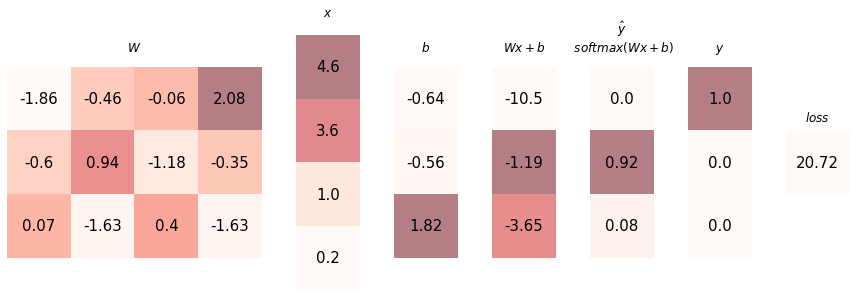

In [ ]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(2)
eg_b = np.random.normal(size=3).round(2)

utils.example(eg_x, eg_y, eg_w, eg_b)

# Tensorflow

Vamos a usar tensorflow para calcular automaticamente las gradientes de nuestras operaciones.

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

# tf Graph Input
X = tf.cast(x_train[:5], dtype=tf.double)
Y = tf.cast(y_train[:5], dtype=tf.double)

# Set model weights
W = tf.random_normal_initializer()((4,3), dtype=tf.double)
b = tf.random_normal_initializer()((3,), dtype=tf.double)

with tf.GradientTape() as g:
    g.watch([W, b])
    y_ = tf.nn.softmax((X @ W) + b)
    loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

In [ ]:
loss

<tf.Tensor: shape=(), dtype=float64, numpy=0.959230024061506>

In [ ]:
loss.numpy()

0.959230024061506

In [ ]:
W

<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
array([[ 0.01554093,  0.04515644,  0.02207593],
       [ 0.06541641, -0.03440198, -0.04375043],
       [-0.07584181,  0.02134968, -0.02960687],
       [ 0.07155314,  0.0505619 ,  0.00480047]])>

In [ ]:
W.numpy()

array([[ 0.01554093,  0.04515644,  0.02207593],
       [ 0.06541641, -0.03440198, -0.04375043],
       [-0.07584181,  0.02134968, -0.02960687],
       [ 0.07155314,  0.0505619 ,  0.00480047]])

In [ ]:
#Veamos las gradientes
W_gradients, b_gradients = g.gradient(loss, [W, b])

In [ ]:
W_gradients.numpy()

array([[-2.02686771,  0.60133413,  1.42553358],
       [-1.63528023,  0.66921453,  0.9660657 ],
       [-0.40473834, -0.12416916,  0.5289075 ],
       [-0.03805443, -0.09023352,  0.12828794]])

In [ ]:
b_gradients.numpy()

array([-0.43956198,  0.16625199,  0.27330999])

## Optimizacion: Mini-batch gradient descent

In [ ]:
# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1
optimizer = tf.optimizers.SGD(learning_rate=lr)

nb = math.ceil(len(x_train) / bs)
nb # Número de batches por epoch

4

In [ ]:
def softmax(X, W, b):
    return tf.nn.softmax((X @ W) + b)

In [ ]:
def compute_loss(X, Y, W, b):
    y_ = softmax(X, W, b)
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

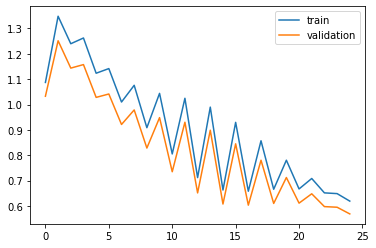

In [ ]:
# Train loop
train_losses = []
val_losses = []

W = tf.Variable(tf.random_normal_initializer()((4,3), dtype=tf.double))
b = tf.Variable(tf.random_normal_initializer()((3,), dtype=tf.double))

for epoch in tqdm(range(epochs)):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = tf.cast(x_train[i*bs:(i+1)*bs], dtype = tf.double)
        batch_y = tf.cast(y_train[i*bs:(i+1)*bs], dtype = tf.double)
        batch_x = tf.stop_gradient(batch_x)
        batch_y = tf.stop_gradient(batch_y)
        with tf.GradientTape() as g:
            g.watch([W, b])
            loss = compute_loss(batch_x, batch_y, W, b)
            gradients = g.gradient(loss, [W, b])
            optimizer.apply_gradients(zip(gradients, [W, b]))


    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = compute_loss(x_train, y_train, W,b)
    train_losses.append(train_loss)

    val_loss = compute_loss(x_val, y_val, W,b)
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend()

## Veamos el resultado

In [ ]:
pred, pred_loss = softmax(x_val, W, b), compute_loss(x_val, y_val, W,b)
pred_loss.numpy()

0.5687122532121687

In [ ]:
y_val[0], pred.numpy()[0]

(array([0., 1., 0.]), array([0.0249857 , 0.14983737, 0.82517693]))

In [ ]:
# Para obtener las predicciones finales vamos a usar np.argmax,
# que devuelve el indice con el mayor valor
np.argmax(y_val[0]), np.argmax(pred.numpy()[0])

(1, 2)

In [ ]:
# Obtenemos todos los labels
real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred.numpy(), axis=1)
real_labels[:], pred_labels[:]

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

In [ ]:
# Vamos a usar una metrica de accuracy para comparar los resultados
pred_acc = (real_labels == pred_labels).mean()
pred_acc

0.7

In [ ]:
print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.57
Accuracy = 0.70


# Keras

Ahora vamos a ver el codigo equivalente usando keras.

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1

K.clear_session()

# Modelo
input_layer = Input(shape=(4,))
output = Dense(3, activation='softmax')(input_layer)
model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1

K.clear_session()

# Modelo
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/25
4/4 [==============================] - 0s 48ms/step - loss: 2.9865 - accuracy: 0.2583 - val_loss: 2.3942 - val_accuracy: 0.3000
Epoch 2/25
4/4 [==============================] - 0s 6ms/step - loss: 1.5186 - accuracy: 0.2750 - val_loss: 1.0290 - val_accuracy: 0.3667
Epoch 3/25
4/4 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.5833 - val_loss: 1.1487 - val_accuracy: 0.4000
Epoch 4/25
4/4 [==============================] - 0s 5ms/step - loss: 1.0643 - accuracy: 0.5833 - val_loss: 0.9276 - val_accuracy: 0.6333
Epoch 5/25
4/4 [==============================] - 0s 5ms/step - loss: 0.9487 - accuracy: 0.6333 - val_loss: 1.5675 - val_accuracy: 0.4333
Epoch 6/25
4/4 [==============================] - 0s 5ms/step - loss: 0.7654 - accuracy: 0.7250 - val_loss: 0.6015 - val_accuracy: 0.7000
Epoch 7/25
4/4 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 0.6917 - val_loss: 0.6028 - val_accuracy: 0.7000
Epoch 8/25
4/4 [=================

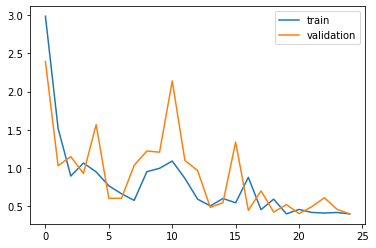

In [ ]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

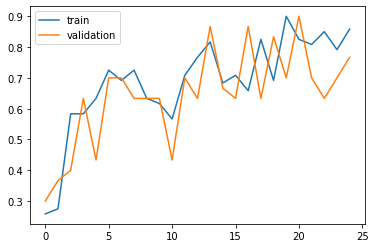

In [ ]:
plt.plot(log.history['accuracy'], label='train')
plt.plot(log.history['val_accuracy'], label='validation')
plt.legend()

## Resultados

In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

1/1 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.7667
Loss = 0.40
Accuracy = 0.77


# Redes Neuronales

In [ ]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4))
eg_b = np.random.normal(size=3)

Si vemos nuevamente el ejemplo, la capacidad del modelo depende en parte de la cantidad de parametros que puede aprender:

In [ ]:
eg_x.shape, eg_w.shape, eg_b.shape

((4, 1), (3, 4), (3,))

En este caso la matriz **eg_w** tiene 12 parámetros y **eg_b** tiene 3 parámetros. Por lo que nuestro modelo tiene un **total de 15 parámetros**.

**¿Cómo incrementamos el número de parámetros?**

Tenemos: `w(3x4) @ x(4x1) = (3x1)` (3x4 = 12 parámetros)

Agregamos una matriz intermedia: `w1(10x4) @ x(4x1) = (10x1) -->  w2(3x10) @ (10x1) = (3x1)` (10x4 + 3x10 = 70 parámetros)

**Agregando una matriz intermedia incrementamos los parámetros de 12 a 70.**

In [ ]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w1 = np.random.normal(size=10*4).reshape((10,4))
eg_b1 = np.random.normal(size=10).reshape((10,1))
eg_w2 = np.random.normal(size=3*10).reshape((3,10))
eg_b2 = np.random.normal(size=3).reshape((3,1))

In [ ]:
temp = ((eg_w1 @ eg_x) + eg_b1)
temp.shape

(10, 1)

In [ ]:
y_ = ((eg_w2 @ temp) + eg_b2).ravel()
y_.shape

(3,)

**Pero hay un problema con esta formulación:** un conjunto de operaciones lineales (multiplicaciones y sumas), se pueden reducir a una sola multiplicacion y suma:

$ y_1 = 2x + 10 $

$ y_2 = softmax(3y_1 - 5) = softmax(((2x + 10) * 3) - 5) = softmax(6x + 25) $

<br>

**Solucion: Funciones de activación**

La idea de las funciones de activación es agregar funciones no lineales entre capa y capa (capa = multiplicacion+suma).

$ y_1 = \sigma(2x + 10) $

$ y_2 = softmax(3y_1 - 5) $

\* *La funcion softmax se considera una funcion de activación.*

## Tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

def softmax(X, W1, b1, W2, b2):
    y_ = tf.nn.relu((X @ W1) + b1)
    y_ = tf.nn.softmax((y_ @ W2) + b2)
    return y_

In [ ]:
def compute_loss(Y, y_):
    # Loss
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

In [ ]:
# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01
optimizer = tf.optimizers.SGD(learning_rate=lr)
nb = math.ceil(len(x_train) / bs)
nb # Numero de batches por epoch

4

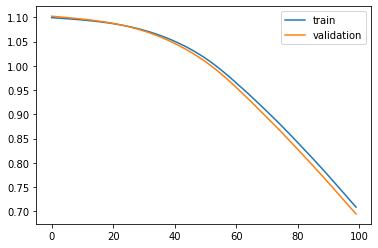

In [ ]:
# Train loop
train_losses = []
val_losses = []

W1 = tf.Variable(tf.random_normal_initializer()((4,10), dtype=tf.double))
b1 = tf.Variable(tf.random_normal_initializer()((10,), dtype=tf.double))
W2 = tf.Variable(tf.random_normal_initializer()((10,3), dtype=tf.double))
b2 = tf.Variable(tf.random_normal_initializer()((3,), dtype=tf.double))

for epoch in tqdm(range(epochs)):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = tf.cast(x_train[i*bs:(i+1)*bs], dtype=tf.double)
        batch_y = tf.cast(y_train[i*bs:(i+1)*bs], dtype=tf.double)
        batch_x = tf.stop_gradient(batch_x)
        batch_y = tf.stop_gradient(batch_y)
        with tf.GradientTape() as g:
            g.watch([W1, W2, b1, b2])
            loss = compute_loss(batch_y, softmax(batch_x, W1, b1, W2, b2))
            gradients = g.gradient(loss, [W1, W2, b1, b2])
            optimizer.apply_gradients(zip(gradients, [W1, W2, b1, b2]))

    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = compute_loss(y_train, softmax(x_train, W1, b1, W2, b2))
    train_losses.append(train_loss)

    val_loss = compute_loss(y_val, softmax(x_val, W1, b1, W2, b2))
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend()

In [ ]:
pred, pred_loss = softmax(x_val, W1, b1, W2, b2), compute_loss(y_val, softmax(x_val, W1, b1, W2, b2))
pred_loss.numpy()

real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred, axis=1)

pred_acc = (real_labels == pred_labels).mean()

print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.69
Accuracy = 0.70


## Keras

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01

# Modelo
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/100
4/4 [==============================] - 0s 36ms/step - loss: 1.5819 - accuracy: 0.3250 - val_loss: 1.1839 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2036 - accuracy: 0.3000 - val_loss: 1.1182 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1399 - accuracy: 0.3000 - val_loss: 1.0925 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1058 - accuracy: 0.3250 - val_loss: 1.0724 - val_accuracy: 0.4667
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0760 - accuracy: 0.3333 - val_loss: 1.0200 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.3000 - val_loss: 0.9526 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9426 - accuracy: 0.5750 - val_loss: 0.8950 - val_accuracy: 0.8333
Epoch 8/100
4/4 [=========

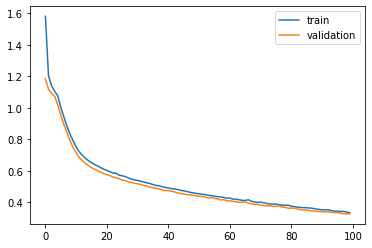

In [ ]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

1/1 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 1.0000
Loss = 0.33
Accuracy = 1.00


# Ejercicio

**Faulty Steel Plates**

Steel plate faults classified into seven types

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects.

In [ ]:
#@title faults.csv
%%writefile faults.csv
X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1,1,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6,0.9667,1,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.971,0.3426,0.3333,0.0037,0.75,0.9474,1,1.8513,0.7782,1.2553,0.6667,-0.1228,0.215,1,0,0,0,0,0,0
853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1,1,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1,3.3818,1.2305,2.4099,0.9338,-0.1992,1,1,0,0,0,0,0,0
430,441,100250,100337,630,20,87,62357,64,127,1387,0,1,40,0.62,0.3417,0.1264,0.0079,0.55,1,1,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
413,446,138468,138883,9052,230,432,1481991,23,199,1687,0,1,150,0.4896,0.339,0.0795,0.0196,0.1435,0.9607,1,3.9567,1.5185,2.6181,0.9205,0.2791,1,1,0,0,0,0,0,0
190,200,210936,210956,132,11,20,20007,124,172,1687,0,1,150,0.2253,0.34,0.5,0.0059,0.9091,1,1,2.1206,1,1.301,0.5,0.1841,0.3359,1,0,0,0,0,0,0
330,343,429227,429253,264,15,26,29748,53,148,1687,0,1,150,0.3912,0.2189,0.5,0.0077,0.8667,1,1,2.4216,1.1139,1.415,0.5,-0.1197,0.5593,1,0,0,0,0,0,0
74,90,779144,779308,1506,46,167,180215,53,143,1687,0,1,150,0.0877,0.4261,0.0976,0.0095,0.3478,0.982,1,3.1778,1.2041,2.2148,0.9024,-0.0651,1,1,0,0,0,0,0,0
106,118,813452,813500,442,13,48,50393,76,143,1687,0,1,150,0.1257,0.2326,0.25,0.0071,0.9231,1,1,2.6454,1.0792,1.6812,0.75,-0.1093,0.8612,1,0,0,0,0,0,0
505,515,106604,106668,284,42,69,31062,97,119,1687,0,1,150,0.5987,0.5562,0.1563,0.0059,0.2381,0.9275,1,2.4533,1,1.8062,0.8438,-0.1455,0.9048,1,0,0,0,0,0,0
46,58,179258,179312,480,15,54,61966,102,158,1687,0,1,150,0.0545,0.2593,0.2222,0.0071,0.8,1,1,2.6812,1.0792,1.7324,0.7778,0.0086,0.9093,1,0,0,0,0,0,0
581,590,230644,230704,433,22,60,38917,62,111,1687,0,1,150,0.6888,0.1981,0.15,0.0053,0.4091,1,1,2.6365,0.9542,1.7781,0.85,-0.2978,0.8299,1,0,0,0,0,0,0
451,466,368143,368208,728,30,68,69258,36,133,1687,0,1,150,0.5347,0.2533,0.2308,0.0089,0.5,0.9559,1,2.8621,1.1761,1.8129,0.7692,-0.2568,0.9888,1,0,0,0,0,0,0
669,684,491552,491684,1097,59,133,119540,50,134,1687,0,1,150,0.7931,0.446,0.1136,0.0089,0.2542,0.9925,1,3.0402,1.1761,2.1206,0.8864,-0.1487,1,1,0,0,0,0,0,0
156,192,713788,714056,5044,167,282,570911,11,143,1687,0,1,150,0.1849,0.4772,0.1343,0.0213,0.2156,0.9503,1,3.7028,1.5563,2.4281,0.8657,-0.1157,1,1,0,0,0,0,0,0
90,104,751059,751132,552,38,76,59750,79,134,1687,0,1,150,0.1067,0.4599,0.1918,0.0083,0.3684,0.9605,1,2.7419,1.1461,1.8633,0.8082,-0.1543,0.9918,1,0,0,0,0,0,0
82,89,844704,844729,137,8,25,14907,92,126,1687,0,1,150,0.0972,0.2171,0.28,0.0041,0.875,1,1,2.1367,0.8451,1.3979,0.72,-0.1499,0.2998,1,0,0,0,0,0,0
1601,1613,21349,21376,209,15,27,24807,96,141,1687,0,1,200,0.0877,0.3549,0.4444,0.0071,0.8,1,1,2.3201,1.0792,1.4314,0.5556,-0.0727,0.5362,1,0,0,0,0,0,0
17,28,42683,42717,284,18,34,32604,87,141,1687,0,1,200,0.0202,0.2406,0.3235,0.0065,0.6111,1,1,2.4533,1.0414,1.5315,0.6765,-0.1031,0.6173,1,0,0,0,0,0,0
43,52,86284,86313,153,13,29,17753,101,134,1687,0,1,200,0.051,0.4138,0.3103,0.0053,0.6923,1,1,2.1847,0.9542,1.4624,0.6897,-0.0935,0.4317,1,0,0,0,0,0,0
63,72,115485,115504,106,10,19,13829,107,150,1687,0,1,200,0.0747,0.3801,0.4737,0.0053,0.9,1,1,2.0253,0.9542,1.2787,0.5263,0.0192,0.2942,1,0,0,0,0,0,0
82,92,149044,149083,264,15,39,32175,92,141,1687,0,1,200,0.0972,0.3231,0.2564,0.0059,0.6667,1,1,2.4216,1,1.5911,0.7436,-0.0479,0.6422,1,0,0,0,0,0,0
75,84,184350,184383,201,17,35,27349,123,148,1687,0,1,200,0.0889,0.3232,0.2727,0.0053,0.5294,0.9429,1,2.3032,0.9542,1.5185,0.7273,0.063,0.4913,1,0,0,0,0,0,0
1363,1372,2128884,2128907,171,9,23,16645,77,111,1373,0,1,40,0.0015,0.1739,0.3913,0.0066,1,1,1,2.233,0.9542,1.3617,0.6087,-0.2395,0.3464,1,0,0,0,0,0,0
1358,1372,2356396,2356435,395,19,39,38722,75,118,1373,0,1,40,0.0015,0.2766,0.359,0.0102,0.7368,1,1,2.5966,1.1461,1.5911,0.641,-0.2341,0.8355,1,0,0,0,0,0,0
1404,1410,5202306,5202324,85,9,18,8948,97,119,1627,0,1,40,0.2668,0.213,0.3333,0.0037,0.6667,1,1,1.9294,0.7782,1.2553,0.6667,-0.1776,0.215,1,0,0,0,0,0,0
1281,1302,4332564,4332815,3214,92,253,368381,33,140,1373,0,1,40,0.1034,0.3902,0.0837,0.0153,0.2283,0.9921,1,3.5071,1.3222,2.3997,0.9163,-0.1045,1,1,0,0,0,0,0,0
49,62,4822354,4822392,386,15,38,36875,51,124,1373,0,1,40,0.0714,0.2186,0.3421,0.0095,0.8667,1,1,2.5866,1.1139,1.5798,0.6579,-0.2537,0.7822,1,0,0,0,0,0,0
830,837,1874382,1874415,182,9,33,20751,99,132,1373,0,1,40,0.7808,0.2121,0.2121,0.0051,0.7778,1,1,2.2601,0.8451,1.5185,0.7879,-0.1093,0.3834,1,0,0,0,0,0,0
91,104,2378173,2378236,527,19,63,48793,47,125,1387,0,1,40,0.1312,0.3565,0.2063,0.0094,0.6842,1,1,2.7218,1.1139,1.7993,0.7936,-0.2767,0.9691,1,0,0,0,0,0,0
161,168,2891780,2891804,158,9,24,16680,80,119,1387,0,1,40,0.2322,0.0595,0.2917,0.005,0.7778,1,1,2.1987,0.8451,1.3802,0.7083,-0.1752,0.2901,1,0,0,0,0,0,0
1328,1338,2691161,2691189,214,10,28,19762,70,111,1387,0,1,50,0.0707,0.2357,0.3571,0.0072,1,1,1,2.3304,1,1.4472,0.6429,-0.2785,0.463,1,0,0,0,0,0,0
1251,1274,3874199,3874261,994,29,62,68851,15,119,1387,0,1,50,0.1629,0.3029,0.371,0.0166,0.7931,1,1,2.9974,1.3617,1.7924,0.629,-0.4588,0.9994,1,0,0,0,0,0,0
733,745,3957796,3957839,367,16,43,35856,55,127,1387,0,1,50,0.9257,0.2888,0.2791,0.0087,0.75,1,1,2.5647,1.0792,1.6335,0.7209,-0.2367,0.8061,1,0,0,0,0,0,0
12,24,304433,304472,320,15,39,32705,55,125,1353,0,1,70,0.0177,0.3162,0.3077,0.0089,0.8,1,1,2.5052,1.0792,1.5911,0.6923,-0.2015,0.7512,1,0,0,0,0,0,0
162,172,505964,506035,378,34,72,43323,77,135,1353,0,1,70,0.2395,0.4676,0.1408,0.0074,0.2941,0.9861,1,2.5775,1,1.8513,0.8591,-0.1046,0.9381,1,0,0,0,0,0,0
0,10,1701480,1701528,210,36,48,17413,73,100,1333,0,1,40,0,0.5625,0.2083,0.0075,0.2778,1,1,2.3222,1,1.6812,0.7917,-0.3522,0.7659,1,0,0,0,0,0,0
1617,1629,183688,183711,201,22,23,20993,79,126,1633,0,1,250,0.0049,0.2717,0.5217,0.0074,0.5454,1,1,2.3032,1.0792,1.3617,0.4783,-0.184,0.4564,1,0,0,0,0,0,0
1152,1162,284144,284198,386,35,54,44712,90,132,1687,0,1,200,0.6224,0.2852,0.1852,0.0059,0.2857,1,1,2.5866,1,1.7324,0.8148,-0.095,0.8299,1,0,0,0,0,0,0
1259,1271,1918092,1918128,324,30,36,30269,65,124,1353,0,1,70,0.1212,0.25,0.3333,0.0089,0.4,1,1,2.5106,1.0792,1.5563,0.6667,-0.2701,0.7037,1,0,0,0,0,0,0
1545,1557,19815,19841,234,20,26,23207,66,124,1627,0,1,40,0.086,0.25,0.4615,0.0074,0.6,1,1,2.3692,1.0792,1.415,0.5385,-0.2252,0.5162,1,0,0,0,0,0,0
1580,1590,3884411,3884461,340,30,50,34655,88,116,1627,0,1,40,0.0455,0.32,0.2,0.0061,0.3333,1,1,2.5315,1,1.699,0.8,-0.2037,0.7889,1,0,0,0,0,0,0
450,458,1009978,1009999,98,16,21,10784,96,132,1690,1,0,60,0.5325,0.4167,0.381,0.0047,0.5,1,1,1.9912,0.9031,1.3222,0.6191,-0.1403,0.2901,1,0,0,0,0,0,0
1625,1634,1702442,1702491,267,43,49,22785,67,110,1690,1,0,60,0.0663,0.3946,0.1837,0.0053,0.2093,1,1,2.4265,0.9542,1.6902,0.8163,-0.3333,0.7161,1,0,0,0,0,0,0
1495,1502,3509718,3509731,56,12,13,5587,85,116,1686,1,0,60,0.2183,0.3846,0.5385,0.0041,0.5833,1,1,1.7482,0.8451,1.1139,0.4615,-0.2206,0.1965,1,0,0,0,0,0,0
958,964,3550754,3550771,71,11,17,7502,91,124,1682,1,0,60,0.8537,0.3039,0.3529,0.0036,0.5454,1,1,1.8513,0.7782,1.2305,0.6471,-0.1745,0.2083,1,0,0,0,0,0,0
1536,1548,43036,43048,90,14,12,7525,67,100,1688,1,0,60,0.1659,0.375,1,0.0071,0.8571,1,0.5,1.9542,1.0792,1.0792,0,-0.3468,0.2583,1,0,0,0,0,0,0
780,787,1686880,1686891,55,9,11,6124,95,125,1690,1,0,60,0.9231,0.2857,0.6364,0.0041,0.7778,1,1,1.7404,0.8451,1.0414,0.3636,-0.1301,0.1822,1,0,0,0,0,0,0
1140,1147,2379116,2379129,58,9,13,6567,100,132,1690,1,0,60,0.6426,0.3626,0.5385,0.0041,0.7778,1,1,1.7634,0.8451,1.1139,0.4615,-0.1154,0.1965,1,0,0,0,0,0,0
13,24,2512899,2512965,567,47,66,46365,51,109,1690,1,0,60,0.0154,0.219,0.1667,0.0065,0.234,1,1,2.7536,1.0414,1.8195,0.8333,-0.3611,0.944,1,0,0,0,0,0,0
11,20,2845229,2845256,182,20,27,16337,72,109,1688,1,0,60,0.013,0.251,0.3333,0.0053,0.45,1,1,2.2601,0.9542,1.4314,0.6667,-0.2987,0.4025,1,0,0,0,0,0,0
1589,1599,3826564,3826588,154,20,24,13678,69,108,1650,1,0,69,0.0618,0.3583,0.4167,0.0061,0.5,1,1,2.1875,1,1.3802,0.5833,-0.3061,0.3977,1,0,0,0,0,0,0
765,774,4157586,4157620,188,20,34,20528,95,125,1648,1,0,69,0.9284,0.3856,0.2647,0.0055,0.45,1,1,2.2742,0.9542,1.5315,0.7353,-0.1469,0.5063,1,0,0,0,0,0,0
1268,1277,5437033,5437060,146,20,27,15572,88,126,1646,1,0,69,0.4484,0.3992,0.3333,0.0055,0.45,1,1,2.1644,0.9542,1.4314,0.6667,-0.1667,0.4025,1,0,0,0,0,0,0
333,346,5683008,5683014,51,14,7,6902,120,149,1650,1,0,69,0.4036,0.3462,0.4615,0.0079,0.9286,0.8571,0,1.7076,1.1139,0.7782,-0.5385,0.0573,0.1832,1,0,0,0,0,0,0
1287,1299,1005865,1005895,184,25,30,18593,85,119,1650,1,0,100,0.4254,0.4889,0.4,0.0073,0.48,1,1,2.2648,1.0792,1.4771,0.6,-0.2106,0.5951,1,0,0,0,0,0,0
1088,1096,1094617,1094629,67,10,12,7416,94,132,1710,1,0,100,0.7181,0.3021,0.6667,0.0047,0.8,1,1,1.8261,0.9031,1.0792,0.3333,-0.1353,0.2018,1,0,0,0,0,0,0
1255,1261,718602,718617,64,10,15,7013,99,123,1360,1,0,100,0.1456,0.2889,0.4,0.0044,0.6,1,1,1.8062,0.7782,1.1761,0.6,-0.1439,0.1954,1,0,0,0,0,0,0
707,714,807870,807880,53,10,10,5039,81,111,1360,1,0,100,0.95,0.2429,0.7,0.0052,0.7,1,1,1.7243,0.8451,1,0.3,-0.2572,0.1753,1,0,0,0,0,0,0
1186,1193,238656,238667,60,10,11,6863,100,132,1362,1,0,120,0.2482,0.2208,0.6364,0.0051,0.7,1,1,1.7781,0.8451,1.0414,0.3636,-0.1064,0.1822,1,0,0,0,0,0,0
626,635,2071945,2071956,76,14,11,8063,84,126,1362,1,0,120,0.9192,0.2323,0.8182,0.0066,0.6429,1,1,1.8808,0.9542,1.0414,0.1818,-0.1712,0.2051,1,0,0,0,0,0,0
1503,1510,893849,893861,66,9,12,6625,87,118,1632,1,0,100,0.1495,0.2143,0.5833,0.0043,0.7778,1,1,1.8195,0.8451,1.0792,0.4167,-0.2158,0.1892,1,0,0,0,0,0,0
1152,1161,969900,969911,70,9,11,7846,99,127,1632,1,0,100,0.5772,0.2929,0.8182,0.0055,1,1,1,1.8451,0.9542,1.0414,0.1818,-0.1243,0.2051,1,0,0,0,0,0,0
1533,1542,1031539,1031599,382,43,60,38206,77,118,1632,1,0,100,0.1103,0.2926,0.15,0.0055,0.2093,1,1,2.5821,0.9542,1.7781,0.85,-0.2186,0.8299,1,0,0,0,0,0,0
788,796,1060712,1060732,110,13,20,11126,84,116,1630,1,0,100,0.9669,0.3125,0.4,0.0049,0.6154,1,1,2.0414,0.9031,1.301,0.6,-0.2098,0.2792,1,0,0,0,0,0,0
34,40,914648,914661,51,8,13,5369,95,116,1654,1,0,100,0.0411,0.3462,0.4615,0.0036,0.75,1,1,1.7076,0.7782,1.1139,0.5385,-0.1775,0.1832,1,0,0,0,0,0,0
1604,1612,1194800,1194814,63,15,14,5232,73,94,1656,1,0,100,0.0531,0.4375,0.5714,0.0048,0.5333,1,1,1.7993,0.9031,1.1461,0.4286,-0.3512,0.2195,1,0,0,0,0,0,0
1610,1618,1944129,1944138,56,12,9,4674,71,101,1656,1,0,100,0.0459,0.2222,0.8889,0.0048,0.6667,1,1,1.7482,0.9031,0.9542,0.1111,-0.3479,0.1773,1,0,0,0,0,0,0
1617,1628,2095494,2095507,89,14,13,7804,77,100,1658,1,0,100,0.0362,0.3776,0.8461,0.0066,0.7857,1,1,1.9494,1.0414,1.1139,0.1539,-0.315,0.257,1,0,0,0,0,0,0
1589,1598,2493647,2493675,190,21,28,18416,81,116,1648,1,0,100,0.0607,0.246,0.3214,0.0055,0.4286,1,1,2.2787,0.9542,1.4472,0.6786,-0.2428,0.417,1,0,0,0,0,0,0
482,490,11430396,11430416,81,15,20,8709,99,119,1656,1,0,100,0.5821,0.4938,0.4,0.0048,0.5333,1,1,1.9085,0.9031,1.301,0.6,-0.16,0.2792,1,0,0,0,0,0,0
1067,1073,237702,237720,63,17,18,4616,58,93,1694,1,0,211,0.7332,0.4167,0.3333,0.0035,0.3529,1,1,1.7993,0.7782,1.2553,0.6667,-0.4276,0.215,1,0,0,0,0,0,0
623,631,309514,309526,60,9,12,4585,62,92,1694,1,0,211,0.7355,0.375,0.6667,0.0047,0.8889,1,1,1.7781,0.9031,1.0792,0.3333,-0.403,0.2018,1,0,0,0,0,0,0
446,453,200561,200567,30,8,6,3022,80,116,1692,1,0,143,0.5272,0.2857,0.8571,0.0041,0.875,1,0,1.4771,0.8451,0.7782,-0.1429,-0.213,0.1499,1,0,0,0,0,0,0
375,384,519677,519708,209,24,31,24034,90,143,1692,1,0,143,0.4433,0.2509,0.2903,0.0053,0.375,1,1,2.3201,0.9542,1.4914,0.7097,-0.1016,0.4613,1,0,0,0,0,0,0
125,134,1334420,1334443,156,20,23,18654,101,141,1352,1,0,80,0.1849,0.2464,0.3913,0.0067,0.45,1,1,2.1931,0.9542,1.3617,0.6087,-0.0658,0.3464,1,0,0,0,0,0,0
124,140,2377039,2377320,2643,165,285,300024,64,140,1400,0,1,40,0.1771,0.4121,0.0569,0.0114,0.097,0.986,1,3.4221,1.2041,2.4487,0.9431,-0.1132,1,1,0,0,0,0,0,0
1321,1339,513812,514011,2145,134,201,228995,16,133,1380,0,1,40,0.0594,0.4012,0.0904,0.013,0.1343,0.9901,1,3.3314,1.2553,2.2989,0.9096,-0.166,1,1,0,0,0,0,0,0
817,843,66196,66362,1421,142,185,141034,47,126,1666,0,1,40,0.9808,0.6708,0.1566,0.0156,0.1831,0.8973,1,3.1526,1.415,2.2201,0.8434,-0.2246,1,1,0,0,0,0,0,0
808,816,161967,161984,103,13,17,11430,97,126,1666,0,1,40,0.97,0.2427,0.4706,0.0048,0.6154,1,1,2.0128,0.9031,1.2305,0.5294,-0.133,0.2482,1,0,0,0,0,0,0
1327,1335,126951,126958,40,11,7,4014,89,111,1364,0,1,60,0.0425,0.2857,0.875,0.0059,0.7273,1,0,1.6021,0.9031,0.8451,-0.125,-0.216,0.1622,1,0,0,0,0,0,0
64,95,417618,418215,10914,481,604,1096282,21,141,1362,0,1,60,0.094,0.4103,0.0519,0.0228,0.0645,0.9884,1,4.038,1.4914,2.776,0.9481,-0.2153,1,1,0,0,0,0,0,0
57,69,33796,33812,135,18,16,10915,55,97,1360,0,1,200,0.0838,0.2969,0.75,0.0088,0.6667,1,1,2.1303,1.0792,1.2041,0.25,-0.3683,0.3241,1,0,0,0,0,0,0
921,930,638468,638484,114,14,17,13173,94,140,1392,0,1,220,0.6638,0.2083,0.5625,0.0065,0.6429,0.9412,1,2.0569,0.9542,1.2041,0.4375,-0.0972,0.2583,1,0,0,0,0,0,0
830,837,837868,837888,82,13,20,9671,106,128,1392,0,1,220,0.7974,0.4143,0.35,0.005,0.5385,1,1,1.9138,0.8451,1.301,0.65,-0.0786,0.2532,1,0,0,0,0,0,0
1201,1213,3496093,3496125,275,19,32,28986,78,127,1362,0,1,40,0.2188,0.2839,0.375,0.0088,0.6316,1,1,2.4393,1.0792,1.5051,0.625,-0.1765,0.633,1,0,0,0,0,0,0
1227,1238,3980733,3980769,289,25,36,32134,92,132,1364,0,1,40,0.1848,0.2702,0.3056,0.0081,0.44,1,1,2.4609,1.0414,1.5563,0.6944,-0.1313,0.6514,1,0,0,0,0,0,0
959,974,4178002,4178041,313,36,39,35005,68,135,1364,0,1,40,0.5719,0.465,0.3846,0.011,0.4167,1,1,2.4955,1.1761,1.5911,0.6154,-0.1263,0.8682,1,0,0,0,0,0,0
320,333,4383724,4383776,437,36,52,44883,63,132,1364,0,1,40,0.4692,0.3535,0.25,0.0095,0.3611,1,1,2.6405,1.1139,1.716,0.75,-0.1976,0.9236,1,0,0,0,0,0,0
34,51,132507,132576,759,45,69,67978,44,124,1362,0,1,40,0.0499,0.3529,0.2464,0.0125,0.3778,1,1,2.8802,1.2305,1.8389,0.7536,-0.3003,0.997,1,0,0,0,0,0,0
159,172,273320,273387,677,44,67,67597,72,124,1360,0,1,40,0.2338,0.2227,0.194,0.0096,0.2955,1,1,2.8306,1.1139,1.8261,0.806,-0.2199,0.9779,1,0,0,0,0,0,0
1265,1278,31580,31602,211,18,22,17820,49,109,1364,0,1,100,0.1261,0.2622,0.5909,0.0095,0.7222,1,1,2.3243,1.1139,1.3424,0.4091,-0.3402,0.4729,1,0,0,0,0,0,0
1343,1352,106512,106519,52,9,7,5049,87,109,1366,0,1,100,0.0205,0.1746,0.7778,0.0066,1,1,0,1.716,0.9542,0.8451,-0.2222,-0.2414,0.1687,1,0,0,0,0,0,0
557,570,2425687,2425716,261,28,29,28261,91,126,1358,0,1,40,0.8203,0.3077,0.4483,0.0096,0.4643,1,1,2.4166,1.1139,1.4624,0.5517,-0.1541,0.6221,1,0,0,0,0,0,0
1058,1066,367429,367455,135,18,26,15385,103,126,1690,0,1,70,0.7385,0.351,0.3077,0.0047,0.4444,1,1,2.1303,0.9031,1.415,0.6923,-0.1097,0.3479,1,0,0,0,0,0,0
780,787,1044544,1044587,181,29,43,20264,99,125,1690,0,1,70,0.9231,0.3987,0.1628,0.0041,0.2414,1,1,2.2577,0.8451,1.6335,0.8372,-0.1253,0.4979,1,0,0,0,0,0,0
971,979,1246698,1246717,109,15,19,12212,100,127,1694,0,1,70,0.8442,0.2829,0.4211,0.0047,0.5333,1,1,2.0374,0.9031,1.2787,0.5789,-0.1247,0.2686,1,0,0,0,0,0,0
374,382,2670756,2670772,102,11,16,11385,95,127,1692,0,1,70,0.4421,0.2031,0.5,0.0047,0.7273,1,1,2.0086,0.9031,1.2041,0.5,-0.128,0.2384,1,0,0,0,0,0,0
1027,1034,2928247,2928259,51,8,12,5999,111,135,1692,0,1,70,0.7778,0.3929,0.5833,0.0041,0.875,1,1,1.7076,0.8451,1.0792,0.4167,-0.081,0.1892,1,0,0,0,0,0,0
1554,1564,3375744,3375765,134,13,21,13356,89,111,1690,0,1,70,0.1491,0.3619,0.4762,0.0059,0.7692,1,1,2.1271,1,1.3222,0.5238,-0.2213,0.3509,1,0,0,0,0,0,0
179,193,1280228,1280256,266,23,28,24547,49,126,1626,0,1,120,0.2202,0.3214,0.5,0.0086,0.6087,1,1,2.4249,1.1461,1.4472,0.5,-0.279,0.6453,1,0,0,0,0,0,0
980,992,333332,333435,970,57,103,97514,66,133,1362,0,1,175,0.5433,0.2152,0.1165,0.0088,0.2105,1,1,2.9868,1.0792,2.0128,0.8835,-0.2146,0.998,1,0,0,0,0,0,0
1579,1592,562576,562633,515,32,57,41622,46,108,1632,0,1,125,0.049,0.305,0.2281,0.008,0.4063,1,1,2.7118,1.1139,1.7559,0.7719,-0.3686,0.9491,1,0,0,0,0,0,0
225,235,719009,719024,116,17,15,11656,71,127,1634,0,1,125,0.2754,0.2267,0.6667,0.0061,0.5882,1,1,2.0645,1,1.1761,0.3333,-0.215,0.266,1,0,0,0,0,0,0
1465,1486,1837263,1837460,2490,146,197,283038,19,141,1634,0,1,125,0.1812,0.3981,0.1066,0.0128,0.1438,1,1,3.3962,1.3222,2.2945,0.8934,-0.112,1,1,0,0,0,0,0,0
1360,1373,2094748,2094776,251,22,28,28050,89,140,1632,0,1,125,0.3174,0.3104,0.4643,0.008,0.5909,1,1,2.3997,1.1139,1.4472,0.5357,-0.1269,0.6015,1,0,0,0,0,0,0
1155,1167,2124816,2124840,165,22,26,18742,87,134,1626,0,1,125,0.5646,0.4271,0.5,0.0074,0.5454,0.9231,1,2.2175,1.0792,1.3802,0.5,-0.1126,0.4763,1,0,0,0,0,0,0
1325,1334,1959035,1959052,112,16,17,11439,84,127,1358,0,1,40,0.0353,0.268,0.5294,0.0066,0.5625,1,1,2.0492,0.9542,1.2305,0.4706,-0.2021,0.2699,1,0,0,0,0,0,0
1260,1271,552783,552815,208,24,32,22478,84,126,1350,0,1,50,0.117,0.4091,0.3438,0.0082,0.4583,1,1,2.3181,1.0414,1.5051,0.6563,-0.1557,0.5822,1,0,0,0,0,0,0
1245,1258,702370,702405,337,26,35,33379,68,125,1354,0,1,50,0.1418,0.2593,0.3714,0.0096,0.5,1,1,2.5276,1.1139,1.5441,0.6286,-0.2262,0.7347,1,0,0,0,0,0,0
1687,1696,150712,150740,167,24,28,9559,23,94,1698,0,1,90,0.0024,0.3373,0.3214,0.0053,0.375,1,1,2.2227,0.9542,1.4472,0.6786,-0.5528,0.417,1,0,0,0,0,0,0
1507,1516,188768,188800,200,24,32,21691,90,125,1696,0,1,90,0.2123,0.3056,0.2813,0.0053,0.375,1,1,2.301,0.9542,1.5051,0.7188,-0.1527,0.4763,1,0,0,0,0,0,0
1688,1694,247330,247414,359,29,84,19226,30,93,1696,0,1,90,0.0024,0.2877,0.0714,0.0035,0.2069,1,1,2.5551,0.7782,1.9243,0.9286,-0.5816,0.7933,1,0,0,0,0,0,0
1685,1692,297096,297166,349,33,70,24697,45,95,1698,0,1,90,0.0071,0.2878,0.1,0.0041,0.2121,1,1,2.5428,0.8451,1.8451,0.9,-0.4471,0.7776,1,0,0,0,0,0,0
1687,1694,348227,348257,140,12,30,9253,38,101,1698,0,1,90,0.0047,0.3333,0.2333,0.0041,0.5833,1,1,2.1461,0.8451,1.4771,0.7667,-0.4836,0.3509,1,0,0,0,0,0,0
1571,1583,435871,435916,379,35,45,37695,80,124,1700,0,1,90,0.1376,0.2982,0.2667,0.0071,0.3429,1,1,2.5786,1.0792,1.6532,0.7333,-0.223,0.8299,1,0,0,0,0,0,0
757,766,487568,487588,121,13,20,13345,89,134,1698,0,1,90,0.8916,0.3278,0.45,0.0053,0.6923,1,1,2.0828,0.9542,1.301,0.55,-0.1384,0.3068,1,0,0,0,0,0,0
1568,1583,564536,564621,762,63,86,78455,88,124,1698,0,1,90,0.1355,0.4024,0.1765,0.0088,0.2381,0.9884,1,2.8819,1.1761,1.9294,0.8235,-0.1956,0.9985,1,0,0,0,0,0,0
1571,1585,689792,689890,861,78,98,90154,91,126,1696,0,1,90,0.1309,0.3724,0.1429,0.0082,0.1795,1,1,2.935,1.1461,1.9912,0.8571,-0.182,0.9992,1,0,0,0,0,0,0
1575,1589,815462,815504,335,37,42,32766,86,124,1696,0,1,90,0.1262,0.4303,0.3333,0.0082,0.3784,1,1,2.525,1.1461,1.6233,0.6667,-0.2359,0.8705,1,0,0,0,0,0,0
1579,1590,939827,939860,242,24,33,24672,90,119,1698,0,1,90,0.1272,0.3333,0.3333,0.0065,0.4583,1,1,2.3838,1.0414,1.5185,0.6667,-0.2035,0.5999,1,0,0,0,0,0,0
1395,1407,1108752,1108782,264,26,30,25531,64,126,1696,0,1,90,0.3408,0.2667,0.4,0.0071,0.4615,1,1,2.4216,1.0792,1.4771,0.6,-0.2445,0.5951,1,0,0,0,0,0,0
5,13,1137189,1137216,134,20,27,14605,94,125,1694,0,1,90,0.0059,0.3796,0.2963,0.0047,0.4,1,1,2.1271,0.9031,1.4314,0.7037,-0.1485,0.3601,1,0,0,0,0,0,0
1578,1590,1208774,1208843,372,56,70,37930,77,125,1696,0,1,90,0.125,0.5507,0.1739,0.0071,0.2143,0.9857,1,2.5705,1.0792,1.8389,0.8261,-0.2034,0.9708,1,0,0,0,0,0,0
1595,1611,1594430,1594517,794,59,87,84410,62,127,1696,0,1,90,0.1002,0.4296,0.1839,0.0094,0.2712,1,1,2.8998,1.2041,1.9395,0.8161,-0.1694,0.9993,1,0,0,0,0,0,0
10,22,1678200,1678232,227,28,32,23706,77,127,1698,0,1,90,0.0118,0.4089,0.375,0.0071,0.4286,1,1,2.356,1.0792,1.5051,0.625,-0.1841,0.633,1,0,0,0,0,0,0
1593,1608,1724027,1724129,927,65,103,89508,68,127,1698,0,1,90,0.106,0.3941,0.1471,0.0088,0.2308,0.9903,1,2.9671,1.1761,2.0086,0.8529,-0.2456,0.9997,1,0,0,0,0,0,0
9,18,1743219,1743250,227,22,31,21864,74,126,1698,0,1,90,0.0106,0.1864,0.2903,0.0053,0.4091,1,1,2.356,0.9542,1.4914,0.7097,-0.2475,0.4613,1,0,0,0,0,0,0
1505,1514,1751260,1751304,271,35,45,28268,85,127,1700,0,1,90,0.2188,0.3157,0.2045,0.0053,0.2571,0.9778,1,2.433,0.9542,1.6435,0.7954,-0.1851,0.6514,1,0,0,0,0,0,0
1470,1488,1771553,1771642,771,50,89,76380,63,127,1698,0,1,90,0.2474,0.5187,0.2023,0.0106,0.36,1,1,2.887,1.2553,1.9494,0.7977,-0.2261,0.9998,1,0,0,0,0,0,0
1643,1656,1809470,1809524,471,37,54,43880,62,125,1698,0,1,90,0.0495,0.3291,0.2407,0.0077,0.3514,1,1,2.673,1.1139,1.7324,0.7593,-0.2722,0.9349,1,0,0,0,0,0,0
1555,1570,1823955,1823987,285,24,32,29895,81,126,1698,0,1,90,0.1508,0.4063,0.4688,0.0088,0.625,1,1,2.4548,1.1761,1.5051,0.5313,-0.1805,0.7659,1,0,0,0,0,0,0
923,931,1120157,1120180,120,17,23,12238,84,124,1688,1,0,70,0.8969,0.3478,0.3478,0.0047,0.4706,1,1,2.0792,0.9031,1.3617,0.6522,-0.2033,0.3125,1,0,0,0,0,0,0
1540,1558,1511165,1511591,4686,251,427,454421,30,133,1688,1,0,70,0.154,0.3889,0.0422,0.0107,0.0717,0.9977,1,3.6708,1.2553,2.6294,0.9578,-0.2424,1,1,0,0,0,0,0,0
1251,1256,458923,458941,70,15,18,8051,106,127,1356,0,1,40,0.1475,0.2222,0.2778,0.0037,0.3333,1,1,1.8451,0.699,1.2553,0.7222,-0.1015,0.1954,1,0,0,0,0,0,0
83,92,3528981,3529007,180,18,26,19118,80,127,1362,0,1,40,0.1219,0.2308,0.3462,0.0066,0.5,1,1,2.2553,0.9542,1.415,0.6539,-0.1702,0.3882,1,0,0,0,0,0,0
375,386,1063504,1063527,170,18,23,18052,79,127,1698,0,1,60,0.4417,0.3281,0.4783,0.0065,0.6111,1,1,2.2304,1.0414,1.3617,0.5217,-0.1704,0.4187,1,0,0,0,0,0,0
1136,1142,1421726,1421746,83,14,20,9917,110,134,1696,0,1,60,0.6533,0.3083,0.3,0.0035,0.4286,1,1,1.9191,0.7782,1.301,0.7,-0.0666,0.2288,1,0,0,0,0,0,0
451,465,2550845,2551201,2705,213,359,197957,28,126,1364,1,0,80,0.6613,0.4573,0.0393,0.0103,0.0657,0.9916,1,3.4322,1.1461,2.5515,0.9607,-0.4283,1,1,0,0,0,0,0,0
1331,1336,4270168,4270218,177,15,50,17388,65,126,1360,1,0,100,0.0353,0.292,0.1,0.0037,0.3333,1,1,2.248,0.699,1.699,0.9,-0.2325,0.4138,1,0,0,0,0,0,0
172,183,212157,212188,221,26,31,22508,66,125,1358,0,1,40,0.2533,0.3519,0.3548,0.0081,0.4231,1,1,2.3444,1.0414,1.4914,0.6452,-0.2043,0.5642,1,0,0,0,0,0,0
30,38,2277670,2277688,109,16,18,11573,89,126,1358,0,1,40,0.0442,0.2431,0.4444,0.0059,0.5,1,1,2.0374,0.9031,1.2553,0.5556,-0.1705,0.2583,1,0,0,0,0,0,0
389,399,5427410,5427424,104,14,14,11748,84,135,1362,0,1,40,0.5712,0.2571,0.7143,0.0073,0.7143,1,1,2.017,1,1.1461,0.2857,-0.1175,0.2532,1,0,0,0,0,0,0
450,466,11741476,11741833,3319,221,357,363821,37,133,1360,0,1,40,0.6618,0.4189,0.0448,0.0118,0.0724,1,1,3.521,1.2041,2.5527,0.9552,-0.1436,1,1,0,0,0,0,0,0
41,54,12577343,12577396,501,33,53,46520,49,127,1358,0,1,40,0.0604,0.2729,0.2453,0.0096,0.3939,1,1,2.6998,1.1139,1.7243,0.7547,-0.2746,0.9294,1,0,0,0,0,0,0
295,308,12725281,12725314,291,20,33,28711,68,126,1358,0,1,40,0.4345,0.3217,0.3939,0.0096,0.65,1,1,2.4639,1.1139,1.5185,0.6061,-0.2292,0.6995,1,0,0,0,0,0,0
268,279,12917033,12917094,444,43,61,45269,78,126,1360,0,1,40,0.3941,0.3383,0.1803,0.0081,0.2558,1,1,2.6474,1.0414,1.7853,0.8197,-0.2035,0.9212,1,0,0,0,0,0,0
62,74,12987661,12987692,258,27,31,26902,75,125,1360,0,1,40,0.0912,0.3065,0.3871,0.0088,0.4444,1,1,2.4116,1.0792,1.4914,0.6129,-0.1854,0.6142,1,0,0,0,0,0,0
18,26,471253,471281,168,24,28,20267,102,143,1360,1,0,70,0.0265,0.25,0.2857,0.0059,0.3333,1,1,2.2253,0.9031,1.4472,0.7143,-0.0575,0.3725,1,0,0,0,0,0,0
16,26,786881,786900,136,19,19,16571,99,143,1358,1,0,70,0.0236,0.2842,0.5263,0.0074,0.5263,1,1,2.1335,1,1.2787,0.4737,-0.0481,0.3212,1,0,0,0,0,0,0
19,28,808173,808199,119,26,26,14471,97,143,1358,1,0,70,0.028,0.4915,0.3462,0.0066,0.3462,1,1,2.0756,0.9542,1.415,0.6539,-0.05,0.3882,1,0,0,0,0,0,0
16,26,1377748,1377782,257,21,34,31058,91,151,1356,1,0,70,0.0236,0.2441,0.2941,0.0074,0.4762,1,1,2.4099,1,1.5315,0.7059,-0.0559,0.5626,1,0,0,0,0,0,0
14,23,1461247,1461302,265,47,56,34055,106,156,1358,1,0,70,0.0206,0.4647,0.1636,0.0066,0.1915,0.9821,1,2.4232,0.9542,1.7404,0.8364,0.004,0.7833,1,0,0,0,0,0,0
13,21,1488612,1488636,105,18,24,13943,120,150,1358,1,0,70,0.0192,0.4531,0.3333,0.0059,0.4444,1,1,2.0212,0.9031,1.3802,0.6667,0.0374,0.3241,1,0,0,0,0,0,0
15,24,1620686,1620708,154,20,22,19711,103,156,1358,1,0,70,0.0221,0.2222,0.4091,0.0066,0.45,1,1,2.1875,0.9542,1.3424,0.5909,0,0.3329,1,0,0,0,0,0,0
17,26,1651888,1651909,145,18,21,18695,101,156,1358,1,0,70,0.025,0.2328,0.4286,0.0066,0.5,1,1,2.1614,0.9542,1.3222,0.5714,0.0073,0.3197,1,0,0,0,0,0,0
1166,1185,2258648,2258662,123,33,17,15858,116,143,1708,1,0,100,0.6124,0.5376,0.7368,0.0111,0.5758,0.8235,0,2.0899,1.2787,1.1461,-0.2632,0.0072,0.4399,0,1,0,0,0,0,0
7,19,21512,21518,56,13,6,6632,108,132,1354,1,0,70,0.0103,0.2222,0.5,0.0089,0.9231,1,0,1.7482,1.0792,0.7782,-0.5,-0.0748,0.1773,0,1,0,0,0,0,0
37,53,50442,50467,226,33,31,25563,100,132,1354,1,0,70,0.0547,0.435,0.64,0.0118,0.4848,0.8065,1,2.3541,1.2041,1.3979,0.36,-0.1163,0.6574,0,1,0,0,0,0,0
39,51,66522,66578,436,41,56,39043,71,117,1354,1,0,70,0.0576,0.3512,0.2143,0.0089,0.2927,1,1,2.6395,1.0792,1.7482,0.7857,-0.3004,0.9216,0,1,0,0,0,0,0
193,205,82308,82319,84,19,11,9155,99,118,1354,1,0,70,0.2851,0.3636,0.9167,0.0089,0.6316,1,0,1.9243,1.0792,1.0414,-0.0833,-0.1485,0.2432,0,1,0,0,0,0,0
145,159,102099,102111,63,20,15,7752,109,140,1354,1,0,70,0.2142,0.625,0.8571,0.0103,0.7,0.8,0,1.7993,1.1461,1.0792,-0.1429,-0.0387,0.2901,0,1,0,0,0,0,0
39,60,118073,118242,1590,143,172,154035,80,116,1354,1,0,70,0.0576,0.552,0.1243,0.0155,0.1469,0.9826,1,3.2014,1.3222,2.2279,0.8757,-0.2431,1,0,1,0,0,0,0,0
141,182,133683,133829,2267,201,161,248809,96,127,1354,1,0,70,0.2083,0.6213,0.2808,0.0303,0.204,0.9068,1,3.3554,1.6128,2.1644,0.7192,-0.1426,1,0,1,0,0,0,0,0
68,103,149046,149092,521,90,54,62926,104,135,1354,1,0,70,0.1004,0.6764,0.7609,0.0258,0.3889,0.8518,1,2.7168,1.5441,1.6628,0.2391,-0.0564,0.9998,0,1,0,0,0,0,0
81,94,162885,162940,395,54,59,41476,92,127,1356,1,0,70,0.1195,0.4475,0.2364,0.0096,0.2407,0.9322,1,2.5966,1.1139,1.7404,0.7636,-0.1797,0.94,0,1,0,0,0,0,0
0,17,177337,177387,353,53,56,32335,79,118,1352,1,0,70,0,0.5847,0.34,0.0126,0.3207,0.8929,1,2.5478,1.2305,1.699,0.66,-0.2844,0.9747,0,1,0,0,0,0,0
94,106,190885,190920,205,33,36,22913,98,125,1354,1,0,70,0.1389,0.5119,0.3429,0.0089,0.3636,0.9722,1,2.3117,1.0792,1.5441,0.6571,-0.1268,0.6868,0,1,0,0,0,0,0
10,21,204933,204953,135,16,23,8781,46,86,1356,1,0,70,0.0148,0.3864,0.55,0.0081,0.6875,0.8696,1,2.1303,1.0414,1.301,0.45,-0.4918,0.3663,0,1,0,0,0,0,0
3,15,221100,221142,294,35,42,20642,47,95,1356,1,0,70,0.0044,0.4167,0.2857,0.0088,0.3429,1,1,2.4683,1.0792,1.6233,0.7143,-0.4515,0.7933,0,1,0,0,0,0,0
16,24,240377,240390,71,12,13,6820,86,110,1356,1,0,70,0.0236,0.3173,0.6154,0.0059,0.6667,1,1,1.8513,0.9031,1.1139,0.3846,-0.2496,0.2105,0,1,0,0,0,0,0
144,150,254652,254670,56,16,19,6593,109,126,1354,1,0,70,0.2127,0.4815,0.3333,0.0044,0.375,0.9474,1,1.7482,0.7782,1.2553,0.6667,-0.0802,0.215,0,1,0,0,0,0,0
30,39,274230,274244,54,17,15,5912,97,132,1354,1,0,70,0.0443,0.5714,0.6429,0.0066,0.5294,0.9333,1,1.7324,0.9542,1.1461,0.3571,-0.1447,0.2359,0,1,0,0,0,0,0
63,82,287835,287869,400,49,42,35427,78,101,1356,1,0,70,0.0929,0.3808,0.5588,0.014,0.3878,0.8095,1,2.6021,1.2787,1.5315,0.4412,-0.3081,0.9082,0,1,0,0,0,0,0
166,174,303149,303167,82,22,21,9467,105,127,1358,1,0,70,0.2445,0.4306,0.4444,0.0059,0.3636,0.8571,1,1.9138,0.9031,1.2553,0.5556,-0.098,0.2583,0,1,0,0,0,0,0
158,168,319303,319317,69,14,14,7659,98,125,1358,1,0,70,0.2327,0.5071,0.7143,0.0074,0.7143,1,1,1.8389,1,1.1461,0.2857,-0.1328,0.2532,0,1,0,0,0,0,0
174,194,334304,334316,114,38,21,13595,106,134,1354,1,0,70,0.257,0.525,0.6,0.0148,0.5263,0.5714,0,2.0569,1.301,1.0792,-0.4,-0.0683,0.3977,0,1,0,0,0,0,0
513,529,350481,350500,158,28,19,15719,89,111,1354,1,0,70,0.7577,0.4803,0.8421,0.0118,0.5714,1,1,2.1987,1.2041,1.2787,0.1579,-0.2228,0.5029,0,1,0,0,0,0,0
25,37,362724,362736,57,15,12,4557,70,93,1354,1,0,70,0.0369,0.6042,1,0.0089,0.8,1,0.5,1.7559,1.0792,1.0792,0,-0.3754,0.2583,0,1,0,0,0,0,0
9,18,374580,374591,74,15,11,4347,36,84,1356,1,0,70,0.0133,0.2525,0.8182,0.0066,0.6,1,1,1.8692,0.9542,1.0414,0.1818,-0.5411,0.2051,0,1,0,0,0,0,0
185,199,387402,387414,75,23,12,8535,104,127,1356,1,0,70,0.2729,0.5536,0.8571,0.0103,0.6087,1,0,1.8751,1.1461,1.0792,-0.1429,-0.1109,0.2901,0,1,0,0,0,0,0
134,156,411630,411717,787,94,94,85268,94,124,1356,1,0,70,0.1976,0.5888,0.2529,0.0162,0.234,0.9255,1,2.896,1.3424,1.9395,0.7471,-0.1535,1,0,1,0,0,0,0,0
81,216,425023,425176,5027,748,403,611544,93,143,1358,1,0,70,0.1193,0.7566,0.8824,0.0994,0.1805,0.3796,1,3.7013,2.1303,2.1847,0.1177,-0.0496,1,0,1,0,0,0,0,0
385,408,439180,439212,353,65,40,34230,84,111,1356,1,0,70,0.5678,0.5204,0.7188,0.017,0.3539,0.8,1,2.5478,1.3617,1.5051,0.2813,-0.2424,0.9474,0,1,0,0,0,0,0
34,42,451067,451079,59,13,12,5608,85,103,1354,1,0,70,0.0502,0.3854,0.6667,0.0059,0.6154,1,1,1.7708,0.9031,1.0792,0.3333,-0.2574,0.2018,0,1,0,0,0,0,0
1147,1160,463836,463848,74,19,13,8915,109,132,1354,1,0,70,0.2866,0.5256,0.9231,0.0096,0.6842,0.9231,0,1.8692,1.1139,1.0792,-0.0769,-0.0588,0.2739,0,1,0,0,0,0,0
260,272,477075,477082,55,12,7,6106,101,124,1356,1,0,70,0.3835,0.3452,0.5833,0.0088,1,1,0,1.7404,1.0792,0.8451,-0.4167,-0.1327,0.1892,0,1,0,0,0,0,0
1,16,494893,494946,397,50,56,21964,33,84,1354,1,0,70,0.0015,0.5006,0.283,0.0111,0.3,0.9464,1,2.5988,1.1761,1.7243,0.717,-0.5678,0.9639,0,1,0,0,0,0,0
225,244,506783,506794,123,28,16,13148,95,118,1356,1,0,70,0.3319,0.4115,0.5789,0.014,0.6786,0.6875,0,2.0899,1.2787,1.0414,-0.4211,-0.1649,0.3494,0,1,0,0,0,0,0
369,380,518261,518272,78,24,12,8388,95,119,1356,1,0,70,0.5443,0.3554,1,0.0081,0.4583,0.9167,0.5,1.8921,1.0414,1.0414,0,-0.1599,0.23,0,1,0,0,0,0,0
436,442,530968,530985,63,17,17,6374,90,116,1356,1,0,70,0.6431,0.3823,0.3529,0.0044,0.3529,1,1,1.7993,0.7782,1.2305,0.6471,-0.2096,0.2083,0,1,0,0,0,0,0
506,519,548929,548953,170,28,25,20000,105,126,1356,1,0,70,0.7463,0.4551,0.5417,0.0096,0.4643,0.96,1,2.2304,1.1139,1.3802,0.4583,-0.0809,0.5162,0,1,0,0,0,0,0
109,121,560425,560445,124,18,20,13549,97,124,1352,1,0,70,0.1612,0.4833,0.6,0.0089,0.6667,1,1,2.0934,1.0792,1.301,0.4,-0.1464,0.3977,0,1,0,0,0,0,0
49,71,573049,573118,884,106,98,83716,77,118,1356,1,0,70,0.0723,0.4177,0.3188,0.0162,0.2076,0.7041,1,2.9464,1.3424,1.8389,0.6812,-0.2601,0.9997,0,1,0,0,0,0,0
51,61,585861,585888,139,21,27,8233,40,78,1356,1,0,70,0.0752,0.4852,0.3704,0.0074,0.4762,1,1,2.143,1,1.4314,0.6296,-0.5373,0.4465,0,1,0,0,0,0,0
397,415,604478,604528,444,58,50,51661,97,134,1358,1,0,70,0.5847,0.5067,0.36,0.0132,0.3103,1,1,2.6474,1.2553,1.699,0.64,-0.091,0.9818,0,1,0,0,0,0,0
703,718,618132,618148,112,23,17,11154,87,111,1356,1,0,70,0.941,0.5333,0.9375,0.0111,0.6522,0.9412,1,2.0492,1.1761,1.2041,0.0625,-0.222,0.3977,0,1,0,0,0,0,0
405,416,634279,634288,71,15,10,8824,113,135,1358,1,0,70,0.5965,0.2828,0.8182,0.0081,0.7333,0.9,0,1.8513,1.0414,0.9542,-0.1818,-0.0291,0.2051,0,1,0,0,0,0,0
135,142,646729,646749,77,15,20,8235,97,124,1356,1,0,70,0.1991,0.45,0.35,0.0052,0.4667,1,1,1.8865,0.8451,1.301,0.65,-0.1645,0.2532,0,1,0,0,0,0,0
0,14,677297,677417,812,93,120,60260,51,93,1358,1,0,70,0,0.5167,0.1167,0.0103,0.1505,1,1,2.9096,1.1461,2.0792,0.8833,-0.4202,0.9999,0,1,0,0,0,0,0
10,42,697885,698089,2904,197,207,145129,22,86,1358,1,0,70,0.0147,0.5551,0.1569,0.0236,0.1624,0.9855,1,3.463,1.5051,2.3096,0.8431,-0.6096,1,0,1,0,0,0,0,0
10,32,718425,718521,964,106,103,53750,29,84,1356,1,0,70,0.0148,0.5436,0.2292,0.0162,0.2076,0.932,1,2.9841,1.3424,1.9823,0.7708,-0.5644,1,0,1,0,0,0,0,0
8,31,751592,751656,521,61,67,31515,43,78,1358,1,0,70,0.0118,0.6461,0.3594,0.0169,0.3771,0.9552,1,2.7168,1.3617,1.8062,0.6406,-0.5274,0.9996,0,1,0,0,0,0,0
216,250,763872,763947,938,117,94,110127,102,133,1356,1,0,70,0.3186,0.6322,0.4533,0.0251,0.2906,0.7979,1,2.9722,1.5315,1.8751,0.5467,-0.0828,1,0,1,0,0,0,0,0
34,139,776120,776424,4315,470,380,479002,82,148,1354,1,0,70,0.0502,0.8648,0.3454,0.0776,0.2234,0.8,1,3.635,2.0212,2.4829,0.6546,-0.1328,1,0,1,0,0,0,0,0
226,249,791161,791249,995,70,90,110993,95,133,1354,1,0,70,0.3338,0.5084,0.2614,0.017,0.3286,0.9778,1,2.9978,1.3617,1.9445,0.7386,-0.1285,1,0,1,0,0,0,0,0
174,194,802771,802822,585,101,56,63194,96,125,1352,1,0,70,0.2574,0.4265,0.3922,0.0148,0.198,0.9107,1,2.7672,1.301,1.7076,0.6078,-0.1561,0.9917,0,1,0,0,0,0,0
0,37,814236,814627,7292,466,536,608995,43,108,1352,1,0,70,0,0.496,0.0946,0.0274,0.0794,0.7295,1,3.8628,1.5682,2.5922,0.9054,-0.3475,1,0,1,0,0,0,0,0
2,27,830707,830795,1014,96,102,61231,40,79,1356,1,0,70,0.003,0.5391,0.2841,0.0184,0.2604,0.8627,1,3.006,1.3979,1.9445,0.7159,-0.5282,1,0,1,0,0,0,0,0
161,193,851460,851553,1784,90,99,202537,95,135,1354,1,0,70,0.2378,0.4005,0.3441,0.0236,0.3556,0.9394,1,3.2514,1.5051,1.9685,0.6559,-0.113,1,0,1,0,0,0,0,0
123,143,874488,874545,573,67,62,60005,90,126,1354,1,0,70,0.1817,0.4974,0.3509,0.0148,0.2985,0.9194,1,2.7582,1.301,1.7559,0.6491,-0.1819,0.9963,0,1,0,0,0,0,0
65,104,896899,897032,2875,202,161,316233,82,133,1352,1,0,70,0.0962,0.4457,0.2932,0.0289,0.1931,0.8261,1,3.4586,1.5911,2.1239,0.7068,-0.1407,1,0,1,0,0,0,0,0
27,56,908862,908986,2483,107,129,198389,44,101,1354,1,0,70,0.0399,0.3095,0.2339,0.0214,0.271,0.9612,1,3.395,1.4624,2.0934,0.7661,-0.3758,1,0,1,0,0,0,0,0
244,275,923170,923211,709,84,55,83627,105,132,1352,1,0,70,0.3609,0.4422,0.7561,0.0229,0.369,0.7455,1,2.8507,1.4914,1.6128,0.2439,-0.0785,0.9984,0,1,0,0,0,0,0
144,164,936743,936828,1148,85,94,121595,89,132,1354,1,0,70,0.2127,0.3247,0.2353,0.0148,0.2353,0.9043,1,3.0599,1.301,1.9294,0.7647,-0.1725,0.9999,0,1,0,0,0,0,0
138,184,949306,949493,3811,235,230,365943,78,124,1358,1,0,70,0.2032,0.557,0.246,0.0339,0.1957,0.813,1,3.581,1.6628,2.2718,0.754,-0.2498,1,0,1,0,0,0,0,0
66,92,961682,961728,613,95,77,63480,90,117,1356,1,0,70,0.0974,0.4875,0.5652,0.0192,0.2737,0.5974,1,2.7875,1.415,1.6628,0.4348,-0.191,0.9974,0,1,0,0,0,0,0
168,181,973635,973704,540,69,70,66181,110,135,1354,1,0,70,0.2482,0.398,0.1884,0.0096,0.1884,0.9857,1,2.7324,1.1139,1.8389,0.8116,-0.0425,0.9814,0,1,0,0,0,0,0
168,201,983776,983827,694,60,53,77691,94,127,1354,1,0,70,0.2482,0.5876,0.6471,0.0244,0.55,0.9623,1,2.8414,1.5185,1.7076,0.3529,-0.1254,0.9999,0,1,0,0,0,0,0
157,167,1009876,1009888,67,15,13,8477,113,140,1352,1,0,70,0.2323,0.4417,0.8333,0.0074,0.6667,0.9231,1,1.8261,1,1.0792,0.1667,-0.0115,0.2288,0,1,0,0,0,0,0
189,214,1025376,1025473,1348,98,100,126759,81,118,1356,1,0,70,0.2788,0.4441,0.2577,0.0184,0.2551,0.97,1,3.1297,1.3979,1.9868,0.7423,-0.2654,1,0,1,0,0,0,0,0
61,78,1036126,1036161,265,47,40,26694,86,116,1356,1,0,70,0.09,0.5546,0.4857,0.0125,0.3617,0.875,1,2.4232,1.2305,1.5441,0.5143,-0.213,0.8756,0,1,0,0,0,0,0
176,193,1048818,1048832,138,30,16,17295,114,141,1356,1,0,70,0.2596,0.4202,0.8235,0.0125,0.5667,0.875,0,2.1399,1.2305,1.1461,-0.1765,-0.0209,0.3945,0,1,0,0,0,0,0
141,154,1060291,1060313,109,25,22,12602,102,132,1356,1,0,70,0.208,0.6189,0.5909,0.0096,0.52,1,1,2.0374,1.1139,1.3424,0.4091,-0.0968,0.4729,0,1,0,0,0,0,0
172,179,1072228,1072248,74,19,20,8027,98,119,1354,1,0,70,0.2541,0.4714,0.35,0.0052,0.3684,1,1,1.8692,0.8451,1.301,0.65,-0.1525,0.2532,0,1,0,0,0,0,0
460,534,1082731,1082953,7579,591,431,917886,95,141,1356,1,0,70,0.6785,0.5386,0.3333,0.0546,0.1252,0.5151,1,3.8796,1.8692,2.3463,0.6667,-0.0538,1,0,1,0,0,0,0,0
137,156,1093477,1093492,184,31,15,19460,96,118,1354,1,0,70,0.2024,0.3544,0.7895,0.014,0.6129,1,0,2.2648,1.2787,1.1761,-0.2105,-0.1737,0.4713,0,1,0,0,0,0,0
14,32,1105359,1105387,252,55,36,19650,52,94,1356,1,0,70,0.0206,0.5,0.6429,0.0133,0.3273,0.7778,1,2.4014,1.2553,1.4472,0.3571,-0.3908,0.7933,0,1,0,0,0,0,0
212,222,1116878,1116892,62,14,14,6819,98,124,1354,1,0,70,0.3131,0.5571,0.7143,0.0074,0.7143,1,1,1.7924,1,1.1461,0.2857,-0.1408,0.2532,0,1,0,0,0,0,0
114,127,1127920,1127927,60,14,8,6685,102,124,1354,1,0,70,0.1684,0.3407,0.5385,0.0096,0.9286,0.875,0,1.7781,1.1139,0.8451,-0.4615,-0.1296,0.1965,0,1,0,0,0,0,0
242,252,1137747,1137757,55,20,14,6483,109,127,1354,1,0,70,0.3575,0.45,1,0.0074,0.5,0.7143,0.5,1.7404,1,1,0,-0.0791,0.2061,0,1,0,0,0,0,0
38,63,1148345,1148364,241,45,35,14875,42,85,1356,1,0,70,0.056,0.4926,0.76,0.0184,0.5556,0.5429,0,2.382,1.3979,1.2787,-0.24,-0.5178,0.7598,0,1,0,0,0,0,0
107,120,1159125,1159132,54,18,7,6135,102,124,1354,1,0,70,0.1581,0.4066,0.5385,0.0096,0.7222,1,0,1.7324,1.1139,0.8451,-0.4615,-0.1124,0.1965,0,1,0,0,0,0,0
119,127,1172603,1172632,128,22,30,15896,111,140,1356,1,0,70,0.1755,0.4483,0.2759,0.0059,0.3636,0.9667,1,2.1072,0.9031,1.4624,0.7241,-0.0298,0.385,0,1,0,0,0,0,0
1341,1347,1184511,1184525,51,17,14,4499,51,117,1358,1,0,70,0.0162,0.3929,0.4286,0.0044,0.3529,1,1,1.7076,0.7782,1.1461,0.5714,-0.3108,0.1892,0,1,0,0,0,0,0
75,82,1196901,1196915,61,12,14,5695,81,109,1354,1,0,70,0.1108,0.3776,0.5,0.0052,0.5833,1,1,1.7853,0.8451,1.1461,0.5,-0.2706,0.204,0,1,0,0,0,0,0
195,218,1211728,1211795,780,106,83,84461,96,126,1356,1,0,70,0.2876,0.4938,0.3433,0.017,0.217,0.8072,1,2.8921,1.3617,1.8261,0.6567,-0.154,0.9997,0,1,0,0,0,0,0
462,486,1226170,1226204,493,56,38,59901,105,141,1354,1,0,70,0.6824,0.3958,0.7059,0.0177,0.4286,0.8947,1,2.6929,1.3802,1.5315,0.2941,-0.0508,0.9685,0,1,0,0,0,0,0
603,612,1266537,1266548,65,10,12,6757,95,115,1358,1,0,70,0.8881,0.3434,0.8182,0.0066,0.9,0.9167,1,1.8129,0.9542,1.0414,0.1818,-0.1879,0.2051,0,1,0,0,0,0,0
220,234,1285730,1285749,138,28,21,14757,93,118,1358,1,0,70,0.324,0.4812,0.7368,0.0103,0.5,0.9048,1,2.1399,1.1461,1.2787,0.2632,-0.1646,0.4399,0,1,0,0,0,0,0
225,241,1301932,1301945,85,23,16,8566,93,111,1358,1,0,70,0.3314,0.5914,0.8125,0.0118,0.6956,0.8125,0,1.9294,1.2041,1.1139,-0.1875,-0.2127,0.3479,0,1,0,0,0,0,0
18,24,1312116,1312132,59,15,16,3095,41,71,1356,1,0,70,0.0266,0.3854,0.375,0.0044,0.4,1,1,1.7708,0.7782,1.2041,0.625,-0.5902,0.2018,0,1,0,0,0,0,0
294,308,1323717,1323745,222,25,29,25660,104,125,1358,1,0,70,0.433,0.4337,0.5,0.0103,0.56,0.9655,1,2.3463,1.1461,1.4472,0.5,-0.097,0.6453,0,1,0,0,0,0,0
79,95,1335585,1335593,73,20,11,8327,103,126,1356,1,0,70,0.1165,0.4297,0.5,0.0118,0.8,0.7273,0,1.8633,1.2041,0.9031,-0.5,-0.1088,0.2384,0,1,0,0,0,0,0
478,512,1346996,1347021,286,54,33,30518,95,125,1356,1,0,70,0.705,0.6635,0.7353,0.0251,0.6296,0.7576,0,2.4564,1.5315,1.3979,-0.2647,-0.1664,0.9747,0,1,0,0,0,0,0
65,80,1359784,1359820,390,30,36,38672,80,118,1358,1,0,70,0.0957,0.2778,0.4167,0.011,0.5,1,1,2.5911,1.1761,1.5563,0.5833,-0.2253,0.8299,0,1,0,0,0,0,0
165,176,1373431,1373442,52,17,13,5376,95,111,1358,1,0,70,0.243,0.5702,1,0.0081,0.6471,0.8461,0.5,1.716,1.0414,1.0414,0,-0.1923,0.23,0,1,0,0,0,0,0
135,146,1385900,1385914,98,23,14,9733,89,113,1360,1,0,70,0.1985,0.3636,0.7857,0.0081,0.4783,1,1,1.9912,1.0414,1.1461,0.2143,-0.2241,0.2712,0,1,0,0,0,0,0
85,96,1398904,1398914,61,12,11,6834,102,124,1358,1,0,70,0.1252,0.4455,0.9091,0.0081,0.9167,0.9091,0,1.7853,1.0414,1,-0.0909,-0.1247,0.2173,0,1,0,0,0,0,0
356,367,1411801,1411815,75,19,16,7384,89,109,1358,1,0,70,0.5243,0.513,0.7857,0.0081,0.5789,0.875,1,1.8751,1.0414,1.1461,0.2143,-0.2308,0.2712,0,1,0,0,0,0,0
49,71,1427809,1427883,705,76,76,63525,73,117,1358,1,0,70,0.0722,0.567,0.2973,0.0162,0.2895,0.9737,1,2.8482,1.3424,1.8692,0.7027,-0.296,0.9998,0,1,0,0,0,0,0
484,513,1457758,1457776,196,52,35,22534,104,127,1360,1,0,70,0.7118,0.6245,0.6207,0.0213,0.5577,0.5143,0,2.2923,1.4624,1.2553,-0.3793,-0.1018,0.8123,0,1,0,0,0,0,0
108,120,1471277,1471288,64,16,13,7216,102,124,1356,1,0,70,0.1593,0.5152,0.9167,0.0088,0.75,0.8461,0,1.8062,1.0792,1.0414,-0.0833,-0.1191,0.2432,0,1,0,0,0,0,0
357,370,1483879,1483901,130,26,25,13185,90,117,1358,1,0,70,0.5258,0.5454,0.5909,0.0096,0.5,0.88,1,2.1139,1.1139,1.3424,0.4091,-0.2076,0.4729,0,1,0,0,0,0,0
169,186,1495862,1495883,215,36,22,24463,103,125,1356,1,0,70,0.2493,0.3978,0.8095,0.0125,0.4722,0.9546,1,2.3324,1.2305,1.3222,0.1905,-0.1111,0.5903,0,1,0,0,0,0,0
37,48,1508012,1508040,178,25,28,18774,92,116,1356,1,0,70,0.0546,0.4221,0.3929,0.0081,0.44,1,1,2.2504,1.0414,1.4472,0.6071,-0.176,0.5096,0,1,0,0,0,0,0
116,126,1536604,1536631,155,24,27,16678,96,120,1356,1,0,70,0.1711,0.4259,0.3704,0.0074,0.4167,1,1,2.1903,1,1.4314,0.6296,-0.1594,0.4465,0,1,0,0,0,0,0
0,17,1549800,1549891,1030,72,92,71852,49,84,1354,1,0,70,0,0.3342,0.1868,0.0126,0.2361,0.9891,1,3.0128,1.2305,1.959,0.8132,-0.455,0.9998,0,1,0,0,0,0,0
824,844,1564536,1564557,140,27,22,15545,99,125,1356,1,0,70,0.7552,0.6667,0.9524,0.0148,0.7407,0.9546,1,2.1461,1.301,1.3222,0.0476,-0.1325,0.6868,0,1,0,0,0,0,0
53,91,1578055,1578129,1470,84,82,132939,70,118,1356,1,0,70,0.0782,0.4772,0.5135,0.028,0.4524,0.9024,1,3.1673,1.5798,1.8692,0.4865,-0.2935,1,0,1,0,0,0,0,0
248,262,1589431,1589443,69,20,19,7588,100,119,1356,1,0,70,0.3658,0.5893,0.8571,0.0103,0.7,0.6316,0,1.8389,1.1461,1.0792,-0.1429,-0.1408,0.2901,0,1,0,0,0,0,0
104,124,1602180,1602199,231,31,23,29896,117,143,1356,1,0,70,0.1534,0.3921,0.95,0.0148,0.6452,0.8261,0,2.3636,1.301,1.2787,-0.05,0.0111,0.6268,0,1,0,0,0,0,0
115,136,1622697,1622718,169,33,28,19591,105,127,1356,1,0,70,0.1696,0.6168,1,0.0155,0.6364,0.75,0.5,2.2279,1.3222,1.3222,0,-0.0944,0.7161,0,1,0,0,0,0,0
31,50,1647143,1647194,445,72,55,46236,91,118,1354,1,0,70,0.0458,0.5408,0.3726,0.014,0.2639,0.9273,1,2.6484,1.2787,1.7076,0.6274,-0.1883,0.9884,0,1,0,0,0,0,0
221,236,1658742,1658769,245,37,33,27599,100,124,1354,1,0,70,0.3264,0.3951,0.5556,0.0111,0.4054,0.8182,1,2.3892,1.1761,1.4314,0.4444,-0.1199,0.6648,0,1,0,0,0,0,0
195,209,1671098,1671110,99,16,13,12056,111,132,1358,1,0,70,0.2872,0.4107,0.8571,0.0103,0.875,0.9231,0,1.9956,1.1461,1.0792,-0.1429,-0.0486,0.2901,0,1,0,0,0,0,0
144,153,1686794,1686810,55,19,17,6146,104,125,1358,1,0,70,0.2121,0.6181,0.5625,0.0066,0.4737,0.9412,1,1.7404,0.9542,1.2041,0.4375,-0.127,0.2583,0,1,0,0,0,0,0
449,521,1699784,1699829,873,174,100,103898,106,133,1358,1,0,70,0.6613,0.7306,0.625,0.053,0.4138,0.45,0,2.941,1.8573,1.6532,-0.375,-0.0702,1,0,1,0,0,0,0,0
55,65,1713172,1713184,64,16,13,7286,102,126,1356,1,0,70,0.0811,0.4667,0.8333,0.0074,0.625,0.9231,1,1.8062,1,1.0792,0.1667,-0.1106,0.2288,0,1,0,0,0,0,0
142,155,1723382,1723392,60,20,11,6260,96,117,1360,1,0,70,0.2088,0.5385,0.7692,0.0096,0.65,0.9091,0,1.7781,1.1139,1,-0.2308,-0.1849,0.2408,0,1,0,0,0,0,0
49,75,1736811,1736822,120,31,18,12834,90,125,1356,1,0,70,0.0723,0.5804,0.4231,0.0192,0.8387,0.6111,0,2.0792,1.415,1.0414,-0.5769,-0.1645,0.4729,0,1,0,0,0,0,0
322,357,1747625,1747660,314,84,50,38597,110,140,1356,1,0,70,0.4749,0.7437,1,0.0258,0.4167,0.7,0.5,2.4969,1.5441,1.5441,0,-0.0397,0.9979,0,1,0,0,0,0,0
210,224,1761692,1761703,61,17,11,7309,112,132,1356,1,0,70,0.3097,0.6039,0.7857,0.0103,0.8235,1,0,1.7853,1.1461,1.0414,-0.2143,-0.0639,0.2712,0,1,0,0,0,0,0
30,58,1772722,1772736,253,50,26,28728,86,135,1356,1,0,70,0.0443,0.3546,0.5,0.0206,0.56,0.5385,0,2.4031,1.4472,1.1461,-0.5,-0.1129,0.6453,0,1,0,0,0,0,0
88,120,1785901,1785930,509,73,60,49765,80,116,1358,1,0,70,0.1296,0.4515,0.9063,0.0236,0.4384,0.4833,0,2.7067,1.5051,1.4624,-0.0938,-0.2362,0.9848,0,1,0,0,0,0,0
42,55,1798152,1798172,170,25,21,16633,84,116,1356,1,0,70,0.0619,0.3462,0.65,0.0096,0.52,0.9524,1,2.2304,1.1139,1.301,0.35,-0.2356,0.43,0,1,0,0,0,0,0
54,76,1810277,1810283,78,22,10,8246,95,117,1356,1,0,70,0.0796,0.4091,0.2727,0.0162,1,0.6,0,1.8921,1.3424,0.7782,-0.7273,-0.1741,0.2432,0,1,0,0,0,0,0
29,39,1821904,1821917,77,17,13,6861,76,109,1356,1,0,70,0.0428,0.4077,0.7692,0.0074,0.5882,1,1,1.8865,1,1.1139,0.2308,-0.3039,0.2408,0,1,0,0,0,0,0
173,188,1835338,1835349,83,18,12,10702,116,140,1356,1,0,70,0.2552,0.497,0.7333,0.0111,0.8333,0.9167,0,1.9191,1.1761,1.0414,-0.2667,0.0073,0.286,0,1,0,0,0,0,0
83,93,1846280,1846289,61,12,10,6490,96,118,1356,1,0,70,0.1224,0.3222,0.9,0.0074,0.8333,0.9,0,1.7853,1,0.9542,-0.1,-0.1688,0.1954,0,1,0,0,0,0,0
17,27,1859616,1859633,80,23,17,4931,41,84,1356,1,0,70,0.0251,0.5294,0.5882,0.0074,0.4348,1,1,1.9031,1,1.2305,0.4118,-0.5185,0.2928,0,1,0,0,0,0,0
98,108,1889430,1889440,51,15,10,5546,99,124,1356,1,0,70,0.1445,0.49,1,0.0074,0.6667,1,0.5,1.7076,1,1,0,-0.1504,0.2061,0,1,0,0,0,0,0
184,205,1901970,1901975,58,22,7,7050,111,135,1356,1,0,70,0.2714,0.4476,0.2381,0.0155,0.9546,0.7143,0,1.7634,1.3222,0.699,-0.7619,-0.0504,0.2116,0,1,0,0,0,0,0
116,126,1913635,1913646,58,13,11,7114,112,133,1356,1,0,70,0.1711,0.4727,0.9091,0.0074,0.7692,1,1,1.7634,1,1.0414,0.0909,-0.0418,0.2173,0,1,0,0,0,0,0
178,197,1924923,1924936,130,38,25,16308,115,140,1356,1,0,70,0.2625,0.4737,0.6842,0.014,0.5,0.52,0,2.1139,1.2787,1.1139,-0.3158,-0.02,0.4089,0,1,0,0,0,0,0
41,56,1939590,1939602,117,22,14,11647,89,110,1356,1,0,70,0.0605,0.35,0.8,0.0111,0.6818,0.8571,0,2.0682,1.1761,1.0792,-0.2,-0.2223,0.3068,0,1,0,0,0,0,0
82,98,1951256,1951299,490,38,44,50867,86,118,1354,1,0,70,0.1211,0.2878,0.3721,0.0118,0.4211,0.9773,1,2.6902,1.2041,1.6335,0.6279,-0.189,0.929,0,1,0,0,0,0,0
73,92,1964561,1964591,318,36,33,31789,85,124,1354,1,0,70,0.1078,0.4421,0.6333,0.014,0.5278,0.9091,1,2.5024,1.2787,1.4771,0.3667,-0.219,0.8563,0,1,0,0,0,0,0
20,37,1978821,1978842,185,29,24,18517,88,119,1354,1,0,70,0.0295,0.4818,0.8095,0.0126,0.5862,0.875,1,2.2672,1.2305,1.3222,0.1905,-0.218,0.5903,0,1,0,0,0,0,0
151,162,1990021,1990031,59,13,11,5957,89,111,1354,1,0,70,0.223,0.4636,0.9091,0.0081,0.8461,0.9091,0,1.7708,1.0414,1,-0.0909,-0.2112,0.2173,0,1,0,0,0,0,0
69,81,2001776,2001794,119,20,18,11516,84,117,1352,1,0,70,0.1021,0.4491,0.6667,0.0089,0.6,1,1,2.0756,1.0792,1.2553,0.3333,-0.244,0.3601,0,1,0,0,0,0,0
79,88,2012938,2012949,66,10,11,5652,75,101,1356,1,0,70,0.1165,0.3333,0.8182,0.0066,0.9,1,1,1.8195,0.9542,1.0414,0.1818,-0.331,0.2051,0,1,0,0,0,0,0
85,101,2023127,2023150,268,28,25,26356,84,118,1356,1,0,70,0.1254,0.2717,0.6956,0.0118,0.5714,0.92,1,2.4281,1.2041,1.3617,0.3043,-0.2317,0.6079,0,1,0,0,0,0,0
74,91,2032900,2032910,99,29,17,11843,109,134,1354,1,0,70,0.1093,0.4177,0.5882,0.0126,0.5862,0.5882,0,1.9956,1.2305,1,-0.4118,-0.0654,0.2928,0,1,0,0,0,0,0
34,48,2044448,2044475,197,38,29,19139,86,109,1354,1,0,70,0.0502,0.4788,0.5185,0.0103,0.3684,0.931,1,2.2945,1.1461,1.4314,0.4815,-0.241,0.6236,0,1,0,0,0,0,0
13,21,2058002,2058016,91,12,14,8106,79,101,1358,1,0,70,0.0192,0.1875,0.5714,0.0059,0.6667,1,1,1.959,0.9031,1.1461,0.4286,-0.3041,0.2195,0,1,0,0,0,0,0
32,44,2070769,2070796,142,30,29,12465,72,109,1354,1,0,70,0.0473,0.5617,0.4444,0.0089,0.4,0.931,1,2.1523,1.0792,1.4314,0.5556,-0.3142,0.5362,0,1,0,0,0,0,0
81,90,2082327,2082338,60,13,11,6133,91,117,1356,1,0,70,0.1195,0.3939,0.8182,0.0066,0.6923,1,1,1.7781,0.9542,1.0414,0.1818,-0.2014,0.2051,0,1,0,0,0,0,0
22,31,2097257,2097270,60,15,13,5573,81,103,1354,1,0,70,0.0325,0.4872,0.6923,0.0066,0.6,1,1,1.7781,0.9542,1.1139,0.3077,-0.2743,0.2253,0,1,0,0,0,0,0
280,305,2109314,2109324,149,27,17,15313,93,111,1354,1,0,70,0.4136,0.404,0.4,0.0185,0.9259,0.5882,0,2.1732,1.3979,1,-0.6,-0.1971,0.4138,0,1,0,0,0,0,0
107,120,2126449,2126462,103,19,13,12424,112,132,1356,1,0,70,0.1578,0.3905,1,0.0096,0.6842,1,0.5,2.0128,1.1139,1.1139,0,-0.0576,0.2914,0,1,0,0,0,0,0
7,19,2153394,2153410,93,19,17,9214,90,108,1356,1,0,70,0.0103,0.5156,0.75,0.0088,0.6316,0.9412,1,1.9685,1.0792,1.2041,0.25,-0.226,0.3241,0,1,0,0,0,0,0
42,59,2216544,2216556,115,22,17,11748,87,124,1356,1,0,70,0.0619,0.4363,0.7059,0.0125,0.7727,0.7059,0,2.0607,1.2305,1.0792,-0.2941,-0.2019,0.3419,0,1,0,0,0,0,0
8,29,2280779,2280868,1203,68,89,96937,48,101,1354,1,0,70,0.0118,0.3563,0.236,0.0155,0.3088,1,1,3.0803,1.3222,1.9494,0.764,-0.3705,1,0,1,0,0,0,0,0
8,18,2293926,2293946,109,22,20,11293,90,116,1356,1,0,70,0.0118,0.455,0.5,0.0074,0.4545,1,1,2.0374,1,1.301,0.5,-0.1906,0.3359,0,1,0,0,0,0,0
31,50,2381257,2381400,1371,114,144,150413,85,132,1356,1,0,70,0.0457,0.4954,0.1329,0.014,0.1667,0.9931,1,3.137,1.2787,2.1553,0.8671,-0.1429,1,0,1,0,0,0,0,0
45,53,2409503,2409518,88,13,15,8123,81,110,1354,1,0,70,0.0665,0.2667,0.5333,0.0059,0.6154,1,1,1.9445,0.9031,1.1761,0.4667,-0.2788,0.2288,0,1,0,0,0,0,0
25,46,2433660,2433721,566,64,70,62326,89,132,1356,1,0,70,0.0369,0.5582,0.3443,0.0155,0.3281,0.8714,1,2.7528,1.3222,1.7853,0.6557,-0.1397,0.9985,0,1,0,0,0,0,0
4,17,2445033,2445050,97,19,17,5940,47,77,1358,1,0,70,0.0059,0.5611,0.7647,0.0096,0.6842,1,1,1.9868,1.1139,1.2305,0.2353,-0.5216,0.3678,0,1,0,0,0,0,0
27,36,2457919,2457943,145,19,26,14997,91,117,1356,1,0,70,0.0398,0.3287,0.375,0.0066,0.4737,0.9231,1,2.1614,0.9542,1.3802,0.625,-0.192,0.3601,0,1,0,0,0,0,0
26,40,2535272,2535292,205,24,21,26503,108,148,1354,1,0,70,0.0384,0.2679,0.7,0.0103,0.5833,0.9524,1,2.3117,1.1461,1.301,0.3,0.01,0.463,0,1,0,0,0,0,0
2,11,2550643,2550653,60,12,10,3673,48,77,1358,1,0,70,0.003,0.3333,0.9,0.0066,0.75,1,1,1.7781,0.9542,1,0.1,-0.5217,0.1954,0,1,0,0,0,0,0
24,38,2563219,2563241,173,22,23,17100,85,111,1356,1,0,70,0.0354,0.4383,0.6364,0.0103,0.6364,0.9565,1,2.238,1.1461,1.3424,0.3636,-0.2278,0.5096,0,1,0,0,0,0,0
9,25,2583771,2583780,71,19,12,6886,84,111,1356,1,0,70,0.0133,0.5069,0.5625,0.0118,0.8421,0.75,0,1.8513,1.2041,0.9542,-0.4375,-0.2423,0.2583,0,1,0,0,0,0,0
53,81,2595595,2595643,578,73,68,52482,76,109,1356,1,0,70,0.0782,0.5699,0.5833,0.0206,0.3836,0.7059,1,2.7619,1.4472,1.6812,0.4167,-0.2906,0.999,0,1,0,0,0,0,0
13,23,2632520,2632529,53,13,9,5267,90,109,1354,1,0,70,0.0192,0.4111,0.9,0.0074,0.7692,1,0,1.7243,1,0.9542,-0.1,-0.2236,0.1954,0,1,0,0,0,0,0
48,61,2644076,2644097,153,25,21,16865,90,125,1352,1,0,70,0.071,0.4396,0.6191,0.0096,0.52,1,1,2.1847,1.1139,1.3222,0.381,-0.1388,0.4514,0,1,0,0,0,0,0
17,33,2656857,2656867,78,28,17,9208,105,132,1352,1,0,70,0.0251,0.5125,0.625,0.0118,0.5714,0.5882,0,1.8921,1.2041,1,-0.375,-0.0777,0.2792,0,1,0,0,0,0,0
23,40,2669665,2669677,94,24,16,10847,104,126,1354,1,0,70,0.034,0.5392,0.7059,0.0126,0.7083,0.75,0,1.9731,1.2305,1.0792,-0.2941,-0.0985,0.3419,0,1,0,0,0,0,0
27,42,2682394,2682435,376,40,43,36566,81,119,1352,1,0,70,0.0399,0.3886,0.3659,0.0111,0.375,0.9535,1,2.5752,1.1761,1.6128,0.6342,-0.2402,0.8894,0,1,0,0,0,0,0
0,16,2724583,2724595,111,20,21,6323,41,70,1356,1,0,70,0,0.4219,0.75,0.0118,0.8,0.5714,0,2.0453,1.2041,1.0792,-0.25,-0.555,0.3241,0,1,0,0,0,0,0
24,52,2787299,2787427,1543,150,151,160372,81,126,1352,1,0,70,0.0355,0.5695,0.2188,0.0207,0.1867,0.8477,1,3.1884,1.4472,2.1072,0.7813,-0.188,1,0,1,0,0,0,0,0
19,28,2811785,2811821,192,35,36,18361,80,118,1354,1,0,70,0.0281,0.4074,0.25,0.0066,0.2571,1,1,2.2833,0.9542,1.5563,0.75,-0.2529,0.5362,0,1,0,0,0,0,0
17,27,2824729,2824741,76,15,12,4643,43,86,1354,1,0,70,0.0251,0.3667,0.8333,0.0074,0.6667,1,1,1.8808,1,1.0792,0.1667,-0.5227,0.2288,0,1,0,0,0,0,0
18,32,2837245,2837268,199,20,23,18720,80,110,1352,1,0,70,0.0266,0.382,0.6087,0.0104,0.7,1,1,2.2989,1.1461,1.3617,0.3913,-0.2651,0.5329,0,1,0,0,0,0,0
15,22,2857887,2857900,71,11,13,6657,81,108,1350,1,0,70,0.0222,0.2198,0.5385,0.0052,0.6364,1,1,1.8513,0.8451,1.1139,0.4615,-0.2675,0.1965,0,1,0,0,0,0,0
0,6,2939205,2939222,69,14,18,7151,92,118,1348,1,0,70,0,0.3235,0.3529,0.0044,0.4286,0.9444,1,1.8389,0.7782,1.2305,0.6471,-0.1903,0.2083,0,1,0,0,0,0,0
1264,1271,750387,750399,52,11,13,5907,105,125,1358,1,0,100,0.1281,0.381,0.5833,0.0052,0.6364,0.9231,1,1.716,0.8451,1.0792,0.4167,-0.1125,0.1892,0,1,0,0,0,0,0
126,151,639972,639993,339,70,35,42620,119,135,1360,0,1,40,0.1853,0.3543,0.84,0.0184,0.3571,0.6,0,2.5302,1.3979,1.3222,-0.16,-0.0178,0.8153,0,1,0,0,0,0,0
105,125,843822,843837,155,37,23,19453,120,134,1362,0,1,40,0.1542,0.4833,0.75,0.0147,0.5405,0.6522,0,2.1903,1.301,1.1761,-0.25,-0.0195,0.4963,0,1,0,0,0,0,0
119,172,909471,909492,618,109,59,78470,119,135,1362,0,1,40,0.1747,0.4447,0.3962,0.0389,0.4862,0.3559,0,2.791,1.7243,1.3222,-0.6038,-0.008,0.9955,0,1,0,0,0,0,0
103,122,1136912,1136924,142,25,15,17707,119,133,1362,0,1,40,0.1513,0.3772,0.6316,0.0139,0.76,0.8,0,2.1523,1.2787,1.0792,-0.3684,-0.0258,0.3787,0,1,0,0,0,0,0
145,197,1317364,1317395,508,112,59,65223,120,142,1362,0,1,40,0.2129,0.6849,0.5961,0.0382,0.4643,0.5254,0,2.7059,1.716,1.4914,-0.4038,0.0031,0.9998,0,1,0,0,0,0,0
209,230,1346248,1346264,158,45,30,20312,122,140,1362,0,1,40,0.3069,0.5298,0.7619,0.0154,0.4667,0.5333,0,2.1987,1.3222,1.2041,-0.2381,0.0044,0.556,0,1,0,0,0,0,0
205,235,1417276,1417288,156,49,17,20131,122,140,1360,0,1,40,0.3015,0.5667,0.4,0.0221,0.6122,0.7059,0,2.1931,1.4771,1.0792,-0.6,0.0082,0.5951,0,1,0,0,0,0,0
181,230,1566427,1566453,312,73,48,40573,122,141,1360,0,1,40,0.2662,0.7551,0.5306,0.036,0.6712,0.5417,0,2.4941,1.6902,1.415,-0.4694,0.0159,0.9985,0,1,0,0,0,0,0
1190,1201,9007,9033,180,24,27,17505,87,111,1362,0,1,175,0.2364,0.3706,0.4231,0.0081,0.4583,0.963,1,2.2553,1.0414,1.415,0.5769,-0.2402,0.4729,0,1,0,0,0,0,0
1214,1222,737538,737568,147,28,31,16908,105,133,1362,0,1,175,0.2056,0.3875,0.2667,0.0059,0.2857,0.9677,1,2.1673,0.9031,1.4771,0.7333,-0.1014,0.3977,0,1,0,0,0,0,0
1211,1229,840091,840385,1733,206,294,185716,93,133,1362,0,1,175,0.1953,0.6725,0.0612,0.0132,0.0874,1,1,3.2388,1.2553,2.4683,0.9388,-0.1628,1,0,1,0,0,0,0,0
1207,1214,882674,882712,120,35,39,15035,118,135,1362,0,1,175,0.2173,0.5489,0.1842,0.0051,0.2,0.9744,1,2.0792,0.8451,1.5798,0.8158,-0.0212,0.4399,0,1,0,0,0,0,0
1200,1220,971714,971922,1804,175,211,214243,101,135,1360,0,1,175,0.2059,0.5663,0.0962,0.0147,0.1143,0.9858,1,3.2562,1.301,2.3181,0.9039,-0.0722,1,0,1,0,0,0,0,0
1191,1201,1062881,1062901,124,26,21,14323,107,126,1364,0,1,175,0.239,0.38,0.5,0.0073,0.3846,0.9524,1,2.0934,1,1.301,0.5,-0.0976,0.3359,0,1,0,0,0,0,0
1202,1215,1127580,1127599,119,24,20,13662,106,127,1364,0,1,175,0.2185,0.5182,0.6842,0.0095,0.5417,0.95,1,2.0756,1.1139,1.2787,0.3158,-0.1031,0.4089,0,1,0,0,0,0,0
1109,1118,1170194,1170219,130,21,26,15147,109,126,1360,0,1,175,0.3559,0.4222,0.36,0.0066,0.4286,0.9615,1,2.1139,0.9542,1.3979,0.64,-0.0897,0.374,0,1,0,0,0,0,0
1190,1219,1183612,1183893,3883,229,289,395668,78,127,1362,0,1,175,0.21,0.5235,0.1032,0.0213,0.1266,0.9723,1,3.5892,1.4624,2.4487,0.8968,-0.2039,1,0,1,0,0,0,0,0
1198,1209,1246188,1246244,295,42,56,32358,96,126,1364,0,1,175,0.2273,0.5211,0.1964,0.0081,0.2619,1,1,2.4698,1.0414,1.7482,0.8036,-0.1431,0.8901,0,1,0,0,0,0,0
464,474,28542,28553,72,13,12,13094,168,198,1387,0,1,40,0.6691,0.3455,0.9091,0.0072,0.7692,0.9167,1,1.8573,1,1.0414,0.0909,0.4208,0.2173,0,0,1,0,0,0,0
853,861,31984,31995,66,9,11,12872,178,207,1387,0,1,40,0.7585,0.25,0.7273,0.0058,0.8889,1,1,1.8195,0.9031,1.0414,0.2727,0.5237,0.1934,0,0,1,0,0,0,0
0,9,35152,35164,61,10,12,10855,168,189,1387,0,1,40,0,0.4352,0.75,0.0065,0.9,1,1,1.7853,0.9542,1.0792,0.25,0.3902,0.215,0,0,1,0,0,0,0
816,824,40184,40195,75,8,11,14016,157,206,1387,0,1,40,0.8118,0.1477,0.7273,0.0058,1,1,1,1.8751,0.9031,1.0414,0.2727,0.46,0.1934,0,0,1,0,0,0,0
827,843,48480,48539,443,56,60,79713,77,221,1387,0,1,40,0.7844,0.5307,0.2712,0.0115,0.2857,0.9833,1,2.6464,1.2041,1.7708,0.7288,0.4058,0.9863,0,0,1,0,0,0,0
1059,1069,117715,117724,76,10,9,15483,195,213,1387,0,1,40,0.4585,0.1556,0.9,0.0072,1,1,0,1.8808,1,0.9542,-0.1,0.5916,0.1954,0,0,1,0,0,0,0
259,272,125025,125040,150,13,15,28697,172,212,1387,0,1,40,0.3735,0.2308,0.8667,0.0094,1,1,1,2.1761,1.1139,1.1761,0.1333,0.4946,0.3285,0,0,1,0,0,0,0
853,872,135196,135298,892,59,104,181730,68,236,1387,0,1,40,0.7426,0.5397,0.1863,0.0137,0.322,0.9808,1,2.9504,1.2787,2.0086,0.8137,0.5917,1,0,0,1,0,0,0,0
570,585,155584,155593,74,16,11,15069,196,210,1387,0,1,40,0.8219,0.4518,0.6,0.0108,0.9375,0.8182,0,1.8692,1.1761,0.9542,-0.4,0.5909,0.2469,0,0,1,0,0,0,0
732,750,177076,177087,136,18,11,27180,192,207,1387,0,1,40,0.9185,0.3131,0.6111,0.013,1,1,0,2.1335,1.2553,1.0414,-0.3889,0.5613,0.3329,0,0,1,0,0,0,0
1084,1097,185575,185588,108,16,17,21840,195,212,1387,0,1,40,0.4182,0.3609,1,0.0094,0.8125,0.7647,0.5,2.0334,1.1139,1.1139,0,0.5799,0.2914,0,0,1,0,0,0,0
1212,1220,198764,198776,74,12,12,13025,163,188,1387,0,1,40,0.2408,0.2292,0.6667,0.0058,0.6667,1,1,1.8692,0.9031,1.0792,0.3333,0.3751,0.2018,0,0,1,0,0,0,0
857,865,211983,211993,52,8,10,9968,178,207,1387,0,1,40,0.7527,0.35,0.8,0.0058,1,1,1,1.716,0.9031,1,0.2,0.4976,0.1852,0,0,1,0,0,0,0
852,860,222646,222657,69,8,11,13099,164,205,1387,0,1,40,0.7599,0.2159,0.7273,0.0058,1,1,1,1.8389,0.9031,1.0414,0.2727,0.4831,0.1934,0,0,1,0,0,0,0
141,148,236266,236280,60,8,14,11189,178,198,1387,0,1,40,0.2033,0.3878,0.5,0.005,0.875,1,1,1.7781,0.8451,1.1461,0.5,0.4569,0.204,0,0,1,0,0,0,0
716,723,251869,251880,68,8,11,12624,177,191,1387,0,1,40,0.9575,0.1169,0.6364,0.005,0.875,1,1,1.8325,0.8451,1.0414,0.3636,0.4504,0.1822,0,0,1,0,0,0,0
1220,1228,270702,270711,70,8,9,11255,143,174,1387,0,1,40,0.2293,0.0278,0.8889,0.0058,1,1,1,1.8451,0.9031,0.9542,0.1111,0.2561,0.1773,0,0,1,0,0,0,0
1028,1052,365905,365932,504,24,27,69672,48,189,1387,0,1,40,0.4831,0.2222,0.8889,0.0173,1,1,1,2.7024,1.3802,1.4314,0.1111,0.08,0.9093,0,0,1,0,0,0,0
4,16,394965,394980,140,12,15,20974,118,174,1387,0,1,40,0.0058,0.2222,0.8,0.0087,1,1,1,2.1461,1.0792,1.1761,0.2,0.1704,0.3068,0,0,1,0,0,0,0
867,878,419960,419973,108,11,13,17174,123,181,1387,0,1,40,0.734,0.2448,0.8461,0.0079,1,1,1,2.0334,1.0414,1.1139,0.1539,0.2423,0.257,0,0,1,0,0,0,0
1279,1288,435870,435883,96,9,13,14369,128,164,1387,0,1,40,0.1427,0.1795,0.6923,0.0065,1,1,1,1.9823,0.9542,1.1139,0.3077,0.1693,0.2253,0,0,1,0,0,0,0
951,961,494451,494461,81,11,10,13311,141,182,1387,0,1,40,0.6143,0.19,1,0.0072,0.9091,1,0.5,1.9085,1,1,0,0.2839,0.2061,0,0,1,0,0,0,0
945,956,508640,508650,85,12,10,14041,139,181,1387,0,1,40,0.6215,0.2273,0.9091,0.0079,0.9167,1,0,1.9294,1.0414,1,-0.0909,0.2905,0.2173,0,0,1,0,0,0,0
856,864,519257,519266,57,10,11,9848,161,183,1387,0,1,40,0.7541,0.2083,0.8889,0.0058,0.8,0.8182,1,1.7559,0.9031,0.9542,0.1111,0.3498,0.1773,0,0,1,0,0,0,0
925,934,552377,552388,75,9,11,12593,150,180,1387,0,1,40,0.6532,0.2424,0.8182,0.0065,1,1,1,1.8751,0.9542,1.0414,0.1818,0.3118,0.2051,0,0,1,0,0,0,0
919,930,561832,561842,88,11,10,14538,134,183,1387,0,1,40,0.659,0.2,0.9091,0.0079,1,1,0,1.9445,1.0414,1,-0.0909,0.2907,0.2173,0,0,1,0,0,0,0
919,928,578380,578392,88,10,13,14808,148,182,1387,0,1,40,0.6619,0.1852,0.75,0.0065,0.9,0.9231,1,1.9445,0.9542,1.0792,0.25,0.3146,0.215,0,0,1,0,0,0,0
933,940,612662,612672,52,9,10,8857,161,182,1387,0,1,40,0.6446,0.2571,0.7,0.005,0.7778,1,1,1.716,0.8451,1,0.3,0.3307,0.1753,0,0,1,0,0,0,0
936,942,625664,625675,52,9,11,8801,159,181,1387,0,1,40,0.6417,0.2121,0.5454,0.0043,0.6667,1,1,1.716,0.7782,1.0414,0.4545,0.3223,0.1715,0,0,1,0,0,0,0
936,944,639848,639857,65,9,9,11132,161,182,1387,0,1,40,0.6388,0.0972,0.8889,0.0058,0.8889,1,1,1.8129,0.9031,0.9542,0.1111,0.338,0.1773,0,0,1,0,0,0,0
926,935,675316,675327,63,9,11,10518,156,180,1387,0,1,40,0.6518,0.3636,0.8182,0.0065,1,1,1,1.7993,0.9542,1.0414,0.1818,0.3043,0.2051,0,0,1,0,0,0,0
897,907,898704,898715,101,11,11,16760,148,182,1387,0,1,40,0.6921,0.0818,0.9091,0.0072,0.9091,1,1,2.0043,1,1.0414,0.0909,0.2964,0.2173,0,0,1,0,0,0,0
892,903,908164,908176,92,12,12,14703,128,175,1387,0,1,40,0.6979,0.303,0.9167,0.0079,0.9167,1,1,1.9638,1.0414,1.0792,0.0833,0.2486,0.2432,0,0,1,0,0,0,0
824,832,928256,928264,53,9,8,9033,158,181,1387,0,1,40,0.8003,0.1719,1,0.0058,0.8889,1,0.5,1.7243,0.9031,0.9031,0,0.3315,0.1696,0,0,1,0,0,0,0
732,793,78207,78276,2358,104,101,233778,49,124,1387,0,1,40,0.8565,0.4398,0.8841,0.044,0.5865,0.6832,1,3.3725,1.7853,1.8389,0.1159,-0.2254,1,0,0,1,0,0,0,0
367,440,795618,795659,2108,80,61,175110,6,119,1387,0,1,40,0.5292,0.2957,0.5616,0.0526,0.9125,0.6721,0,3.3239,1.8633,1.6128,-0.4384,-0.351,1,0,0,1,0,0,0,0
476,490,13302,13320,227,14,18,21216,36,127,1373,0,1,40,0.6934,0.0992,0.7778,0.0102,1,1,1,2.356,1.1461,1.2553,0.2222,-0.2698,0.417,0,0,1,0,0,0,0
498,515,31041,31058,231,17,17,21639,33,127,1373,0,1,40,0.7254,0.2007,1,0.0124,1,1,0.5,2.3636,1.2305,1.2305,0,-0.2682,0.4779,0,0,1,0,0,0,0
1147,1162,41184,41201,194,16,17,19202,68,124,1373,0,1,40,0.3074,0.2392,0.8824,0.0109,0.9375,1,1,2.2878,1.1761,1.2305,0.1177,-0.2267,0.4219,0,0,1,0,0,0,0
489,504,55547,55568,247,17,21,23671,43,129,1373,0,1,40,0.7123,0.2159,0.7143,0.0109,0.8824,1,1,2.3927,1.1761,1.3222,0.2857,-0.2513,0.5212,0,0,1,0,0,0,0
236,249,64701,64720,175,13,19,18625,61,126,1373,0,1,40,0.3438,0.2915,0.6842,0.0095,1,1,1,2.243,1.1139,1.2787,0.3158,-0.1685,0.4089,0,0,1,0,0,0,0
1314,1333,3149494,3149542,566,28,49,49867,70,103,1387,0,1,40,0.0779,0.3794,0.3958,0.0137,0.6786,0.9796,1,2.7528,1.2787,1.6812,0.6042,-0.3117,0.9831,0,0,1,0,0,0,0
1614,1638,676623,676657,655,33,35,49303,54,93,1687,1,0,80,0.0581,0.1973,0.7059,0.0142,0.7273,0.9714,1,2.8162,1.3802,1.5315,0.2941,-0.4119,0.9685,0,0,1,0,0,0,0
19,169,4197607,4215748,152655,10449,18152,11591414,0,156,1336,0,1,40,0.0284,0.9439,0.0083,0.1123,0.0144,0.9994,1,5.1837,2.1761,4.2587,0.9917,-0.4068,1,0,0,1,0,0,0,0
0,230,308503,308712,25323,1022,593,3037459,24,148,1400,0,1,40,0,0.4732,0.9087,0.1643,0.2251,0.3525,0,4.4035,2.3617,2.3201,-0.0913,-0.0629,1,0,0,1,0,0,0,0
3,223,333373,333576,21110,1138,597,2554885,21,148,1402,0,1,40,0.0043,0.5273,0.9227,0.1569,0.1933,0.34,0,4.3245,2.3424,2.3075,-0.0773,-0.0545,1,0,0,1,0,0,0,0
0,225,344016,344225,25473,992,578,3061597,23,148,1400,0,1,40,0,0.4583,0.9289,0.1607,0.2268,0.3616,0,4.4061,2.3522,2.3201,-0.0711,-0.061,1,0,0,1,0,0,0,0
0,436,407936,408170,24365,1084,680,2935414,22,143,1404,0,1,40,0,0.7612,0.5367,0.3105,0.4022,0.3441,0,4.3868,2.6395,2.3692,-0.4633,-0.0588,1,0,0,1,0,0,0,0
0,224,418600,418798,20894,1169,712,2529140,18,143,1398,0,1,40,0,0.5289,0.8839,0.1602,0.1916,0.2781,0,4.32,2.3503,2.2967,-0.1161,-0.0543,1,0,0,1,0,0,0,0
0,828,468317,468520,20726,1193,709,2499819,25,143,1402,0,1,40,0,0.8767,0.2452,0.5906,0.6941,0.2863,0,4.3165,2.918,2.3075,-0.7548,-0.0577,1,0,0,1,0,0,0,0
1,222,486069,486291,22554,999,605,2712104,27,150,1400,0,1,40,0.0014,0.5403,0.9955,0.1579,0.2212,0.3669,1,4.3532,2.3444,2.3463,0.0045,-0.0606,1,0,0,1,0,0,0,0
0,223,500276,500482,21987,1050,684,2638402,21,143,1398,0,1,40,0,0.5214,0.9238,0.1595,0.2124,0.3012,0,4.3422,2.3483,2.3139,-0.0762,-0.0625,1,0,0,1,0,0,0,0
0,384,510931,511150,21036,1015,586,2519511,24,143,1402,0,1,40,0,0.7499,0.5703,0.2739,0.3783,0.3737,0,4.323,2.5843,2.3404,-0.4297,-0.0643,1,0,0,1,0,0,0,0
41,218,553549,553733,16759,729,433,2020624,24,143,1402,0,1,40,0.0585,0.4854,0.962,0.1262,0.2428,0.4249,1,4.2242,2.248,2.2648,0.038,-0.058,1,0,0,1,0,0,0,0
41,222,564200,564395,17977,796,513,2144244,24,143,1402,0,1,40,0.0585,0.4907,0.9282,0.1291,0.2274,0.3801,1,4.2547,2.2577,2.29,0.0718,-0.0681,1,0,0,1,0,0,0,0
41,735,581949,582129,19629,788,534,2332320,22,143,1400,0,1,40,0.0586,0.8429,0.2594,0.4957,0.8807,0.3371,0,4.2929,2.8414,2.2553,-0.7406,-0.0717,1,0,0,1,0,0,0,0
41,222,592614,592819,17887,713,448,2156667,21,143,1400,0,1,40,0.0586,0.5179,0.8829,0.1293,0.2539,0.4576,1,4.2525,2.2577,2.3117,0.1171,-0.058,1,0,0,1,0,0,0,0
37,261,652969,653195,18517,1021,696,2230510,25,150,1398,0,1,40,0.0529,0.6342,0.9912,0.1602,0.2194,0.3247,1,4.2676,2.3503,2.3541,0.0088,-0.0589,1,0,0,1,0,0,0,0
41,220,663618,663832,17825,790,539,2155523,24,143,1400,0,1,40,0.0586,0.5347,0.8364,0.1279,0.2266,0.397,1,4.251,2.2529,2.3304,0.1636,-0.0553,1,0,0,1,0,0,0,0
41,456,674290,674482,16686,842,562,2013557,19,150,1402,0,1,40,0.0585,0.7906,0.4627,0.296,0.4929,0.3416,0,4.2224,2.6181,2.2833,-0.5373,-0.0572,1,0,0,1,0,0,0,0
39,734,684933,685134,16521,926,591,1992604,21,149,1400,0,1,40,0.0557,0.8817,0.2892,0.4964,0.7505,0.3401,0,4.218,2.842,2.3032,-0.7108,-0.0577,1,0,0,1,0,0,0,0
41,226,695578,695788,17706,802,537,2147442,24,148,1404,0,1,40,0.0584,0.5443,0.8809,0.1318,0.2307,0.3911,1,4.2481,2.2672,2.3222,0.1191,-0.0525,1,0,0,1,0,0,0,0
39,226,702679,702873,18071,814,534,2160349,27,148,1400,0,1,40,0.0557,0.5019,0.9639,0.1336,0.2297,0.3633,1,4.257,2.2718,2.2878,0.0361,-0.066,1,0,0,1,0,0,0,0
41,216,713328,713531,18908,853,535,2264960,24,143,1402,0,1,40,0.0585,0.4678,0.8621,0.1248,0.2052,0.3794,1,4.2766,2.243,2.3075,0.1379,-0.0641,1,0,0,1,0,0,0,0
43,230,830512,830692,18896,768,507,2225392,22,142,1404,0,1,40,0.0613,0.4386,0.9626,0.1332,0.2435,0.355,0,4.2764,2.2718,2.2553,-0.0374,-0.0799,1,0,0,1,0,0,0,0
41,232,844714,844903,20313,755,497,2400588,23,141,1400,0,1,40,0.0586,0.4373,0.9895,0.1364,0.253,0.3803,0,4.3078,2.281,2.2765,-0.0105,-0.0767,1,0,0,1,0,0,0,0
39,222,855369,855569,18203,696,480,2155986,25,143,1398,0,1,40,0.0558,0.5027,0.915,0.1309,0.2629,0.4167,1,4.2601,2.2624,2.301,0.085,-0.0747,1,0,0,1,0,0,0,0
39,212,862475,862693,17357,794,495,2034432,27,142,1400,0,1,40,0.0557,0.5398,0.7936,0.1236,0.2179,0.4404,1,4.2395,2.238,2.3385,0.2064,-0.0843,1,0,0,1,0,0,0,0
39,226,876673,876871,18954,749,482,2236201,25,143,1400,0,1,40,0.0557,0.4881,0.9444,0.1336,0.2497,0.4108,1,4.2777,2.2718,2.2967,0.0556,-0.0783,1,0,0,1,0,0,0,0
41,218,897989,898132,14949,720,469,1734628,27,142,1400,0,1,40,0.0586,0.4094,0.8079,0.1264,0.2458,0.3049,0,4.1746,2.248,2.1553,-0.1921,-0.0935,1,0,0,1,0,0,0,0
39,907,908650,908829,16469,929,568,1939163,27,143,1398,0,1,40,0.0558,0.894,0.2062,0.6209,0.9343,0.3151,0,4.2167,2.9385,2.2529,-0.7938,-0.0801,1,0,0,1,0,0,0,0
39,225,919301,919496,17810,763,456,2094532,25,142,1398,0,1,40,0.0558,0.509,0.9538,0.133,0.2438,0.4276,1,4.2507,2.2695,2.29,0.0461,-0.0812,1,0,0,1,0,0,0,0
39,58,933630,933641,100,30,16,12817,123,140,1398,0,1,40,0.0558,0.5215,0.5789,0.0136,0.6333,0.6875,0,2,1.2787,1.0414,-0.4211,0.0013,0.3494,0,0,1,0,0,0,0
142,167,947849,947878,354,67,47,44478,120,134,1400,0,1,40,0.2029,0.5117,0.8621,0.0179,0.3731,0.617,1,2.549,1.3979,1.4624,0.1379,-0.0184,0.9437,0,0,1,0,0,0,0
39,218,965451,965599,16821,670,425,1972773,29,141,1398,0,1,40,0.0558,0.365,0.8268,0.128,0.2672,0.3482,0,4.2259,2.2529,2.1703,-0.1732,-0.0838,1,0,0,1,0,0,0,0
39,218,979651,979800,15937,745,463,1847157,31,141,1398,0,1,40,0.0558,0.4025,0.8324,0.128,0.2403,0.3218,0,4.2024,2.2529,2.1732,-0.1676,-0.0945,1,0,0,1,0,0,0,0
41,222,990300,990473,15896,756,469,1847464,22,143,1400,0,1,40,0.0586,0.4924,0.9558,0.1293,0.2394,0.3689,0,4.2013,2.2577,2.238,-0.0442,-0.092,1,0,0,1,0,0,0,0
41,58,997542,997556,128,38,27,16028,120,134,1400,0,1,40,0.0586,0.4622,0.8235,0.0121,0.4474,0.5185,0,2.1072,1.2305,1.1461,-0.1765,-0.0217,0.3945,0,0,1,0,0,0,0
41,222,1018714,1018885,16220,780,453,1877827,19,141,1400,0,1,40,0.0586,0.476,0.9448,0.1293,0.2321,0.3775,0,4.2101,2.2577,2.233,-0.0553,-0.0955,1,0,0,1,0,0,0,0
35,210,1029360,1029531,14963,779,468,1720418,22,141,1398,0,1,40,0.0501,0.5,0.9771,0.1252,0.2246,0.3654,0,4.175,2.243,2.233,-0.0229,-0.1017,1,0,0,1,0,0,0,0
41,217,1040020,1040199,15050,867,541,1751637,21,141,1400,0,1,40,0.0586,0.5223,0.9832,0.1257,0.203,0.3309,1,4.1775,2.2455,2.2529,0.0168,-0.0907,1,0,0,1,0,0,0,0
39,214,1050670,1050830,13033,731,420,1508093,29,141,1398,0,1,40,0.0558,0.5345,0.9143,0.1252,0.2394,0.381,0,4.115,2.243,2.2041,-0.0857,-0.096,1,0,0,1,0,0,0,0
41,215,1150090,1150255,16968,670,399,1976551,26,143,1400,0,1,40,0.0586,0.409,0.9483,0.1243,0.2597,0.4135,0,4.2296,2.2406,2.2175,-0.0517,-0.09,1,0,0,1,0,0,0,0
41,215,1157189,1157378,16584,821,498,1936241,25,143,1398,0,1,40,0.0587,0.4957,0.9206,0.1245,0.2119,0.3795,1,4.2197,2.2406,2.2765,0.0794,-0.0879,1,0,0,1,0,0,0,0
43,214,1164302,1164475,14969,805,503,1758655,27,142,1400,0,1,40,0.0614,0.494,0.9884,0.1221,0.2124,0.3439,1,4.1752,2.233,2.238,0.0116,-0.0821,1,0,0,1,0,0,0,0
39,214,1174946,1175131,13601,805,503,1579135,25,141,1400,0,1,40,0.0557,0.5799,0.9459,0.125,0.2174,0.3678,1,4.1336,2.243,2.2672,0.054,-0.0929,1,0,0,1,0,0,0,0
39,212,1185602,1185752,13387,763,425,1546189,29,141,1398,0,1,40,0.0558,0.4841,0.867,0.1238,0.2267,0.3529,0,4.1267,2.238,2.1761,-0.1329,-0.0977,1,0,0,1,0,0,0,0
41,218,1196243,1196445,16164,861,522,1868220,23,141,1400,0,1,40,0.0586,0.5479,0.8762,0.1264,0.2056,0.387,1,4.2085,2.248,2.3054,0.1238,-0.097,1,0,0,1,0,0,0,0
39,74,1206989,1207040,935,143,98,117325,119,135,1398,0,1,40,0.0558,0.4762,0.6863,0.025,0.2448,0.5204,1,2.9708,1.5441,1.7076,0.3137,-0.0197,0.9999,0,0,1,0,0,0,0
41,219,1221106,1221276,15601,865,517,1835252,23,143,1400,0,1,40,0.0586,0.4844,0.9551,0.1271,0.2058,0.3288,0,4.1932,2.2504,2.2304,-0.0449,-0.081,1,0,0,1,0,0,0,0
41,221,1228221,1228359,11348,595,357,1302540,27,143,1400,0,1,40,0.0586,0.5432,0.7667,0.1286,0.3025,0.3866,0,4.0549,2.2553,2.1399,-0.2333,-0.1033,1,0,0,1,0,0,0,0
39,214,1242405,1242592,15414,796,478,1798470,24,142,1400,0,1,40,0.0557,0.529,0.9358,0.125,0.2199,0.3912,1,4.1879,2.243,2.2718,0.0642,-0.0885,1,0,0,1,0,0,0,0
43,215,1253069,1253240,13975,795,441,1630309,29,140,1400,0,1,40,0.0614,0.5249,0.9942,0.1229,0.2164,0.3878,0,4.1453,2.2355,2.233,-0.0058,-0.0886,1,0,0,1,0,0,0,0
39,440,1263724,1263888,11388,735,415,1315891,29,141,1398,0,1,40,0.0558,0.8268,0.409,0.2868,0.5456,0.3952,0,4.0564,2.6031,2.2148,-0.591,-0.0973,1,0,0,1,0,0,0,0
39,214,1277926,1278089,13553,708,424,1567858,30,141,1400,0,1,40,0.0557,0.5249,0.9314,0.125,0.2472,0.3844,0,4.132,2.243,2.2122,-0.0686,-0.0962,1,0,0,1,0,0,0,0
37,218,1285016,1285196,15704,976,557,1814409,25,142,1396,0,1,40,0.053,0.518,0.9945,0.1297,0.1855,0.3232,0,4.196,2.2577,2.2553,-0.0055,-0.0974,1,0,0,1,0,0,0,0
39,211,1292132,1292303,12012,607,362,1381722,30,141,1398,0,1,40,0.0558,0.5916,0.9942,0.123,0.2834,0.4724,0,4.0796,2.2355,2.233,-0.0058,-0.1013,1,0,0,1,0,0,0,0
39,212,1299230,1299402,11875,657,387,1375431,32,143,1398,0,1,40,0.0558,0.6009,0.9942,0.1238,0.2633,0.4444,0,4.0746,2.238,2.2355,-0.0058,-0.0951,1,0,0,1,0,0,0,0
41,212,1309877,1310041,11271,664,396,1297285,27,141,1402,0,1,40,0.0585,0.5981,0.9591,0.122,0.2575,0.4141,0,4.052,2.233,2.2148,-0.0409,-0.1008,1,0,0,1,0,0,0,0
41,227,1316989,1317154,12212,617,372,1398637,27,141,1402,0,1,40,0.0585,0.6021,0.8871,0.1327,0.3015,0.4435,0,4.0868,2.2695,2.2175,-0.1129,-0.1052,1,0,0,1,0,0,0,0
39,68,1327718,1327750,539,94,63,68416,119,135,1402,0,1,40,0.0556,0.4192,0.9063,0.0207,0.3085,0.5079,1,2.7316,1.4624,1.5051,0.0938,-0.0083,0.9848,0,0,1,0,0,0,0
39,72,1338367,1338402,677,114,79,86417,120,140,1400,0,1,40,0.0557,0.4139,0.9429,0.0236,0.2895,0.443,1,2.8306,1.5185,1.5441,0.0571,-0.0028,0.9966,0,0,1,0,0,0,0
39,217,1359602,1359742,10276,552,319,1187807,25,141,1400,0,1,40,0.0557,0.5876,0.7865,0.1271,0.3225,0.4389,0,4.0118,2.2504,2.1461,-0.2135,-0.097,1,0,0,1,0,0,0,0
41,224,1370247,1370411,11535,758,419,1327403,23,141,1400,0,1,40,0.0586,0.6156,0.8962,0.1307,0.2414,0.3914,0,4.062,2.2624,2.2148,-0.1038,-0.101,1,0,0,1,0,0,0,0
39,66,1384526,1384579,794,131,91,101435,119,140,1402,0,1,40,0.0556,0.4451,0.5094,0.0193,0.2061,0.5824,1,2.8998,1.4314,1.7243,0.4906,-0.0019,0.9995,0,0,1,0,0,0,0
39,211,1391555,1391715,11492,650,443,1339579,26,143,1402,0,1,40,0.0556,0.5824,0.9302,0.1227,0.2646,0.3612,0,4.0604,2.2355,2.2041,-0.0698,-0.0893,1,0,0,1,0,0,0,0
39,208,1402211,1402348,10904,617,334,1261668,28,141,1402,0,1,40,0.0556,0.529,0.8106,0.1205,0.2739,0.4102,0,4.0376,2.2279,2.1367,-0.1893,-0.096,1,0,0,1,0,0,0,0
37,199,1430612,1430780,14069,675,452,1642086,26,141,1400,0,1,40,0.0529,0.4831,0.9643,0.1157,0.24,0.3717,1,4.1483,2.2095,2.2253,0.0357,-0.0882,1,0,0,1,0,0,0,0
39,191,1437715,1437882,12388,631,374,1431766,29,143,1400,0,1,40,0.0557,0.512,0.9102,0.1086,0.2409,0.4465,1,4.093,2.1818,2.2227,0.0898,-0.0971,1,0,0,1,0,0,0,0
43,194,1448373,1448535,12108,614,359,1402972,34,141,1402,0,1,40,0.0613,0.505,0.9321,0.1077,0.2459,0.4512,1,4.0831,2.179,2.2095,0.0679,-0.0948,1,0,0,1,0,0,0,0
39,192,1469673,1469845,13946,589,406,1635177,33,142,1402,0,1,40,0.0556,0.4701,0.8895,0.1091,0.2598,0.4236,1,4.1445,2.1847,2.2355,0.1105,-0.084,1,0,0,1,0,0,0,0
39,187,1480323,1480475,13309,500,310,1550152,31,143,1402,0,1,40,0.0556,0.4084,0.9737,0.1056,0.296,0.4903,1,4.1241,2.1703,2.1818,0.0263,-0.09,1,0,0,1,0,0,0,0
41,196,1494534,1494716,12729,634,404,1482862,29,143,1400,0,1,40,0.0586,0.5488,0.8516,0.1107,0.2445,0.4505,1,4.1048,2.1903,2.2601,0.1484,-0.0899,1,0,0,1,0,0,0,0
41,197,1512277,1512467,14309,793,469,1661835,31,141,1402,0,1,40,0.0585,0.5172,0.821,0.1113,0.1967,0.4051,1,4.1556,2.1931,2.2787,0.1789,-0.0927,1,0,0,1,0,0,0,0
39,191,1530040,1530225,14346,694,424,1691554,29,143,1400,0,1,40,0.0557,0.4898,0.8216,0.1086,0.219,0.4363,1,4.1567,2.1818,2.2672,0.1784,-0.0788,1,0,0,1,0,0,0,0
41,191,1540695,1540855,12260,660,378,1424210,33,141,1402,0,1,40,0.0585,0.4892,0.9375,0.107,0.2273,0.4233,1,4.0885,2.1761,2.2041,0.0625,-0.0924,1,0,0,1,0,0,0,0
39,192,1554895,1555056,13185,572,370,1529932,30,141,1400,0,1,40,0.0557,0.4647,0.9503,0.1093,0.2675,0.4351,1,4.1201,2.1847,2.2068,0.0497,-0.0935,1,0,0,1,0,0,0,0
39,191,1565555,1565703,13114,618,381,1507625,33,141,1400,0,1,40,0.0557,0.4171,0.9737,0.1086,0.2459,0.3884,0,4.1177,2.1818,2.1703,-0.0263,-0.1019,1,0,0,1,0,0,0,0
39,200,1576208,1576347,10796,572,363,1245388,38,141,1402,0,1,40,0.0556,0.5176,0.8633,0.1148,0.2815,0.3829,0,4.0333,2.2068,2.143,-0.1366,-0.0988,1,0,0,1,0,0,0,0
39,192,1586862,1587011,11505,577,349,1320194,27,142,1402,0,1,40,0.0556,0.4953,0.9739,0.1091,0.2652,0.4269,0,4.0609,2.1847,2.1732,-0.0261,-0.1035,1,0,0,1,0,0,0,0
39,188,1597511,1597679,13612,579,357,1577022,30,141,1400,0,1,40,0.0557,0.4562,0.8869,0.1064,0.2573,0.4706,1,4.1339,2.1732,2.2253,0.1131,-0.0949,1,0,0,1,0,0,0,0
41,191,1611713,1611861,12477,560,331,1442027,36,141,1400,0,1,40,0.0586,0.438,0.9867,0.1071,0.2679,0.4471,0,4.0961,2.1761,2.1703,-0.0133,-0.0971,1,0,0,1,0,0,0,0
43,193,1625918,1626076,12718,596,348,1459713,31,140,1402,0,1,40,0.0613,0.4634,0.9494,0.107,0.2517,0.454,1,4.1044,2.1761,2.1987,0.0506,-0.1033,1,0,0,1,0,0,0,0
43,195,1636571,1636729,13057,562,361,1507763,32,140,1404,0,1,40,0.0613,0.4563,0.962,0.1083,0.2705,0.4377,1,4.1158,2.1818,2.1987,0.038,-0.0979,1,0,0,1,0,0,0,0
41,192,1647218,1647385,13699,587,352,1585785,37,141,1402,0,1,40,0.0585,0.4568,0.9042,0.1077,0.2572,0.4744,1,4.1367,2.179,2.2227,0.0958,-0.0956,1,0,0,1,0,0,0,0
39,191,1661425,1661593,12509,622,374,1456542,27,141,1400,0,1,40,0.0557,0.5101,0.9048,0.1086,0.2444,0.4492,1,4.0972,2.1818,2.2253,0.0952,-0.0903,1,0,0,1,0,0,0,0
41,192,1672082,1672228,11089,593,354,1270726,31,143,1402,0,1,40,0.0585,0.497,0.9669,0.1077,0.2546,0.4124,0,4.0449,2.179,2.1644,-0.0331,-0.1047,1,0,0,1,0,0,0,0
41,192,1682722,1682891,11711,538,348,1308444,30,135,1402,0,1,40,0.0585,0.5411,0.8935,0.1077,0.2807,0.4856,1,4.0686,2.179,2.2279,0.1065,-0.1271,1,0,0,1,0,0,0,0
41,187,1700480,1700639,13041,616,365,1508999,37,141,1400,0,1,40,0.0586,0.4382,0.9182,0.1043,0.237,0.4356,1,4.1153,2.1644,2.2014,0.0818,-0.096,1,0,0,1,0,0,0,0
41,194,1711137,1711281,10913,634,359,1248379,25,141,1402,0,1,40,0.0585,0.5047,0.9412,0.1091,0.2413,0.4011,0,4.0379,2.1847,2.1584,-0.0588,-0.1063,1,0,0,1,0,0,0,0
41,206,1721788,1721968,12051,631,390,1383987,33,140,1402,0,1,40,0.0585,0.5942,0.9167,0.1177,0.2615,0.4615,1,4.081,2.2175,2.2553,0.0833,-0.1028,1,0,0,1,0,0,0,0
39,190,1735985,1736165,11355,639,388,1299720,31,141,1402,0,1,40,0.0556,0.5822,0.8389,0.1077,0.2363,0.4639,1,4.0552,2.179,2.2553,0.1611,-0.1058,1,0,0,1,0,0,0,0
41,190,1799909,1800071,11388,705,420,1311391,36,140,1402,0,1,40,0.0585,0.5282,0.9197,0.1063,0.2113,0.3857,1,4.0564,2.1732,2.2095,0.0803,-0.1003,1,0,0,1,0,0,0,0
39,195,1810559,1810727,11813,591,367,1361903,27,141,1400,0,1,40,0.0557,0.5493,0.9286,0.1114,0.264,0.4578,1,4.0724,2.1931,2.2253,0.0714,-0.0993,1,0,0,1,0,0,0,0
39,194,1821207,1821379,13203,608,375,1515722,35,141,1402,0,1,40,0.0556,0.5048,0.9012,0.1106,0.2549,0.4587,1,4.1207,2.1903,2.2355,0.0988,-0.1031,1,0,0,1,0,0,0,0
39,192,1831860,1832017,11809,621,400,1367596,36,141,1400,0,1,40,0.0557,0.5084,0.9745,0.1093,0.2464,0.3925,1,4.0722,2.1847,2.1959,0.0255,-0.0952,1,0,0,1,0,0,0,0
39,192,1842518,1842677,11211,639,387,1293558,35,141,1402,0,1,40,0.0556,0.5391,0.9623,0.1091,0.2394,0.4108,1,4.0496,2.1847,2.2014,0.0377,-0.0986,1,0,0,1,0,0,0,0
41,189,1853169,1853339,10880,649,409,1245114,33,141,1400,0,1,40,0.0586,0.5676,0.8706,0.1057,0.228,0.4157,1,4.0366,2.1703,2.2304,0.1294,-0.1059,1,0,0,1,0,0,0,0
39,195,1863816,1864008,13037,623,387,1505833,35,143,1402,0,1,40,0.0556,0.5647,0.8125,0.1113,0.2504,0.4961,1,4.1152,2.1931,2.2833,0.1875,-0.0976,1,0,0,1,0,0,0,0
37,194,1881566,1881746,12489,700,462,1439221,31,141,1402,0,1,40,0.0528,0.5581,0.8722,0.112,0.2243,0.3896,1,4.0965,2.1959,2.2553,0.1278,-0.0997,1,0,0,1,0,0,0,0
41,190,1892225,1892384,12515,626,397,1452456,37,141,1400,0,1,40,0.0586,0.4717,0.9371,0.1064,0.238,0.4005,1,4.0974,2.1732,2.2014,0.0629,-0.0933,1,0,0,1,0,0,0,0
39,193,1902883,1903031,11510,699,429,1330937,40,141,1402,0,1,40,0.0556,0.495,0.961,0.1098,0.2203,0.345,0,4.0611,2.1875,2.1703,-0.039,-0.0966,1,0,0,1,0,0,0,0
39,197,1913522,1913670,12834,570,356,1487763,37,141,1400,0,1,40,0.0557,0.4512,0.9367,0.1129,0.2772,0.4157,0,4.1084,2.1987,2.1703,-0.0633,-0.0944,1,0,0,1,0,0,0,0
41,393,1924169,1924363,10429,578,382,1196792,33,141,1402,0,1,40,0.0585,0.8473,0.5511,0.2511,0.609,0.5078,0,4.0182,2.5465,2.2878,-0.4489,-0.1035,1,0,0,1,0,0,0,0
41,185,1934838,1934989,9576,564,343,1098162,37,141,1402,0,1,40,0.0585,0.5596,0.9536,0.1027,0.2553,0.4402,1,3.9812,2.1584,2.179,0.0464,-0.1041,1,0,0,1,0,0,0,0
41,193,1945494,1945637,10743,652,418,1239926,38,142,1402,0,1,40,0.0585,0.5058,0.9408,0.1084,0.2331,0.3421,0,4.0311,2.1818,2.1553,-0.0592,-0.0983,1,0,0,1,0,0,0,0
41,197,1959683,1959850,11411,801,433,1303229,40,141,1400,0,1,40,0.0586,0.562,0.9341,0.1114,0.1948,0.3857,1,4.0573,2.1931,2.2227,0.0659,-0.1077,1,0,0,1,0,0,0,0
41,193,1970337,1970509,10941,685,407,1246740,40,140,1402,0,1,40,0.0585,0.5815,0.8837,0.1084,0.2219,0.4226,1,4.0391,2.1818,2.2355,0.1163,-0.1098,1,0,0,1,0,0,0,0
39,197,2098167,2098332,10821,754,454,1238454,36,140,1400,0,1,40,0.0557,0.5849,0.9576,0.1129,0.2095,0.3634,1,4.0343,2.1987,2.2175,0.0424,-0.1059,1,0,0,1,0,0,0,0
41,187,2112377,2112542,9349,659,387,1068391,38,140,1402,0,1,40,0.0585,0.6119,0.8849,0.1041,0.2216,0.4264,1,3.9708,2.1644,2.2175,0.1151,-0.1072,1,0,0,1,0,0,0,0
41,205,2133677,2133849,11542,757,441,1338028,42,140,1402,0,1,40,0.0585,0.5908,0.9535,0.117,0.2166,0.39,1,4.0623,2.2148,2.2355,0.0465,-0.0943,1,0,0,1,0,0,0,0
41,188,2194041,2194206,9927,625,418,1133850,39,140,1402,0,1,40,0.0585,0.5907,0.8909,0.1049,0.2352,0.3947,1,3.9968,2.1673,2.2175,0.1091,-0.1077,1,0,0,1,0,0,0,0
39,194,2204696,2204771,5519,319,173,582040,34,135,1402,0,1,40,0.0556,0.5253,0.4839,0.1106,0.4859,0.4335,0,3.7419,2.1903,1.8751,-0.5161,-0.1761,1,0,0,1,0,0,0,0
41,189,2215354,2215404,4881,239,110,513464,40,127,1404,0,1,40,0.0584,0.3404,0.3378,0.1054,0.6192,0.4545,0,3.6885,2.1703,1.699,-0.6622,-0.1781,1,0,0,1,0,0,0,0
39,186,2229552,2229707,9484,655,382,1083941,41,141,1400,0,1,40,0.0557,0.5838,0.9484,0.105,0.2244,0.4058,1,3.977,2.1673,2.1903,0.0516,-0.1071,1,0,0,1,0,0,0,0
39,195,2240199,2240365,10986,755,444,1273434,44,142,1404,0,1,40,0.0556,0.5758,0.9398,0.1111,0.2066,0.3739,1,4.0408,2.1931,2.2201,0.0602,-0.0944,1,0,0,1,0,0,0,0
41,190,2254407,2254463,4995,232,124,527906,39,127,1402,0,1,40,0.0585,0.4014,0.3758,0.1063,0.6422,0.4516,0,3.6985,2.1732,1.7482,-0.6242,-0.1743,1,0,0,1,0,0,0,0
39,194,2265059,2265115,5702,214,118,601643,47,127,1402,0,1,40,0.0556,0.3431,0.3613,0.1106,0.7243,0.4746,0,3.756,2.1903,1.7482,-0.6387,-0.1757,1,0,0,1,0,0,0,0
41,196,2289914,2290079,9518,743,453,1084425,41,141,1402,0,1,40,0.0585,0.6278,0.9394,0.1106,0.2086,0.3642,1,3.9785,2.1903,2.2175,0.0606,-0.1099,1,0,0,1,0,0,0,0
39,191,2300567,2300643,5957,289,166,637883,48,135,1404,0,1,40,0.0556,0.4843,0.5,0.1083,0.526,0.4578,0,3.775,2.1818,1.8808,-0.5,-0.1634,1,0,0,1,0,0,0,0
39,186,2311225,2311296,5617,268,152,598575,42,135,1404,0,1,40,0.0556,0.4618,0.483,0.1047,0.5485,0.4671,0,3.7495,2.1673,1.8513,-0.517,-0.1675,1,0,0,1,0,0,0,0
39,187,2321871,2322028,9582,611,384,1095577,39,140,1404,0,1,40,0.0556,0.5876,0.9427,0.1054,0.2422,0.4089,1,3.9815,2.1703,2.1959,0.0573,-0.1067,1,0,0,1,0,0,0,0
41,194,2339627,2339797,9183,602,355,1059263,40,141,1404,0,1,40,0.0584,0.6469,0.9,0.109,0.2542,0.4789,1,3.963,2.1847,2.2304,0.1,-0.0988,1,0,0,1,0,0,0,0
39,195,2357383,2357532,8726,653,398,1001426,41,141,1402,0,1,40,0.0556,0.6246,0.9551,0.1113,0.2389,0.3744,0,3.9408,2.1931,2.1732,-0.0449,-0.1034,1,0,0,1,0,0,0,0
43,193,2368032,2368203,9892,682,424,1130960,42,140,1402,0,1,40,0.0613,0.6144,0.8772,0.107,0.2199,0.4033,1,3.9953,2.1761,2.233,0.1228,-0.1068,1,0,0,1,0,0,0,0
39,191,2399992,2400148,8457,636,383,971036,38,141,1400,0,1,40,0.0557,0.6434,0.9744,0.1086,0.239,0.4073,1,3.9272,2.1818,2.1931,0.0256,-0.103,1,0,0,1,0,0,0,0
93,171,2410724,2410794,2027,255,129,259127,118,141,1402,0,1,40,0.1327,0.6288,0.8974,0.0556,0.3059,0.5426,0,3.3068,1.8921,1.8451,-0.1026,-0.0013,1,0,0,1,0,0,0,0
41,199,2421293,2421350,5593,239,133,593650,42,127,1402,0,1,40,0.0585,0.379,0.3608,0.1127,0.6611,0.4286,0,3.7476,2.1987,1.7559,-0.6392,-0.1708,1,0,0,1,0,0,0,0
39,195,2431945,2432111,8709,578,322,996980,47,141,1402,0,1,40,0.0556,0.6637,0.9398,0.1113,0.2699,0.5155,1,3.94,2.1931,2.2201,0.0602,-0.1057,1,0,0,1,0,0,0,0
39,185,2442600,2442673,5576,235,133,598862,43,135,1400,0,1,40,0.0557,0.4768,0.5,0.1043,0.6213,0.5489,0,3.7463,2.1644,1.8633,-0.5,-0.1609,1,0,0,1,0,0,0,0
41,185,2460355,2460408,5357,181,90,764,123,134,1402,0,1,40,0.0585,0.2981,0.3681,0.1027,0.7956,0.5889,0,3.7289,2.1584,1.7243,-0.6319,-0.9989,1,0,0,1,0,0,0,0
41,181,2542022,2542072,4635,226,128,491662,38,127,1400,0,1,40,0.0586,0.3379,0.3571,0.1,0.6195,0.3906,0,3.666,2.1461,1.699,-0.6429,-0.1713,1,0,0,1,0,0,0,0
39,180,2552670,2552812,8957,588,360,1025103,35,141,1400,0,1,40,0.0557,0.5526,0.993,0.1007,0.2398,0.3944,1,3.9522,2.1492,2.1523,0.007,-0.1059,1,0,0,1,0,0,0,0
39,181,2563319,2563376,5261,190,107,553974,46,127,1400,0,1,40,0.0557,0.35,0.4014,0.1014,0.7474,0.5327,0,3.7211,2.1523,1.7559,-0.5986,-0.1774,1,0,0,1,0,0,0,0
39,179,2573973,2574054,5731,325,186,618954,41,135,1400,0,1,40,0.0557,0.4946,0.5786,0.1,0.4308,0.4355,0,3.7582,2.1461,1.9085,-0.4214,-0.1562,1,0,0,1,0,0,0,0
89,151,2584705,2584775,1909,175,125,245067,120,140,1400,0,1,40,0.1271,0.5601,0.8857,0.0443,0.3543,0.56,1,3.2808,1.7924,1.8451,0.1143,0.0029,1,0,0,1,0,0,0,0
75,154,2595328,2595429,2791,332,207,353617,114,140,1400,0,1,40,0.1071,0.6502,0.7822,0.0564,0.2379,0.4879,1,3.4458,1.8976,2.0043,0.2178,-0.0102,1,0,0,1,0,0,0,0
39,175,2605918,2606006,6381,280,166,678752,41,135,1400,0,1,40,0.0557,0.4668,0.6471,0.0971,0.4857,0.5301,0,3.8049,2.1335,1.9445,-0.3529,-0.169,1,0,0,1,0,0,0,0
39,173,2616577,2616725,8344,558,338,945879,52,141,1400,0,1,40,0.0557,0.5793,0.9054,0.0957,0.2401,0.4379,1,3.9214,2.1271,2.1703,0.0946,-0.1144,1,0,0,1,0,0,0,0
39,178,2627229,2627391,7998,558,343,889727,49,140,1400,0,1,40,0.0557,0.6448,0.858,0.0993,0.2491,0.4723,1,3.903,2.143,2.2095,0.142,-0.1309,1,0,0,1,0,0,0,0
39,177,2641432,2641500,5480,230,119,588758,53,135,1400,0,1,40,0.0557,0.416,0.4927,0.0986,0.6,0.5714,0,3.7388,2.1399,1.8325,-0.5073,-0.1606,1,0,0,1,0,0,0,0
39,187,2662727,2662812,6397,381,216,701931,55,141,1400,0,1,40,0.0557,0.4915,0.5743,0.1057,0.3884,0.3935,0,3.806,2.1703,1.9294,-0.4257,-0.1427,1,0,0,1,0,0,0,0
39,192,29559,29611,4915,248,153,497404,33,124,1358,0,1,40,0.0574,0.3822,0.3399,0.1127,0.6169,0.3399,0,3.6915,2.1847,1.716,-0.6601,-0.2094,1,0,0,1,0,0,0,0
39,189,47299,47376,5757,240,136,600689,38,133,1358,0,1,40,0.0574,0.5016,0.5133,0.1105,0.625,0.5662,0,3.7602,2.1761,1.8865,-0.4867,-0.1848,1,0,0,1,0,0,0,0
39,182,65059,65121,4471,248,116,470165,39,135,1360,0,1,40,0.0573,0.4957,0.4336,0.1051,0.5766,0.5345,0,3.6504,2.1553,1.7924,-0.5664,-0.1785,1,0,0,1,0,0,0,0
126,165,75758,75777,384,70,42,47481,115,135,1358,0,1,40,0.1856,0.4818,0.4872,0.0287,0.5571,0.4524,0,2.5843,1.5911,1.2787,-0.5128,-0.034,0.9491,0,0,1,0,0,0,0
129,157,86408,86427,276,39,26,33858,115,135,1362,0,1,40,0.1894,0.4812,0.6786,0.0206,0.7179,0.7308,0,2.4409,1.4472,1.2787,-0.3214,-0.0416,0.8223,0,0,1,0,0,0,0
46,178,104115,104164,4115,179,108,427024,48,127,1360,0,1,40,0.0676,0.3638,0.3712,0.0971,0.7374,0.4537,0,3.6144,2.1206,1.6902,-0.6288,-0.1893,1,0,0,1,0,0,0,0
43,184,114768,114815,3918,172,88,408392,39,127,1362,0,1,40,0.0631,0.4088,0.3333,0.1035,0.8198,0.5341,0,3.5931,2.1492,1.6721,-0.6667,-0.1857,1,0,0,1,0,0,0,0
39,181,125418,125467,4223,198,83,439309,38,127,1360,0,1,40,0.0573,0.3931,0.3451,0.1044,0.7172,0.5904,0,3.6256,2.1523,1.6902,-0.6549,-0.1873,1,0,0,1,0,0,0,0
43,186,143167,143219,4403,215,115,457632,38,126,1360,0,1,40,0.0632,0.4079,0.3636,0.1051,0.6651,0.4522,0,3.6437,2.1553,1.716,-0.6364,-0.188,1,0,0,1,0,0,0,0
103,161,157419,157529,2463,262,168,312375,116,140,1360,0,1,40,0.1515,0.614,0.5273,0.0426,0.2214,0.6548,1,3.3915,1.7634,2.0414,0.4727,-0.0092,1,0,0,1,0,0,0,0
50,181,168027,168086,3912,226,105,407966,29,135,1362,0,1,40,0.0734,0.4938,0.4504,0.0962,0.5796,0.5619,0,3.5924,2.1173,1.7708,-0.5496,-0.1853,1,0,0,1,0,0,0,0
134,156,178723,178731,101,31,21,12531,118,135,1362,0,1,40,0.1968,0.4261,0.3636,0.0161,0.7097,0.381,0,2.0043,1.3424,0.9031,-0.6364,-0.0307,0.3012,0,0,1,0,0,0,0
46,178,189330,189384,4130,197,98,432500,37,132,1360,0,1,40,0.0676,0.4206,0.4091,0.0971,0.6701,0.551,0,3.616,2.1206,1.7324,-0.5909,-0.1819,1,0,0,1,0,0,0,0
41,183,199980,200030,4214,210,116,445047,42,126,1360,0,1,40,0.0603,0.4065,0.3521,0.1044,0.6762,0.431,0,3.6247,2.1523,1.699,-0.6479,-0.1749,1,0,0,1,0,0,0,0
37,181,210633,210681,4487,219,106,470618,40,127,1360,0,1,40,0.0544,0.3508,0.3333,0.1059,0.6575,0.4528,0,3.652,2.1584,1.6812,-0.6667,-0.1806,1,0,0,1,0,0,0,0
60,181,239041,239088,3324,157,85,343029,42,125,1360,0,1,40,0.0882,0.4155,0.3884,0.089,0.7707,0.5529,0,3.5217,2.0828,1.6721,-0.6116,-0.1938,1,0,0,1,0,0,0,0
51,175,249693,249742,3631,179,96,378154,45,125,1362,0,1,40,0.0749,0.4024,0.3952,0.091,0.6927,0.5104,0,3.56,2.0934,1.6902,-0.6048,-0.1864,1,0,0,1,0,0,0,0
48,174,260349,260396,3661,184,87,380538,43,127,1358,0,1,40,0.0707,0.3818,0.373,0.0928,0.6848,0.5402,0,3.5636,2.1004,1.6721,-0.627,-0.1879,1,0,0,1,0,0,0,0
47,182,270999,271050,3786,196,102,391378,40,126,1362,0,1,40,0.069,0.4501,0.3778,0.0991,0.6888,0.5,0,3.5782,2.1303,1.7076,-0.6222,-0.1924,1,0,0,1,0,0,0,0
52,174,281656,281703,3703,187,94,384266,37,126,1362,0,1,40,0.0764,0.3542,0.3853,0.0896,0.6524,0.5,0,3.5686,2.0864,1.6721,-0.6148,-0.1893,1,0,0,1,0,0,0,0
41,184,299413,299460,3936,182,93,407075,38,124,1362,0,1,40,0.0602,0.4144,0.3287,0.105,0.7857,0.5054,0,3.5951,2.1553,1.6721,-0.6713,-0.192,1,0,0,1,0,0,0,0
56,173,310065,310112,3287,163,87,342248,50,125,1362,0,1,40,0.0822,0.4022,0.4017,0.0859,0.7178,0.5402,0,3.5168,2.0682,1.6721,-0.5983,-0.1866,1,0,0,1,0,0,0,0
51,172,320720,320767,3671,175,89,379850,46,124,1360,0,1,40,0.075,0.3545,0.3884,0.089,0.6914,0.5281,0,3.5648,2.0828,1.6721,-0.6116,-0.1916,1,0,0,1,0,0,0,0
55,174,327823,327870,3437,163,82,354240,45,126,1360,0,1,40,0.0809,0.3855,0.395,0.0875,0.7301,0.5732,0,3.5362,2.0756,1.6721,-0.605,-0.1948,1,0,0,1,0,0,0,0
39,172,334925,334972,4123,177,90,426267,40,126,1360,0,1,40,0.0573,0.3404,0.3534,0.0978,0.7514,0.5222,0,3.6152,2.1239,1.6721,-0.6466,-0.1923,1,0,0,1,0,0,0,0
50,181,345580,345626,3666,161,78,379668,43,125,1360,0,1,40,0.0735,0.3916,0.3512,0.0963,0.8137,0.5897,0,3.5642,2.1173,1.6628,-0.6489,-0.1909,1,0,0,1,0,0,0,0
41,184,356230,356279,4331,178,108,450619,45,126,1360,0,1,40,0.0603,0.3819,0.3427,0.1051,0.8034,0.4537,0,3.6366,2.1553,1.6902,-0.6573,-0.1872,1,0,0,1,0,0,0,0
43,176,366881,366932,4048,178,96,421512,50,126,1360,0,1,40,0.0632,0.4032,0.3835,0.0978,0.7472,0.5313,0,3.6072,2.1239,1.7076,-0.6165,-0.1865,1,0,0,1,0,0,0,0
48,177,377537,377585,3985,166,99,413005,41,126,1362,0,1,40,0.0705,0.3564,0.3721,0.0947,0.7771,0.4848,0,3.6004,2.1106,1.6812,-0.6279,-0.1903,1,0,0,1,0,0,0,0
42,180,388190,388236,4019,191,102,417578,41,125,1360,0,1,40,0.0618,0.3669,0.3333,0.1015,0.7225,0.451,0,3.6041,2.1399,1.6628,-0.6667,-0.1883,1,0,0,1,0,0,0,0
41,182,398837,398889,4409,191,102,456908,47,125,1362,0,1,40,0.0602,0.3987,0.3688,0.1035,0.7382,0.5098,0,3.6443,2.1492,1.716,-0.6312,-0.1904,1,0,0,1,0,0,0,0
39,175,409491,409539,3920,166,88,407163,45,125,1360,0,1,40,0.0573,0.3995,0.3529,0.1,0.8193,0.5454,0,3.5933,2.1335,1.6812,-0.6471,-0.1885,1,0,0,1,0,0,0,0
39,185,420136,420189,5003,196,91,522331,49,126,1360,0,1,40,0.0573,0.3535,0.363,0.1073,0.7449,0.5824,0,3.6992,2.1644,1.7243,-0.637,-0.1843,1,0,0,1,0,0,0,0
41,198,430771,430836,6376,200,110,659058,54,127,1360,0,1,40,0.0603,0.3752,0.414,0.1154,0.785,0.5909,0,3.8045,2.1959,1.8129,-0.586,-0.1925,1,0,0,1,0,0,0,0
39,196,441418,441483,6213,210,123,649441,55,124,1356,0,1,40,0.0575,0.3912,0.414,0.1158,0.7476,0.5285,0,3.7933,2.1959,1.8129,-0.586,-0.1834,1,0,0,1,0,0,0,0
41,194,452068,452142,6170,228,137,645016,51,134,1358,0,1,40,0.0604,0.455,0.4837,0.1127,0.6711,0.5401,0,3.7903,2.1847,1.8692,-0.5163,-0.1833,1,0,0,1,0,0,0,0
41,190,462709,462786,6232,250,130,648220,48,133,1356,0,1,40,0.0605,0.4568,0.5168,0.1099,0.596,0.5923,0,3.7946,2.1732,1.8865,-0.4832,-0.1874,1,0,0,1,0,0,0,0
121,159,473414,473430,229,51,31,28034,116,135,1358,0,1,40,0.1782,0.6234,0.4211,0.028,0.7451,0.5161,0,2.3598,1.5798,1.2041,-0.5789,-0.0436,0.8848,0,0,1,0,0,0,0
39,194,498190,498252,5877,211,110,612067,47,126,1358,0,1,40,0.0574,0.3884,0.4,0.1141,0.7346,0.5636,0,3.7692,2.1903,1.7924,-0.6,-0.1864,1,0,0,1,0,0,0,0
41,190,508837,508896,5702,216,119,591835,45,126,1356,0,1,40,0.0605,0.3514,0.396,0.1099,0.6898,0.4958,0,3.756,2.1732,1.7708,-0.604,-0.1891,1,0,0,1,0,0,0,0
39,193,519483,519540,5852,205,117,608466,42,126,1356,0,1,40,0.0575,0.3333,0.3701,0.1136,0.7512,0.4872,0,3.7673,2.1875,1.7559,-0.6299,-0.1877,1,0,0,1,0,0,0,0
127,166,533732,533745,207,40,23,25309,115,134,1356,0,1,40,0.1873,0.5917,0.3333,0.0288,0.975,0.5652,0,2.316,1.5911,1.1139,-0.6667,-0.0448,0.7966,0,0,1,0,0,0,0
126,163,544375,544389,200,50,30,24389,114,134,1358,0,1,40,0.1856,0.6139,0.3784,0.0272,0.74,0.4667,0,2.301,1.5682,1.1461,-0.6216,-0.0473,0.8082,0,0,1,0,0,0,0
39,195,554961,555021,5970,188,118,618937,43,125,1356,0,1,40,0.0575,0.3622,0.3846,0.115,0.8298,0.5085,0,3.776,2.1931,1.7781,-0.6154,-0.19,1,0,0,1,0,0,0,0
41,196,579795,579857,6057,209,138,627913,39,126,1358,0,1,40,0.0604,0.3697,0.4,0.1141,0.7416,0.4493,0,3.7823,2.1903,1.7924,-0.6,-0.1901,1,0,0,1,0,0,0,0
39,196,590440,590503,6143,198,119,637317,45,125,1358,0,1,40,0.0574,0.3789,0.4013,0.1156,0.7929,0.5294,0,3.7884,2.1959,1.7993,-0.5987,-0.1895,1,0,0,1,0,0,0,0
39,195,601086,601148,5786,202,106,600867,41,124,1358,0,1,40,0.0574,0.4018,0.3974,0.1149,0.7723,0.5849,0,3.7624,2.1931,1.7924,-0.6026,-0.1887,1,0,0,1,0,0,0,0
39,190,611732,611792,5941,207,117,618605,45,126,1356,0,1,40,0.0575,0.3443,0.3974,0.1114,0.7295,0.5128,0,3.7739,2.179,1.7781,-0.6026,-0.1865,1,0,0,1,0,0,0,0
41,198,622372,622437,6277,192,109,651641,43,125,1358,0,1,40,0.0604,0.3849,0.414,0.1156,0.8177,0.5963,0,3.7977,2.1959,1.8129,-0.586,-0.189,1,0,0,1,0,0,0,0
41,198,633023,633082,6008,200,112,622760,45,125,1360,0,1,40,0.0603,0.3514,0.3758,0.1154,0.785,0.5268,0,3.7787,2.1959,1.7708,-0.6242,-0.1902,1,0,0,1,0,0,0,0
39,194,643657,643725,6293,216,124,647587,47,124,1356,0,1,40,0.0575,0.4029,0.4387,0.1143,0.7176,0.5484,0,3.7989,2.1903,1.8325,-0.5613,-0.1961,1,0,0,1,0,0,0,0
43,198,686245,686304,6227,205,117,644765,38,124,1358,0,1,40,0.0633,0.3191,0.3807,0.1141,0.7561,0.5043,0,3.7943,2.1903,1.7708,-0.6194,-0.1911,1,0,0,1,0,0,0,0
43,200,696884,696948,6059,206,129,626256,45,125,1358,0,1,40,0.0633,0.397,0.4076,0.1156,0.7621,0.4961,0,3.7824,2.1959,1.8062,-0.5924,-0.1925,1,0,0,1,0,0,0,0
39,193,707526,707593,6117,182,113,637707,49,127,1358,0,1,40,0.0574,0.4072,0.4351,0.1134,0.8461,0.5929,0,3.7865,2.1875,1.8261,-0.5649,-0.1855,1,0,0,1,0,0,0,0
39,200,718174,718237,6181,209,117,638448,44,127,1356,0,1,40,0.0575,0.3906,0.3913,0.1187,0.7703,0.5385,0,3.7911,2.2068,1.7993,-0.6087,-0.193,1,0,0,1,0,0,0,0
96,172,728912,728995,2406,231,168,301138,116,140,1358,0,1,40,0.1414,0.6186,0.9157,0.056,0.329,0.494,1,3.3813,1.8808,1.9191,0.0843,-0.0222,1,0,0,1,0,0,0,0
41,194,743010,743076,5695,211,136,588714,40,126,1358,0,1,40,0.0604,0.436,0.4314,0.1127,0.7251,0.4853,0,3.7555,2.1847,1.8195,-0.5686,-0.1924,1,0,0,1,0,0,0,0
98,166,775041,775118,2148,269,164,266914,113,135,1358,0,1,40,0.1443,0.5898,0.8831,0.0501,0.2528,0.4695,1,3.332,1.8325,1.8865,0.1169,-0.0292,1,0,0,1,0,0,0,0
39,190,799788,799848,5817,212,131,598890,49,124,1358,0,1,40,0.0574,0.358,0.3974,0.1112,0.7123,0.458,0,3.7647,2.179,1.7781,-0.6026,-0.1957,1,0,0,1,0,0,0,0
104,171,899231,899307,1961,220,142,246168,115,135,1356,0,1,40,0.1534,0.6149,0.8816,0.0494,0.3045,0.5352,1,3.2925,1.8261,1.8808,0.1184,-0.0193,1,0,0,1,0,0,0,0
100,175,909876,909953,1923,227,139,241083,116,140,1356,0,1,40,0.1475,0.667,0.974,0.0553,0.3304,0.554,1,3.284,1.8751,1.8865,0.026,-0.0206,1,0,0,1,0,0,0,0
41,202,920427,920489,5993,214,130,589956,132,132,1358,0,1,40,0.0604,0.3996,0.3851,0.1186,0.7523,0.4769,0,3.7776,2.2068,1.7924,-0.6149,-0.2309,1,0,0,1,0,0,0,0
39,196,931074,931135,5885,249,136,610139,40,127,1358,0,1,40,0.0574,0.3855,0.3885,0.1156,0.6305,0.4485,0,3.7698,2.1959,1.7853,-0.6115,-0.19,1,0,0,1,0,0,0,0
93,172,938265,938349,2108,317,184,263590,115,135,1358,0,1,40,0.137,0.6823,0.9405,0.0582,0.2492,0.4565,1,3.3239,1.8976,1.9243,0.0595,-0.0231,1,0,0,1,0,0,0,0
41,214,1413654,1413720,6357,257,129,658914,41,124,1358,0,1,40,0.0604,0.4433,0.3815,0.1274,0.6732,0.5116,0,3.8033,2.238,1.8195,-0.6185,-0.1902,1,0,0,1,0,0,0,0
41,214,1424299,1424367,6404,231,125,660910,38,124,1358,0,1,40,0.0604,0.4556,0.3931,0.1274,0.7489,0.544,0,3.8064,2.238,1.8325,-0.6069,-0.1937,1,0,0,1,0,0,0,0
39,209,1434944,1435012,6676,240,128,688430,37,125,1356,0,1,40,0.0575,0.4225,0.4,0.1254,0.7083,0.5313,0,3.8245,2.2304,1.8325,-0.6,-0.1944,1,0,0,1,0,0,0,0
41,210,1445593,1445656,6294,262,153,656298,45,125,1358,0,1,40,0.0604,0.4089,0.3728,0.1244,0.645,0.4118,0,3.7989,2.2279,1.7993,-0.6272,-0.1854,1,0,0,1,0,0,0,0
39,210,1463330,1463399,6399,229,124,659350,39,119,1356,0,1,40,0.0575,0.4577,0.4035,0.1261,0.7467,0.5565,0,3.8061,2.233,1.8389,-0.5965,-0.195,1,0,0,1,0,0,0,0
41,218,1473977,1474044,7017,274,156,723789,36,125,1358,0,1,40,0.0604,0.4083,0.3785,0.1303,0.646,0.4295,0,3.8461,2.248,1.8261,-0.6215,-0.1942,1,0,0,1,0,0,0,0
41,211,1484624,1484688,6337,344,174,654684,41,127,1358,0,1,40,0.0604,0.4176,0.3765,0.1252,0.4942,0.3678,0,3.8019,2.2304,1.8062,-0.6235,-0.1929,1,0,0,1,0,0,0,0
39,218,1495267,1495336,7250,268,141,746545,40,119,1356,0,1,40,0.0575,0.413,0.3855,0.132,0.6679,0.4894,0,3.8603,2.2529,1.8389,-0.6145,-0.1955,1,0,0,1,0,0,0,0
41,212,1505915,1505982,6494,315,145,671353,38,127,1356,0,1,40,0.0605,0.4332,0.3918,0.1261,0.5429,0.4621,0,3.8125,2.233,1.8261,-0.6082,-0.1923,1,0,0,1,0,0,0,0
39,219,1516553,1516628,6999,285,165,732196,43,126,1358,0,1,40,0.0574,0.4816,0.4167,0.1326,0.6316,0.4545,0,3.845,2.2553,1.8751,-0.5833,-0.1827,1,0,0,1,0,0,0,0
39,214,1527208,1527274,6661,247,133,686124,41,133,1356,0,1,40,0.0575,0.4233,0.3771,0.1291,0.7085,0.4962,0,3.8235,2.243,1.8195,-0.6229,-0.1953,1,0,0,1,0,0,0,0
109,189,1541496,1541574,1834,242,128,227896,114,135,1358,0,1,40,0.1605,0.7061,0.975,0.0589,0.3306,0.6094,0,3.2634,1.9031,1.8921,-0.025,-0.0292,1,0,0,1,0,0,0,0
41,216,1555596,1555663,6562,255,125,677554,36,125,1358,0,1,40,0.0604,0.4403,0.3829,0.1289,0.6863,0.536,0,3.817,2.243,1.8261,-0.6171,-0.1933,1,0,0,1,0,0,0,0
37,213,1566243,1566309,6210,293,153,645839,38,124,1356,0,1,40,0.0546,0.4654,0.375,0.1298,0.6007,0.4314,0,3.7931,2.2455,1.8195,-0.625,-0.1875,1,0,0,1,0,0,0,0
41,214,1576890,1576955,6353,260,120,657020,37,125,1358,0,1,40,0.0604,0.435,0.3757,0.1274,0.6654,0.5417,0,3.803,2.238,1.8129,-0.6243,-0.192,1,0,0,1,0,0,0,0
41,212,1587535,1587602,6017,261,143,612746,38,119,1356,0,1,40,0.0605,0.4748,0.3918,0.1261,0.6552,0.4685,0,3.7794,2.233,1.8261,-0.6082,-0.2044,1,0,0,1,0,0,0,0
39,215,1601728,1601796,6430,276,127,669161,46,126,1358,0,1,40,0.0574,0.4627,0.3864,0.1296,0.6377,0.5354,0,3.8082,2.2455,1.8325,-0.6136,-0.187,1,0,0,1,0,0,0,0
41,216,1615921,1615991,6276,279,154,647595,43,119,1356,0,1,40,0.0605,0.4877,0.4,0.1291,0.6272,0.4545,0,3.7977,2.243,1.8451,-0.6,-0.1939,1,0,0,1,0,0,0,0
41,211,1626575,1626636,5706,266,139,590664,43,124,1356,0,1,40,0.0605,0.4498,0.3588,0.1254,0.6391,0.4388,0,3.7563,2.2304,1.7853,-0.6412,-0.1913,1,0,0,1,0,0,0,0
41,213,1637218,1637282,6206,257,128,641502,39,127,1356,0,1,40,0.0605,0.4362,0.3721,0.1268,0.6693,0.5,0,3.7928,2.2355,1.8062,-0.6279,-0.1924,1,0,0,1,0,0,0,0
41,216,1647865,1647927,6501,257,115,672664,43,125,1356,0,1,40,0.0605,0.4008,0.3543,0.1291,0.6809,0.5391,0,3.813,2.243,1.7924,-0.6457,-0.1916,1,0,0,1,0,0,0,0
39,218,1658501,1658584,6828,297,152,705056,42,127,1358,0,1,40,0.0574,0.5404,0.4637,0.1318,0.6027,0.5461,0,3.8343,2.2529,1.9191,-0.5363,-0.1933,1,0,0,1,0,0,0,0
41,216,1669152,1669220,6422,278,138,670952,43,126,1358,0,1,40,0.0604,0.4603,0.3886,0.1289,0.6295,0.4927,0,3.8077,2.243,1.8325,-0.6114,-0.1838,1,0,0,1,0,0,0,0
41,220,1679793,1679864,6519,331,159,674120,41,124,1356,0,1,40,0.0605,0.4871,0.3966,0.132,0.5408,0.4465,0,3.8142,2.2529,1.8513,-0.6033,-0.1921,1,0,0,1,0,0,0,0
39,216,1693992,1694059,6679,288,156,691010,36,124,1358,0,1,40,0.0574,0.4368,0.3785,0.1303,0.6146,0.4295,0,3.8247,2.248,1.8261,-0.6215,-0.1917,1,0,0,1,0,0,0,0
41,219,1704636,1704704,6625,351,173,686356,42,124,1358,0,1,40,0.0604,0.4527,0.382,0.1311,0.5071,0.3931,0,3.8212,2.2504,1.8325,-0.618,-0.1906,1,0,0,1,0,0,0,0
39,212,1715280,1715348,6596,316,170,685447,44,124,1358,0,1,40,0.0574,0.4393,0.3931,0.1274,0.5475,0.4,0,3.8193,2.238,1.8325,-0.6069,-0.1881,1,0,0,1,0,0,0,0
190,192,1729556,1729557,2,2,1,255,126,133,1356,0,1,40,0.2802,0,0.5,0.0015,1,1,0,0.301,0.301,0,-0.5,-0.0039,0.119,0,0,1,0,0,0,0
41,214,1740121,1740188,6855,238,142,701946,38,124,1358,0,1,40,0.0604,0.4086,0.3873,0.1274,0.7269,0.4718,0,3.836,2.238,1.8261,-0.6127,-0.2,1,0,0,1,0,0,0,0
39,218,1750768,1750835,6543,279,160,679238,39,125,1358,0,1,40,0.0574,0.4544,0.3743,0.1318,0.6416,0.4187,0,3.8158,2.2529,1.8261,-0.6257,-0.189,1,0,0,1,0,0,0,0
43,218,1761412,1761480,6776,259,133,700391,37,124,1358,0,1,40,0.0633,0.4306,0.3886,0.1289,0.6757,0.5113,0,3.831,2.243,1.8325,-0.6114,-0.1925,1,0,0,1,0,0,0,0
41,214,1775604,1775675,6686,273,132,687345,36,124,1356,0,1,40,0.0605,0.4557,0.4104,0.1276,0.6337,0.5379,0,3.8252,2.238,1.8513,-0.5896,-0.1969,1,0,0,1,0,0,0,0
41,209,1786253,1786320,6662,266,131,685894,41,124,1358,0,1,40,0.0604,0.4081,0.3988,0.1237,0.6316,0.5114,0,3.8236,2.2253,1.8261,-0.6012,-0.1956,1,0,0,1,0,0,0,0
39,217,1803992,1804079,6816,333,162,699635,36,126,1358,0,1,40,0.0574,0.5599,0.4888,0.1311,0.5345,0.537,0,3.8335,2.2504,1.9395,-0.5112,-0.1981,1,0,0,1,0,0,0,0
39,212,1814642,1814708,6525,278,134,674367,38,124,1358,0,1,40,0.0574,0.4285,0.3815,0.1274,0.6223,0.4925,0,3.8146,2.238,1.8195,-0.6185,-0.1926,1,0,0,1,0,0,0,0
37,217,1825287,1825355,6605,310,151,684731,38,126,1356,0,1,40,0.0546,0.4604,0.3778,0.1327,0.5806,0.4503,0,3.8199,2.2553,1.8325,-0.6222,-0.1901,1,0,0,1,0,0,0,0
39,220,1835934,1836000,6644,252,113,689961,40,126,1358,0,1,40,0.0574,0.4438,0.3646,0.1333,0.7182,0.5841,0,3.8224,2.2577,1.8195,-0.6354,-0.1887,1,0,0,1,0,0,0,0
41,209,1853674,1853744,6484,223,117,666047,40,126,1358,0,1,40,0.0604,0.4486,0.4167,0.1237,0.7534,0.5983,0,3.8118,2.2253,1.8451,-0.5833,-0.1975,1,0,0,1,0,0,0,0
109,181,1867972,1868026,1843,171,85,230162,115,135,1356,0,1,40,0.1608,0.526,0.75,0.0531,0.4211,0.6353,0,3.2655,1.8573,1.7324,-0.25,-0.0243,1,0,0,1,0,0,0,0
41,212,1878514,1878584,6432,276,134,666662,39,124,1358,0,1,40,0.0604,0.4627,0.4094,0.1259,0.6196,0.5224,0,3.8084,2.233,1.8451,-0.5906,-0.1902,1,0,0,1,0,0,0,0
41,221,1889165,1889228,6490,282,140,669614,36,124,1356,0,1,40,0.0605,0.4277,0.35,0.1327,0.6383,0.45,0,3.8122,2.2553,1.7993,-0.65,-0.1939,1,0,0,1,0,0,0,0
39,216,1903355,1903423,6878,247,128,709363,38,126,1358,0,1,40,0.0574,0.4286,0.3842,0.1303,0.7166,0.5313,0,3.8375,2.248,1.8325,-0.6158,-0.1943,1,0,0,1,0,0,0,0
39,214,1914002,1914070,6615,244,131,684236,36,124,1358,0,1,40,0.0574,0.4441,0.3886,0.1289,0.7172,0.5191,0,3.8205,2.243,1.8325,-0.6114,-0.1919,1,0,0,1,0,0,0,0
41,212,1935297,1935360,6493,293,135,676077,41,125,1358,0,1,40,0.0604,0.3973,0.3684,0.1259,0.5836,0.4667,0,3.8124,2.233,1.7993,-0.6316,-0.1865,1,0,0,1,0,0,0,0
39,216,1945941,1946007,7038,262,133,735371,42,126,1358,0,1,40,0.0574,0.3975,0.3729,0.1303,0.6756,0.4962,0,3.8475,2.248,1.8195,-0.6271,-0.1837,1,0,0,1,0,0,0,0
41,217,1960132,1960200,6987,251,123,725465,43,125,1356,0,1,40,0.0605,0.4162,0.3864,0.1298,0.7012,0.5529,0,3.8443,2.2455,1.8325,-0.6136,-0.1888,1,0,0,1,0,0,0,0
41,212,1970779,1970846,6603,271,138,688556,38,127,1358,0,1,40,0.0604,0.4237,0.3918,0.1259,0.631,0.4855,0,3.8197,2.233,1.8261,-0.6082,-0.1853,1,0,0,1,0,0,0,0
43,218,1981417,1981492,7327,234,119,750685,35,126,1358,0,1,40,0.0633,0.4417,0.4286,0.1289,0.7479,0.6302,0,3.8649,2.243,1.8751,-0.5714,-0.1996,1,0,0,1,0,0,0,0
39,214,1992062,1992137,6998,280,143,724819,43,124,1358,0,1,40,0.0574,0.4668,0.4286,0.1289,0.625,0.5245,0,3.845,2.243,1.8751,-0.5714,-0.1908,1,0,0,1,0,0,0,0
41,218,2002718,2002782,6944,256,113,723643,41,124,1358,0,1,40,0.0604,0.387,0.3616,0.1303,0.6914,0.5664,0,3.8416,2.248,1.8062,-0.6384,-0.1858,1,0,0,1,0,0,0,0
98,192,2013457,2013541,2795,312,171,349157,115,140,1358,0,1,40,0.1443,0.646,0.8936,0.0692,0.3013,0.4912,0,3.4464,1.9731,1.9243,-0.1064,-0.024,1,0,0,1,0,0,0,0
39,214,2027555,2027621,6592,265,125,687299,44,124,1356,0,1,40,0.0575,0.4293,0.3771,0.1291,0.6604,0.528,0,3.819,2.243,1.8195,-0.6229,-0.1855,1,0,0,1,0,0,0,0
41,211,2041748,2041815,6499,263,137,676562,43,125,1356,0,1,40,0.0605,0.4294,0.3941,0.1254,0.6464,0.4891,0,3.8128,2.2304,1.8261,-0.6059,-0.1867,1,0,0,1,0,0,0,0
41,211,2052389,2052461,6476,296,156,675748,43,124,1356,0,1,40,0.0605,0.4709,0.4235,0.1254,0.5743,0.4615,0,3.8113,2.2304,1.8573,-0.5765,-0.1848,1,0,0,1,0,0,0,0
39,212,2070134,2070204,6399,287,132,666455,41,126,1356,0,1,40,0.0575,0.4716,0.4046,0.1276,0.6028,0.5303,0,3.8061,2.238,1.8451,-0.5954,-0.1863,1,0,0,1,0,0,0,0
43,218,2087881,2087946,6515,222,104,683149,39,127,1358,0,1,40,0.0633,0.4272,0.3714,0.1289,0.7883,0.625,0,3.8139,2.243,1.8129,-0.6286,-0.1808,1,0,0,1,0,0,0,0
41,218,2098521,2098591,6937,253,135,722716,39,127,1358,0,1,40,0.0604,0.4401,0.3955,0.1303,0.6996,0.5185,0,3.8412,2.248,1.8451,-0.6045,-0.1861,1,0,0,1,0,0,0,0
39,215,2109173,2109236,6763,277,151,706929,42,124,1358,0,1,40,0.0574,0.3901,0.358,0.1296,0.6354,0.4172,0,3.8301,2.2455,1.7993,-0.6421,-0.1834,1,0,0,1,0,0,0,0
41,213,2119822,2119881,6025,283,147,624180,39,124,1360,0,1,40,0.0603,0.4063,0.343,0.1265,0.6078,0.4014,0,3.78,2.2355,1.7708,-0.657,-0.1906,1,0,0,1,0,0,0,0
41,218,2134009,2134076,6277,286,147,647965,40,126,1358,0,1,40,0.0604,0.4707,0.3785,0.1303,0.6189,0.4558,0,3.7977,2.248,1.8261,-0.6215,-0.1935,1,0,0,1,0,0,0,0
195,197,2166065,2166066,2,2,1,250,120,130,1358,0,1,40,0.2872,0,0.5,0.0015,1,1,0,0.301,0.301,0,-0.5,-0.0234,0.119,0,0,1,0,0,0,0
41,218,2187237,2187305,6010,257,123,626586,39,126,1358,0,1,40,0.0604,0.5007,0.3842,0.1303,0.6887,0.5529,0,3.7789,2.248,1.8325,-0.6158,-0.1855,1,0,0,1,0,0,0,0
39,216,2201440,2201499,5933,312,167,614522,38,125,1356,0,1,40,0.0575,0.4319,0.3333,0.1305,0.5673,0.3533,0,3.7733,2.248,1.7708,-0.6667,-0.1908,1,0,0,1,0,0,0,0
39,211,2212076,2212144,6249,263,137,649801,39,124,1358,0,1,40,0.0574,0.4657,0.3954,0.1267,0.654,0.4963,0,3.7958,2.2355,1.8325,-0.6047,-0.1876,1,0,0,1,0,0,0,0
37,212,2222725,2222791,6281,265,132,654358,42,126,1356,0,1,40,0.0546,0.4562,0.3771,0.1291,0.6604,0.5,0,3.798,2.243,1.8195,-0.6229,-0.1861,1,0,0,1,0,0,0,0
39,212,2233368,2233436,6310,290,151,658162,41,125,1356,0,1,40,0.0575,0.4636,0.3931,0.1276,0.5965,0.4503,0,3.8,2.238,1.8325,-0.6069,-0.1851,1,0,0,1,0,0,0,0
39,212,2244009,2244082,6827,276,141,711671,40,124,1358,0,1,40,0.0574,0.4594,0.422,0.1274,0.6268,0.5177,0,3.8342,2.238,1.8633,-0.578,-0.1856,1,0,0,1,0,0,0,0
41,214,2254664,2254729,6176,307,140,639433,36,124,1356,0,1,40,0.0605,0.4508,0.3757,0.1276,0.5635,0.4643,0,3.7907,2.238,1.8129,-0.6243,-0.1911,1,0,0,1,0,0,0,0
39,217,2265307,2265372,6185,313,158,640970,41,119,1358,0,1,40,0.0574,0.4654,0.3652,0.1311,0.5687,0.4114,0,3.7913,2.2504,1.8129,-0.6348,-0.1904,1,0,0,1,0,0,0,0
41,219,2275954,2276025,6454,310,145,675659,40,127,1358,0,1,40,0.0604,0.4893,0.3989,0.1311,0.5742,0.4897,0,3.8098,2.2504,1.8513,-0.6011,-0.1821,1,0,0,1,0,0,0,0
41,213,2290146,2290212,5753,291,160,602131,40,125,1358,0,1,40,0.0604,0.4932,0.3837,0.1267,0.5911,0.4125,0,3.7599,2.2355,1.8195,-0.6163,-0.1823,1,0,0,1,0,0,0,0
43,211,2300789,2300856,6279,306,149,648910,36,126,1358,0,1,40,0.0633,0.4422,0.3988,0.1237,0.549,0.4497,0,3.7979,2.2253,1.8261,-0.6012,-0.1926,1,0,0,1,0,0,0,0
128,189,2315086,2315172,2160,259,149,269308,116,135,1358,0,1,40,0.1885,0.5883,0.7093,0.0449,0.2355,0.5772,1,3.3345,1.7853,1.9345,0.2907,-0.0259,1,0,0,1,0,0,0,0
41,207,2336275,2336344,5724,277,162,588321,37,124,1356,0,1,40,0.0605,0.5003,0.4157,0.1224,0.5993,0.4259,0,3.7577,2.2201,1.8389,-0.5843,-0.197,1,0,0,1,0,0,0,0
39,214,2350467,2350536,6472,243,129,673434,44,124,1356,0,1,40,0.0575,0.464,0.3943,0.1291,0.7202,0.5349,0,3.811,2.243,1.8389,-0.6057,-0.1871,1,0,0,1,0,0,0,0
39,211,2364667,2364730,6381,293,142,674326,46,127,1358,0,1,40,0.0574,0.4111,0.3663,0.1267,0.587,0.4437,0,3.8049,2.2355,1.7993,-0.6337,-0.1744,1,0,0,1,0,0,0,0
39,216,2382409,2382472,6239,263,135,648169,46,124,1358,0,1,40,0.0574,0.4405,0.3559,0.1303,0.673,0.4667,0,3.7951,2.248,1.7993,-0.6441,-0.1884,1,0,0,1,0,0,0,0
41,212,2421444,2421508,5544,295,159,579951,43,125,1358,0,1,40,0.0604,0.4934,0.3743,0.1259,0.5797,0.4025,0,3.7438,2.233,1.8062,-0.6257,-0.1827,1,0,0,1,0,0,0,0
39,210,2449833,2449893,5816,273,132,618320,51,127,1358,0,1,40,0.0574,0.4331,0.3509,0.1259,0.6264,0.4545,0,3.7646,2.233,1.7781,-0.6491,-0.1694,1,0,0,1,0,0,0,0
41,210,2556287,2556352,6234,219,125,649139,43,124,1358,0,1,40,0.0604,0.4325,0.3846,0.1244,0.7717,0.52,0,3.7948,2.2279,1.8129,-0.6154,-0.1865,1,0,0,1,0,0,0,0
41,214,2566935,2566997,6075,242,131,633606,47,127,1358,0,1,40,0.0604,0.4336,0.3584,0.1274,0.7149,0.4733,0,3.7836,2.238,1.7924,-0.6416,-0.1852,1,0,0,1,0,0,0,0
41,209,2598874,2598935,5962,251,125,626007,41,126,1358,0,1,40,0.0604,0.4182,0.3631,0.1237,0.6693,0.488,0,3.7754,2.2253,1.7853,-0.6369,-0.1797,1,0,0,1,0,0,0,0
130,188,2638000,2638062,1685,181,101,208514,115,135,1358,0,1,40,0.1915,0.5314,0.9355,0.0427,0.3204,0.6139,1,3.2266,1.7634,1.7924,0.0645,-0.0332,1,0,0,1,0,0,0,0
39,216,2648545,2648612,6309,269,140,660758,45,127,1358,0,1,40,0.0574,0.468,0.3785,0.1303,0.658,0.4786,0,3.8,2.248,1.8261,-0.6215,-0.1818,1,0,0,1,0,0,0,0
39,216,2662735,2662807,6664,328,172,690169,33,124,1358,0,1,40,0.0574,0.4771,0.4068,0.1303,0.5396,0.4186,0,3.8237,2.248,1.8573,-0.5932,-0.1909,1,0,0,1,0,0,0,0
41,218,2698232,2698294,6327,275,148,660291,40,126,1358,0,1,40,0.0604,0.4235,0.3503,0.1303,0.6436,0.4189,0,3.8012,2.248,1.7924,-0.6497,-0.1847,1,0,0,1,0,0,0,0
41,216,2708878,2708939,6298,275,134,654634,42,126,1358,0,1,40,0.0604,0.41,0.3486,0.1289,0.6364,0.4552,0,3.7992,2.243,1.7853,-0.6514,-0.1879,1,0,0,1,0,0,0,0
39,212,2730163,2730230,6108,299,149,635284,40,125,1356,0,1,40,0.0575,0.473,0.3873,0.1276,0.5786,0.4497,0,3.7859,2.238,1.8261,-0.6127,-0.1874,1,0,0,1,0,0,0,0
41,213,2740809,2740889,6532,356,186,685717,43,134,1358,0,1,40,0.0604,0.5253,0.4651,0.1267,0.4832,0.4301,0,3.815,2.2355,1.9031,-0.5349,-0.1799,1,0,0,1,0,0,0,0
37,212,2751455,2751522,6280,324,184,654471,40,124,1358,0,1,40,0.0545,0.4644,0.3829,0.1289,0.5401,0.3641,0,3.798,2.243,1.8261,-0.6171,-0.1858,1,0,0,1,0,0,0,0
147,180,2765714,2765730,251,41,25,30451,115,132,1358,0,1,40,0.2165,0.5246,0.4848,0.0243,0.8049,0.64,0,2.3997,1.5185,1.2041,-0.5152,-0.0522,0.8183,0,0,1,0,0,0,0
39,212,2776296,2776362,6172,263,143,648030,39,126,1358,0,1,40,0.0574,0.4595,0.3815,0.1274,0.6578,0.4615,0,3.7904,2.238,1.8195,-0.6185,-0.1797,1,0,0,1,0,0,0,0
39,212,2786940,2787008,5969,300,154,622528,42,126,1358,0,1,40,0.0574,0.4926,0.3931,0.1274,0.5767,0.4416,0,3.7759,2.238,1.8325,-0.6069,-0.1852,1,0,0,1,0,0,0,0
39,216,2797592,2797652,5846,323,149,608295,44,127,1358,0,1,40,0.0574,0.4495,0.339,0.1303,0.548,0.4027,0,3.7669,2.248,1.7781,-0.661,-0.1871,1,0,0,1,0,0,0,0
149,183,2811847,2811861,219,43,21,26683,109,134,1358,0,1,40,0.2194,0.5399,0.4118,0.025,0.7907,0.6667,0,2.3404,1.5315,1.1461,-0.5882,-0.0481,0.761,0,0,1,0,0,0,0
37,212,2829521,2829590,6426,275,134,668126,37,119,1356,0,1,40,0.0546,0.4678,0.3943,0.1291,0.6364,0.5149,0,3.8079,2.243,1.8389,-0.6057,-0.1877,1,0,0,1,0,0,0,0
41,218,2840169,2840236,6503,264,135,677593,40,124,1358,0,1,40,0.0604,0.4516,0.3785,0.1303,0.6704,0.4963,0,3.8131,2.248,1.8261,-0.6215,-0.186,1,0,0,1,0,0,0,0
39,216,2854357,2854430,6450,276,143,669129,43,119,1358,0,1,40,0.0574,0.5008,0.4124,0.1303,0.6413,0.5105,0,3.8096,2.248,1.8633,-0.5876,-0.1895,1,0,0,1,0,0,0,0
39,213,2875657,2875730,6282,330,175,659881,41,134,1356,0,1,40,0.0575,0.5054,0.4195,0.1283,0.5273,0.4171,0,3.7981,2.2406,1.8633,-0.5805,-0.1794,1,0,0,1,0,0,0,0
39,214,2886302,2886367,6182,295,138,635475,42,124,1356,0,1,40,0.0575,0.4565,0.3714,0.1291,0.5932,0.471,0,3.7911,2.243,1.8129,-0.6286,-0.1969,1,0,0,1,0,0,0,0
41,214,2896951,2897015,6509,274,139,682403,41,126,1358,0,1,40,0.0604,0.4121,0.3699,0.1274,0.6314,0.4604,0,3.8135,2.238,1.8062,-0.6301,-0.1809,1,0,0,1,0,0,0,0
41,216,2943077,2943144,6882,274,131,723207,48,124,1358,0,1,40,0.0604,0.413,0.3829,0.1289,0.6387,0.5114,0,3.8377,2.243,1.8261,-0.6171,-0.179,1,0,0,1,0,0,0,0
41,216,2957266,2957336,6653,302,155,693100,42,124,1358,0,1,40,0.0604,0.4569,0.4,0.1289,0.5795,0.4516,0,3.823,2.243,1.8451,-0.6,-0.1861,1,0,0,1,0,0,0,0
147,172,2975077,2975090,170,28,14,20714,114,132,1356,0,1,40,0.2168,0.4769,0.52,0.0184,0.8929,0.9286,0,2.2304,1.3979,1.1139,-0.48,-0.0481,0.5378,0,0,1,0,0,0,0
41,216,2985655,2985724,7003,252,138,734568,40,127,1356,0,1,40,0.0605,0.42,0.3943,0.1291,0.6944,0.5,0,3.8453,2.243,1.8389,-0.6057,-0.1805,1,0,0,1,0,0,0,0
39,215,3003398,3003466,6570,274,141,685255,40,119,1356,0,1,40,0.0575,0.451,0.3864,0.1298,0.6423,0.4823,0,3.8176,2.2455,1.8325,-0.6136,-0.1851,1,0,0,1,0,0,0,0
41,213,4348250,4348321,6137,284,145,649137,48,125,1356,0,1,40,0.0605,0.4975,0.4128,0.1268,0.6056,0.4897,0,3.788,2.2355,1.8513,-0.5872,-0.1736,1,0,0,1,0,0,0,0
41,221,4358896,4358964,6294,289,160,661448,43,124,1358,0,1,40,0.0604,0.4858,0.3778,0.1326,0.6228,0.425,0,3.7989,2.2553,1.8325,-0.6222,-0.179,1,0,0,1,0,0,0,0
41,211,4373092,4373158,6318,286,159,667465,46,126,1356,0,1,40,0.0605,0.4369,0.3882,0.1254,0.5944,0.4151,0,3.8006,2.2304,1.8195,-0.6118,-0.1746,1,0,0,1,0,0,0,0
41,210,4383746,4383803,5499,298,138,581466,43,125,1358,0,1,40,0.0604,0.4291,0.3373,0.1244,0.5671,0.413,0,3.7403,2.2279,1.7559,-0.6627,-0.1739,1,0,0,1,0,0,0,0
41,209,4401486,4401544,5533,288,155,584291,43,126,1356,0,1,40,0.0605,0.4322,0.3452,0.1239,0.5833,0.3742,0,3.743,2.2253,1.7634,-0.6548,-0.175,1,0,0,1,0,0,0,0
41,212,4419228,4419287,6175,266,144,652005,46,127,1358,0,1,40,0.0604,0.388,0.345,0.1259,0.6429,0.4097,0,3.7906,2.233,1.7708,-0.655,-0.1751,1,0,0,1,0,0,0,0
41,210,4440514,4440576,5688,303,154,598976,43,125,1356,0,1,40,0.0605,0.4572,0.3669,0.1246,0.5578,0.4026,0,3.755,2.2279,1.7924,-0.6331,-0.1773,1,0,0,1,0,0,0,0
41,209,4639210,4639275,5828,296,169,618846,48,126,1358,0,1,40,0.0604,0.4663,0.3869,0.1237,0.5676,0.3846,0,3.7655,2.2253,1.8129,-0.6131,-0.1704,1,0,0,1,0,0,0,0
41,206,4649858,4649920,5814,262,137,617639,44,127,1358,0,1,40,0.0604,0.4317,0.3758,0.1215,0.6298,0.4525,0,3.7645,2.2175,1.7924,-0.6242,-0.17,1,0,0,1,0,0,0,0
41,211,4703077,4703142,5830,289,158,614756,44,125,1356,0,1,40,0.0605,0.4724,0.3823,0.1254,0.5882,0.4114,0,3.7657,2.2304,1.8129,-0.6176,-0.1762,1,0,0,1,0,0,0,0
84,214,7261606,7261658,4080,188,91,435821,64,127,1358,0,1,40,0.1237,0.3965,0.4,0.0957,0.6915,0.5714,0,3.6107,2.1139,1.716,-0.6,-0.1655,1,0,0,1,0,0,0,0
85,209,7275798,7275852,4239,150,76,456305,65,127,1358,0,1,40,0.1252,0.3669,0.4355,0.0913,0.8267,0.7105,0,3.6273,2.0934,1.7324,-0.5645,-0.159,1,0,0,1,0,0,0,0
41,209,7300641,7300696,4788,257,136,516343,63,127,1360,0,1,40,0.0603,0.4818,0.3274,0.1235,0.6537,0.4044,0,3.6802,2.2253,1.7404,-0.6726,-0.1575,1,0,0,1,0,0,0,0
79,217,7307739,7307792,4417,176,89,477354,68,127,1358,0,1,40,0.1164,0.3961,0.3841,0.1016,0.7841,0.5955,0,3.6451,2.1399,1.7243,-0.6159,-0.1557,1,0,0,1,0,0,0,0
80,210,7318386,7318440,4071,177,99,439881,56,127,1360,0,1,40,0.1177,0.4201,0.4154,0.0956,0.7345,0.5454,0,3.6097,2.1139,1.7324,-0.5846,-0.1558,1,0,0,1,0,0,0,0
86,215,7325485,7325536,4346,163,89,473046,65,127,1360,0,1,40,0.1265,0.3394,0.3954,0.0949,0.7914,0.573,0,3.6381,2.1106,1.7076,-0.6047,-0.1496,1,0,0,1,0,0,0,0
89,217,7612933,7612982,3961,175,99,431127,66,127,1360,0,1,40,0.1309,0.3685,0.3828,0.0941,0.7314,0.4949,0,3.5978,2.1072,1.6902,-0.6172,-0.1497,1,0,0,1,0,0,0,0
83,202,7655518,7655567,3455,157,86,373412,67,127,1360,0,1,40,0.1221,0.4075,0.4118,0.0875,0.758,0.5698,0,3.5385,2.0756,1.6902,-0.5882,-0.1556,1,0,0,1,0,0,0,0
68,206,7754878,7754931,4396,179,100,474761,68,127,1358,0,1,40,0.1001,0.399,0.3841,0.1016,0.771,0.53,0,3.6431,2.1399,1.7243,-0.6159,-0.1563,1,0,0,1,0,0,0,0
64,203,7765518,7765576,4364,185,108,479531,74,132,1360,0,1,40,0.0941,0.4587,0.4173,0.1022,0.7513,0.537,0,3.6399,2.143,1.7634,-0.5827,-0.1415,1,0,0,1,0,0,0,0
61,213,7783272,7783320,3824,157,95,417036,73,127,1362,0,1,40,0.0896,0.4759,0.3158,0.1116,0.9682,0.5053,0,3.5825,2.1818,1.6812,-0.6842,-0.148,1,0,0,1,0,0,0,0
87,211,7797464,7797516,3900,203,90,425840,71,127,1360,0,1,40,0.1279,0.3952,0.4193,0.0912,0.6108,0.5778,0,3.5911,2.0934,1.716,-0.5806,-0.147,1,0,0,1,0,0,0,0
73,213,7818756,7818807,3876,185,102,419968,70,127,1358,0,1,40,0.1075,0.4571,0.3643,0.1031,0.7568,0.5,0,3.5884,2.1461,1.7076,-0.6357,-0.1535,1,0,0,1,0,0,0,0
3,776,19000,19123,14386,851,424,1445817,27,124,1358,0,1,50,0.0044,0.8487,0.1591,0.5692,0.9083,0.2901,0,4.1579,2.8882,2.0899,-0.8409,-0.2148,1,0,0,1,0,0,0,0
2,226,29657,29792,16052,805,400,1594353,26,126,1358,0,1,50,0.003,0.4692,0.6027,0.1649,0.2783,0.3375,0,4.2055,2.3503,2.1303,-0.3973,-0.224,1,0,0,1,0,0,0,0
0,224,40322,40447,13349,740,356,1328712,29,124,1358,0,1,50,0,0.5232,0.558,0.1649,0.3027,0.3511,0,4.1255,2.3503,2.0969,-0.442,-0.2224,1,0,0,1,0,0,0,0
1,250,115072,115195,15650,943,539,1732196,23,140,1378,0,1,40,0.0014,0.489,0.494,0.1807,0.2641,0.2282,0,4.1945,2.3962,2.0899,-0.506,-0.1353,1,0,0,1,0,0,0,0
13,871,139939,140094,15208,861,501,1741571,22,143,1378,0,1,40,0.0189,0.8856,0.1806,0.6226,0.9965,0.3094,0,4.1821,2.9335,2.1903,-0.8194,-0.1053,1,0,0,1,0,0,0,0
203,342,55774,55824,3333,173,87,246531,35,95,1666,0,1,40,0.2437,0.5204,0.3597,0.0834,0.8035,0.5747,0,3.5228,2.143,1.699,-0.6403,-0.4221,1,0,0,1,0,0,0,0
238,354,87744,87794,3288,191,114,260660,36,103,1664,0,1,40,0.2861,0.4331,0.431,0.0697,0.6073,0.4386,0,3.5169,2.0645,1.699,-0.569,-0.3807,1,0,0,1,0,0,0,0
233,345,98402,98450,3340,169,93,265172,35,103,1670,0,1,40,0.279,0.3787,0.4286,0.0671,0.6627,0.5161,0,3.5238,2.0492,1.6812,-0.5714,-0.3797,1,0,0,1,0,0,0,0
215,340,109058,109106,3630,173,100,292575,35,108,1666,0,1,40,0.2581,0.395,0.384,0.075,0.7225,0.48,0,3.5599,2.0969,1.6812,-0.616,-0.3703,1,0,0,1,0,0,0,0
230,332,119716,119826,5665,405,216,499944,36,118,1666,0,1,40,0.2761,0.4951,0.9273,0.0612,0.2519,0.5093,1,3.7532,2.0086,2.0414,0.0727,-0.3105,1,0,0,1,0,0,0,0
225,346,130372,130421,3228,166,89,260241,38,103,1670,0,1,40,0.2695,0.4556,0.405,0.0725,0.7289,0.5506,0,3.5089,2.0828,1.6902,-0.595,-0.3702,1,0,0,1,0,0,0,0
250,373,3629947,3630060,6114,320,197,633741,40,134,1666,0,1,40,0.3001,0.5601,0.9187,0.0738,0.3844,0.5736,0,3.7863,2.0899,2.0531,-0.0813,-0.1902,1,0,0,1,0,0,0,0
243,370,3658370,3658511,7639,462,260,819375,40,135,1666,0,1,40,0.2917,0.5734,0.9007,0.0762,0.2749,0.5423,1,3.883,2.1038,2.1492,0.0993,-0.162,1,0,0,1,0,0,0,0
241,360,3711661,3711800,7080,492,293,773694,43,140,1666,0,1,40,0.2893,0.572,0.8561,0.0714,0.2419,0.4744,1,3.85,2.0756,2.143,0.1439,-0.1463,1,0,0,1,0,0,0,0
836,878,2150529,2150756,5390,297,258,635678,9,143,1362,0,1,40,0.7107,0.4347,0.185,0.0308,0.1414,0.8798,1,3.7316,1.6233,2.356,0.815,-0.0786,1,0,0,1,0,0,0,0
414,438,2887460,2887476,263,29,17,30104,87,134,1358,0,1,40,0.6097,0.3151,0.6667,0.0177,0.8276,0.9412,0,2.42,1.3802,1.2041,-0.3333,-0.1058,0.633,0,0,1,0,0,0,0
1002,1027,155255,155262,62,31,9,7479,114,132,1360,1,0,100,0.4897,0.6457,0.28,0.0184,0.8065,0.7778,0,1.7924,1.3979,0.8451,-0.72,-0.0576,0.2998,0,0,0,1,0,0,0
1145,1152,1083340,1083344,22,7,4,2871,116,148,1358,0,1,50,0.3034,0.2143,0.5714,0.0052,1,1,0,1.3424,0.8451,0.6021,-0.4286,0.0195,0.1384,0,0,0,1,0,0,0
570,579,1162279,1162292,86,17,13,9819,100,125,1358,0,1,50,0.8395,0.265,0.6923,0.0066,0.5294,1,1,1.9345,0.9542,1.1139,0.3077,-0.108,0.2253,0,0,0,1,0,0,0
1179,1191,1223690,1223696,42,14,7,5558,127,140,1360,0,1,50,0.2485,0.4167,0.5,0.0088,0.8571,0.8571,0,1.6233,1.0792,0.7782,-0.5,0.0338,0.1773,0,0,0,1,0,0,0
955,960,1260440,1260444,17,6,4,2246,120,149,1360,0,1,50,0.5882,0.15,0.8,0.0037,0.8333,1,0,1.2305,0.699,0.6021,-0.2,0.0322,0.1322,0,0,0,1,0,0,0
581,589,1273552,1273556,18,9,5,2274,110,141,1362,0,1,50,0.8532,0.4375,0.5,0.0059,0.8889,0.8,0,1.2553,0.9031,0.6021,-0.5,-0.013,0.1417,0,0,0,1,0,0,0
778,782,1292292,1292296,12,4,4,1537,112,149,1360,0,1,50,0.85,0.25,1,0.0029,1,1,0.5,1.0792,0.6021,0.6021,0,0.0007,0.1292,0,0,0,1,0,0,0
977,981,1311529,1311535,12,5,6,1563,125,143,1358,0,1,50,0.5552,0.5,0.6667,0.003,0.8,1,1,1.0792,0.6021,0.7782,0.3333,0.0176,0.1353,0,0,0,1,0,0,0
604,608,1322072,1322076,12,4,4,1543,110,140,1358,0,1,50,0.8895,0.25,1,0.003,1,1,0.5,1.0792,0.6021,0.6021,0,0.0046,0.1292,0,0,0,1,0,0,0
1254,1259,1333074,1333079,12,5,5,1528,115,141,1358,0,1,50,0.1458,0.52,1,0.0037,1,1,0.5,1.0792,0.699,0.699,0,-0.0052,0.1361,0,0,0,1,0,0,0
799,804,1341292,1341296,12,5,4,1504,111,140,1360,0,1,50,0.8177,0.4,0.8,0.0037,1,1,0,1.0792,0.699,0.6021,-0.2,-0.0208,0.1322,0,0,0,1,0,0,0
1209,1218,1351649,1351652,14,10,4,1808,122,136,1356,0,1,50,0.2035,0.4815,0.3333,0.0066,0.9,0.75,0,1.1461,0.9542,0.4771,-0.6667,0.0089,0.1376,0,0,0,1,0,0,0
402,408,1361745,1361748,12,6,3,1541,111,142,1358,0,1,50,0.5921,0.3333,0.5,0.0044,1,1,0,1.0792,0.7782,0.4771,-0.5,0.0033,0.1307,0,0,0,1,0,0,0
752,759,1378585,1378588,15,7,3,1923,123,141,1360,0,1,50,0.8838,0.2857,0.4286,0.0052,1,1,0,1.1761,0.8451,0.4771,-0.5714,0.0016,0.133,0,0,0,1,0,0,0
621,627,1388036,1388039,12,6,3,1539,113,141,1358,0,1,50,0.9146,0.3333,0.5,0.0044,1,1,0,1.0792,0.7782,0.4771,-0.5,0.0019,0.1307,0,0,0,1,0,0,0
615,625,1398169,1398179,65,12,10,7104,89,126,1358,0,1,50,0.9057,0.35,1,0.0074,0.8333,1,0.5,1.8129,1,1,0,-0.1461,0.2061,0,0,0,1,0,0,0
1217,1225,1413272,1413276,12,9,4,1509,112,143,1358,0,1,50,0.1959,0.625,0.5,0.0059,0.8889,1,0,1.0792,0.9031,0.6021,-0.5,-0.0176,0.1417,0,0,0,1,0,0,0
1196,1201,1423992,1423996,12,6,4,1585,128,141,1358,0,1,50,0.2312,0.4,0.8,0.0037,0.8333,1,0,1.0792,0.699,0.6021,-0.2,0.0319,0.1322,0,0,0,1,0,0,0
772,777,1436089,1436092,11,5,3,1398,111,135,1358,0,1,50,0.8557,0.2667,0.6,0.0037,1,1,0,1.0414,0.699,0.4771,-0.4,-0.0071,0.1284,0,0,0,1,0,0,0
425,430,1444004,1444009,17,6,5,2181,122,132,1358,0,1,50,0.6259,0.32,1,0.0037,0.8333,1,0.5,1.2305,0.699,0.699,0,0.0023,0.1361,0,0,0,1,0,0,0
584,590,83249,83253,15,6,4,1522,90,118,1358,0,1,50,0.8601,0.375,0.6667,0.0044,1,1,0,1.1761,0.7782,0.6021,-0.3333,-0.2073,0.1353,0,0,0,1,0,0,0
852,856,134988,134992,12,6,4,1335,99,127,1358,0,1,50,0.7393,0.25,1,0.003,0.6667,1,0.5,1.0792,0.6021,0.6021,0,-0.1309,0.1292,0,0,0,1,0,0,0
1035,1040,156370,156373,9,5,4,1063,107,126,1358,0,1,50,0.4683,0.4,0.6,0.0037,1,0.75,0,0.9542,0.699,0.4771,-0.4,-0.0773,0.1284,0,0,0,1,0,0,0
1182,1185,171874,171878,8,3,4,958,108,135,1362,0,1,50,0.2599,0.3333,0.75,0.0022,1,1,1,0.9031,0.4771,0.6021,0.25,-0.0645,0.1262,0,0,0,1,0,0,0
804,808,192327,192330,8,4,3,950,105,127,1360,0,1,50,0.8118,0.3333,0.75,0.0029,1,1,0,0.9031,0.6021,0.4771,-0.25,-0.0723,0.1262,0,0,0,1,0,0,0
517,521,203197,203200,9,4,4,1059,107,132,1360,0,1,50,0.7603,0.25,0.75,0.0029,1,0.75,0,0.9542,0.6021,0.4771,-0.25,-0.0807,0.1262,0,0,0,1,0,0,0
1229,1232,224240,224243,6,3,3,718,107,140,1358,0,1,50,0.1856,0.3333,1,0.0022,1,1,0.5,0.7782,0.4771,0.4771,0,-0.0651,0.124,0,0,0,1,0,0,0
855,861,237729,237731,6,6,2,775,118,136,1358,0,1,50,0.732,0.5,0.3333,0.0044,1,1,0,0.7782,0.7782,0.301,-0.6667,0.0091,0.1262,0,0,0,1,0,0,0
1291,1295,249736,249740,10,4,5,1233,119,132,1358,0,1,50,0.0928,0.375,1,0.003,1,0.8,0.5,1,0.6021,0.6021,0,-0.0367,0.1292,0,0,0,1,0,0,0
805,813,273908,273912,16,8,4,2121,114,148,1358,0,1,50,0.8026,0.5,0.5,0.0059,1,1,0,1.2041,0.9031,0.6021,-0.5,0.0356,0.1417,0,0,0,1,0,0,0
321,328,294032,294036,17,7,4,2183,121,135,1358,0,1,50,0.4728,0.3929,0.5714,0.0052,1,1,0,1.2305,0.8451,0.6021,-0.4286,0.0032,0.1384,0,0,0,1,0,0,0
323,334,367324,367330,28,11,7,3576,120,135,1358,0,1,50,0.4757,0.5758,0.5454,0.0081,1,0.8571,0,1.4472,1.0414,0.7782,-0.4545,-0.0022,0.1715,0,0,0,1,0,0,0
617,624,450379,450383,16,7,4,2042,114,140,1358,0,1,50,0.9087,0.4286,0.5714,0.0052,1,1,0,1.2041,0.8451,0.6021,-0.4286,-0.0029,0.1384,0,0,0,1,0,0,0
647,667,483796,483808,67,23,13,7595,92,132,1360,0,1,50,0.9515,0.7208,0.6,0.0147,0.8696,0.9231,0,1.8261,1.301,1.0792,-0.4,-0.1144,0.3977,0,0,0,1,0,0,0
805,811,598090,598094,16,6,4,2034,110,140,1360,0,1,50,0.8073,0.3333,0.6667,0.0044,1,1,0,1.2041,0.7782,0.6021,-0.3333,-0.0068,0.1353,0,0,0,1,0,0,0
475,482,626952,626956,18,7,4,2319,112,140,1360,0,1,50,0.6985,0.3571,0.5714,0.0052,1,1,0,1.2553,0.8451,0.6021,-0.4286,0.0065,0.1384,0,0,0,1,0,0,0
321,329,679386,679391,17,12,5,2193,121,140,1358,0,1,50,0.4728,0.575,0.625,0.0059,0.6667,1,0,1.2305,0.9031,0.699,-0.375,0.0078,0.1483,0,0,0,1,0,0,0
696,706,762234,762239,26,13,7,3330,120,140,1358,0,1,50,0.9602,0.48,0.5,0.0074,0.7692,0.7143,0,1.415,1,0.699,-0.5,0.0006,0.1569,0,0,0,1,0,0,0
1241,1248,796972,796976,18,7,5,2318,122,141,1356,0,1,50,0.1593,0.3571,0.5714,0.0052,1,0.8,0,1.2553,0.8451,0.6021,-0.4286,0.0061,0.1384,0,0,0,1,0,0,0
1196,1202,818584,818589,17,7,6,2267,129,142,1358,0,1,50,0.2298,0.4333,0.8333,0.0044,0.8571,0.8333,0,1.2305,0.7782,0.699,-0.1667,0.0418,0.14,0,0,0,1,0,0,0
489,494,847972,847976,16,6,4,2020,106,141,1358,0,1,50,0.7202,0.2,0.8,0.0037,0.8333,1,0,1.2041,0.699,0.6021,-0.2,-0.0137,0.1322,0,0,0,1,0,0,0
861,866,858604,858608,17,7,4,2214,114,142,1356,0,1,50,0.7227,0.15,0.8,0.0037,0.7143,1,0,1.2305,0.699,0.6021,-0.2,0.0175,0.1322,0,0,0,1,0,0,0
765,771,879259,879265,16,9,8,2069,123,140,1358,0,1,50,0.8645,0.5556,1,0.0044,0.6667,0.75,0.5,1.2041,0.7782,0.7782,0,0.0103,0.1449,0,0,0,1,0,0,0
563,568,888672,888676,17,6,4,2157,113,141,1356,0,1,50,0.8304,0.15,0.8,0.0037,0.8333,1,0,1.2305,0.699,0.6021,-0.2,-0.0087,0.1322,0,0,0,1,0,0,0
816,822,899659,899665,18,8,6,2384,127,141,1358,0,1,50,0.7894,0.5,1,0.0044,0.75,1,0.5,1.2553,0.7782,0.7782,0,0.0347,0.1449,0,0,0,1,0,0,0
686,692,909972,909977,18,6,5,2280,113,140,1358,0,1,50,0.9808,0.4,0.8333,0.0044,1,1,0,1.2553,0.7782,0.699,-0.1667,-0.0104,0.14,0,0,0,1,0,0,0
974,980,972384,972388,18,6,4,2370,117,148,1358,0,1,50,0.5567,0.25,0.6667,0.0044,1,1,0,1.2553,0.7782,0.6021,-0.3333,0.0287,0.1353,0,0,0,1,0,0,0
583,589,983183,983189,17,9,7,2198,122,142,1354,0,1,50,0.8612,0.5278,1,0.0044,0.6667,0.8571,0.5,1.2305,0.7782,0.7782,0,0.0101,0.1449,0,0,0,1,0,0,0
312,319,1013642,1013647,16,9,5,1967,115,133,1356,0,1,50,0.4602,0.5429,0.7143,0.0052,0.7778,1,0,1.2041,0.8451,0.699,-0.2857,-0.0395,0.1441,0,0,0,1,0,0,0
297,302,1028213,1028219,16,5,6,1990,120,132,1356,0,1,50,0.4381,0.4667,0.8333,0.0037,1,1,1,1.2041,0.699,0.7782,0.1667,-0.0283,0.14,0,0,0,1,0,0,0
305,319,1042404,1042410,32,16,8,4131,120,143,1356,0,1,50,0.4498,0.6191,0.4286,0.0103,0.875,0.75,0,1.5051,1.1461,0.7782,-0.5714,0.0085,0.1892,0,0,0,1,0,0,0
731,736,1069368,1069372,16,5,4,2025,109,141,1356,0,1,50,0.9144,0.2,0.8,0.0037,1,1,0,1.2041,0.699,0.6021,-0.2,-0.0112,0.1322,0,0,0,1,0,0,0
301,307,1095698,1095703,16,7,5,2001,119,134,1356,0,1,50,0.4439,0.4667,0.8333,0.0044,0.8571,1,0,1.2041,0.7782,0.699,-0.1667,-0.0229,0.14,0,0,0,1,0,0,0
756,762,1110856,1110861,16,6,5,2015,111,142,1358,0,1,50,0.8778,0.4667,0.8333,0.0044,1,1,0,1.2041,0.7782,0.699,-0.1667,-0.0161,0.14,0,0,0,1,0,0,0
301,309,1156107,1156111,21,8,5,2633,120,134,1358,0,1,50,0.4433,0.3438,0.5,0.0059,1,0.8,0,1.3222,0.9031,0.6021,-0.5,-0.0205,0.1417,0,0,0,1,0,0,0
575,581,1188740,1188745,17,8,5,2127,105,143,1358,0,1,50,0.8468,0.4333,0.8333,0.0044,0.75,1,0,1.2305,0.7782,0.699,-0.1667,-0.0225,0.14,0,0,0,1,0,0,0
1202,1212,1298256,1298260,22,10,4,2926,127,140,1358,0,1,50,0.215,0.45,0.4,0.0074,1,1,0,1.3424,1,0.6021,-0.6,0.0391,0.1483,0,0,0,1,0,0,0
307,319,1458128,1458136,49,19,12,6058,118,135,1358,0,1,50,0.4521,0.4896,0.6667,0.0088,0.6316,0.6667,0,1.6902,1.0792,0.9031,-0.3333,-0.0341,0.2018,0,0,0,1,0,0,0
689,696,1481144,1481148,16,7,4,1961,102,141,1360,0,1,50,0.9765,0.4286,0.5714,0.0052,1,1,0,1.2041,0.8451,0.6021,-0.4286,-0.0425,0.1384,0,0,0,1,0,0,0
1094,1101,1506525,1506531,17,7,7,2310,129,149,1360,0,1,50,0.3809,0.5952,0.8571,0.0052,1,0.8571,0,1.2305,0.8451,0.7782,-0.1429,0.0616,0.1499,0,0,0,1,0,0,0
303,311,1593115,1593120,18,9,8,2219,117,135,1360,0,1,50,0.4456,0.55,0.625,0.0059,0.8889,0.625,0,1.2553,0.9031,0.699,-0.375,-0.0369,0.1483,0,0,0,1,0,0,0
486,493,1622520,1622524,16,8,4,2062,109,140,1358,0,1,50,0.7158,0.4286,0.5714,0.0052,0.875,1,0,1.2041,0.8451,0.6021,-0.4286,0.0068,0.1384,0,0,0,1,0,0,0
599,604,1645544,1645548,16,5,4,2046,109,149,1360,0,1,50,0.8809,0.2,0.8,0.0037,1,1,0,1.2041,0.699,0.6021,-0.2,-0.001,0.1322,0,0,0,1,0,0,0
1236,1242,1667032,1667036,17,6,4,2167,109,144,1360,0,1,50,0.1735,0.2917,0.6667,0.0044,1,1,0,1.2305,0.7782,0.6021,-0.3333,-0.0041,0.1353,0,0,0,1,0,0,0
1235,1241,1681980,1681985,19,7,6,2420,120,140,1358,0,1,50,0.1723,0.3667,0.8333,0.0044,0.8571,0.8333,0,1.2787,0.7782,0.699,-0.1667,-0.0049,0.14,0,0,0,1,0,0,0
299,309,1692615,1692621,21,15,7,2683,120,141,1360,0,1,50,0.4397,0.65,0.6,0.0074,0.6667,0.8571,0,1.3222,1,0.7782,-0.4,-0.0019,0.1659,0,0,0,1,0,0,0
1273,1281,1709863,1709871,26,9,8,3341,120,141,1358,0,1,50,0.1134,0.5938,1,0.0059,0.8889,1,0.5,1.415,0.9031,0.9031,0,0.0039,0.1696,0,0,0,1,0,0,0
1140,1148,1733269,1733276,26,13,7,3431,123,143,1360,0,1,50,0.3118,0.5357,0.875,0.0059,0.6154,1,0,1.415,0.9031,0.8451,-0.125,0.031,0.1622,0,0,0,1,0,0,0
299,309,1738808,1738812,19,10,7,2351,116,134,1360,0,1,50,0.4397,0.525,0.4,0.0074,1,0.5714,0,1.2787,1,0.6021,-0.6,-0.0333,0.1483,0,0,0,1,0,0,0
1121,1128,1789332,1789337,17,9,6,2240,115,150,1360,0,1,50,0.3412,0.5143,0.7143,0.0052,0.7778,0.8333,0,1.2305,0.8451,0.699,-0.2857,0.0294,0.1441,0,0,0,1,0,0,0
543,548,1819724,1819728,16,5,4,2028,111,143,1360,0,1,50,0.7985,0.2,0.8,0.0037,1,1,0,1.2041,0.699,0.6021,-0.2,-0.0098,0.1322,0,0,0,1,0,0,0
1213,1219,1962342,1962347,16,9,6,2076,123,141,1358,0,1,50,0.2047,0.4667,0.8333,0.0044,0.6667,0.8333,0,1.2041,0.7782,0.699,-0.1667,0.0137,0.14,0,0,0,1,0,0,0
1325,1339,30207,30238,268,29,31,25809,79,124,1353,0,1,120,0.0207,0.3825,0.4516,0.0104,0.4828,1,1,2.4281,1.1461,1.4914,0.5484,-0.2476,0.7065,0,0,0,0,1,0,0
1,16,55572,55629,370,48,62,39293,27,119,1353,0,1,120,0.0015,0.5673,0.2632,0.0111,0.3125,0.9194,1,2.5682,1.1761,1.7559,0.7368,-0.1703,0.9755,0,0,0,0,1,0,0
1323,1333,68445,68506,330,48,61,33449,90,119,1353,0,1,120,0.0296,0.459,0.1639,0.0074,0.2083,1,1,2.5185,1,1.7853,0.8361,-0.2081,0.8861,0,0,0,0,1,0,0
1324,1333,75642,75681,207,25,39,21354,93,124,1353,0,1,120,0.0296,0.4103,0.2308,0.0066,0.36,1,1,2.316,0.9542,1.5911,0.7692,-0.1941,0.5805,0,0,0,0,1,0,0
1324,1335,97132,97213,594,55,81,61608,93,125,1353,0,1,120,0.0266,0.3333,0.1358,0.0081,0.2,1,1,2.7738,1.0414,1.9085,0.8642,-0.1897,0.9806,0,0,0,0,1,0,0
50,71,143784,143858,578,73,90,67901,100,132,1353,0,1,120,0.0739,0.6281,0.2838,0.0155,0.2877,0.8222,1,2.7619,1.3222,1.8692,0.7162,-0.0822,0.9998,0,0,0,0,1,0,0
828,836,128854,128981,788,78,127,83011,86,125,1687,0,1,50,0.9816,0.2244,0.063,0.0047,0.1026,1,1,2.8965,0.9031,2.1038,0.937,-0.177,0.9915,0,0,0,0,1,0,0
1324,1330,1543653,1543689,145,23,36,16920,108,127,1352,0,1,40,0.0325,0.3287,0.1667,0.0044,0.2609,1,1,2.1614,0.7782,1.5563,0.8333,-0.0884,0.3601,0,0,0,0,1,0,0
1325,1332,1564451,1564476,97,19,25,11608,111,133,1354,0,1,40,0.0325,0.4457,0.28,0.0052,0.3684,1,1,1.9868,0.8451,1.3979,0.72,-0.0651,0.2998,0,0,0,0,1,0,0
1326,1333,1581921,1581956,139,27,35,16441,110,132,1354,0,1,40,0.031,0.4326,0.2,0.0052,0.2593,1,1,2.143,0.8451,1.5441,0.8,-0.0759,0.4057,0,0,0,0,1,0,0
1325,1332,1599135,1599173,175,30,38,21073,111,133,1354,0,1,40,0.0325,0.3421,0.1842,0.0052,0.2333,1,1,2.243,0.8451,1.5798,0.8158,-0.0592,0.4399,0,0,0,0,1,0,0
1327,1332,1647908,1647954,144,20,47,17271,110,132,1354,0,1,40,0.0325,0.3739,0.1087,0.0037,0.25,0.9787,1,2.1584,0.699,1.6628,0.8913,-0.063,0.3819,0,0,0,0,1,0,0
1330,1334,1668998,1669028,73,15,30,8549,109,127,1358,0,1,40,0.0353,0.3917,0.1333,0.003,0.2667,1,1,1.8633,0.6021,1.4771,0.8667,-0.0851,0.2288,0,0,0,0,1,0,0
1329,1334,1682919,1682947,89,16,28,10584,110,134,1356,0,1,40,0.0325,0.3643,0.1786,0.0037,0.3125,1,1,1.9494,0.699,1.4472,0.8214,-0.0709,0.2532,0,0,0,0,1,0,0
1327,1332,1738096,1738114,72,15,18,8542,111,132,1358,0,1,40,0.0383,0.2,0.2778,0.0037,0.3333,1,1,1.8573,0.699,1.2553,0.7222,-0.0731,0.1954,0,0,0,0,1,0,0
1328,1334,1772580,1772598,64,14,19,7486,111,126,1358,0,1,40,0.0353,0.4074,0.3333,0.0044,0.4286,0.9474,1,1.8062,0.7782,1.2553,0.6667,-0.0862,0.215,0,0,0,0,1,0,0
1302,1308,2369532,2369561,115,18,29,14260,115,135,1352,0,1,40,0.0651,0.3391,0.2069,0.0044,0.3333,1,1,2.0607,0.7782,1.4624,0.7931,-0.0313,0.2984,0,0,0,0,1,0,0
1315,1321,2396372,2396392,58,15,20,7385,116,141,1352,0,1,40,0.0459,0.5167,0.3,0.0044,0.4,1,1,1.7634,0.7782,1.301,0.7,-0.0052,0.2288,0,0,0,0,1,0,0
1310,1316,2413168,2413186,60,16,19,7112,110,127,1352,0,1,40,0.0532,0.4444,0.3333,0.0044,0.375,0.9474,1,1.7781,0.7782,1.2553,0.6667,-0.074,0.215,0,0,0,0,1,0,0
1430,1466,5851552,5851560,134,47,13,17217,114,143,1650,1,0,69,0.223,0.5347,0.2222,0.0218,0.766,0.6154,0,2.1271,1.5563,0.9031,-0.7778,0.0038,0.4763,0,0,0,0,1,0,0
1357,1373,5877663,5877670,52,20,8,6616,116,143,1652,1,0,69,0.3378,0.5357,0.4375,0.0097,0.8,0.875,0,1.716,1.2041,0.8451,-0.5625,-0.006,0.2195,0,0,0,0,1,0,0
1427,1455,5897947,5897955,123,29,13,15711,117,141,1652,1,0,69,0.2385,0.4509,0.2857,0.017,0.9655,0.6154,0,2.0899,1.4472,0.9031,-0.7143,-0.0021,0.3725,0,0,0,0,1,0,0
1421,1448,5921344,5921348,81,28,9,10329,113,141,1650,1,0,69,0.2448,0.25,0.1481,0.0164,0.9643,0.4444,0,1.9085,1.4314,0.6021,-0.8518,-0.0038,0.215,0,0,0,0,1,0,0
1417,1437,5948468,5948472,56,26,6,7143,116,140,1652,1,0,69,0.2603,0.3,0.2,0.0121,0.7692,0.6667,0,1.7482,1.301,0.6021,-0.8,-0.0035,0.1852,0,0,0,0,1,0,0
1373,1395,5971611,5971616,68,24,9,8685,115,143,1650,1,0,69,0.3091,0.3818,0.2273,0.0133,0.9167,0.5556,0,1.8325,1.3424,0.699,-0.7727,-0.0022,0.2173,0,0,0,0,1,0,0
1444,1457,5996730,5996739,79,19,11,10188,116,140,1648,1,0,69,0.2318,0.3248,0.6923,0.0079,0.6842,0.8182,0,1.8976,1.1139,0.9542,-0.3077,0.0075,0.2253,0,0,0,0,1,0,0
63,86,6245624,6245776,2028,129,157,188767,28,140,1696,1,0,69,0.0743,0.4199,0.1513,0.0136,0.1783,0.9682,1,3.3071,1.3617,2.1818,0.8487,-0.2728,1,0,0,0,0,1,0,0
123,132,785268,785285,78,15,17,11382,129,157,1658,1,0,143,0.1484,0.4902,0.5294,0.0054,0.6,1,1,1.8921,0.9542,1.2305,0.4706,0.14,0.2699,0,0,0,0,1,0,0
625,631,1934306,1934337,127,19,31,13897,99,125,1364,0,1,100,0.9164,0.3172,0.1936,0.0044,0.3158,1,1,2.1038,0.7782,1.4914,0.8065,-0.1451,0.3154,0,0,0,0,1,0,0
625,635,1954598,1954686,540,57,88,60109,95,127,1364,0,1,100,0.9164,0.3864,0.1136,0.0073,0.1754,1,1,2.7324,1,1.9445,0.8864,-0.1304,0.9792,0,0,0,0,1,0,0
625,636,1970774,1970877,716,74,103,80541,97,134,1364,0,1,100,0.9164,0.3681,0.1068,0.0081,0.1487,1,1,2.8549,1.0414,2.0128,0.8932,-0.1212,0.9961,0,0,0,0,1,0,0
625,635,1981388,1981483,571,68,95,64701,98,135,1364,0,1,100,0.9164,0.399,0.1053,0.0073,0.1471,1,1,2.7566,1,1.9777,0.8947,-0.1147,0.9869,0,0,0,0,1,0,0
625,636,1997356,1997506,1082,102,150,118721,94,132,1366,0,1,100,0.9151,0.3442,0.0733,0.0081,0.1078,1,1,3.0342,1.0414,2.1761,0.9267,-0.1428,0.9999,0,0,0,0,1,0,0
623,639,2003323,2003457,1004,99,134,125338,109,143,1362,0,1,100,0.9148,0.5317,0.1194,0.0117,0.1616,1,1,3.0017,1.2041,2.1271,0.8806,-0.0247,1,0,0,0,0,1,0,0
624,635,2014210,2014317,477,82,107,53536,96,132,1364,0,1,100,0.915,0.5947,0.1028,0.0081,0.1341,1,1,2.6785,1.0414,2.0294,0.8972,-0.1232,0.9971,0,0,0,0,1,0,0
620,637,2020002,2020117,695,99,117,88065,111,141,1364,0,1,100,0.9091,0.6445,0.1478,0.0125,0.1717,0.9829,1,2.842,1.2305,2.0607,0.8522,-0.0101,1,0,0,0,0,1,0,0
623,632,2030688,2030738,319,31,50,36546,101,133,1364,0,1,100,0.9135,0.2911,0.18,0.0066,0.2903,1,1,2.5038,0.9542,1.699,0.82,-0.105,0.7281,0,0,0,0,1,0,0
621,632,2036193,2036297,585,91,105,65860,99,133,1364,0,1,100,0.9106,0.4886,0.1058,0.0081,0.1209,0.9905,1,2.7672,1.0414,2.017,0.8942,-0.1205,0.9964,0,0,0,0,1,0,0
621,632,2046094,2046183,495,67,90,56735,99,143,1364,0,1,100,0.9106,0.4944,0.1236,0.0081,0.1642,0.9889,1,2.6946,1.0414,1.9494,0.8764,-0.1046,0.9891,0,0,0,0,1,0,0
623,632,2056310,2056391,492,59,83,55666,101,133,1364,0,1,100,0.9135,0.3251,0.1111,0.0066,0.1525,0.9759,1,2.692,0.9542,1.9085,0.8889,-0.1161,0.9451,0,0,0,0,1,0,0
621,633,2076516,2076679,969,124,163,103558,92,141,1364,0,1,100,0.9106,0.5046,0.0736,0.0088,0.0968,1,1,2.9863,1.0792,2.2122,0.9264,-0.1651,1,0,0,0,0,1,0,0
621,632,2086004,2086116,733,75,112,81625,98,127,1364,0,1,100,0.9106,0.405,0.0982,0.0081,0.1467,1,1,2.8651,1.0414,2.0492,0.9018,-0.13,0.998,0,0,0,0,1,0,0
621,633,2095554,2095693,975,107,141,121633,108,140,1364,0,1,100,0.9106,0.4155,0.0863,0.0088,0.1121,0.9858,1,2.989,1.0792,2.143,0.9137,-0.0254,0.9999,0,0,0,0,1,0,0
620,631,2104786,2104879,706,56,93,77840,96,127,1364,0,1,100,0.9091,0.3099,0.1183,0.0081,0.1964,1,1,2.8488,1.0414,1.9685,0.8817,-0.1386,0.9919,0,0,0,0,1,0,0
619,630,2113679,2113824,926,113,146,98616,92,126,1364,0,1,100,0.9076,0.4194,0.0759,0.0081,0.0974,0.9931,1,2.9666,1.0414,2.1614,0.9241,-0.168,0.9998,0,0,0,0,1,0,0
619,630,2122174,2122284,653,90,110,71112,95,134,1366,0,1,100,0.9063,0.4603,0.1,0.0081,0.1222,1,1,2.8149,1.0414,2.0414,0.9,-0.1492,0.9977,0,0,0,0,1,0,0
617,623,2163461,2163487,104,25,26,11941,106,127,1364,0,1,100,0.9047,0.3333,0.2308,0.0044,0.24,1,1,2.017,0.7782,1.415,0.7692,-0.103,0.2739,0,0,0,0,1,0,0
618,625,2172852,2172874,105,16,23,12094,106,125,1366,0,1,100,0.9048,0.3182,0.3182,0.0051,0.4375,0.9565,1,2.0212,0.8451,1.3424,0.6818,-0.1001,0.2712,0,0,0,0,1,0,0
616,622,2182058,2182079,82,14,21,9584,109,126,1366,0,1,100,0.9019,0.3492,0.2857,0.0044,0.4286,1,1,1.9138,0.7782,1.3222,0.7143,-0.0869,0.2359,0,0,0,0,1,0,0
615,622,2188217,2188232,57,13,15,6560,107,127,1366,0,1,100,0.9004,0.4571,0.4667,0.0051,0.5385,1,1,1.7559,0.8451,1.1761,0.5333,-0.1009,0.2116,0,0,0,0,1,0,0
615,623,2197352,2197376,111,21,24,12919,106,127,1366,0,1,100,0.9004,0.4219,0.3333,0.0059,0.381,1,1,2.0453,0.9031,1.3802,0.6667,-0.0907,0.3241,0,0,0,0,1,0,0
614,622,2206544,2206572,161,18,28,18877,108,134,1364,0,1,100,0.9003,0.2813,0.2857,0.0059,0.4444,1,1,2.2068,0.9031,1.4472,0.7143,-0.084,0.3725,0,0,0,0,1,0,0
614,622,2215716,2215730,68,13,14,7990,109,133,1364,0,1,100,0.9003,0.3929,0.5714,0.0059,0.6154,1,1,1.8325,0.9031,1.1461,0.4286,-0.082,0.2195,0,0,0,0,1,0,0
616,622,2224908,2224928,87,15,20,10196,109,127,1364,0,1,100,0.9032,0.275,0.3,0.0044,0.4,1,1,1.9395,0.7782,1.301,0.7,-0.0844,0.2288,0,0,0,0,1,0,0
612,622,2237084,2237099,87,15,15,10024,106,127,1364,0,1,100,0.8974,0.42,0.6667,0.0073,0.6667,1,1,1.9395,1,1.1761,0.3333,-0.0999,0.266,0,0,0,0,1,0,0
38,49,735612,735624,113,11,12,12652,93,130,1707,1,0,100,0.0445,0.1439,0.9167,0.0064,1,1,1,2.0531,1.0414,1.0792,0.0833,-0.1253,0.2432,0,0,0,0,0,1,0
1252,1348,355940,356016,1812,119,135,196003,82,132,1687,1,0,80,0.4019,0.7516,0.7917,0.0569,0.8067,0.563,0,3.2582,1.9823,1.8808,-0.2083,-0.1549,1,0,0,0,0,0,1,0
1095,1102,3028545,3028556,41,8,11,4533,100,123,1467,1,0,120,0.4976,0.4675,0.6364,0.0048,0.875,1,1,1.6128,0.8451,1.0414,0.3636,-0.1362,0.1822,0,0,0,0,0,1,0
193,210,612201,612252,588,18,51,62182,73,135,1353,0,1,290,0.2853,0.3218,0.3333,0.0126,0.9444,1,1,2.7694,1.2305,1.7076,0.6667,-0.1738,0.9774,0,0,0,0,0,1,0
1159,1170,32914,32926,106,11,12,12792,100,134,1353,0,1,185,0.2705,0.197,0.9167,0.0081,1,1,1,2.0253,1.0414,1.0792,0.0833,-0.0572,0.2432,0,0,0,0,0,1,0
366,392,228379,228429,612,46,52,71337,103,127,1687,0,1,200,0.4339,0.5292,0.52,0.0154,0.5652,0.9615,1,2.7868,1.415,1.699,0.48,-0.0894,0.9987,0,0,0,0,0,1,0
837,850,231429,231443,155,13,14,16093,55,134,1687,0,1,200,0.9923,0.1484,0.9286,0.0077,1,1,1,2.1903,1.1139,1.1461,0.0714,-0.1889,0.3097,0,0,0,0,0,1,0
390,402,2513153,2513182,247,14,29,26419,88,126,1387,0,1,50,0.5624,0.2902,0.4138,0.0087,0.8571,1,1,2.3927,1.0792,1.4624,0.5862,-0.1644,0.5757,0,0,0,0,0,1,0
1351,1360,4807459,4807479,135,12,21,13096,89,109,1387,0,1,50,0.0389,0.25,0.45,0.0065,0.75,0.9524,1,2.1303,0.9542,1.301,0.55,-0.2421,0.3068,0,0,0,0,0,1,0
1325,1336,4848223,4848269,376,13,47,37703,91,117,1387,0,1,50,0.0735,0.2569,0.2391,0.0079,0.8461,0.9787,1,2.5752,1.0414,1.6628,0.7609,-0.2166,0.7955,0,0,0,0,0,1,0
1164,1173,466028,466057,202,15,29,21408,85,122,1353,0,1,70,0.2661,0.2261,0.3103,0.0066,0.6,1,1,2.3054,0.9542,1.4624,0.6897,-0.172,0.4317,0,0,0,0,0,1,0
542,564,51943,51952,132,32,20,14760,104,119,1227,0,1,40,0.8835,0.3333,0.4091,0.0179,0.6875,0.45,0,2.1206,1.3424,0.9542,-0.5909,-0.1264,0.3329,0,0,0,0,0,1,0
367,374,303225,303262,198,10,37,22581,101,127,1227,0,1,40,0.5982,0.2355,0.1892,0.0057,0.7,1,1,2.2967,0.8451,1.5682,0.8108,-0.109,0.4284,0,0,0,0,0,1,0
932,943,3020344,3020360,128,12,16,13996,88,126,1687,0,1,50,0.882,0.2727,0.6875,0.0065,0.9167,1,1,2.1072,1.0414,1.2041,0.3125,-0.1458,0.3012,0,0,0,0,0,1,0
516,528,1346892,1346908,143,15,16,14742,76,125,1353,0,1,70,0.7628,0.2552,0.75,0.0089,0.8,1,1,2.1553,1.0792,1.2041,0.25,-0.1946,0.3241,0,0,0,0,0,1,0
1332,1347,70219,70241,221,19,22,24230,97,124,1687,1,0,70,0.4031,0.3303,0.6818,0.0089,0.7895,1,1,2.3444,1.1761,1.3424,0.3182,-0.1435,0.5461,0,0,0,0,0,1,0
480,492,1263623,1263637,114,15,14,12221,80,125,1687,1,0,70,0.5691,0.3214,0.8571,0.0071,0.8,1,1,2.0569,1.0792,1.1461,0.1429,-0.1625,0.2901,0,0,0,0,0,1,0
699,740,1503538,1503546,176,44,15,18466,90,119,1353,1,0,50,0.9061,0.4634,0.1951,0.0303,0.9318,0.5333,0,2.2455,1.6128,0.9031,-0.8049,-0.1803,0.5428,0,0,0,0,0,1,0
431,444,1587172,1587191,176,21,19,19565,86,135,1353,1,0,50,0.6371,0.2874,0.6842,0.0096,0.6191,1,1,2.2455,1.1139,1.2787,0.3158,-0.1315,0.4089,0,0,0,0,0,1,0
96,132,7430,7458,513,42,29,62225,105,139,1353,0,1,50,0.1419,0.4911,0.7778,0.0266,0.8571,0.9655,0,2.7101,1.5563,1.4472,-0.2222,-0.0524,0.991,0,0,0,0,0,1,0
873,900,1099506,1099516,150,27,12,16873,96,129,1353,0,1,50,0.6696,0.4444,0.3704,0.02,1,0.8333,0,2.1761,1.4314,1,-0.6296,-0.1212,0.4465,0,0,0,0,0,1,0
525,538,2922516,2922536,181,16,20,19537,78,130,1353,0,1,50,0.776,0.3038,0.65,0.0096,0.8125,1,1,2.2577,1.1139,1.301,0.35,-0.1567,0.43,0,0,0,0,0,1,0
83,99,690095,690120,279,21,25,30271,61,135,1366,1,0,80,0.1215,0.3025,0.64,0.0117,0.7619,1,1,2.4456,1.2041,1.3979,0.36,-0.1524,0.6574,0,0,0,0,0,1,0
99,115,203973,203987,106,25,16,12782,108,134,1362,1,0,80,0.1454,0.5268,0.875,0.0117,0.64,0.875,0,2.0253,1.2041,1.1461,-0.125,-0.0579,0.3725,0,0,0,0,0,1,0
383,396,133188,133203,127,19,15,13938,90,135,1688,1,0,60,0.4538,0.3487,0.8667,0.0077,0.6842,1,1,2.1038,1.1139,1.1761,0.1333,-0.1426,0.3285,0,0,0,0,0,1,0
936,944,597956,597966,50,10,10,5345,93,127,1692,1,0,60,0.8842,0.375,0.8,0.0047,0.8,1,1,1.699,0.9031,1,0.2,-0.1648,0.1852,0,0,0,0,0,1,0
1010,1017,673841,673860,88,14,19,9432,95,125,1692,1,0,60,0.7979,0.3383,0.3684,0.0041,0.5,1,1,1.9445,0.8451,1.2787,0.6316,-0.1626,0.2445,0,0,0,0,0,1,0
955,963,731417,731423,34,10,6,3553,91,119,1692,1,0,60,0.8617,0.2917,0.75,0.0047,0.8,1,0,1.5315,0.9031,0.7782,-0.25,-0.1836,0.1551,0,0,0,0,0,1,0
1297,1305,817238,817245,46,8,8,5226,97,133,1690,1,0,60,0.4556,0.1786,0.875,0.0047,1,0.875,0,1.6628,0.9031,0.8451,-0.125,-0.1124,0.1622,0,0,0,0,0,1,0
1116,1124,861912,861921,38,12,10,4409,104,132,1690,1,0,60,0.6698,0.4722,0.8889,0.0047,0.6667,0.9,1,1.5798,0.9031,0.9542,0.1111,-0.0935,0.1773,0,0,0,0,0,1,0
1307,1314,968156,968164,35,9,9,4108,102,132,1692,1,0,60,0.4468,0.375,0.875,0.0041,0.7778,0.8889,1,1.5441,0.8451,0.9031,0.125,-0.083,0.1622,0,0,0,0,0,1,0
935,947,1035255,1035264,66,14,9,6760,84,127,1690,1,0,60,0.8793,0.3889,0.75,0.0071,0.8571,1,0,1.8195,1.0792,0.9542,-0.25,-0.1998,0.215,0,0,0,0,0,1,0
565,572,1074269,1074276,39,9,7,4442,101,134,1690,1,0,60,0.6686,0.2041,1,0.0041,0.7778,1,0.5,1.5911,0.8451,0.8451,0,-0.1102,0.156,0,0,0,0,0,1,0
372,381,1131516,1131524,38,11,8,4304,96,125,1690,1,0,60,0.4402,0.4722,0.8889,0.0053,0.8182,1,0,1.5798,0.9542,0.9031,-0.1111,-0.1151,0.1773,0,0,0,0,0,1,0
1609,1616,1168986,1168994,32,9,8,3094,85,110,1688,1,0,60,0.0853,0.4286,0.875,0.0041,0.7778,1,1,1.5051,0.8451,0.9031,0.125,-0.2446,0.1622,0,0,0,0,0,1,0
748,758,1199744,1199753,67,12,10,7367,87,134,1690,1,0,60,0.8852,0.2556,0.9,0.0059,0.8333,0.9,0,1.8261,1,0.9542,-0.1,-0.141,0.1954,0,0,0,0,0,1,0
189,199,1290093,1290103,64,11,10,7736,103,145,1690,1,0,60,0.2237,0.36,1,0.0059,0.9091,1,0.5,1.8062,1,1,0,-0.0557,0.2061,0,0,0,0,0,1,0
1559,1573,1658945,1658959,115,19,14,10923,71,118,1694,1,0,60,0.1429,0.4133,1,0.0083,0.7368,1,0.5,2.0607,1.1461,1.1461,0,-0.258,0.33,0,0,0,0,0,1,0
764,779,2070108,2070121,134,20,13,13696,67,127,1692,1,0,60,0.9031,0.3128,0.8667,0.0089,0.75,1,0,2.1271,1.1761,1.1139,-0.1333,-0.2015,0.3285,0,0,0,0,0,1,0
1633,1642,2097069,2097080,69,12,11,6235,77,109,1692,1,0,60,0.0591,0.303,0.8182,0.0053,0.75,1,1,1.8389,0.9542,1.0414,0.1818,-0.294,0.2051,0,0,0,0,0,1,0
133,142,2243918,2243932,101,12,14,11300,95,135,1692,1,0,60,0.1572,0.1984,0.6429,0.0053,0.75,1,1,2.0043,0.9542,1.1461,0.3571,-0.1259,0.2359,0,0,0,0,0,1,0
501,531,2455610,2455644,617,53,43,65563,70,135,1688,1,0,60,0.5936,0.3951,0.8824,0.0178,0.566,0.7907,1,2.7903,1.4771,1.5315,0.1177,-0.1698,0.9917,0,0,0,0,0,1,0
973,986,2563697,2563708,93,14,11,9363,75,119,1690,1,0,60,0.8331,0.3496,0.8461,0.0077,0.9286,1,0,1.9685,1.1139,1.0414,-0.1539,-0.2135,0.257,0,0,0,0,0,1,0
1627,1637,2637324,2637334,68,10,10,6567,83,109,1690,1,0,60,0.0627,0.32,1,0.0059,1,1,0.5,1.8325,1,1,0,-0.2455,0.2061,0,0,0,0,0,1,0
967,976,2690125,2690135,67,13,10,6947,84,119,1690,1,0,60,0.845,0.2556,0.9,0.0053,0.6923,1,1,1.8261,0.9542,1,0.1,-0.19,0.1954,0,0,0,0,0,1,0
1126,1135,2829623,2829653,166,23,31,18674,91,132,1692,1,0,60,0.6584,0.3852,0.3,0.0053,0.3913,0.9677,1,2.2201,0.9542,1.4771,0.7,-0.1211,0.4465,0,0,0,0,0,1,0
561,571,2993150,2993160,75,13,10,8457,93,135,1692,1,0,60,0.6631,0.25,1,0.0059,0.7692,1,0.5,1.8751,1,1,0,-0.1191,0.2061,0,0,0,0,0,1,0
1338,1348,3023370,3023381,82,14,11,9124,93,127,1694,1,0,60,0.4085,0.2546,0.9091,0.0059,0.7143,1,1,1.9138,1,1.0414,0.0909,-0.1307,0.2173,0,0,0,0,0,1,0
1357,1370,3378464,3378474,81,15,10,8996,91,133,1692,1,0,60,0.3806,0.3769,0.7692,0.0077,0.8667,1,0,1.9085,1.1139,1,-0.2308,-0.1323,0.2408,0,0,0,0,0,1,0
512,521,3406368,3406376,55,11,8,6241,97,133,1692,1,0,60,0.6052,0.2361,0.8889,0.0053,0.8182,1,0,1.7404,0.9542,0.9031,-0.1111,-0.1135,0.1773,0,0,0,0,0,1,0
1606,1620,3457631,3457651,208,23,21,17619,61,109,1686,1,0,60,0.0783,0.2571,0.7,0.0083,0.6087,0.9524,1,2.3181,1.1461,1.301,0.3,-0.3382,0.463,0,0,0,0,0,1,0
532,544,3581245,3581267,148,25,23,16061,91,127,1686,1,0,60,0.6311,0.4394,0.5454,0.0071,0.48,0.9565,1,2.1703,1.0792,1.3424,0.4545,-0.1522,0.4366,0,0,0,0,0,1,0
1393,1402,92878,92896,126,15,18,12598,84,124,1688,1,0,60,0.3389,0.2222,0.5,0.0053,0.6,1,1,2.1004,0.9542,1.2553,0.5,-0.2189,0.2819,0,0,0,0,0,1,0
744,757,113269,113291,162,21,23,17124,85,124,1690,1,0,60,0.8805,0.4336,0.5909,0.0077,0.6191,0.9565,1,2.2095,1.1139,1.3424,0.4091,-0.1742,0.4729,0,0,0,0,0,1,0
595,607,140744,140756,100,15,12,11247,85,132,1692,1,0,60,0.7033,0.3056,1,0.0071,0.8,1,0.5,2,1.0792,1.0792,0,-0.1213,0.2583,0,0,0,0,0,1,0
669,692,328431,328453,329,26,23,33217,58,127,1690,1,0,60,0.7917,0.3498,0.9565,0.0136,0.8846,0.9565,0,2.5172,1.3617,1.3424,-0.0435,-0.2112,0.7955,0,0,0,0,0,1,0
908,914,414919,414931,52,11,12,5249,86,118,1692,1,0,60,0.9196,0.2778,0.5,0.0036,0.5454,1,1,1.716,0.7782,1.0792,0.5,-0.2114,0.1773,0,0,0,0,0,1,0
368,380,484193,484208,138,17,16,15501,91,135,1690,1,0,60,0.4355,0.2333,0.8,0.0071,0.7059,0.9375,1,2.1399,1.0792,1.1761,0.2,-0.1225,0.3068,0,0,0,0,0,1,0
1628,1638,589740,589752,87,15,12,8047,82,109,1692,1,0,60,0.0638,0.275,0.8333,0.0059,0.6667,1,1,1.9395,1,1.0792,0.1667,-0.2774,0.2288,0,0,0,0,0,1,0
213,223,625577,625588,87,16,11,9527,84,132,1692,1,0,60,0.2518,0.2091,0.9091,0.0059,0.625,1,1,1.9395,1,1.0414,0.0909,-0.1445,0.2173,0,0,0,0,0,1,0
117,124,800126,800138,56,10,12,6459,104,132,1690,1,0,60,0.1385,0.3333,0.5833,0.0041,0.7,1,1,1.7482,0.8451,1.0792,0.4167,-0.0989,0.1892,0,0,0,0,0,1,0
64,92,902589,902622,659,50,34,61890,49,132,1688,1,0,60,0.0758,0.2868,0.8485,0.0166,0.56,0.9706,1,2.8189,1.4472,1.5185,0.1515,-0.2663,0.9844,0,0,0,0,0,1,0
129,140,970962,970972,66,14,10,7537,101,131,1684,1,0,60,0.1532,0.4,0.9091,0.0065,0.7857,1,0,1.8195,1.0414,1,-0.0909,-0.1078,0.2173,0,0,0,0,0,1,0
104,120,1046565,1046583,184,20,18,19728,77,133,1688,1,0,60,0.1232,0.3611,0.8889,0.0095,0.8,1,1,2.2648,1.2041,1.2553,0.1111,-0.1624,0.4763,0,0,0,0,0,1,0
52,88,1082492,1082521,662,55,33,61753,44,126,1690,1,0,60,0.0615,0.3659,0.8056,0.0213,0.6546,0.8788,0,2.8209,1.5563,1.4624,-0.1944,-0.2712,0.9929,0,0,0,0,0,1,0
1051,1066,1250608,1250629,184,23,21,20124,82,127,1690,1,0,60,0.7385,0.4159,0.7143,0.0089,0.6522,1,1,2.2648,1.1761,1.3222,0.2857,-0.1455,0.5212,0,0,0,0,0,1,0
539,547,1294968,1294979,70,9,11,7964,94,133,1688,1,0,60,0.6386,0.2045,0.7273,0.0047,0.8889,1,1,1.8451,0.9031,1.0414,0.2727,-0.1112,0.1934,0,0,0,0,0,1,0
947,960,1388292,1388304,107,15,12,10416,65,119,1690,1,0,60,0.8639,0.3141,0.9231,0.0077,0.8667,1,0,2.0294,1.1139,1.0792,-0.0769,-0.2395,0.2739,0,0,0,0,0,1,0
541,556,1540628,1540636,84,17,8,9571,99,133,1690,1,0,60,0.6402,0.3,0.5333,0.0089,0.8824,1,0,1.9243,1.1761,0.9031,-0.4667,-0.1098,0.2288,0,0,0,0,0,1,0
118,128,1566617,1566638,126,22,21,13355,90,119,1690,1,0,60,0.1396,0.4,0.4762,0.0059,0.4545,1,1,2.1004,1,1.3222,0.5238,-0.1719,0.3509,0,0,0,0,0,1,0
1063,1071,1593977,1593992,90,12,15,10036,93,135,1692,1,0,60,0.734,0.25,0.5333,0.0047,0.6667,1,1,1.9542,0.9031,1.1761,0.4667,-0.1288,0.2288,0,0,0,0,0,1,0
1084,1096,1635847,1635864,144,16,17,15517,84,134,1694,1,0,60,0.706,0.2941,0.7059,0.0071,0.75,1,1,2.1584,1.0792,1.2305,0.2941,-0.1582,0.3419,0,0,0,0,0,1,0
1531,1539,1757997,1758011,67,13,15,6652,86,111,1688,1,0,60,0.1765,0.4018,0.5714,0.0047,0.6154,0.9333,1,1.8261,0.9031,1.1461,0.4286,-0.2244,0.2195,0,0,0,0,0,1,0
24,33,2089982,2089996,94,13,14,8943,78,109,1690,1,0,60,0.0284,0.254,0.6429,0.0053,0.6923,1,1,1.9731,0.9542,1.1461,0.3571,-0.2567,0.2359,0,0,0,0,0,1,0
155,168,2274364,2274383,163,18,19,18196,93,133,1688,1,0,60,0.1837,0.3401,0.6842,0.0077,0.7222,1,1,2.2122,1.1139,1.2787,0.3158,-0.1279,0.4089,0,0,0,0,0,1,0
1005,1030,2315017,2315030,204,30,17,22388,95,124,1690,1,0,60,0.7811,0.3723,0.52,0.0148,0.8333,0.7647,0,2.3096,1.3979,1.1139,-0.48,-0.1426,0.5378,0,0,0,0,0,1,0
30,38,2488268,2488282,78,10,14,7387,79,110,1692,1,0,60,0.0355,0.3036,0.5714,0.0047,0.8,1,1,1.8921,0.9031,1.1461,0.4286,-0.2601,0.2195,0,0,0,0,0,1,0
881,891,2921961,2921970,62,11,9,6294,80,118,1688,1,0,60,0.9443,0.3111,0.9,0.0059,0.9091,1,0,1.7924,1,0.9542,-0.1,-0.2069,0.1954,0,0,0,0,0,1,0
280,292,2946689,2946700,110,15,11,11881,83,133,1690,1,0,60,0.3314,0.1667,0.9167,0.0071,0.8,1,0,2.0414,1.0792,1.0414,-0.0833,-0.1562,0.2432,0,0,0,0,0,1,0
1250,1262,3294606,3294616,65,14,10,7394,103,127,1690,1,0,60,0.5065,0.4583,0.8333,0.0071,0.8571,1,0,1.8129,1.0792,1,-0.1667,-0.1113,0.2288,0,0,0,0,0,1,0
1317,1326,3426581,3426590,58,11,9,6412,97,124,1692,1,0,60,0.4326,0.284,1,0.0053,0.8182,1,0.5,1.7634,0.9542,0.9542,0,-0.1363,0.1862,0,0,0,0,0,1,0
438,447,3579130,3579140,68,11,10,7579,94,132,1688,1,0,60,0.519,0.2444,0.9,0.0053,0.8182,1,1,1.8325,0.9542,1,0.1,-0.1293,0.1954,0,0,0,0,0,1,0
1643,1681,951875,951917,822,88,63,70737,71,101,1692,1,0,70,0.013,0.485,0.9048,0.0225,0.4318,0.6667,1,2.9149,1.5798,1.6233,0.0952,-0.3277,0.9998,0,0,0,0,0,1,0
1680,1689,990614,990624,68,10,10,3507,21,82,1692,1,0,70,0.0036,0.2444,0.9,0.0053,0.9,1,1,1.8325,0.9542,1,0.1,-0.5971,0.1954,0,0,0,0,0,1,0
1674,1684,1161637,1161649,59,14,12,4717,72,93,1692,1,0,70,0.0095,0.5083,0.8333,0.0059,0.7143,1,1,1.7708,1,1.0792,0.1667,-0.3754,0.2288,0,0,0,0,0,1,0
1678,1687,1465348,1465360,71,11,12,3944,22,86,1690,1,0,70,0.0036,0.3426,0.75,0.0053,0.8182,1,1,1.8513,0.9542,1.0792,0.25,-0.566,0.215,0,0,0,0,0,1,0
1641,1665,2961860,2961953,1130,102,101,99671,77,103,1692,1,0,70,0.0319,0.4937,0.2581,0.0142,0.2353,0.9208,1,3.0531,1.3802,1.9685,0.7419,-0.3109,1,0,0,0,0,0,1,0
1633,1656,2987424,2987515,1125,83,92,100842,76,111,1692,1,0,70,0.0426,0.4625,0.2528,0.0136,0.2771,0.9891,1,3.0512,1.3617,1.959,0.7473,-0.2997,1,0,0,0,0,0,1,0
1638,1647,3009085,3009096,66,16,11,6385,88,109,1692,1,0,70,0.0532,0.3333,0.8182,0.0053,0.5625,1,1,1.8195,0.9542,1.0414,0.1818,-0.2442,0.2051,0,0,0,0,0,1,0
677,686,3379334,3379344,69,12,10,7774,95,132,1682,1,0,70,0.805,0.2333,0.9,0.0054,0.75,1,1,1.8389,0.9542,1,0.1,-0.1198,0.1954,0,0,0,0,0,1,0
1575,1590,3403338,3403364,255,25,26,23784,77,109,1684,1,0,70,0.1116,0.3462,0.5769,0.0089,0.6,1,1,2.4065,1.1761,1.415,0.4231,-0.2713,0.6422,0,0,0,0,0,1,0
723,734,3857540,3857548,78,13,8,8757,87,132,1688,1,0,70,0.8566,0.1136,0.7273,0.0065,0.8461,1,0,1.8921,1.0414,0.9031,-0.2727,-0.1229,0.1934,0,0,0,0,0,1,0
759,768,3896732,3896740,54,10,8,6028,90,127,1690,1,0,70,0.8982,0.25,0.8889,0.0053,0.9,1,0,1.7324,0.9542,0.9031,-0.1111,-0.1279,0.1773,0,0,0,0,0,1,0
188,198,3942253,3942263,74,11,10,8375,95,134,1688,1,0,70,0.2227,0.26,1,0.0059,0.9091,1,0.5,1.8692,1,1,0,-0.1158,0.2061,0,0,0,0,0,1,0
339,355,3962284,3962304,250,20,20,25833,77,124,1692,1,0,70,0.4007,0.2188,0.8,0.0095,0.8,1,1,2.3979,1.2041,1.301,0.2,-0.1927,0.5296,0,0,0,0,0,1,0
143,151,3986260,3986268,51,10,8,5716,102,125,1694,1,0,70,0.1688,0.2031,1,0.0047,0.8,1,0.5,1.7076,0.9031,0.9031,0,-0.1244,0.1696,0,0,0,0,0,1,0
868,879,4048592,4048602,86,11,10,8851,90,117,1688,1,0,70,0.9585,0.2182,0.9091,0.0065,1,1,0,1.9345,1.0414,1,-0.0909,-0.196,0.2173,0,0,0,0,0,1,0
396,404,99636,99644,55,10,8,6860,111,142,1690,1,0,70,0.4686,0.1406,1,0.0047,0.8,1,0.5,1.7404,0.9031,0.9031,0,-0.0256,0.1696,0,0,0,0,0,1,0
508,518,257756,257770,110,13,14,12127,92,132,1686,1,0,70,0.6026,0.2143,0.7143,0.0059,0.7692,1,1,2.0414,1,1.1461,0.2857,-0.1387,0.2532,0,0,0,0,0,1,0
1134,1156,728281,728304,375,32,23,34485,48,132,1364,1,0,70,0.305,0.2589,0.9565,0.0161,0.6875,1,1,2.574,1.3424,1.3617,0.0435,-0.2816,0.7955,0,0,0,0,0,1,0
251,260,961360,961371,67,11,11,7550,99,125,1364,1,0,70,0.368,0.3232,0.8182,0.0066,0.8182,1,1,1.8261,0.9542,1.0414,0.1818,-0.1196,0.2051,0,0,0,0,0,1,0
682,693,1620649,1620667,126,15,18,14330,104,133,1354,0,1,40,0.9764,0.3636,0.6111,0.0081,0.7333,1,1,2.1004,1.0414,1.2553,0.3889,-0.1115,0.3329,0,0,0,0,0,1,0
19,24,1709640,1709661,76,13,21,9498,118,135,1358,0,1,40,0.028,0.2762,0.2381,0.0037,0.3846,1,1,1.8808,0.699,1.3222,0.7619,-0.0236,0.2116,0,0,0,0,0,1,0
1084,1167,1803992,1804016,880,109,61,103662,101,134,1358,0,1,40,0.2813,0.5582,0.2892,0.0611,0.7615,0.3934,0,2.9445,1.9191,1.3802,-0.7108,-0.0797,1,0,0,0,0,0,1,0
920,928,1862719,1862728,52,9,9,5816,101,126,1358,0,1,40,0.6333,0.2778,0.8889,0.0059,0.8889,1,1,1.716,0.9031,0.9542,0.1111,-0.1262,0.1773,0,0,0,0,0,1,0
21,27,1988956,1988984,112,21,28,13196,110,132,1356,0,1,40,0.031,0.3333,0.2143,0.0044,0.2857,1,1,2.0492,0.7782,1.4472,0.7857,-0.0795,0.2901,0,0,0,0,0,1,0
57,64,2014358,2014368,59,11,10,7052,107,134,1356,0,1,40,0.0841,0.1571,0.7,0.0052,0.6364,1,1,1.7708,0.8451,1,0.3,-0.0662,0.1753,0,0,0,0,0,1,0
205,214,2039121,2039135,84,14,14,9767,105,132,1356,0,1,40,0.3024,0.3333,0.6429,0.0066,0.6429,1,1,1.9243,0.9542,1.1461,0.3571,-0.0916,0.2359,0,0,0,0,0,1,0
1327,1332,2062989,2063003,55,11,14,6074,102,124,1354,0,1,40,0.0325,0.2143,0.3571,0.0037,0.4545,1,1,1.7404,0.699,1.1461,0.6429,-0.1372,0.1753,0,0,0,0,0,1,0
482,490,2102085,2102099,68,14,14,7747,105,127,1354,0,1,40,0.712,0.3929,0.5714,0.0059,0.5714,1,1,1.8325,0.9031,1.1461,0.4286,-0.1099,0.2195,0,0,0,0,0,1,0
1317,1324,2166062,2166078,78,12,16,9381,110,132,1352,0,1,40,0.0414,0.3036,0.4375,0.0052,0.5833,1,1,1.8921,0.8451,1.2041,0.5625,-0.0604,0.2195,0,0,0,0,0,1,0
17,23,2433462,2433491,122,16,29,14032,107,127,1352,0,1,40,0.0251,0.2988,0.2069,0.0044,0.375,1,1,2.0864,0.7782,1.4624,0.7931,-0.1014,0.2984,0,0,0,0,0,1,0
828,837,2451285,2451296,67,13,11,8107,112,134,1350,0,1,40,0.76,0.3232,0.8182,0.0067,0.6923,1,1,1.8261,0.9542,1.0414,0.1818,-0.0547,0.2051,0,0,0,0,0,1,0
724,733,3320084,3320092,56,14,8,5857,87,124,1380,0,1,40,0.9377,0.2222,0.8889,0.0065,0.6429,1,0,1.7482,0.9542,0.9031,-0.1111,-0.1829,0.1773,0,0,0,0,0,1,0
593,603,3384541,3384556,101,15,15,11431,99,125,1376,0,1,40,0.8619,0.3267,0.6667,0.0073,0.6667,1,1,2.0043,1,1.1761,0.3333,-0.1158,0.266,0,0,0,0,0,1,0
1049,1058,3577116,3577127,67,12,11,7881,106,132,1376,0,1,40,0.4622,0.3232,0.8182,0.0065,0.75,1,1,1.8261,0.9542,1.0414,0.1818,-0.081,0.2051,0,0,0,0,0,1,0
1312,1322,4118358,4118372,77,15,14,8558,104,119,1350,0,1,40,0.0415,0.45,0.7143,0.0074,0.6667,1,1,1.8865,1,1.1461,0.2857,-0.1317,0.2532,0,0,0,0,0,1,0
459,470,4165780,4165792,89,14,12,10504,108,127,1352,0,1,40,0.679,0.3258,0.9167,0.0081,0.7857,1,1,1.9494,1.0414,1.0792,0.0833,-0.078,0.2432,0,0,0,0,0,1,0
487,497,4186980,4186988,52,20,8,6999,130,141,1352,0,1,40,0.7204,0.35,0.8,0.0074,0.5,1,0,1.716,1,0.9031,-0.2,0.0515,0.1852,0,0,0,0,0,1,0
204,226,921087,921104,105,37,20,13505,100,148,1368,1,0,69,0.2982,0.7193,0.7727,0.0161,0.5946,0.85,0,2.0212,1.3424,1.2305,-0.2273,0.0048,0.6173,0,0,0,0,0,1,0
576,586,1581945,1581952,54,12,7,7555,123,159,1652,1,0,69,0.6973,0.2286,0.7,0.006,0.8333,1,0,1.7324,1,0.8451,-0.3,0.093,0.1753,0,0,0,0,0,1,0
1582,1592,1612840,1612870,193,25,30,18218,78,111,1654,1,0,69,0.075,0.3567,0.3333,0.006,0.4,1,1,2.2856,1,1.4771,0.6667,-0.2625,0.4963,0,0,0,0,0,1,0
967,982,1659737,1659760,223,24,23,21349,63,124,1652,1,0,69,0.8111,0.3536,0.6522,0.0091,0.625,1,1,2.3483,1.1761,1.3617,0.3478,-0.2521,0.5708,0,0,0,0,0,1,0
1287,1296,1695433,1695447,86,16,14,9848,100,133,1652,1,0,69,0.431,0.3175,0.6429,0.0055,0.5625,1,1,1.9345,0.9542,1.1461,0.3571,-0.1054,0.2359,0,0,0,0,0,1,0
1285,1293,1715283,1715307,110,20,24,12413,100,127,1650,1,0,69,0.4327,0.4271,0.3333,0.0049,0.4,1,1,2.0414,0.9031,1.3802,0.6667,-0.1184,0.3241,0,0,0,0,0,1,0
57,67,4121201,4121214,81,16,13,9137,98,127,1646,1,0,69,0.0693,0.3769,0.7692,0.0061,0.625,1,1,1.9085,1,1.1139,0.2308,-0.1187,0.2408,0,0,0,0,0,1,0
715,732,5260241,5260250,116,18,10,12530,88,134,1650,1,0,69,0.8667,0.2418,0.5294,0.0103,0.9444,0.9,0,2.0645,1.2305,0.9542,-0.4706,-0.1561,0.2699,0,0,0,0,0,1,0
1358,1376,5492080,5492091,110,34,16,14087,113,140,1650,1,0,69,0.3321,0.4444,0.6111,0.0109,0.5294,0.6875,0,2.0414,1.2553,1.0414,-0.3889,0.0005,0.3329,0,0,0,0,0,1,0
203,222,5521699,5521708,89,32,14,11922,123,150,1650,1,0,69,0.2461,0.4795,0.4737,0.0115,0.5938,0.6429,0,1.9494,1.2787,0.9542,-0.5263,0.0465,0.2942,0,0,0,0,0,1,0
1345,1358,5550892,5550899,51,14,11,6525,120,141,1650,1,0,69,0.3539,0.4396,0.5385,0.0079,0.9286,0.6364,0,1.7076,1.1139,0.8451,-0.4615,-0.0005,0.1965,0,0,0,0,0,1,0
146,169,5714647,5714652,76,24,7,10286,120,151,1650,1,0,69,0.177,0.3391,0.2174,0.0139,0.9583,0.7143,0,1.8808,1.3617,0.699,-0.7826,0.0574,0.223,0,0,0,0,0,1,0
305,313,836762,836771,51,10,9,5779,92,134,1690,1,0,150,0.3609,0.2917,0.8889,0.0047,0.8,1,1,1.7076,0.9031,0.9542,0.1111,-0.1147,0.1773,0,0,0,0,0,1,0
1041,1056,1276792,1276817,252,20,25,28061,92,135,1652,1,0,100,0.7215,0.328,0.6,0.0091,0.75,1,1,2.4014,1.1761,1.3979,0.4,-0.1301,0.6189,0,0,0,0,0,1,0
1261,1273,1592233,1592247,102,24,15,13464,118,149,1650,1,0,100,0.457,0.3929,0.8571,0.0073,0.5,0.9333,1,2.0086,1.0792,1.1461,0.1429,0.0313,0.2901,0,0,0,0,0,1,0
206,239,1785718,1785787,979,126,108,118187,106,141,1660,1,0,100,0.2482,0.5701,0.4783,0.0199,0.2619,0.6389,1,2.9908,1.5185,1.8389,0.5217,-0.0569,1,0,0,0,0,0,1,0
814,823,119924,119932,52,10,8,4695,74,103,1662,1,0,100,0.9795,0.2778,0.8889,0.0054,0.9,1,0,1.716,0.9542,0.9031,-0.1111,-0.2946,0.1773,0,0,0,0,0,1,0
673,695,890920,890940,290,28,22,26213,43,124,1710,1,0,100,0.7871,0.3409,0.9091,0.0129,0.7857,0.9091,0,2.4624,1.3424,1.301,-0.0909,-0.2938,0.7147,0,0,0,0,0,1,0
1161,1170,2173332,2173340,56,10,9,5966,90,124,1710,1,0,100,0.6316,0.2222,0.8889,0.0053,0.9,0.8889,0,1.7482,0.9542,0.9031,-0.1111,-0.1677,0.1773,0,0,0,0,0,1,0
912,927,3597508,3597517,56,19,11,7390,120,143,1658,1,0,100,0.8818,0.5852,0.6,0.0091,0.7895,0.8182,0,1.7482,1.1761,0.9542,-0.4,0.031,0.2469,0,0,0,0,0,1,0
1145,1154,595201,595245,226,23,44,24834,93,126,1358,1,0,100,0.3004,0.4293,0.2045,0.0066,0.3913,1,1,2.3541,0.9542,1.6435,0.7954,-0.1415,0.6514,0,0,0,0,0,1,0
1307,1325,971525,971551,187,32,28,20916,101,126,1358,1,0,100,0.0486,0.6004,0.6923,0.0132,0.5625,0.9286,1,2.2718,1.2553,1.415,0.3077,-0.1262,0.7512,0,0,0,0,0,1,0
557,567,1130873,1130901,171,23,28,17836,92,124,1360,1,0,100,0.8191,0.3893,0.3571,0.0074,0.4348,1,1,2.233,1,1.4472,0.6429,-0.1851,0.463,0,0,0,0,0,1,0
1245,1263,1349778,1349811,383,37,33,41476,97,125,1360,1,0,100,0.1426,0.3552,0.5454,0.0132,0.4865,1,1,2.5832,1.2553,1.5185,0.4545,-0.154,0.8749,0,0,0,0,0,1,0
1272,1285,1954485,1954498,120,17,13,12847,83,132,1360,1,0,100,0.1103,0.2899,1,0.0096,0.7647,1,0.5,2.0792,1.1139,1.1139,0,-0.1636,0.2914,0,0,0,0,0,1,0
657,678,2134924,2134950,425,28,26,37025,48,124,1356,1,0,100,0.969,0.2216,0.8077,0.0155,0.75,1,1,2.6284,1.3222,1.415,0.1923,-0.3194,0.8355,0,0,0,0,0,1,0
1175,1187,2488529,2488541,111,14,12,11868,93,124,1352,1,0,100,0.2441,0.2292,1,0.0089,0.8571,1,0.5,2.0453,1.0792,1.0792,0,-0.1647,0.2583,0,0,0,0,0,1,0
1307,1316,2633467,2633484,96,21,18,11447,108,134,1362,1,0,100,0.0676,0.3726,0.5294,0.0066,0.4286,0.9444,1,1.9823,0.9542,1.2305,0.4706,-0.0684,0.2699,0,0,0,0,0,1,0
919,931,3178549,3178563,133,14,14,14163,84,126,1358,1,0,100,0.6289,0.2083,0.8571,0.0088,0.8571,1,1,2.1239,1.0792,1.1461,0.1429,-0.1681,0.2901,0,0,0,0,0,1,0
320,329,9754896,9754906,63,12,10,6884,89,126,1356,1,0,100,0.472,0.3,0.9,0.0066,0.75,1,1,1.7993,0.9542,1,0.1,-0.1463,0.1954,0,0,0,0,0,1,0
661,669,2183073,2183084,69,11,11,6811,78,116,1362,1,0,120,0.9706,0.2159,0.7273,0.0059,0.7273,1,1,1.8389,0.9031,1.0414,0.2727,-0.2288,0.1934,0,0,0,0,0,1,0
553,567,745890,745905,165,16,15,16601,70,124,1632,1,0,100,0.6777,0.2143,0.9333,0.0086,0.875,1,1,2.2175,1.1461,1.1761,0.0667,-0.214,0.3509,0,0,0,0,0,1,0
1467,1482,1144047,1144070,245,20,23,23122,56,118,1656,1,0,80,0.2101,0.2899,0.6522,0.0091,0.75,1,1,2.3892,1.1761,1.3617,0.3478,-0.2627,0.5708,0,0,0,0,0,1,0
929,939,1248676,1248687,88,13,11,9120,88,118,1656,1,0,80,0.8659,0.2,0.9091,0.006,0.7692,1,1,1.9445,1,1.0414,0.0909,-0.1903,0.2173,0,0,0,0,0,1,0
165,176,1293999,1294012,106,11,13,11973,96,128,1654,1,0,80,0.1995,0.2587,0.8461,0.0066,1,1,1,2.0253,1.0414,1.1139,0.1539,-0.1176,0.257,0,0,0,0,0,1,0
267,280,1786108,1786124,154,19,16,17564,93,132,1656,1,0,80,0.3225,0.2596,0.8125,0.0078,0.6842,1,1,2.1875,1.1139,1.2041,0.1875,-0.109,0.3479,0,0,0,0,0,1,0
1605,1613,2158132,2158152,88,21,20,7182,67,94,1656,1,0,80,0.0519,0.45,0.4,0.0048,0.381,1,1,1.9445,0.9031,1.301,0.6,-0.3624,0.2792,0,0,0,0,0,1,0
1588,1602,2338856,2338875,169,20,19,14689,64,103,1654,1,0,80,0.0629,0.3647,0.7368,0.0085,0.7,1,1,2.2279,1.1461,1.2787,0.2632,-0.321,0.4399,0,0,0,0,0,1,0
957,966,2591828,2591841,80,12,13,8091,91,112,1648,1,0,80,0.8277,0.3162,0.6923,0.0055,0.75,1,1,1.9031,0.9542,1.1139,0.3077,-0.2099,0.2253,0,0,0,0,0,1,0
248,255,3568704,3568718,63,12,14,7202,104,127,1648,1,0,80,0.301,0.3571,0.5,0.0043,0.5833,1,1,1.7993,0.8451,1.1461,0.5,-0.1069,0.204,0,0,0,0,0,1,0
847,858,3658081,3658092,84,15,11,8532,83,118,1646,1,0,80,0.9575,0.3058,1,0.0067,0.7333,1,0.5,1.9243,1.0414,1.0414,0,-0.2065,0.23,0,0,0,0,0,1,0
953,962,3681237,3681252,79,12,15,8132,86,124,1646,1,0,80,0.8311,0.4148,0.6,0.0055,0.75,1,1,1.8976,0.9542,1.1761,0.4,-0.1958,0.2469,0,0,0,0,0,1,0
532,542,3706296,3706306,66,14,10,7519,97,132,1646,1,0,80,0.6464,0.34,1,0.0061,0.7143,1,0.5,1.8195,1,1,0,-0.11,0.2061,0,0,0,0,0,1,0
253,279,3802023,3802044,350,31,25,37664,78,134,1648,1,0,80,0.307,0.359,0.8077,0.0158,0.8387,0.84,0,2.5441,1.415,1.3222,-0.1923,-0.1593,0.8355,0,0,0,0,0,1,0
63,73,3947227,3947239,85,11,12,9693,95,133,1648,1,0,80,0.0765,0.2917,0.8333,0.0061,0.9091,1,1,1.9294,1,1.0792,0.1667,-0.1091,0.2288,0,0,0,0,0,1,0
389,404,4072432,4072440,82,16,9,9431,100,127,1648,1,0,80,0.4721,0.3167,0.5333,0.0091,0.9375,0.8889,0,1.9138,1.1761,0.9031,-0.4667,-0.1015,0.2288,0,0,0,0,0,1,0
576,583,4235272,4235283,60,11,11,6887,102,127,1648,1,0,80,0.699,0.2208,0.6364,0.0043,0.6364,1,1,1.7781,0.8451,1.0414,0.3636,-0.1033,0.1822,0,0,0,0,0,1,0
93,103,4630871,4630888,108,17,17,12886,102,135,1648,1,0,80,0.1129,0.3647,0.5882,0.0061,0.5882,1,1,2.0334,1,1.2305,0.4118,-0.0679,0.2928,0,0,0,0,0,1,0
395,404,4726828,4726836,57,10,8,6684,101,136,1646,1,0,80,0.48,0.2083,0.8889,0.0055,0.9,1,0,1.7559,0.9542,0.9031,-0.1111,-0.0839,0.1773,0,0,0,0,0,1,0
61,67,799291,799301,34,8,10,2588,61,95,1690,1,0,211,0.0722,0.4333,0.6,0.0036,0.75,1,1,1.5315,0.7782,1,0.4,-0.4053,0.1659,0,0,0,0,0,1,0
1538,1562,830518,830524,51,25,11,4561,77,103,1686,1,0,211,0.1471,0.6458,0.25,0.0142,0.96,0.5454,0,1.7076,1.3802,0.7782,-0.75,-0.3013,0.2583,0,0,0,0,0,1,0
477,488,1134907,1134921,116,18,14,11801,64,134,1692,1,0,143,0.5638,0.2467,0.7857,0.0065,0.6111,1,1,2.0645,1.0414,1.1461,0.2143,-0.2052,0.2712,0,0,0,0,0,1,0
965,975,1219062,1219077,79,17,15,10188,115,149,1682,1,0,143,0.8407,0.4733,0.6667,0.006,0.5882,1,1,1.8976,1,1.1761,0.3333,0.0075,0.266,0,0,0,0,0,1,0
1474,1489,1248833,1248844,114,18,12,13680,101,141,1694,1,0,60,0.242,0.3091,0.7333,0.0088,0.8333,0.9167,0,2.0569,1.1761,1.0414,-0.2667,-0.0625,0.286,0,0,0,0,0,1,0
933,941,271824,271831,38,9,7,3963,85,119,1696,1,0,100,0.8903,0.3214,0.875,0.0047,0.8889,1,0,1.5798,0.9031,0.8451,-0.125,-0.1852,0.1622,0,0,0,0,0,1,0
1135,1141,287964,287972,32,9,8,3772,105,133,1698,1,0,100,0.6561,0.3333,0.75,0.0035,0.6667,1,1,1.5051,0.7782,0.9031,0.25,-0.0791,0.1551,0,0,0,0,0,1,0
1179,1185,496422,496428,25,6,6,2918,105,133,1694,1,0,100,0.6009,0.3056,1,0.0035,1,1,0.5,1.3979,0.7782,0.7782,0,-0.0881,0.1449,0,0,0,0,0,1,0
976,985,733668,733675,45,10,7,4664,86,126,1694,1,0,100,0.8371,0.2857,0.7778,0.0053,0.9,1,0,1.6532,0.9542,0.8451,-0.2222,-0.1903,0.1687,0,0,0,0,0,1,0
611,625,468991,469023,223,31,32,25800,106,130,1626,1,0,70,0.7515,0.5022,0.4375,0.0086,0.4516,1,1,2.3483,1.1461,1.5051,0.5625,-0.0961,0.7254,0,0,0,0,0,1,0
1441,1450,492452,492461,62,12,9,6582,91,124,1626,1,0,70,0.2165,0.2346,1,0.0055,0.75,1,0.5,1.7924,0.9542,0.9542,0,-0.1706,0.1862,0,0,0,0,0,1,0
359,370,652992,653004,84,13,12,9522,87,134,1628,1,0,70,0.441,0.3636,0.9167,0.0068,0.8461,1,1,1.9243,1.0414,1.0792,0.0833,-0.1144,0.2432,0,0,0,0,0,1,0
1224,1237,812031,812044,137,16,13,14536,81,128,1626,1,0,70,0.4785,0.1893,1,0.008,0.8125,1,0.5,2.1367,1.1139,1.1139,0,-0.1711,0.2914,0,0,0,0,0,1,0
729,742,832264,832282,148,21,19,15761,96,117,1626,1,0,70,0.8967,0.3675,0.7222,0.008,0.6191,0.9474,1,2.1703,1.1139,1.2553,0.2778,-0.168,0.3882,0,0,0,0,0,1,0
869,877,899390,899399,52,9,9,5483,91,119,1626,1,0,70,0.9213,0.2778,0.8889,0.0049,0.8889,1,1,1.716,0.9031,0.9542,0.1111,-0.1762,0.1773,0,0,0,0,0,1,0
1009,1020,1067161,1067171,68,14,10,7634,96,132,1624,1,0,70,0.7438,0.3818,0.9091,0.0068,0.7857,1,0,1.8325,1.0414,1,-0.0909,-0.1229,0.2173,0,0,0,0,0,1,0
1410,1420,1164921,1164931,60,12,10,6342,88,124,1624,1,0,70,0.2512,0.4,1,0.0062,0.8333,1,0.5,1.7781,1,1,0,-0.1742,0.2061,0,0,0,0,0,1,0
1515,1528,1206028,1206040,113,14,12,10683,75,110,1624,1,0,70,0.1182,0.2756,0.9231,0.008,0.9286,1,0,2.0531,1.1139,1.0792,-0.0769,-0.2614,0.2739,0,0,0,0,0,1,0
386,394,1304617,1304626,51,10,9,5795,100,133,1624,1,0,70,0.4754,0.2917,0.8889,0.0049,0.8,1,1,1.7076,0.9031,0.9542,0.1111,-0.1123,0.1773,0,0,0,0,0,1,0
1267,1278,1340865,1340875,70,12,10,7890,91,131,1624,1,0,70,0.4261,0.3636,0.9091,0.0068,0.9167,1,0,1.8451,1.0414,1,-0.0909,-0.1194,0.2173,0,0,0,0,0,1,0
1065,1075,1379196,1379206,66,13,10,7502,98,135,1624,1,0,70,0.6761,0.34,1,0.0062,0.7692,1,0.5,1.8195,1,1,0,-0.112,0.2061,0,0,0,0,0,1,0
1297,1308,1439661,1439674,104,16,13,12367,110,132,1626,1,0,70,0.3911,0.2727,0.8461,0.0068,0.6875,1,1,2.017,1.0414,1.1139,0.1539,-0.071,0.257,0,0,0,0,0,1,0
101,114,1467096,1467110,140,18,14,15073,90,127,1624,1,0,70,0.1244,0.2308,0.9286,0.008,0.7222,1,1,2.1461,1.1139,1.1461,0.0714,-0.1589,0.3097,0,0,0,0,0,1,0
924,935,1519112,1519120,64,14,8,6913,94,121,1624,1,0,70,0.8485,0.2727,0.7273,0.0068,0.7857,1,0,1.8062,1.0414,0.9031,-0.2727,-0.1561,0.1934,0,0,0,0,0,1,0
993,1004,1589161,1589168,57,12,7,6528,103,126,1626,1,0,70,0.7651,0.2597,0.6364,0.0068,0.9167,1,0,1.7559,1.0414,0.8451,-0.3636,-0.1053,0.1822,0,0,0,0,0,1,0
996,1009,1627293,1627306,114,16,14,12284,79,126,1626,1,0,70,0.7589,0.3254,1,0.008,0.8125,0.9286,0.5,2.0569,1.1139,1.1139,0,-0.1582,0.2914,0,0,0,0,0,1,0
984,994,1802170,1802178,58,10,8,6651,99,134,1628,1,0,70,0.7789,0.275,0.8,0.0061,1,1,0,1.7634,1,0.9031,-0.2,-0.1041,0.1852,0,0,0,0,0,1,0
586,616,1862942,1862979,767,42,37,55228,12,134,1624,1,0,70,0.7217,0.309,0.8108,0.0185,0.7143,1,1,2.8848,1.4771,1.5682,0.1892,-0.4375,0.9954,0,0,0,0,0,1,0
1215,1223,1940686,1940699,66,10,13,7467,101,123,1624,1,0,70,0.4938,0.3654,0.6154,0.0049,0.8,1,1,1.8195,0.9031,1.1139,0.3846,-0.1161,0.2105,0,0,0,0,0,1,0
990,998,1973168,1973176,59,8,8,6543,93,122,1622,1,0,70,0.7694,0.0781,1,0.0049,1,1,0.5,1.7708,0.9031,0.9031,0,-0.1336,0.1696,0,0,0,0,0,1,0
1233,1245,2093622,2093633,93,14,11,10797,91,134,1696,1,0,85,0.5318,0.2955,0.9167,0.0071,0.8571,1,0,1.9685,1.0792,1.0414,-0.0833,-0.093,0.2432,0,0,0,0,0,1,0
853,862,15184,15196,84,11,12,10694,102,150,1696,1,0,85,0.9835,0.2222,0.75,0.0053,0.8182,1,1,1.9243,0.9542,1.0792,0.25,-0.0054,0.215,0,0,0,0,0,1,0
1123,1140,34172,34180,76,18,8,10680,130,150,1698,1,0,85,0.6572,0.4412,0.4706,0.01,0.9444,1,0,1.8808,1.2305,0.9031,-0.5294,0.0979,0.2482,0,0,0,0,0,1,0
965,975,71777,71788,63,16,12,9037,136,156,1696,1,0,85,0.8502,0.4273,0.9091,0.0059,0.625,0.9167,1,1.7993,1,1.0414,0.0909,0.1207,0.2173,0,0,0,0,0,1,0
806,815,1204128,1204136,52,10,8,5328,83,124,1352,1,0,80,0.7944,0.2778,0.8889,0.0067,0.9,1,0,1.716,0.9542,0.9031,-0.1111,-0.1995,0.1773,0,0,0,0,0,1,0
726,738,1286481,1286491,84,12,10,8949,84,125,1352,1,0,80,0.9083,0.3,0.8333,0.0089,1,1,0,1.9243,1.0792,1,-0.1667,-0.1677,0.2288,0,0,0,0,0,1,0
770,780,1608591,1608609,121,14,18,12773,91,124,1354,1,0,80,0.8479,0.3278,0.5556,0.0074,0.7143,1,1,2.0828,1,1.2553,0.4444,-0.1753,0.3068,0,0,0,0,0,1,0
893,902,1664446,1664455,61,11,9,6682,92,133,1356,1,0,80,0.6696,0.2469,1,0.0066,0.8182,1,0.5,1.7853,0.9542,0.9542,0,-0.1442,0.1862,0,0,0,0,0,1,0
559,571,1975680,1975691,75,15,11,8166,89,140,1352,1,0,80,0.8269,0.4318,0.9167,0.0089,0.8,1,0,1.8751,1.0792,1.0414,-0.0833,-0.1494,0.2432,0,0,0,0,0,1,0
919,928,2702154,2702164,72,14,10,7551,82,132,1356,1,0,80,0.6313,0.2,0.9,0.0066,0.6429,1,1,1.8573,0.9542,1,0.1,-0.1807,0.1954,0,0,0,0,0,1,0
895,904,10343919,10343928,50,11,9,6005,112,127,1360,0,1,40,0.6706,0.3827,1,0.0066,0.8182,1,0.5,1.699,0.9542,0.9542,0,-0.0617,0.1862,0,0,0,0,0,1,0
312,322,10391495,10391507,88,13,12,9643,91,126,1358,0,1,40,0.4595,0.2667,0.8333,0.0074,0.7692,1,1,1.9445,1,1.0792,0.1667,-0.1439,0.2288,0,0,0,0,0,1,0
1145,1159,10507433,10507445,107,15,12,12374,104,126,1358,0,1,40,0.2931,0.3631,0.8571,0.0103,0.9333,1,0,2.0294,1.1461,1.0792,-0.1429,-0.0965,0.2901,0,0,0,0,0,1,0
681,692,564704,564721,147,17,17,14809,78,118,1358,0,1,50,0.9808,0.2139,0.6471,0.0081,0.6471,1,1,2.1673,1.0414,1.2305,0.3529,-0.213,0.3168,0,0,0,0,0,1,0
771,778,1264388,1264403,84,9,15,9968,107,133,1358,0,1,50,0.8542,0.2,0.4667,0.0052,0.7778,1,1,1.9243,0.8451,1.1761,0.5333,-0.0729,0.2116,0,0,0,0,0,1,0
755,761,1362991,1362998,32,6,7,3355,98,111,1358,0,1,50,0.8792,0.2381,0.8571,0.0044,1,1,1,1.5051,0.7782,0.8451,0.1429,-0.1809,0.1499,0,0,0,0,0,1,0
735,746,1759941,1759951,62,11,10,6884,93,127,1360,0,1,50,0.9029,0.4364,0.9091,0.0081,1,1,0,1.7924,1.0414,1,-0.0909,-0.1326,0.2173,0,0,0,0,0,1,0
338,348,393428,393468,273,31,40,29865,93,125,1376,0,1,40,0.4913,0.3175,0.25,0.0073,0.3226,1,1,2.4362,1,1.6021,0.75,-0.1453,0.6574,0,0,0,0,0,1,0
496,527,3889348,3889402,1176,67,60,117153,56,124,1668,0,1,40,0.5947,0.2975,0.5741,0.0186,0.4627,0.9,1,3.0704,1.4914,1.7324,0.4259,-0.2217,0.9999,0,0,0,0,0,1,0
1259,1302,3928519,3928612,2400,96,95,260185,69,132,1664,0,1,40,0.4351,0.3999,0.4624,0.0258,0.4479,0.979,1,3.3802,1.6335,1.9685,0.5376,-0.153,1,0,0,0,0,0,1,0
734,747,3980510,3980528,177,18,18,19435,91,126,1666,0,1,40,0.8812,0.2436,0.7222,0.0078,0.7222,1,1,2.248,1.1139,1.2553,0.2778,-0.1422,0.3882,0,0,0,0,0,1,0
733,740,4022585,4022595,61,10,10,6588,91,119,1668,0,1,40,0.8789,0.1286,0.7,0.0042,0.7,1,1,1.7853,0.8451,1,0.3,-0.1563,0.1753,0,0,0,0,0,1,0
1110,1126,4349724,4349745,220,19,21,27851,115,140,1666,0,1,40,0.6483,0.3452,0.7619,0.0096,0.8421,1,1,2.3424,1.2041,1.3222,0.2381,-0.011,0.556,0,0,0,0,0,1,0
282,291,455871,455881,67,11,10,7391,96,125,1374,0,1,40,0.4105,0.2556,0.9,0.0066,0.8182,1,1,1.8261,0.9542,1,0.1,-0.1382,0.1954,0,0,0,0,0,1,0
572,584,228293,228336,341,39,43,44484,121,140,1362,0,1,40,0.8399,0.3392,0.2791,0.0088,0.3077,1,1,2.5327,1.0792,1.6335,0.7209,0.0192,0.8061,0,0,0,0,0,1,0
522,528,281944,281958,57,8,14,6661,110,125,1362,0,1,40,0.7665,0.3214,0.4286,0.0044,0.75,1,1,1.7559,0.7782,1.1461,0.5714,-0.087,0.1892,0,0,0,0,0,1,0
1038,1047,603596,603608,80,12,12,9136,100,133,1358,0,1,40,0.458,0.2593,0.75,0.0066,0.75,1,1,1.9031,0.9542,1.0792,0.25,-0.1078,0.215,0,0,0,0,0,1,0
575,587,1279980,1279991,111,15,11,11861,84,124,1362,0,1,40,0.8443,0.1591,0.9167,0.0088,0.8,1,0,2.0453,1.0792,1.0414,-0.0833,-0.1652,0.2432,0,0,0,0,0,1,0
803,814,135392,135403,98,14,11,10137,84,126,1358,0,1,200,0.8012,0.1901,1,0.0081,0.7857,1,0.5,1.9912,1.0414,1.0414,0,-0.1919,0.23,0,0,0,0,0,1,0
1145,1157,2613103,2613123,168,15,20,19901,105,135,1362,0,1,40,0.301,0.3,0.6,0.0088,0.8,1,1,2.2253,1.0792,1.301,0.4,-0.0745,0.3977,0,0,0,0,0,1,0
371,385,2794886,2794911,172,24,25,19549,105,125,1362,0,1,40,0.5448,0.5086,0.56,0.0103,0.5833,1,1,2.2355,1.1461,1.3979,0.44,-0.112,0.5789,0,0,0,0,0,1,0
355,378,2820561,2820612,631,46,51,68349,91,133,1364,0,1,40,0.5205,0.4621,0.451,0.0169,0.5,1,1,2.8,1.3617,1.7076,0.549,-0.1538,0.997,0,0,0,0,0,1,0
362,388,2839568,2839625,1015,49,59,105560,76,132,1364,0,1,40,0.5308,0.3151,0.4561,0.0191,0.5306,0.9661,1,3.0065,1.415,1.7559,0.5439,-0.1875,0.9996,0,0,0,0,0,1,0
228,253,3458746,3458793,561,57,50,60112,61,124,1362,0,1,40,0.3348,0.5225,0.5319,0.0184,0.4386,0.94,1,2.749,1.3979,1.6721,0.4681,-0.1629,0.997,0,0,0,0,0,1,0
787,1316,3544454,3544490,8391,609,343,991612,103,140,1364,0,1,40,0.0704,0.5594,0.068,0.3878,0.8686,0.105,0,3.9238,2.7235,1.5563,-0.9319,-0.0768,1,0,0,0,0,0,1,0
395,419,4680348,4680372,158,65,39,18480,111,126,1364,0,1,40,0.5792,0.7257,1,0.0176,0.3692,0.6154,0.5,2.1987,1.3802,1.3802,0,-0.0862,0.8612,0,0,0,0,0,1,0
1338,1346,7851,7865,60,13,14,5577,86,102,1366,0,1,185,0.0293,0.4643,0.5714,0.0059,0.6154,1,1,1.7781,0.9031,1.1461,0.4286,-0.2738,0.2195,0,0,0,0,0,1,0
10,17,783146,783156,51,10,10,5141,93,116,1364,0,1,185,0.0147,0.2714,0.7,0.0051,0.7,1,1,1.7076,0.8451,1,0.3,-0.2125,0.1753,0,0,0,0,0,1,0
1221,1232,87916,87927,90,17,11,9216,85,124,1362,0,1,175,0.1909,0.2562,1,0.0081,0.6471,1,0.5,1.9542,1.0414,1.0414,0,-0.2,0.23,0,0,0,0,0,1,0
751,763,424082,424112,212,38,32,23916,90,125,1358,0,1,175,0.8763,0.4111,0.4,0.0088,0.3158,0.9375,1,2.3263,1.0792,1.4771,0.6,-0.1187,0.5951,0,0,0,0,0,1,0
1289,1305,534066,534095,217,60,39,26032,108,133,1360,0,1,175,0.0809,0.5323,0.5517,0.0118,0.2667,0.7436,1,2.3365,1.2041,1.4624,0.4483,-0.0628,0.7462,0,0,0,0,0,1,0
1015,1023,639490,639507,81,17,17,10095,113,143,1362,0,1,175,0.4978,0.4044,0.4706,0.0059,0.4706,1,1,1.9085,0.9031,1.2305,0.5294,-0.0263,0.2482,0,0,0,0,0,1,0
693,705,697863,697905,239,30,43,27364,100,126,1360,0,1,175,0.9632,0.5258,0.2857,0.0088,0.4,0.9767,1,2.3784,1.0792,1.6233,0.7143,-0.1055,0.7933,0,0,0,0,0,1,0
979,992,724192,724202,59,15,11,7330,112,141,1360,0,1,175,0.5412,0.5462,0.7692,0.0096,0.8667,0.9091,0,1.7708,1.1139,1,-0.2308,-0.0294,0.2408,0,0,0,0,0,1,0
950,957,852041,852053,63,9,12,7758,115,141,1360,0,1,175,0.5926,0.25,0.5833,0.0052,0.7778,1,1,1.7993,0.8451,1.0792,0.4167,-0.038,0.1892,0,0,0,0,0,1,0
1044,1054,950109,950148,215,28,39,25269,105,134,1360,0,1,175,0.45,0.4487,0.2564,0.0074,0.3571,1,1,2.3324,1,1.5911,0.7436,-0.0818,0.6422,0,0,0,0,0,1,0
98,164,189519,189532,350,107,39,46379,125,143,1364,0,1,100,0.1437,0.5921,0.197,0.0484,0.6168,0.3333,0,2.5441,1.8195,1.1139,-0.803,0.0353,0.976,0,0,0,0,0,1,0
1131,1159,288152,288161,112,44,16,14403,120,141,1364,0,1,100,0.3006,0.5556,0.3214,0.0205,0.6364,0.5625,0,2.0492,1.4472,0.9542,-0.6786,0.0047,0.417,0,0,0,0,0,1,0
125,149,356611,356625,170,39,20,22467,123,141,1362,0,1,100,0.1836,0.494,0.5833,0.0176,0.6154,0.7,0,2.2304,1.3802,1.1461,-0.4167,0.0325,0.556,0,0,0,0,0,1,0
81,109,373946,373961,153,58,29,19616,118,143,1362,0,1,100,0.1189,0.6357,0.5357,0.0206,0.4828,0.5172,0,2.1847,1.4472,1.1761,-0.4643,0.0016,0.6868,0,0,0,0,0,1,0
157,179,395408,395420,140,43,13,17898,118,141,1360,0,1,100,0.2309,0.4697,0.5454,0.0162,0.5116,0.9231,0,2.1461,1.3424,1.0792,-0.4545,-0.0012,0.4366,0,0,0,0,0,1,0
159,194,413476,413490,168,53,30,21548,120,143,1362,0,1,100,0.2335,0.6571,0.4,0.0257,0.6604,0.4667,0,2.2253,1.5441,1.1461,-0.6,0.0021,0.7776,0,0,0,0,0,1,0
239,282,505112,505127,226,64,33,28906,120,141,1360,0,1,100,0.3515,0.6496,0.3488,0.0316,0.6719,0.4545,0,2.3541,1.6335,1.1761,-0.6512,-0.0008,0.9076,0,0,0,0,0,1,0
315,341,530471,530483,116,32,19,14912,121,142,1360,0,1,100,0.4632,0.6282,0.4615,0.0191,0.8125,0.6316,0,2.0645,1.415,1.0792,-0.5385,0.0043,0.5162,0,0,0,0,0,1,0
305,318,551913,551924,104,18,12,11469,97,126,1360,0,1,100,0.4485,0.2727,0.8461,0.0096,0.7222,0.9167,0,2.017,1.1139,1.0414,-0.1539,-0.1384,0.257,0,0,0,0,0,1,0
309,320,574196,574216,156,17,20,15848,74,127,1362,0,1,100,0.4537,0.2909,0.55,0.0081,0.6471,1,1,2.1931,1.0414,1.301,0.45,-0.2063,0.3663,0,0,0,0,0,1,0
187,203,594752,594771,136,50,27,17433,119,143,1364,0,1,100,0.2742,0.5526,0.8421,0.0117,0.32,0.7037,1,2.1335,1.2041,1.2787,0.1579,0.0014,0.5029,0,0,0,0,0,1,0
311,323,618457,618502,377,33,45,36933,59,132,1364,0,1,100,0.456,0.3018,0.2667,0.0088,0.3636,1,1,2.5763,1.0792,1.6532,0.7333,-0.2346,0.8299,0,0,0,0,0,1,0
1318,1329,2287245,2287276,224,25,31,22017,77,126,1364,0,1,100,0.0513,0.3431,0.3548,0.0081,0.44,1,1,2.3503,1.0414,1.4914,0.6452,-0.2321,0.5642,0,0,0,0,0,1,0
1293,1304,3626796,3626816,163,18,20,16916,83,126,1362,0,1,50,0.0852,0.2591,0.55,0.0081,0.6111,1,1,2.2122,1.0414,1.301,0.45,-0.1892,0.3663,0,0,0,0,0,1,0
794,806,2294295,2294312,172,14,18,19457,91,134,1360,0,1,40,0.8147,0.1569,0.7059,0.0088,0.8571,0.9444,1,2.2355,1.0792,1.2305,0.2941,-0.1162,0.3419,0,0,0,0,0,1,0
1215,1232,1545468,1545486,184,42,22,22708,115,135,1628,0,1,120,0.4865,0.3987,0.9444,0.0104,0.4048,0.8182,1,2.2648,1.2305,1.2553,0.0556,-0.0358,0.5063,0,0,0,0,0,1,0
822,842,820681,820708,304,30,28,34001,85,133,1360,0,1,175,0.7618,0.437,0.7407,0.0147,0.6667,0.9643,1,2.4829,1.301,1.4314,0.2593,-0.1262,0.8299,0,0,0,0,0,1,0
1283,1297,324225,324243,140,22,19,16020,105,126,1358,0,1,40,0.0898,0.4444,0.7778,0.0103,0.6364,0.9474,1,2.1461,1.1461,1.2553,0.2222,-0.106,0.417,0,0,0,0,0,1,0
749,768,337093,337112,262,21,19,29349,88,133,1360,0,1,40,0.8706,0.2742,1,0.014,0.9048,1,0.5,2.4183,1.2787,1.2787,0,-0.1248,0.5967,0,0,0,0,0,1,0
1120,1141,350893,350910,261,27,17,29526,88,132,1356,0,1,40,0.3171,0.2689,0.8095,0.0155,0.7778,1,0,2.4166,1.3222,1.2305,-0.1905,-0.1162,0.5903,0,0,0,0,0,1,0
1192,1205,521912,521925,101,22,13,11601,108,125,1356,0,1,40,0.2227,0.4024,1,0.0096,0.5909,1,0.5,2.0043,1.1139,1.1139,0,-0.1027,0.2914,0,0,0,0,0,1,0
498,509,261713,261732,144,17,19,15785,88,132,1356,0,1,40,0.7345,0.311,0.5789,0.0081,0.6471,1,1,2.1584,1.0414,1.2787,0.4211,-0.1436,0.3494,0,0,0,0,0,1,0
354,370,409908,409918,116,19,10,12174,82,126,1360,0,1,40,0.5206,0.275,0.625,0.0118,0.8421,1,0,2.0645,1.2041,1,-0.375,-0.1801,0.2792,0,0,0,0,0,1,0
860,883,61614,61648,563,36,34,58906,83,133,1306,0,1,40,0.6478,0.2801,0.6765,0.0176,0.6389,1,1,2.7505,1.3617,1.5315,0.3235,-0.1826,0.9608,0,0,0,0,0,1,0
581,652,148364,148463,3187,208,198,336567,87,127,1306,0,1,40,0.8897,0.5466,0.7172,0.0544,0.3413,0.5,1,3.5034,1.8513,1.9956,0.2828,-0.175,1,0,0,0,0,0,1,0
1214,1227,365205,365227,210,20,22,21547,70,127,1308,0,1,40,0.1239,0.2657,0.5909,0.0099,0.65,1,1,2.3222,1.1139,1.3424,0.4091,-0.1984,0.4729,0,0,0,0,0,1,0
818,829,657566,657580,112,13,14,12587,86,133,1306,0,1,40,0.7305,0.2727,0.7857,0.0084,0.8461,1,1,2.0492,1.0414,1.1461,0.2143,-0.122,0.2712,0,0,0,0,0,1,0
19,28,877413,877428,114,14,15,11442,81,125,1306,0,1,40,0.0291,0.1556,0.6,0.0069,0.6429,1,1,2.0569,0.9542,1.1761,0.4,-0.2159,0.2469,0,0,0,0,0,1,0
71,86,1119116,1119168,446,43,52,48231,96,127,1308,0,1,40,0.1086,0.4282,0.2885,0.0115,0.3488,1,1,2.6493,1.1761,1.716,0.7115,-0.1551,0.9603,0,0,0,0,0,1,0
262,274,849219,849235,139,15,16,14610,71,126,1690,1,0,120,0.3101,0.276,0.75,0.0071,0.8,1,1,2.143,1.0792,1.2041,0.25,-0.1788,0.3241,0,0,0,0,0,1,0
112,127,33720,33737,178,16,17,17274,69,125,1692,1,0,80,0.1324,0.302,0.8824,0.0089,0.9375,1,1,2.2504,1.1761,1.2305,0.1177,-0.2418,0.4219,0,0,0,0,0,1,0
118,133,125813,125827,128,17,15,14234,87,133,1692,1,0,80,0.1395,0.3905,0.9333,0.0089,0.8824,0.9333,0,2.1072,1.1761,1.1461,-0.0667,-0.1312,0.3509,0,0,0,0,0,1,0
559,592,274608,274631,460,52,41,54324,103,134,1694,1,0,80,0.66,0.3939,0.697,0.0195,0.6346,0.561,0,2.6628,1.5185,1.3617,-0.303,-0.0774,0.9546,0,0,0,0,0,1,0
181,191,398801,398815,112,15,14,11998,87,126,1794,1,0,80,0.2018,0.2,0.7143,0.0056,0.6667,1,1,2.0492,1,1.1461,0.2857,-0.1631,0.2532,0,0,0,0,0,1,0
1494,1506,547500,547511,102,15,11,9367,77,110,1696,1,0,80,0.2241,0.2273,0.9167,0.0071,0.8,1,0,2.0086,1.0792,1.0414,-0.0833,-0.2826,0.2432,0,0,0,0,0,1,0
1539,1556,625496,625516,260,24,20,21865,52,110,1692,1,0,80,0.1608,0.2353,0.85,0.01,0.7083,1,1,2.415,1.2305,1.301,0.15,-0.343,0.5626,0,0,0,0,0,1,0
1348,1360,662867,662880,106,16,14,10152,73,124,1696,1,0,80,0.3962,0.3205,0.9231,0.0071,0.75,0.9286,1,2.0253,1.0792,1.1139,0.0769,-0.2518,0.2739,0,0,0,0,0,1,0
763,780,677184,677200,178,20,16,17592,50,126,1694,1,0,80,0.9008,0.3456,0.9412,0.01,0.85,1,0,2.2504,1.2305,1.2041,-0.0588,-0.2279,0.4498,0,0,0,0,0,1,0
189,232,712491,712528,561,106,62,75006,120,150,1694,1,0,80,0.2231,0.6474,0.8605,0.0254,0.4057,0.5968,0,2.749,1.6335,1.5682,-0.1395,0.0445,0.9998,0,0,0,0,0,1,0
1641,1664,769086,769100,186,35,18,19132,87,125,1694,1,0,80,0.0354,0.4224,0.6087,0.0136,0.6571,0.7778,0,2.2695,1.3617,1.1461,-0.3913,-0.1964,0.5329,0,0,0,0,0,1,0
1372,1388,784148,784164,131,22,17,16983,118,142,1694,1,0,80,0.3613,0.4883,1,0.0094,0.7273,0.9412,0.5,2.1173,1.2041,1.2041,0,0.0128,0.4235,0,0,0,0,0,1,0
91,178,815573,815711,3234,198,207,348957,75,141,1692,1,0,80,0.1076,0.7306,0.6304,0.0514,0.4394,0.6667,1,3.5097,1.9395,2.1399,0.3696,-0.157,1,0,0,0,0,0,1,0
161,317,830128,830232,4663,709,425,606744,115,156,1694,1,0,80,0.1901,0.7126,0.6667,0.0921,0.22,0.2447,0,3.6687,2.1931,2.017,-0.3333,0.0166,1,0,0,0,0,0,1,0
284,335,841077,841149,1095,192,134,142791,117,150,1694,1,0,80,0.3353,0.7018,0.7083,0.0301,0.2656,0.5373,1,3.0394,1.7076,1.8573,0.2917,0.0188,1,0,0,0,0,0,1,0
174,222,884609,884631,505,83,41,56864,97,127,1694,1,0,80,0.2054,0.5218,0.4583,0.0283,0.5783,0.5366,0,2.7033,1.6812,1.3424,-0.5417,-0.1203,0.9935,0,0,0,0,0,1,0
90,131,906500,906534,571,58,43,62823,73,252,1692,1,0,80,0.1064,0.5904,0.8293,0.0242,0.7069,0.7907,0,2.7566,1.6128,1.5315,-0.1707,-0.1405,0.9993,0,0,0,0,0,1,0
195,225,921071,921130,790,103,83,104560,119,149,1692,1,0,80,0.2305,0.5537,0.5085,0.0177,0.2913,0.7108,1,2.8976,1.4771,1.7708,0.4915,0.034,0.9999,0,0,0,0,0,1,0
73,110,939291,939346,903,76,83,100112,91,134,1694,1,0,80,0.0862,0.5563,0.6727,0.0218,0.4868,0.6626,1,2.9557,1.5682,1.7404,0.3273,-0.1339,1,0,0,0,0,0,1,0
95,127,961065,961092,551,44,27,53142,56,128,1692,1,0,80,0.1123,0.3623,0.8438,0.0189,0.7273,1,0,2.7411,1.5051,1.4314,-0.1563,-0.2465,0.9769,0,0,0,0,0,1,0
174,203,1008474,1008502,328,69,41,37200,101,126,1692,1,0,80,0.2057,0.5961,0.9655,0.0171,0.4203,0.6829,0,2.5159,1.4624,1.4472,-0.0345,-0.1139,0.9676,0,0,0,0,0,1,0
57,81,1022956,1022976,270,31,25,31583,95,135,1694,1,0,80,0.0673,0.4375,0.8333,0.0142,0.7742,0.8,0,2.4314,1.3802,1.301,-0.1667,-0.0861,0.7659,0,0,0,0,0,1,0
293,314,1044255,1044283,210,41,29,27761,119,148,1694,1,0,80,0.3459,0.6429,0.75,0.0124,0.5122,0.9655,1,2.3222,1.3222,1.4472,0.25,0.0328,0.8705,0,0,0,0,0,1,0
387,403,1349016,1349036,231,25,20,23488,65,126,1694,1,0,80,0.4569,0.2781,0.8,0.0094,0.64,1,1,2.3636,1.2041,1.301,0.2,-0.2056,0.5296,0,0,0,0,0,1,0
1203,1218,75224,75234,109,18,11,11425,71,133,1684,1,0,70,0.5534,0.2733,0.6667,0.0089,0.8333,0.9091,0,2.0374,1.1761,1,-0.3333,-0.1811,0.266,0,0,0,0,0,1,0
630,649,96205,96225,254,26,20,28955,89,135,1684,1,0,70,0.7482,0.3316,0.95,0.0113,0.7308,1,1,2.4048,1.2787,1.301,0.05,-0.1094,0.6268,0,0,0,0,0,1,0
888,900,172100,172111,105,15,11,10269,59,126,1686,1,0,70,0.9324,0.2045,0.9167,0.0071,0.8,1,0,2.0212,1.0792,1.0414,-0.0833,-0.2359,0.2432,0,0,0,0,0,1,0
1111,1126,238390,238406,166,17,16,16566,61,134,1686,1,0,70,0.6643,0.3083,0.9375,0.0089,0.8824,1,1,2.2201,1.1761,1.2041,0.0625,-0.2203,0.3977,0,0,0,0,0,1,0
1272,1286,290640,290652,125,15,12,12560,61,125,1688,1,0,70,0.4763,0.256,0.8571,0.0083,0.9333,1,0,2.0969,1.1461,1.0792,-0.1429,-0.215,0.2901,0,0,0,0,0,1,0
832,856,310567,310597,335,39,31,35066,82,127,1690,1,0,70,0.9846,0.5347,0.8,0.0142,0.6154,0.9677,1,2.525,1.3802,1.4771,0.2,-0.1822,0.9419,0,0,0,0,0,1,0
671,682,334988,335000,101,12,12,11471,81,140,1690,1,0,70,0.7941,0.2349,0.9167,0.0065,0.9167,1,1,2.0043,1.0414,1.0792,0.0833,-0.1127,0.2432,0,0,0,0,0,1,0
1073,1088,433186,433198,143,15,12,14669,61,127,1686,1,0,70,0.7094,0.2056,0.8,0.0089,1,1,0,2.1553,1.1761,1.0792,-0.2,-0.1986,0.3068,0,0,0,0,0,1,0
1121,1135,507537,507548,114,17,11,11979,67,132,1688,1,0,70,0.6552,0.2597,0.7857,0.0083,0.8235,1,0,2.0569,1.1461,1.0414,-0.2143,-0.1791,0.2712,0,0,0,0,0,1,0
567,580,532545,532556,110,16,11,11890,75,140,1690,1,0,70,0.671,0.2308,0.8461,0.0077,0.8125,1,0,2.0414,1.1139,1.0414,-0.1539,-0.1555,0.257,0,0,0,0,0,1,0
1210,1222,563227,563239,114,14,12,12063,79,127,1688,1,0,70,0.5521,0.2083,1,0.0071,0.8571,1,0.5,2.0569,1.0792,1.0792,0,-0.1733,0.2583,0,0,0,0,0,1,0
1031,1045,621518,621530,115,15,12,11562,68,127,1688,1,0,70,0.7618,0.3155,0.8571,0.0083,0.9333,1,0,2.0607,1.1461,1.0792,-0.1429,-0.2145,0.2901,0,0,0,0,0,1,0
1128,1141,643180,643193,124,17,13,13135,81,127,1686,1,0,70,0.6465,0.2663,1,0.0077,0.7647,1,0.5,2.0934,1.1139,1.1139,0,-0.1724,0.2914,0,0,0,0,0,1,0
1077,1090,699354,699365,114,15,11,11778,71,132,1690,1,0,70,0.7101,0.2028,0.8461,0.0077,0.8667,1,0,2.0569,1.1139,1.0414,-0.1539,-0.1928,0.257,0,0,0,0,0,1,0
1034,1047,778450,778465,132,16,15,13800,68,140,1688,1,0,70,0.7595,0.3231,0.8667,0.0077,0.8125,1,1,2.1206,1.1139,1.1761,0.1333,-0.1832,0.3285,0,0,0,0,0,1,0
604,621,850713,850745,282,37,33,33577,61,159,1688,1,0,70,0.7156,0.4816,0.5313,0.0101,0.4595,0.9697,1,2.4502,1.2305,1.5051,0.4688,-0.0698,0.8336,0,0,0,0,0,1,0
1598,1610,1569522,1569536,125,14,14,12047,73,125,1688,1,0,70,0.0924,0.256,0.8571,0.0071,0.8571,1,1,2.0969,1.0792,1.1461,0.1429,-0.2471,0.2901,0,0,0,0,0,1,0
1611,1629,1720569,1720592,263,25,23,24172,59,124,1688,1,0,70,0.0699,0.3647,0.7826,0.0107,0.72,1,1,2.42,1.2553,1.3617,0.2174,-0.282,0.6781,0,0,0,0,0,1,0
1457,1466,1928741,1928773,192,24,32,19002,82,125,1688,1,0,70,0.263,0.3333,0.2813,0.0053,0.375,1,1,2.2833,0.9542,1.5051,0.7188,-0.2268,0.4763,0,0,0,0,0,1,0
1065,1078,1955642,1955655,121,18,14,12705,65,150,1688,1,0,70,0.7228,0.284,1,0.0077,0.7222,0.9286,0.5,2.0828,1.1139,1.1139,0,-0.1797,0.2914,0,0,0,0,0,1,0
1619,1637,2051872,2051892,248,18,20,22134,53,124,1692,1,0,70,0.065,0.3111,0.9,0.0106,1,1,1,2.3944,1.2553,1.301,0.1,-0.3027,0.5951,0,0,0,0,0,1,0
1449,1461,2083961,2083975,108,17,14,10704,69,127,1690,1,0,70,0.271,0.3571,0.8571,0.0071,0.7059,1,1,2.0334,1.0792,1.1461,0.1429,-0.2257,0.2901,0,0,0,0,0,1,0
1630,1644,2115318,2115330,115,17,12,10115,67,116,1690,1,0,70,0.0544,0.3155,0.8571,0.0083,0.8235,1,0,2.0607,1.1461,1.0792,-0.1429,-0.3128,0.2901,0,0,0,0,0,1,0
1588,1610,3353146,3353173,408,30,27,37889,57,125,1690,1,0,70,0.0947,0.3131,0.8148,0.013,0.7333,1,1,2.6107,1.3424,1.4314,0.1852,-0.2745,0.8749,0,0,0,0,0,1,0
1069,1101,49572,49595,463,37,24,53525,97,132,1358,0,1,40,0.3785,0.3709,0.7188,0.0236,0.8649,0.9583,0,2.6656,1.5051,1.3617,-0.2813,-0.0968,0.9474,0,0,0,0,0,1,0
909,918,340224,340244,121,12,20,14047,97,134,1356,0,1,40,0.646,0.3278,0.45,0.0066,0.75,1,1,2.0828,0.9542,1.301,0.55,-0.093,0.3068,0,0,0,0,0,1,0
896,904,726664,726679,75,16,15,9062,104,132,1356,0,1,40,0.6667,0.375,0.5333,0.0059,0.5,1,1,1.8751,0.9031,1.1761,0.4667,-0.056,0.2288,0,0,0,0,0,1,0
896,904,801872,801889,65,12,17,7974,113,135,1354,0,1,40,0.6647,0.5221,0.4706,0.0059,0.6667,1,1,1.8129,0.9031,1.2305,0.5294,-0.0416,0.2482,0,0,0,0,0,1,0
581,594,55732,55743,108,14,11,11169,77,127,1322,0,1,40,0.879,0.2448,0.8461,0.0098,0.9286,1,0,2.0334,1.1139,1.0414,-0.1539,-0.1921,0.257,0,0,0,0,0,1,0
1245,1254,964339,964360,133,16,21,14874,105,125,1322,0,1,40,0.1029,0.2963,0.4286,0.0068,0.5625,1,1,2.1239,0.9542,1.3222,0.5714,-0.1263,0.3197,0,0,0,0,0,1,0
1160,1168,1225386,1225405,63,21,19,7273,107,126,1320,0,1,40,0.2303,0.5855,0.4211,0.0061,0.381,1,1,1.7993,0.9031,1.2787,0.5789,-0.0981,0.2686,0,0,0,0,0,1,0
778,786,1281918,1281928,50,10,10,5867,105,132,1324,0,1,40,0.8127,0.375,0.8,0.006,0.8,1,1,1.699,0.9031,1,0.2,-0.0833,0.1852,0,0,0,0,0,1,0
1157,1164,1331507,1331522,62,13,15,7312,109,127,1322,0,1,40,0.239,0.4095,0.4667,0.0053,0.5385,1,1,1.7924,0.8451,1.1761,0.5333,-0.0786,0.2116,0,0,0,0,0,1,0
476,493,185445,185462,204,27,21,21661,98,116,1696,0,1,60,0.5613,0.2941,1,0.01,0.6296,0.8095,0.5,2.3096,1.2305,1.2305,0,-0.1705,0.4779,0,0,0,0,0,1,0
778,800,534067,534079,104,31,17,10675,89,124,1368,1,0,80,0.8304,0.6061,0.5454,0.0161,0.7097,0.7059,0,2.017,1.3424,1.0792,-0.4545,-0.1981,0.4366,0,0,0,0,0,1,0
1268,1285,571986,572004,196,23,18,18986,82,118,1368,1,0,80,0.1213,0.3595,0.9444,0.0124,0.7391,1,1,2.2923,1.2305,1.2553,0.0556,-0.2432,0.5063,0,0,0,0,0,1,0
377,434,1171429,1171441,181,83,34,23075,113,151,1370,1,0,80,0.5504,0.7354,0.2105,0.0416,0.6867,0.3529,0,2.2577,1.7559,1.0792,-0.7895,-0.004,0.9272,0,0,0,0,0,1,0
391,420,1312199,1312217,129,48,35,16308,112,150,1368,1,0,80,0.5716,0.7529,0.6207,0.0212,0.6042,0.5143,0,2.1106,1.4624,1.2553,-0.3793,-0.0124,0.8123,0,0,0,0,0,1,0
691,713,1446060,1446073,143,39,24,15000,93,119,1366,1,0,80,0.9561,0.5,0.5909,0.0161,0.5641,0.5417,0,2.1553,1.3424,1.1139,-0.4091,-0.1805,0.4729,0,0,0,0,0,1,0
227,256,1593586,1593597,126,51,36,15951,112,148,1368,1,0,80,0.3319,0.605,0.3793,0.0212,0.5686,0.3056,0,2.1004,1.4624,1.0414,-0.6207,-0.011,0.5279,0,0,0,0,0,1,0
174,205,1775809,1775815,110,32,17,13904,111,149,1368,1,0,80,0.2544,0.4086,0.1936,0.0227,0.9688,0.3529,0,2.0414,1.4914,0.7782,-0.8065,-0.0125,0.3154,0,0,0,0,0,1,0
1038,1051,2506147,2506159,101,16,12,10318,74,124,1364,1,0,80,0.4589,0.3526,0.9231,0.0095,0.8125,1,0,2.0043,1.1139,1.0792,-0.0769,-0.2019,0.2739,0,0,0,0,0,1,0
1069,1092,2685547,2685564,181,38,25,17588,82,124,1362,1,0,80,0.3965,0.5371,0.7391,0.0169,0.6053,0.68,0,2.2577,1.3617,1.2305,-0.2609,-0.2409,0.6438,0,0,0,0,0,1,0
1066,1088,2750749,2750765,122,31,23,11743,82,116,1364,1,0,80,0.4047,0.6534,0.7273,0.0161,0.7097,0.6956,0,2.0864,1.3424,1.2041,-0.2727,-0.248,0.5822,0,0,0,0,0,1,0
1068,1085,2783339,2783352,105,24,15,10605,90,124,1364,1,0,80,0.4091,0.5249,0.7647,0.0125,0.7083,0.8667,0,2.0212,1.2305,1.1139,-0.2353,-0.2109,0.3678,0,0,0,0,0,1,0
1069,1090,2993390,2993405,113,40,21,10613,82,116,1364,1,0,80,0.4018,0.6413,0.7143,0.0154,0.525,0.7143,0,2.0531,1.3222,1.1761,-0.2857,-0.2663,0.5212,0,0,0,0,0,1,0
1065,1083,3029617,3029632,155,27,17,14896,83,126,1364,1,0,80,0.412,0.4259,0.8333,0.0132,0.6667,0.8824,0,2.1903,1.2553,1.1761,-0.1667,-0.2492,0.4465,0,0,0,0,0,1,0
1177,1195,3120281,3120291,107,27,11,10136,81,126,1364,1,0,80,0.2478,0.4056,0.5556,0.0132,0.6667,0.9091,0,2.0294,1.2553,1,-0.4444,-0.2599,0.3068,0,0,0,0,0,1,0
1219,1234,3134228,3134249,118,32,21,12348,78,132,1364,1,0,80,0.1906,0.6254,0.7143,0.011,0.4688,1,1,2.0719,1.1761,1.3222,0.2857,-0.1825,0.5212,0,0,0,0,0,1,0
1065,1084,3160062,3160080,147,26,24,14121,85,124,1364,1,0,80,0.4106,0.5702,0.9474,0.0139,0.7308,0.75,0,2.1673,1.2787,1.2553,-0.0526,-0.2495,0.5659,0,0,0,0,0,1,0
1065,1088,3203535,3203555,147,43,30,14312,84,124,1364,1,0,80,0.4047,0.6804,0.8696,0.0169,0.5349,0.6667,0,2.1673,1.3617,1.301,-0.1304,-0.2394,0.7411,0,0,0,0,0,1,0
1065,1080,3232524,3232534,105,21,12,10284,85,111,1362,1,0,80,0.4141,0.3,0.6667,0.011,0.7143,0.8333,0,2.0212,1.1761,1,-0.3333,-0.2348,0.266,0,0,0,0,0,1,0
1063,1083,3257887,3257901,102,27,15,9714,84,116,1362,1,0,80,0.4097,0.6357,0.7,0.0147,0.7407,0.9333,0,2.0086,1.301,1.1461,-0.3,-0.256,0.463,0,0,0,0,0,1,0
1061,1085,3326735,3326756,161,44,39,15643,85,124,1362,1,0,80,0.4067,0.6806,0.875,0.0176,0.5454,0.5385,0,2.2068,1.3802,1.3222,-0.125,-0.2409,0.7933,0,0,0,0,0,1,0
1057,1084,3373856,3373874,168,44,26,16835,86,125,1364,1,0,80,0.4106,0.6543,0.6667,0.0198,0.6136,0.6923,0,2.2253,1.4314,1.2553,-0.3333,-0.2171,0.7729,0,0,0,0,0,1,0
1060,1080,3402848,3402864,125,29,20,11804,81,108,1364,1,0,80,0.4164,0.6094,0.8,0.0147,0.6897,0.8,0,2.0969,1.301,1.2041,-0.2,-0.2623,0.5296,0,0,0,0,0,1,0
1061,1082,3420976,3420988,118,28,16,11084,82,111,1366,1,0,80,0.4158,0.5318,0.5714,0.0154,0.75,0.75,0,2.0719,1.3222,1.0792,-0.4286,-0.2661,0.417,0,0,0,0,0,1,0
1058,1084,3522485,3522508,196,38,27,19028,84,117,1364,1,0,80,0.4106,0.6722,0.8846,0.0191,0.6842,0.8518,0,2.2923,1.415,1.3617,-0.1154,-0.2415,0.8778,0,0,0,0,0,1,0
1306,1322,3632953,3632989,308,44,44,29612,82,125,1364,1,0,80,0.0616,0.4653,0.4444,0.0117,0.3636,0.8182,1,2.4885,1.2041,1.5563,0.5556,-0.2489,0.8612,0,0,0,0,0,1,0
309,342,3744532,3744552,274,46,29,31551,101,133,1364,1,0,80,0.4531,0.5849,0.6061,0.0242,0.7174,0.6897,0,2.4378,1.5185,1.301,-0.3939,-0.1004,0.9157,0,0,0,0,0,1,0
1059,1080,3787187,3787204,129,40,24,12571,84,124,1364,1,0,80,0.4164,0.6387,0.8095,0.0154,0.525,0.7083,0,2.1106,1.3222,1.2305,-0.1905,-0.2387,0.5903,0,0,0,0,0,1,0
1087,1103,3814057,3814076,194,28,23,22254,101,132,1364,1,0,80,0.3827,0.3618,0.8421,0.0117,0.5714,0.8261,1,2.2878,1.2041,1.2787,0.1579,-0.1038,0.5029,0,0,0,0,0,1,0
1040,1078,3967177,3967197,313,72,35,37460,106,135,1366,1,0,80,0.4217,0.5882,0.5263,0.0278,0.5278,0.5714,0,2.4955,1.5798,1.301,-0.4737,-0.065,0.9549,0,0,0,0,0,1,0
1041,1059,3981657,3981677,114,31,24,13292,104,132,1364,1,0,80,0.4472,0.6833,0.9,0.0132,0.5806,0.8333,1,2.0569,1.2553,1.301,0.1,-0.0891,0.5951,0,0,0,0,0,1,0
1078,1098,3996148,3996170,152,37,35,17532,100,132,1364,1,0,80,0.39,0.6546,0.9091,0.0147,0.5405,0.6286,1,2.1818,1.301,1.3424,0.0909,-0.0989,0.7147,0,0,0,0,0,1,0
1043,1061,4019353,4019368,117,23,17,11880,89,118,1362,1,0,80,0.442,0.5667,0.8333,0.0132,0.7826,0.8824,0,2.0682,1.2553,1.1761,-0.1667,-0.2067,0.4465,0,0,0,0,0,1,0
1031,1056,4348498,4348516,146,44,28,16861,102,134,1362,1,0,80,0.4493,0.6756,0.72,0.0184,0.5682,0.6429,0,2.1644,1.3979,1.2553,-0.28,-0.0978,0.7281,0,0,0,0,0,1,0
1056,1077,4364066,4364076,106,35,22,10747,89,116,1362,1,0,80,0.4185,0.4952,0.4762,0.0154,0.6,0.4545,0,2.0253,1.3222,1,-0.5238,-0.2079,0.3509,0,0,0,0,0,1,0
1116,1151,4387848,4387862,175,53,32,20658,104,134,1364,1,0,80,0.3123,0.6429,0.4,0.0257,0.6604,0.4375,0,2.243,1.5441,1.1461,-0.6,-0.0778,0.7776,0,0,0,0,0,1,0
1043,1076,4399271,4399296,208,64,49,23267,96,133,1364,1,0,80,0.4223,0.7479,0.7576,0.0242,0.5156,0.5102,0,2.3181,1.5185,1.3979,-0.2424,-0.1261,0.9703,0,0,0,0,0,1,0
1097,1114,4413249,4413282,238,62,41,27036,96,134,1362,1,0,80,0.3642,0.5758,0.5152,0.0125,0.2742,0.8049,1,2.3766,1.2305,1.5185,0.4848,-0.1125,0.8488,0,0,0,0,0,1,0
197,263,4458892,4458905,385,72,37,45215,103,135,1364,1,0,80,0.2889,0.5513,0.197,0.0484,0.9167,0.3514,0,2.5855,1.8195,1.1139,-0.803,-0.0825,0.976,0,0,0,0,0,1,0
1103,1122,4474894,4474920,289,57,33,33682,99,134,1366,1,0,80,0.3573,0.415,0.7308,0.0139,0.3333,0.7879,1,2.4609,1.2787,1.415,0.2692,-0.0895,0.7822,0,0,0,0,0,1,0
1067,1103,4532922,4532948,364,99,60,41956,99,133,1358,1,0,100,0.3756,0.6111,0.7222,0.0265,0.3636,0.4333,0,2.5611,1.5563,1.415,-0.2778,-0.0995,0.9856,0,0,0,0,0,1,0
659,686,4194670,4194684,169,47,27,20262,107,135,1356,1,0,100,0.972,0.5529,0.5185,0.0199,0.5745,0.5185,0,2.2279,1.4314,1.1461,-0.4815,-0.0633,0.6236,0,0,0,0,0,1,0
981,992,467888,467902,102,16,14,12417,115,132,1356,0,1,40,0.5369,0.3377,0.7857,0.0081,0.6875,1,1,2.0086,1.0414,1.1461,0.2143,-0.0489,0.2712,0,0,0,0,0,1,0
1120,1145,2530763,2530797,574,35,35,64288,89,126,1358,0,1,40,0.3137,0.3247,0.7353,0.0184,0.7143,0.9714,1,2.7589,1.3979,1.5315,0.2647,-0.125,0.9747,0,0,0,0,0,1,0
550,567,4625112,4625136,194,26,24,21649,99,126,1360,0,1,40,0.8088,0.5245,0.7083,0.0125,0.6539,1,1,2.2878,1.2305,1.3802,0.2917,-0.1282,0.6693,0,0,0,0,0,1,0
758,785,4758137,4758179,780,47,45,84630,77,127,1362,0,1,40,0.8473,0.3122,0.6429,0.0198,0.5745,0.9333,1,2.8921,1.4314,1.6233,0.3571,-0.1523,0.9961,0,0,0,0,0,1,0
634,655,5303273,5303295,336,30,25,35912,79,127,1362,0,1,40,0.931,0.2727,0.9546,0.0154,0.7,0.88,1,2.5263,1.3222,1.3424,0.0454,-0.165,0.7436,0,0,0,0,0,1,0
1085,1098,5464636,5464649,129,15,13,15121,101,134,1362,0,1,40,0.3877,0.2367,1,0.0095,0.8667,1,0.5,2.1106,1.1139,1.1139,0,-0.0842,0.2914,0,0,0,0,0,1,0
1134,1145,5798193,5798213,143,20,21,16538,104,134,1362,0,1,40,0.3187,0.35,0.55,0.0081,0.55,0.9524,1,2.1553,1.0414,1.301,0.45,-0.0965,0.3663,0,0,0,0,0,1,0
576,588,5916473,5916489,141,15,16,15515,99,126,1360,0,1,40,0.8471,0.2656,0.75,0.0088,0.8,1,1,2.1492,1.0792,1.2041,0.25,-0.1403,0.3241,0,0,0,0,0,1,0
1152,1167,6571361,6571375,133,19,14,15524,107,127,1362,0,1,40,0.2863,0.3667,0.9333,0.011,0.7895,1,0,2.1239,1.1761,1.1461,-0.0667,-0.0881,0.3509,0,0,0,0,0,1,0
609,621,6791894,6791907,101,16,13,11579,101,127,1362,0,1,40,0.8943,0.3526,0.9231,0.0088,0.75,1,1,2.0043,1.0792,1.1139,0.0769,-0.1044,0.2739,0,0,0,0,0,1,0
701,717,7156447,7156460,147,20,13,16975,104,132,1360,0,1,40,0.9456,0.2933,0.8125,0.0118,0.8,1,0,2.1673,1.2041,1.1139,-0.1875,-0.0978,0.3479,0,0,0,0,0,1,0
345,360,7203465,7203481,163,21,16,18644,99,127,1360,0,1,40,0.5074,0.3208,0.9375,0.011,0.7143,1,1,2.2122,1.1761,1.2041,0.0625,-0.1064,0.3977,0,0,0,0,0,1,0
651,666,11150448,11150470,238,23,22,25516,78,127,1364,0,1,40,0.9546,0.2788,0.6818,0.011,0.6522,1,1,2.3766,1.1761,1.3424,0.3182,-0.1624,0.5461,0,0,0,0,0,1,0
889,921,12438460,12438491,699,38,32,79690,78,132,1360,0,1,40,0.6456,0.2954,0.9688,0.0235,0.8421,0.9688,0,2.8445,1.5051,1.4914,-0.0313,-0.1093,0.99,0,0,0,0,0,1,0
1094,1124,12806495,12806520,571,37,25,58587,63,127,1362,0,1,40,0.3495,0.2387,0.8333,0.022,0.8108,1,0,2.7566,1.4771,1.3979,-0.1667,-0.1984,0.9519,0,0,0,0,0,1,0
6,15,966898,966930,176,25,32,21321,104,141,1358,1,0,70,0.0088,0.3889,0.2813,0.0066,0.36,1,1,2.2455,0.9542,1.5051,0.7188,-0.0536,0.4763,0,0,0,0,0,1,0
14,24,1346926,1346954,142,23,28,18238,100,151,1358,1,0,70,0.0206,0.4929,0.3571,0.0074,0.4348,1,1,2.1523,1,1.4472,0.6429,0.0034,0.463,0,0,0,0,0,1,0
1122,1134,313348,313360,119,16,12,10350,56,111,1362,1,0,80,0.3348,0.1736,1,0.0088,0.75,1,0.5,2.0756,1.0792,1.0792,0,-0.3205,0.2583,0,0,0,0,0,1,0
1321,1332,1554743,1554761,123,20,19,11278,79,108,1362,1,0,80,0.0441,0.3788,0.6111,0.0081,0.55,0.9474,1,2.0899,1.0414,1.2553,0.3889,-0.2837,0.3329,0,0,0,0,0,1,0
1161,1170,2520749,2520772,162,14,23,14626,73,124,1360,1,0,80,0.2794,0.2174,0.3913,0.0066,0.6429,1,1,2.2095,0.9542,1.3617,0.6087,-0.2947,0.3464,0,0,0,0,0,1,0
597,614,3674102,3674130,349,27,28,30422,50,124,1362,1,0,200,0.8766,0.2668,0.6071,0.0125,0.6296,1,1,2.5428,1.2305,1.4472,0.3929,-0.319,0.761,0,0,0,0,0,1,0
154,166,3755477,3755492,122,13,15,10893,65,111,1364,1,0,200,0.2258,0.3222,0.8,0.0088,0.9231,1,1,2.0864,1.0792,1.1761,0.2,-0.3025,0.3068,0,0,0,0,0,1,0
133,149,3778014,3778041,231,25,27,21300,67,124,1364,1,0,200,0.195,0.4653,0.5926,0.0117,0.64,1,1,2.3636,1.2041,1.4314,0.4074,-0.2796,0.7037,0,0,0,0,0,1,0
41,60,3824786,3824807,287,27,23,21603,27,110,1362,1,0,200,0.0602,0.2807,0.9048,0.0139,0.7037,0.913,1,2.4579,1.2787,1.3222,0.0952,-0.4119,0.6559,0,0,0,0,0,1,0
68,80,3859251,3859266,143,15,15,12193,56,126,1364,1,0,200,0.0997,0.2056,0.8,0.0088,0.8,1,1,2.1553,1.0792,1.1761,0.2,-0.3339,0.3068,0,0,0,0,0,1,0
221,242,3948212,3948253,519,33,41,48309,65,124,1360,1,0,200,0.325,0.3972,0.5122,0.0154,0.6364,1,1,2.7152,1.3222,1.6128,0.4878,-0.2728,0.9765,0,0,0,0,0,1,0
1111,1121,4032298,4032320,110,20,22,12351,100,127,1354,1,0,200,0.3442,0.5,0.4545,0.0074,0.5,1,1,2.0414,1,1.3424,0.5454,-0.1228,0.3663,0,0,0,0,0,1,0
995,1006,4085316,4085344,140,25,28,16076,103,132,1356,1,0,200,0.5162,0.5454,0.3929,0.0081,0.44,1,1,2.1461,1.0414,1.4472,0.6071,-0.1029,0.5096,0,0,0,0,0,1,0
396,418,4116853,4116868,231,26,16,25096,56,141,1356,1,0,200,0.5841,0.3,0.6818,0.0162,0.8461,0.9375,0,2.3636,1.3424,1.1761,-0.3182,-0.1512,0.5461,0,0,0,0,0,1,0
604,646,4441757,4441811,1035,67,55,97966,46,125,1356,1,0,200,0.8909,0.5436,0.7778,0.031,0.6269,0.9818,1,3.0149,1.6233,1.7324,0.2222,-0.2605,1,0,0,0,0,0,1,0
1108,1120,2497122,2497138,137,13,16,15672,85,133,1373,0,1,40,0.3685,0.2865,0.75,0.0087,0.9231,1,1,2.1367,1.0792,1.2041,0.25,-0.1063,0.3241,0,0,0,0,0,0,1
333,342,764107,764213,525,16,106,57020,95,127,1353,0,1,70,0.4922,0.4497,0.0849,0.0066,0.5625,1,1,2.7202,0.9542,2.0253,0.9151,-0.1515,0.9872,0,0,0,0,0,0,1
1269,1296,374730,374925,2463,188,212,296673,42,143,1353,0,1,70,0.0843,0.5322,0.1385,0.02,0.1436,0.9198,1,3.3915,1.4314,2.29,0.8615,-0.059,1,0,0,0,0,0,0,1
1109,1144,401768,401951,4298,188,189,515942,6,148,1353,0,1,70,0.3089,0.329,0.1913,0.0259,0.1862,0.9682,1,3.6333,1.5441,2.2624,0.8087,-0.0622,1,0,0,0,0,0,0,1
1293,1316,600561,600841,2643,170,285,271889,44,125,1353,0,1,70,0.0547,0.5896,0.0821,0.017,0.1353,0.9825,1,3.4221,1.3617,2.4472,0.9179,-0.1963,1,0,0,0,0,0,0,1
1252,1264,1229599,1229628,269,22,29,26745,71,125,1353,0,1,70,0.1316,0.227,0.4138,0.0089,0.5454,1,1,2.4297,1.0792,1.4624,0.5862,-0.2233,0.5757,0,0,0,0,0,0,1
1051,1064,1314158,1314195,375,25,37,38401,48,134,1353,0,1,70,0.4272,0.2204,0.3514,0.0096,0.52,1,1,2.574,1.1139,1.5682,0.6486,-0.2,0.767,0,0,0,0,0,0,1
317,322,166852,166856,15,5,4,1826,110,135,1694,1,0,143,0.3743,0.25,0.8,0.003,1,1,0,1.1761,0.699,0.6021,-0.2,-0.049,0.1322,0,0,0,0,0,0,1
39,208,2410802,2410860,5632,286,141,591111,45,125,1356,0,1,40,0.0575,0.4254,0.3432,0.1246,0.5909,0.4114,0,3.7507,2.2279,1.7634,-0.6568,-0.18,1,0,0,0,0,0,0,1
41,212,2609514,2609580,5951,302,136,617708,38,124,1356,0,1,40,0.0605,0.4727,0.386,0.1261,0.5662,0.4853,0,3.7746,2.233,1.8195,-0.614,-0.1891,1,0,0,0,0,0,0,1
1611,1619,1671950,1671963,69,10,14,5361,63,93,1656,1,0,80,0.0447,0.3365,0.6154,0.0048,0.8,0.9286,1,1.8389,0.9031,1.1139,0.3846,-0.393,0.2105,0,0,0,0,0,0,1
1616,1625,1725137,1725163,138,23,26,8720,48,84,1656,1,0,80,0.0374,0.4103,0.3462,0.0054,0.3913,1,1,2.1399,0.9542,1.415,0.6539,-0.5063,0.3882,0,0,0,0,0,0,1
1613,1622,1752541,1752560,116,17,19,9105,65,94,1658,1,0,80,0.0434,0.3216,0.4737,0.0054,0.5294,1,1,2.0645,0.9542,1.2787,0.5263,-0.3868,0.2942,0,0,0,0,0,0,1
1603,1613,1995544,1995586,308,25,42,22991,55,94,1656,1,0,80,0.0519,0.2667,0.2381,0.006,0.4,1,1,2.4885,1,1.6233,0.7619,-0.4168,0.6868,0,0,0,0,0,0,1
1576,1587,2063540,2063558,116,17,18,9110,64,94,1658,1,0,80,0.0856,0.4141,0.6111,0.0066,0.6471,1,1,2.0645,1.0414,1.2553,0.3889,-0.3864,0.3329,0,0,0,0,0,0,1
662,670,266284,266316,152,25,32,17101,101,125,1630,0,1,120,0.8123,0.4063,0.25,0.0049,0.32,1,1,2.1818,0.9031,1.5051,0.75,-0.121,0.4235,0,0,0,0,0,0,1
556,564,1146657,1146672,108,12,15,11491,87,126,1626,0,1,120,0.6839,0.1,0.5333,0.0049,0.6667,1,1,2.0334,0.9031,1.1761,0.4667,-0.1688,0.2288,0,0,0,0,0,0,1
1053,1064,701399,701451,352,41,53,39648,92,141,1360,0,1,175,0.4353,0.3846,0.2115,0.0081,0.2683,0.9811,1,2.5465,1.0414,1.716,0.7885,-0.12,0.8579,0,0,0,0,0,0,1
550,558,1154994,1155025,190,22,31,21326,95,133,1362,0,1,175,0.8076,0.2339,0.2581,0.0059,0.3636,1,1,2.2787,0.9031,1.4914,0.7419,-0.1231,0.4106,0,0,0,0,0,0,1
775,783,1370789,1370812,111,16,23,13374,110,134,1358,0,1,40,0.8468,0.3967,0.3478,0.0059,0.5,1,1,2.0453,0.9031,1.3617,0.6522,-0.0587,0.3125,0,0,0,0,0,0,1
100,116,1002562,1002587,211,26,28,23894,102,134,1374,0,1,40,0.1456,0.4725,0.64,0.0116,0.6154,0.8929,1,2.3243,1.2041,1.3979,0.36,-0.1153,0.6574,0,0,0,0,0,0,1
76,111,1012529,1012905,6652,359,392,716869,4,140,1374,0,1,40,0.1106,0.4945,0.0931,0.0255,0.0975,0.9592,1,3.8229,1.5441,2.5752,0.9069,-0.1581,1,0,0,0,0,0,0,1
0,13,159043,159085,253,36,46,35308,127,151,1687,0,1,200,0,0.5366,0.3095,0.0077,0.3611,0.913,1,2.4031,1.1139,1.6233,0.6905,0.0903,0.8355,0,0,0,0,0,0,1
1,18,117422,117551,1125,63,131,140521,101,151,1687,0,1,200,0.0012,0.487,0.1318,0.0101,0.2698,0.9847,1,3.0512,1.2305,2.1106,0.8682,-0.0242,1,0,0,0,0,0,0,1
2,11,130760,130780,110,12,20,10340,71,116,1687,0,1,200,0.0024,0.3889,0.45,0.0053,0.75,1,1,2.0414,0.9542,1.301,0.55,-0.2656,0.3068,0,0,0,0,0,0,1
9,18,143523,143544,125,14,21,13987,97,141,1687,0,1,200,0.0107,0.3386,0.4286,0.0053,0.6429,1,1,2.0969,0.9542,1.3222,0.5714,-0.1258,0.3197,0,0,0,0,0,0,1
14,24,149048,149070,150,12,22,17566,99,140,1687,0,1,200,0.0166,0.3182,0.4545,0.0059,0.8333,1,1,2.1761,1,1.3424,0.5454,-0.0851,0.3663,0,0,0,0,0,0,1
6,17,363701,363718,140,11,17,14533,76,125,1687,0,1,200,0.0071,0.2513,0.6471,0.0065,1,1,1,2.1461,1.0414,1.2305,0.3529,-0.189,0.3168,0,0,0,0,0,0,1
7,19,375592,375611,199,12,19,20323,74,127,1687,0,1,200,0.0083,0.1272,0.6316,0.0071,1,1,1,2.2989,1.0792,1.2787,0.3684,-0.2021,0.3787,0,0,0,0,0,0,1
9,18,379740,379759,110,11,19,12881,99,133,1687,0,1,200,0.0107,0.3567,0.4737,0.0053,0.8182,1,1,2.0414,0.9542,1.2787,0.5263,-0.0852,0.2942,0,0,0,0,0,0,1
6,14,393457,393488,196,11,31,22532,97,134,1687,0,1,200,0.0071,0.2097,0.2581,0.0047,0.7273,1,1,2.2923,0.9031,1.4914,0.7419,-0.1019,0.4106,0,0,0,0,0,0,1
6,17,402394,402418,145,13,24,17419,111,135,1687,0,1,200,0.0071,0.4508,0.4583,0.0065,0.8461,1,1,2.1614,1.0414,1.3802,0.5417,-0.0615,0.4366,0,0,0,0,0,0,1
4,13,409986,410023,213,17,37,24476,96,134,1687,0,1,200,0.0047,0.3604,0.2432,0.0053,0.5294,1,1,2.3284,0.9542,1.5682,0.7568,-0.1023,0.5511,0,0,0,0,0,0,1
2,10,421204,421233,161,13,29,18711,103,133,1687,0,1,200,0.0024,0.306,0.2759,0.0047,0.6154,1,1,2.2068,0.9031,1.4624,0.7241,-0.0921,0.385,0,0,0,0,0,0,1
0,12,430948,430980,304,18,32,34142,90,133,1687,0,1,200,0,0.2083,0.375,0.0071,0.6667,1,1,2.4829,1.0792,1.5051,0.625,-0.1226,0.633,0,0,0,0,0,0,1
0,11,444148,444169,161,12,21,18047,96,133,1687,0,1,200,0,0.303,0.5238,0.0065,0.9167,1,1,2.2068,1.0414,1.3222,0.4762,-0.1243,0.3834,0,0,0,0,0,0,1
2,8,448681,448720,137,18,39,18013,121,143,1687,0,1,200,0.0024,0.4145,0.1539,0.0036,0.3333,1,1,2.1367,0.7782,1.5911,0.8461,0.0272,0.3882,0,0,0,0,0,0,1
4,12,455227,455253,125,15,26,14353,102,126,1687,0,1,200,0.0047,0.399,0.3077,0.0047,0.5333,1,1,2.0969,0.9031,1.415,0.6923,-0.1029,0.3479,0,0,0,0,0,0,1
0,8,464503,464538,189,18,35,21380,99,127,1687,0,1,200,0,0.325,0.2286,0.0047,0.4444,1,1,2.2765,0.9031,1.5441,0.7714,-0.1162,0.463,0,0,0,0,0,0,1
28,36,3213793,3213815,124,16,22,14618,97,141,1658,1,0,100,0.0338,0.2955,0.3636,0.0048,0.5,1,1,2.0934,0.9031,1.3424,0.6364,-0.079,0.3012,0,0,0,0,0,0,1
25,33,3277804,3277821,91,15,17,10957,105,141,1658,1,0,100,0.0302,0.3309,0.4706,0.0048,0.5333,1,1,1.959,0.9031,1.2305,0.5294,-0.0593,0.2482,0,0,0,0,0,0,1
1343,1351,46714,46725,56,11,11,5729,90,117,1362,1,0,70,0.0161,0.3636,0.7273,0.0059,0.7273,1,1,1.7482,0.9031,1.0414,0.2727,-0.2007,0.1934,0,0,0,0,0,0,1
0,4,224005,224035,83,18,31,7446,71,108,1360,1,0,70,0,0.3083,0.1333,0.0029,0.2222,0.9677,1,1.9191,0.6021,1.4771,0.8667,-0.2991,0.2288,0,0,0,0,0,0,1
2,10,1798872,1798895,131,16,23,12909,81,117,1698,0,1,90,0.0024,0.288,0.3478,0.0047,0.5,1,1,2.1173,0.9031,1.3617,0.6522,-0.2301,0.3125,0,0,0,0,0,0,1
1273,1283,167280,167335,313,33,58,29386,86,103,1353,0,1,185,0.1035,0.4309,0.1818,0.0074,0.303,0.9483,1,2.4955,1,1.7404,0.8182,-0.2665,0.8391,0,0,0,0,0,0,1
25,34,281358,281513,891,36,155,76438,70,103,1353,0,1,185,0.0369,0.3613,0.0581,0.0066,0.25,1,1,2.9499,0.9542,2.1903,0.9419,-0.3298,0.9993,0,0,0,0,0,0,1
1206,1214,308931,308956,134,12,25,14838,100,119,1353,0,1,185,0.2055,0.33,0.32,0.0059,0.6667,1,1,2.1271,0.9031,1.3979,0.68,-0.1349,0.3359,0,0,0,0,0,0,1
71,79,471955,472005,230,22,50,23697,93,118,1353,0,1,185,0.105,0.425,0.16,0.0059,0.3636,1,1,2.3617,0.9031,1.699,0.84,-0.1951,0.6574,0,0,0,0,0,0,1
1144,1158,113260,113277,120,26,17,15146,117,140,1372,0,1,40,0.3119,0.4958,0.8235,0.0102,0.5385,1,1,2.0792,1.1461,1.2305,0.1765,-0.0139,0.3945,0,0,0,0,0,0,1
804,817,151240,151265,133,32,25,16759,114,134,1372,0,1,40,0.809,0.5908,0.52,0.0095,0.4063,1,1,2.1239,1.1139,1.3979,0.48,-0.0156,0.5378,0,0,0,0,0,0,1
845,857,189673,189695,103,25,26,13299,122,142,1372,0,1,40,0.7507,0.6098,0.5454,0.0088,0.48,0.8461,1,2.0128,1.0792,1.3424,0.4545,0.0087,0.4366,0,0,0,0,0,0,1
798,808,225718,225742,170,23,24,21545,118,141,1370,0,1,40,0.8204,0.2917,0.4167,0.0073,0.4348,1,1,2.2304,1,1.3802,0.5833,-0.0099,0.3977,0,0,0,0,0,0,1
1090,1103,255155,255186,168,37,33,21640,119,143,1374,0,1,40,0.3945,0.5831,0.4193,0.0095,0.3514,0.9394,1,2.2253,1.1139,1.4914,0.5806,0.0063,0.6619,0,0,0,0,0,0,1
806,828,300303,300316,125,35,18,16258,118,140,1372,0,1,40,0.793,0.5629,0.5909,0.016,0.6286,0.7222,0,2.0969,1.3424,1.1139,-0.4091,0.0161,0.4729,0,0,0,0,0,0,1
963,974,657468,657502,201,38,35,26197,123,141,1372,0,1,40,0.5802,0.4626,0.3235,0.008,0.2895,0.9714,1,2.3032,1.0414,1.5315,0.6765,0.0182,0.6173,0,0,0,0,0,0,1
387,396,695980,696006,169,25,26,17587,96,118,1372,0,1,40,0.5641,0.2778,0.3462,0.0066,0.36,1,1,2.2279,0.9542,1.415,0.6539,-0.187,0.3882,0,0,0,0,0,0,1
973,989,707576,707600,150,47,28,19311,120,141,1374,0,1,40,0.5604,0.6094,0.6667,0.0116,0.3404,0.8571,1,2.1761,1.2041,1.3802,0.3333,0.0058,0.633,0,0,0,0,0,0,1
1020,1034,720705,720720,103,24,17,13577,125,142,1372,0,1,40,0.4927,0.5095,0.9333,0.0102,0.5833,0.8824,1,2.0128,1.1461,1.1761,0.0667,0.0298,0.3509,0,0,0,0,0,0,1
317,335,732308,732327,146,36,29,18123,114,133,1372,0,1,40,0.4621,0.5731,0.9474,0.0131,0.5,0.6552,1,2.1644,1.2553,1.2787,0.0526,-0.0302,0.5659,0,0,0,0,0,0,1
1021,1036,754445,754492,294,51,49,39987,127,157,1372,0,1,40,0.4898,0.583,0.3192,0.0109,0.2941,0.9592,1,2.4683,1.1761,1.6721,0.6809,0.0626,0.9361,0,0,0,0,0,0,1
401,415,762911,762937,198,42,34,24783,118,134,1372,0,1,40,0.5846,0.456,0.5385,0.0102,0.3333,0.7647,1,2.2967,1.1461,1.415,0.4615,-0.0221,0.6015,0,0,0,0,0,0,1
1082,1095,825488,825519,192,34,32,24530,120,140,1374,0,1,40,0.4061,0.5236,0.4193,0.0095,0.3823,0.9688,1,2.2833,1.1139,1.4914,0.5806,-0.0019,0.6619,0,0,0,0,0,0,1
1050,1071,856766,856784,180,33,23,22591,119,135,1376,0,1,40,0.4433,0.5238,0.8571,0.0153,0.6364,0.7826,0,2.2553,1.3222,1.2553,-0.1429,-0.0195,0.6236,0,0,0,0,0,0,1
979,989,891060,891079,107,18,19,12543,110,132,1372,0,1,40,0.5583,0.4368,0.5263,0.0073,0.5556,1,1,2.0294,1,1.2787,0.4737,-0.0842,0.3212,0,0,0,0,0,0,1
346,357,900068,900098,182,29,30,22232,115,133,1370,0,1,40,0.5051,0.4485,0.3667,0.008,0.3793,1,1,2.2601,1.0414,1.4771,0.6333,-0.0457,0.5461,0,0,0,0,0,0,1
997,1009,920577,920619,264,38,42,30966,106,132,1374,0,1,40,0.5313,0.4762,0.2857,0.0087,0.3158,1,1,2.4216,1.0792,1.6233,0.7143,-0.0836,0.7933,0,0,0,0,0,0,1
357,373,929482,929513,213,42,39,20512,80,118,1374,0,1,40,0.5196,0.5706,0.5161,0.0116,0.381,0.7949,1,2.3284,1.2041,1.4914,0.4839,-0.2476,0.7844,0,0,0,0,0,0,1
373,386,1058240,1058279,308,29,39,37264,113,132,1374,0,1,40,0.5429,0.3925,0.3333,0.0095,0.4483,1,1,2.4885,1.1139,1.5911,0.6667,-0.0548,0.7966,0,0,0,0,0,0,1
365,374,1084192,1084238,265,39,46,26849,88,119,1372,0,1,40,0.5321,0.3599,0.1956,0.0066,0.2308,1,1,2.4232,0.9542,1.6628,0.8044,-0.2085,0.6781,0,0,0,0,0,0,1
357,378,1090984,1091013,229,53,37,27597,111,134,1372,0,1,40,0.5204,0.624,0.7241,0.0153,0.3962,0.7838,1,2.3598,1.3222,1.4624,0.2759,-0.0585,0.8854,0,0,0,0,0,0,1
349,362,1115618,1115654,270,34,38,28445,96,126,1372,0,1,40,0.5088,0.4231,0.3611,0.0095,0.3823,0.9474,1,2.4314,1.1139,1.5563,0.6389,-0.1769,0.7512,0,0,0,0,0,0,1
347,364,1124976,1125024,390,51,50,46226,110,127,1372,0,1,40,0.5058,0.5221,0.3542,0.0124,0.3333,0.96,1,2.5911,1.2305,1.6812,0.6458,-0.074,0.9685,0,0,0,0,0,0,1
277,292,1151809,1151838,217,32,32,25231,107,126,1376,0,1,40,0.4026,0.5012,0.5172,0.0109,0.4688,0.9063,1,2.3365,1.1761,1.4624,0.4828,-0.0916,0.7079,0,0,0,0,0,0,1
827,834,1930709,1930720,56,11,11,6337,97,132,1356,0,1,40,0.7699,0.2727,0.6364,0.0052,0.6364,1,1,1.7482,0.8451,1.0414,0.3636,-0.1159,0.1822,0,0,0,0,0,0,1
1057,1069,114430,114444,114,21,14,12693,90,140,1362,0,1,185,0.4302,0.3214,0.8571,0.0088,0.5714,1,1,2.0569,1.0792,1.1461,0.1429,-0.1301,0.2901,0,0,0,0,0,0,1
1181,1191,210828,210843,99,15,15,10868,92,140,1360,0,1,175,0.2485,0.34,0.6667,0.0074,0.6667,1,1,1.9956,1,1.1761,0.3333,-0.1424,0.266,0,0,0,0,0,0,1
1302,1314,165248,165281,244,24,33,23009,66,124,1358,0,1,175,0.0648,0.3838,0.3636,0.0088,0.5,1,1,2.3874,1.0792,1.5185,0.6364,-0.2633,0.6514,0,0,0,0,0,0,1
1281,1289,212793,212803,56,9,10,5712,89,117,1366,0,1,100,0.1127,0.3,0.8,0.0059,0.8889,1,1,1.7482,0.9031,1,0.2,-0.2031,0.1852,0,0,0,0,0,0,1
264,280,1230964,1230988,303,20,24,29885,54,133,1696,0,1,60,0.3113,0.2109,0.6667,0.0094,0.8,1,1,2.4814,1.2041,1.3802,0.3333,-0.2295,0.633,0,0,0,0,0,0,1
136,151,1294504,1294539,308,30,35,31689,79,124,1698,0,1,60,0.1602,0.4133,0.4286,0.0088,0.5,1,1,2.4885,1.1761,1.5441,0.5714,-0.1962,0.8153,0,0,0,0,0,0,1
232,241,1384749,1384772,139,19,23,15080,89,126,1696,0,1,60,0.2736,0.3285,0.3913,0.0053,0.4737,1,1,2.143,0.9542,1.3617,0.6087,-0.1524,0.3464,0,0,0,0,0,0,1
272,284,226474,226495,187,20,21,13351,49,101,1362,1,0,200,0.3994,0.2579,0.5714,0.0088,0.6,1,1,2.2718,1.0792,1.3222,0.4286,-0.4422,0.417,0,0,0,0,0,0,1
235,398,739072,739080,872,165,53,95600,103,119,1387,0,1,40,0.3389,0.3313,0.0491,0.1175,0.9879,0.1509,0,2.9405,2.2122,0.9031,-0.9509,-0.1435,0.9987,0,0,0,0,0,0,1
525,563,1054602,1054610,170,44,15,21321,118,134,1687,0,1,200,0.6224,0.4408,0.2105,0.0225,0.8636,0.5333,0,2.2304,1.5798,0.9031,-0.7895,-0.0202,0.5029,0,0,0,0,0,0,1
916,1142,810184,810291,1753,249,132,202897,101,135,1358,0,1,40,0.3181,0.9275,0.4735,0.1664,0.9076,0.8106,0,3.2438,2.3541,2.0294,-0.5265,-0.0958,1,0,0,0,0,0,0,1
1063,1072,1915213,1915220,49,9,7,6391,118,141,1358,0,1,50,0.4212,0.2222,0.7778,0.0066,1,1,0,1.6902,0.9542,0.8451,-0.2222,0.019,0.1687,0,0,0,0,0,0,1
77,114,1259448,1259470,383,81,59,39202,96,111,1376,0,1,40,0.1119,0.5295,0.5946,0.0269,0.4568,0.3729,0,2.5832,1.5682,1.3424,-0.4054,-0.2004,0.9681,0,0,0,0,0,0,1
545,583,425925,425936,162,46,27,17260,99,126,1360,0,1,40,0.8015,0.6124,0.2895,0.0279,0.8261,0.4074,0,2.2095,1.5798,1.0414,-0.7105,-0.1676,0.6839,0,0,0,0,0,0,1
449,588,1019477,1019497,1107,155,85,128883,107,126,1353,0,1,70,0.6637,0.6018,0.1439,0.1027,0.8968,0.2353,0,3.0442,2.143,1.301,-0.8561,-0.0904,1,0,0,0,0,0,0,1
781,801,1045940,1045960,178,60,39,22761,120,135,1353,0,1,70,0.816,0.555,1,0.0148,0.3333,0.5128,0.5,2.2504,1.301,1.301,0,-0.001,0.6574,0,0,0,0,0,0,1
48,116,548048,548050,131,68,3,16504,54,190,1227,0,1,40,0.0782,0.0368,0.0294,0.0554,1,0.6667,0,2.1173,1.8325,0.301,-0.9706,-0.0157,0.2482,0,0,0,0,0,0,1
768,918,370947,370955,660,153,61,89110,113,156,1360,1,0,80,0.65,0.45,0.0533,0.1103,0.9804,0.1312,0,2.8195,2.1761,0.9031,-0.9467,0.0548,0.9975,0,0,0,0,0,0,1
505,522,1998060,1998064,29,18,6,3489,116,126,1358,0,1,50,0.7437,0.5735,0.2353,0.0125,0.9444,0.6667,0,1.4624,1.2305,0.6021,-0.7647,-0.0601,0.1734,0,0,0,0,0,0,1
301,340,903475,903521,1228,69,64,124716,55,126,1666,0,1,40,0.3613,0.3155,0.8478,0.0234,0.5652,0.7188,1,3.0892,1.5911,1.6628,0.1522,-0.2066,0.9999,0,0,0,0,0,0,1
642,744,942520,942532,536,118,52,61209,106,127,1670,0,1,40,0.7689,0.5621,0.1177,0.0611,0.8644,0.2308,0,2.7292,2.0086,1.0792,-0.8824,-0.1078,0.9979,0,0,0,0,0,0,1
867,1104,949655,949669,1695,247,106,197365,103,132,1668,0,1,40,0.6763,0.4891,0.0591,0.1421,0.9595,0.1321,0,3.2292,2.3747,1.1461,-0.9409,-0.0903,1,0,0,0,0,0,0,1
517,626,982032,982049,955,136,80,104555,99,119,1666,0,1,40,0.6206,0.4846,0.156,0.0654,0.8015,0.2125,0,2.98,2.0374,1.2305,-0.844,-0.1447,1,0,0,0,0,0,0,1
1033,1050,181432,181441,75,28,15,10500,134,149,1664,0,1,40,0.738,0.5098,0.5294,0.0102,0.6071,0.6,0,1.8751,1.2305,0.9542,-0.4706,0.0938,0.2699,0,0,0,0,0,0,1
647,667,2162587,2162594,62,24,15,5744,82,109,1370,1,0,80,0.9445,0.5571,0.35,0.0146,0.8333,0.4667,0,1.7924,1.301,0.8451,-0.65,-0.2762,0.2532,0,0,0,0,0,0,1
796,822,2182560,2182564,68,26,11,6013,79,101,1370,1,0,80,0.8,0.3462,0.1539,0.019,1,0.3636,0,1.8325,1.415,0.6021,-0.8461,-0.3092,0.2105,0,0,0,0,0,0,1
1037,1055,2195695,2195707,78,29,18,9512,111,135,1370,1,0,80,0.4599,0.6389,0.6667,0.0131,0.6207,0.6667,0,1.8921,1.2553,1.0792,-0.3333,-0.0473,0.3601,0,0,0,0,0,0,1
1019,1035,2224815,2224820,49,17,5,5842,108,140,1366,1,0,80,0.4846,0.3875,0.3125,0.0117,0.9412,1,0,1.6902,1.2041,0.699,-0.6875,-0.0686,0.1852,0,0,0,0,0,0,1
1105,1130,2240686,2240690,57,25,8,5917,92,117,1364,1,0,80,0.3431,0.43,0.16,0.0183,1,0.5,0,1.7559,1.3979,0.6021,-0.84,-0.189,0.2061,0,0,0,0,0,0,1
922,941,2253261,2253265,52,19,7,5111,89,110,1360,1,0,80,0.6162,0.3158,0.2105,0.014,1,0.5714,0,1.716,1.2787,0.6021,-0.7895,-0.2321,0.1812,0,0,0,0,0,0,1
1137,1154,2265683,2265692,77,25,16,8170,95,119,1356,1,0,80,0.2979,0.4967,0.5294,0.0125,0.68,0.5625,0,1.8865,1.2305,0.9542,-0.4706,-0.1711,0.2699,0,0,0,0,0,0,1
344,353,2278012,2278020,46,10,8,5003,95,127,1354,1,0,80,0.5081,0.3611,0.8889,0.0066,0.9,1,0,1.6628,0.9542,0.9031,-0.1111,-0.1503,0.1773,0,0,0,0,0,0,1
1098,1115,2293200,2293208,59,21,8,6318,97,118,1360,1,0,80,0.3603,0.5662,0.4706,0.0125,0.8095,1,0,1.7708,1.2305,0.9031,-0.5294,-0.1634,0.2482,0,0,0,0,0,0,1
445,790,4569159,4569177,4307,361,123,361568,64,118,1360,1,0,100,0.6544,0.3064,0.0522,0.2537,0.9557,0.1463,0,3.6342,2.5378,1.2553,-0.9478,-0.3442,1,0,0,0,0,0,0,1
360,998,4601186,4601217,11797,705,225,1290423,78,252,1358,1,0,100,0.5302,0.4035,0.0486,0.4698,0.905,0.1378,0,4.0718,2.8048,1.4914,-0.9514,-0.1454,1,0,0,0,0,0,0,1
398,966,4615178,4615208,10166,593,166,1096472,78,141,1360,1,0,100,0.5794,0.4034,0.0528,0.4177,0.9578,0.1807,0,4.0072,2.7543,1.4771,-0.9472,-0.1574,1,0,0,0,0,0,0,1
1163,1205,4639384,4639402,359,79,49,50750,130,158,1360,1,0,100,0.2279,0.5251,0.4286,0.0309,0.5317,0.3674,0,2.5551,1.6233,1.2553,-0.5714,0.1044,0.9537,0,0,0,0,0,0,1
452,922,4652868,4652894,6670,501,171,724380,85,134,1356,1,0,100,0.6401,0.4542,0.0553,0.3466,0.9381,0.1521,0,3.8241,2.6721,1.415,-0.9447,-0.1515,1,0,0,0,0,0,0,1
779,923,4662945,4662964,981,187,105,111196,97,134,1360,1,0,100,0.6427,0.6414,0.1319,0.1059,0.77,0.181,0,2.9917,2.1584,1.2787,-0.8681,-0.1145,1,0,0,0,0,0,0,1
719,927,4689395,4689414,1535,239,120,173468,97,132,1358,1,0,100,0.6348,0.6116,0.0913,0.1532,0.8703,0.1583,0,3.1861,2.3181,1.2787,-0.9086,-0.1171,1,0,0,0,0,0,0,1
59,1245,4712084,4712115,15775,1275,276,1689009,61,135,1354,1,0,100,0.0872,0.5709,0.0261,0.8759,0.9302,0.1123,0,4.198,3.0741,1.4914,-0.9739,-0.1635,1,0,0,0,0,0,0,1
435,729,4737382,4737394,1851,304,87,201109,91,132,1352,1,0,100,0.6435,0.4753,0.0408,0.2175,0.9671,0.1379,0,3.2674,2.4683,1.0792,-0.9592,-0.1512,1,0,0,0,0,0,0,1
460,555,2161400,2161408,343,106,28,39231,105,127,1358,0,1,40,0.6775,0.5487,0.0842,0.07,0.8962,0.2857,0,2.5353,1.9777,0.9031,-0.9158,-0.1064,0.9549,0,0,0,0,0,0,1
306,363,2184746,2184752,194,58,10,22315,105,134,1356,0,1,40,0.4513,0.4327,0.1053,0.042,0.9828,0.6,0,2.2878,1.7559,0.7782,-0.8947,-0.1014,0.5659,0,0,0,0,0,0,1
355,461,2203324,2203335,527,118,44,62384,110,134,1358,0,1,40,0.5228,0.548,0.1038,0.0781,0.8983,0.25,0,2.7218,2.0253,1.0414,-0.8962,-0.0752,0.9969,0,0,0,0,0,0,1
449,549,2212600,2212608,368,110,35,43968,111,133,1356,0,1,40,0.6622,0.54,0.08,0.0737,0.9091,0.2286,0,2.5659,2,0.9031,-0.92,-0.0666,0.965,0,0,0,0,0,0,1
525,565,2235737,2235743,130,44,17,15364,109,127,1362,0,1,40,0.7709,0.4583,0.15,0.0294,0.9091,0.3529,0,2.1139,1.6021,0.7782,-0.85,-0.0767,0.3977,0,0,0,0,0,0,1
395,443,2258772,2258779,226,50,18,25843,106,126,1360,0,1,40,0.5809,0.3274,0.1458,0.0353,0.96,0.3889,0,2.3541,1.6812,0.8451,-0.8542,-0.1066,0.556,0,0,0,0,0,0,1
211,615,2277118,2277134,3256,417,106,345545,89,127,1356,0,1,40,0.3112,0.4963,0.0396,0.2979,0.9688,0.1509,0,3.5127,2.6064,1.2041,-0.9604,-0.1709,1,0,0,0,0,0,0,1
284,357,2286293,2286298,202,73,17,24816,116,134,1360,0,1,40,0.4177,0.4466,0.0685,0.0537,1,0.2941,0,2.3054,1.8633,0.699,-0.9315,-0.0402,0.6031,0,0,0,0,0,0,1
281,339,2295428,2295433,122,58,13,14877,116,134,1356,0,1,40,0.4144,0.5793,0.0862,0.0428,1,0.3846,0,2.0864,1.7634,0.699,-0.9138,-0.0473,0.4796,0,0,0,0,0,0,1
950,977,2304542,2304550,119,30,12,14029,110,127,1356,0,1,40,0.559,0.4491,0.2963,0.0199,0.9,0.6667,0,2.0756,1.4314,0.9031,-0.7037,-0.079,0.3601,0,0,0,0,0,0,1
1090,1129,2312033,2312039,111,45,19,12886,109,126,1358,0,1,40,0.3373,0.5256,0.1539,0.0287,0.8667,0.3158,0,2.0453,1.5911,0.7782,-0.8461,-0.0931,0.3882,0,0,0,0,0,0,1
795,802,96606,96620,55,10,14,11560,203,220,1387,0,1,40,0.8436,0.4388,0.5,0.005,0.7,1,1,1.7404,0.8451,1.1461,0.5,0.6421,0.204,0,0,0,0,0,0,1
902,936,31494,31567,1111,62,74,96340,50,108,1627,0,1,40,0.8494,0.5524,0.4658,0.0209,0.5484,0.9865,1,3.0457,1.5315,1.8633,0.5343,-0.3225,1,0,0,0,0,0,0,1
1031,1058,68050,68092,665,41,42,63000,35,116,1627,0,1,40,0.6995,0.4136,0.6429,0.0166,0.6585,1,1,2.8228,1.4314,1.6233,0.3571,-0.2599,0.9961,0,0,0,0,0,0,1
1073,1094,96615,96658,512,55,49,68556,127,141,1627,0,1,40,0.6552,0.433,0.4884,0.0129,0.3818,0.8776,1,2.7093,1.3222,1.6335,0.5116,0.0461,0.9821,0,0,0,0,0,0,1
753,820,141196,141297,2243,241,195,297086,122,142,1627,0,1,40,0.9256,0.6685,0.6634,0.0412,0.278,0.5179,1,3.3508,1.8261,2.0043,0.3366,0.0348,1,0,0,0,0,0,0,1
803,825,107491,107508,181,27,20,17363,84,109,1354,0,1,40,0.7814,0.516,0.7727,0.0162,0.8148,0.85,0,2.2577,1.3424,1.2305,-0.2273,-0.2506,0.6173,0,0,0,0,0,0,1
1122,1139,2650780,2650795,144,20,16,14169,84,116,1646,1,0,80,0.616,0.4353,0.8824,0.0103,0.85,0.9375,0,2.1584,1.2305,1.1761,-0.1177,-0.2313,0.4219,0,0,0,0,0,0,1
1170,1182,61060,61074,126,12,14,14727,103,127,1353,0,1,185,0.2528,0.25,0.8571,0.0089,1,1,1,2.1004,1.0792,1.1461,0.1429,-0.0869,0.2901,0,0,0,0,0,0,1
1094,1108,75122,75139,197,14,17,22098,89,132,1353,0,1,185,0.3622,0.1723,0.8235,0.0104,1,1,1,2.2945,1.1461,1.2305,0.1765,-0.1236,0.3945,0,0,0,0,0,0,1
610,625,529042,529057,172,15,16,19997,101,127,1387,0,1,40,0.8796,0.2356,1,0.0108,1,0.9375,0.5,2.2355,1.1761,1.1761,0,-0.0917,0.374,0,0,0,0,0,0,1
662,670,781434,781444,66,10,10,7181,89,123,1687,1,0,80,0.7848,0.175,0.8,0.0047,0.8,1,1,1.8195,0.9031,1,0.2,-0.15,0.1852,0,0,0,0,0,0,1
1550,1561,838654,838663,68,13,9,6216,80,103,1687,1,0,80,0.1494,0.3131,0.8182,0.0065,0.8461,1,0,1.8325,1.0414,0.9542,-0.1818,-0.2858,0.2051,0,0,0,0,0,0,1
1043,1053,1082240,1082248,64,12,8,7296,97,132,1687,1,0,80,0.7516,0.2,0.8,0.0059,0.8333,1,0,1.8062,1,0.9031,-0.2,-0.1094,0.1852,0,0,0,0,0,0,1
1068,1077,188817,188826,60,12,11,6735,99,127,1687,1,0,70,0.7232,0.2593,1,0.0053,0.75,0.8182,0.5,1.7781,0.9542,0.9542,0,-0.123,0.1862,0,0,0,0,0,0,1
1080,1088,2136974,2136983,48,8,9,5418,98,132,1687,1,0,70,0.7101,0.3333,0.8889,0.0047,1,1,1,1.6812,0.9031,0.9542,0.1111,-0.1182,0.1773,0,0,0,0,0,0,1
793,801,2533145,2533151,31,9,6,3476,99,121,1687,1,0,70,0.9401,0.3542,0.75,0.0047,0.8889,1,0,1.4914,0.9031,0.7782,-0.25,-0.124,0.1551,0,0,0,0,0,0,1
1027,1036,2835787,2835797,69,11,10,7446,87,127,1687,1,0,70,0.7718,0.2333,0.9,0.0053,0.8182,1,1,1.8389,0.9542,1,0.1,-0.1569,0.1954,0,0,0,0,0,0,1
1129,1140,335177,335188,87,18,11,9260,81,127,1687,1,0,100,0.6485,0.281,1,0.0065,0.6111,1,0.5,1.9395,1.0414,1.0414,0,-0.1685,0.23,0,0,0,0,0,0,1
1049,1059,764081,764092,70,12,11,7279,82,125,1687,1,0,100,0.7445,0.3636,0.9091,0.0059,0.8333,1,1,1.8451,1,1.0414,0.0909,-0.1876,0.2173,0,0,0,0,0,0,1
299,307,853625,853638,85,12,13,10892,115,140,1687,1,0,100,0.3545,0.1827,0.6154,0.0047,0.6667,1,1,1.9294,0.9031,1.1139,0.3846,0.0011,0.2105,0,0,0,0,0,0,1
159,168,953888,953896,54,9,8,6942,116,143,1687,1,0,100,0.1885,0.25,0.8889,0.0053,1,1,0,1.7324,0.9542,0.9031,-0.1111,0.0043,0.1773,0,0,0,0,0,0,1
905,916,1046618,1046624,41,12,7,4162,88,117,1687,1,0,100,0.914,0.3788,0.5454,0.0065,0.9167,0.8571,0,1.6128,1.0414,0.7782,-0.4545,-0.2069,0.1715,0,0,0,0,0,0,1
1605,1616,1116225,1116232,57,11,7,5464,82,108,1687,1,0,100,0.0842,0.2597,0.6364,0.0065,1,1,0,1.7559,1.0414,0.8451,-0.3636,-0.2511,0.1822,0,0,0,0,0,0,1
345,356,822292,822313,170,21,21,18503,82,127,1353,1,0,50,0.51,0.2641,0.5238,0.0081,0.5238,1,1,2.2304,1.0414,1.3222,0.4762,-0.1497,0.3834,0,0,0,0,0,0,1
1173,1188,1072387,1072413,258,20,26,26729,77,122,1353,1,0,50,0.2439,0.3385,0.5769,0.0111,0.75,1,1,2.4116,1.1761,1.415,0.4231,-0.1906,0.6422,0,0,0,0,0,0,1
779,796,1198171,1198188,198,21,18,18327,54,118,1353,0,1,50,0.8234,0.3149,1,0.0126,0.8095,0.9444,0.5,2.2967,1.2305,1.2305,0,-0.2769,0.4779,0,0,0,0,0,0,1
1029,1042,639361,639376,128,18,15,17802,132,150,1364,1,0,70,0.4721,0.3436,0.8667,0.0095,0.7222,1,1,2.1072,1.1139,1.1761,0.1333,0.0865,0.3285,0,0,0,0,0,0,1
989,1000,800963,800972,68,13,10,7457,91,125,1364,1,0,70,0.5337,0.3131,0.8182,0.0081,0.8461,0.9,0,1.8325,1.0414,0.9542,-0.1818,-0.1433,0.2051,0,0,0,0,0,0,1
1170,1184,1038876,1038891,113,27,18,14982,125,142,1362,1,0,70,0.2614,0.4619,0.9333,0.0103,0.5185,0.8333,1,2.0531,1.1461,1.1761,0.0667,0.0358,0.3509,0,0,0,0,0,0,1
754,770,1066700,1066722,212,20,22,21031,77,118,1362,1,0,70,0.8693,0.3977,0.7273,0.0117,0.8,1,1,2.3263,1.2041,1.3424,0.2727,-0.225,0.5822,0,0,0,0,0,0,1
457,465,1087496,1087506,60,9,10,6750,92,134,1364,1,0,70,0.6701,0.25,0.8,0.0059,0.8889,1,1,1.7781,0.9031,1,0.2,-0.1211,0.1852,0,0,0,0,0,0,1
760,772,1147869,1147880,99,18,11,9347,61,119,1362,1,0,70,0.8664,0.25,0.9167,0.0088,0.6667,1,0,1.9956,1.0792,1.0414,-0.0833,-0.2624,0.2432,0,0,0,0,0,0,1
512,524,1261077,1261088,74,15,11,8292,93,132,1364,1,0,70,0.7507,0.4394,0.9167,0.0088,0.8,1,0,1.8692,1.0792,1.0414,-0.0833,-0.1246,0.2432,0,0,0,0,0,0,1
1068,1083,1539081,1539097,101,27,17,13866,128,149,1366,1,0,70,0.4144,0.5792,0.9375,0.011,0.5556,0.9412,1,2.0043,1.1761,1.2041,0.0625,0.0726,0.3977,0,0,0,0,0,0,1
676,689,1974176,1974206,216,27,30,22418,93,119,1364,1,0,70,0.9897,0.4462,0.4333,0.0095,0.4815,1,1,2.3345,1.1139,1.4771,0.5667,-0.1892,0.6422,0,0,0,0,0,0,1
338,348,2032058,2032067,57,11,9,6135,89,127,1364,1,0,70,0.4956,0.3667,0.9,0.0073,0.9091,1,0,1.7559,1,0.9542,-0.1,-0.1591,0.1954,0,0,0,0,0,0,1
811,823,3096621,3096632,86,15,11,9203,91,124,1356,1,0,70,0.7861,0.3485,0.9167,0.0088,0.8,1,0,1.9345,1.0792,1.0414,-0.0833,-0.164,0.2432,0,0,0,0,0,0,1
655,672,4212846,4212863,210,18,17,20438,48,126,1650,1,0,69,0.7939,0.2734,1,0.0103,0.9444,1,0.5,2.3222,1.2305,1.2305,0,-0.2397,0.4779,0,0,0,0,0,0,1
1151,1163,6042280,6042292,110,14,12,11674,73,133,1648,1,0,69,0.5886,0.2361,1,0.0073,0.8571,1,0.5,2.0414,1.0792,1.0792,0,-0.1709,0.2583,0,0,0,0,0,0,1
1159,1169,301412,301420,66,12,8,7164,87,135,1690,1,0,150,0.6166,0.175,0.8,0.0059,0.8333,1,0,1.8195,1,0.9031,-0.2,-0.152,0.1852,0,0,0,0,0,0,1
328,335,322285,322292,33,8,7,3806,102,134,1688,1,0,150,0.3886,0.3265,1,0.0041,0.875,1,0.5,1.5185,0.8451,0.8451,0,-0.099,0.156,0,0,0,0,0,0,1
345,355,348556,348568,92,16,12,9704,71,132,1688,1,0,150,0.4088,0.2333,0.8333,0.0059,0.625,1,1,1.9638,1,1.0792,0.1667,-0.176,0.2288,0,0,0,0,0,0,1
1032,1046,404761,404774,111,24,17,14697,118,143,1690,1,0,150,0.7621,0.3901,0.9286,0.0083,0.5833,0.7647,0,2.0453,1.1461,1.1139,-0.0714,0.0344,0.3097,0,0,0,0,0,0,1
1115,1130,817076,817090,140,21,14,13836,58,135,1690,1,0,150,0.6627,0.3333,0.9333,0.0089,0.7143,1,0,2.1461,1.1761,1.1461,-0.0667,-0.2279,0.3509,0,0,0,0,0,0,1
1070,1079,863518,863529,74,13,11,7842,78,132,1652,1,0,100,0.6937,0.2525,0.8182,0.0055,0.6923,1,1,1.8692,0.9542,1.0414,0.1818,-0.1721,0.2051,0,0,0,0,0,0,1
501,526,1986222,1986247,476,38,25,45968,40,141,1666,1,0,100,0.6014,0.2384,1,0.015,0.6579,1,0.5,2.6776,1.3979,1.3979,0,-0.2455,0.8958,0,0,0,0,0,0,1
1126,1134,2636449,2636459,59,11,10,6936,102,135,1656,1,0,100,0.6304,0.2625,0.8,0.0048,0.7273,1,1,1.7708,0.9031,1,0.2,-0.0816,0.1852,0,0,0,0,0,0,1
300,312,2665729,2665742,124,12,14,13351,85,125,1656,1,0,100,0.3623,0.2051,0.9231,0.0072,1,0.9286,1,2.0934,1.0792,1.1139,0.0769,-0.1588,0.2739,0,0,0,0,0,0,1
434,446,2688956,2688969,119,16,13,13108,81,132,1658,1,0,100,0.5235,0.2372,0.9231,0.0072,0.75,1,1,2.0756,1.0792,1.1139,0.0769,-0.1394,0.2739,0,0,0,0,0,0,1
776,818,447943,447992,1222,77,54,112240,36,116,1654,1,0,80,0.9383,0.4062,0.8571,0.0254,0.5454,0.9074,1,3.0871,1.6233,1.6902,0.1429,-0.2824,1,0,0,0,0,0,0,1
640,650,629605,629613,64,12,8,7197,91,134,1656,1,0,80,0.7729,0.2,0.8,0.006,0.8333,1,0,1.8062,1,0.9031,-0.2,-0.1215,0.1852,0,0,0,0,0,0,1
1538,1549,789340,789352,100,13,12,9458,77,110,1652,1,0,80,0.1247,0.2424,0.9167,0.0067,0.8461,1,1,2,1.0414,1.0792,0.0833,-0.2611,0.2432,0,0,0,0,0,0,1
1505,1522,880521,880535,155,19,14,14729,71,114,1654,1,0,80,0.1596,0.3487,0.8235,0.0103,0.8947,1,0,2.1903,1.2305,1.1461,-0.1765,-0.2576,0.3945,0,0,0,0,0,0,1
1527,1565,5331249,5331309,1284,68,61,116623,42,117,1648,1,0,80,0.1007,0.4368,0.6333,0.0231,0.5588,0.9836,1,3.1086,1.5798,1.7781,0.3667,-0.2904,1,0,0,0,0,0,0,1
1155,1166,476876,476887,82,13,11,8745,77,133,1696,1,0,100,0.625,0.3223,1,0.0065,0.8461,1,0.5,1.9138,1.0414,1.0414,0,-0.1668,0.23,0,0,0,0,0,0,1
171,182,1804039,1804048,69,12,9,8210,99,143,1688,1,0,100,0.2026,0.303,0.8182,0.0065,0.9167,1,0,1.8389,1.0414,0.9542,-0.1818,-0.0704,0.2051,0,0,0,0,0,0,1
144,152,127892,127903,68,10,11,8586,101,142,1618,1,0,70,0.178,0.2273,0.7273,0.0049,0.8,1,1,1.8325,0.9031,1.0414,0.2727,-0.0136,0.1934,0,0,0,0,0,0,1
1136,1150,4082892,4082910,191,17,18,22601,101,135,1666,0,1,40,0.6194,0.2421,0.7778,0.0084,0.8235,1,1,2.281,1.1461,1.2553,0.2222,-0.0755,0.417,0,0,0,0,0,0,1
1505,1525,4373281,4373312,456,32,31,49848,92,124,1668,0,1,40,0.1715,0.2645,0.6452,0.012,0.625,1,1,2.659,1.301,1.4914,0.3548,-0.146,0.8927,0,0,0,0,0,0,1
1362,1372,4443762,4443777,114,14,15,12808,102,124,1666,0,1,40,0.3529,0.24,0.6667,0.006,0.7143,1,1,2.0569,1,1.1761,0.3333,-0.1223,0.266,0,0,0,0,0,0,1
789,797,54896,54905,55,10,9,6216,100,132,1362,0,1,175,0.8297,0.2361,0.8889,0.0059,0.8,1,1,1.7404,0.9031,0.9542,0.1111,-0.117,0.1773,0,0,0,0,0,0,1
1151,1162,866291,866302,85,14,11,10211,111,134,1396,0,1,120,0.3352,0.2975,1,0.0079,0.7857,1,0.5,1.9294,1.0414,1.0414,0,-0.0615,0.23,0,0,0,0,0,0,1
599,608,2382642,2382651,54,12,9,6100,101,126,1360,0,1,40,0.8809,0.3333,1,0.0066,0.75,1,0.5,1.7324,0.9542,0.9542,0,-0.1175,0.1862,0,0,0,0,0,0,1
1118,1130,2673603,2673616,118,16,13,14120,103,253,1358,0,1,40,0.3358,0.2436,0.9231,0.0088,0.75,1,1,2.0719,1.0792,1.1139,0.0769,-0.0652,0.2739,0,0,0,0,0,0,1
220,229,3094414,3094424,54,10,10,6091,104,124,1692,0,1,70,0.26,0.4,0.9,0.0053,0.9,1,1,1.7324,0.9542,1,0.1,-0.1188,0.1954,0,0,0,0,0,0,1
843,852,6712,6724,98,14,12,9016,82,102,1356,0,1,40,0.7434,0.0926,0.75,0.0066,0.6429,1,1,1.9912,0.9542,1.0792,0.25,-0.2813,0.215,0,0,0,0,0,0,1
1219,1231,701105,701126,183,19,21,19652,91,126,1358,0,1,40,0.187,0.2738,0.5714,0.0088,0.6316,1,1,2.2624,1.0792,1.3222,0.4286,-0.161,0.417,0,0,0,0,0,0,1
782,804,798878,798912,576,34,34,61342,84,133,1362,0,1,40,0.8194,0.2299,0.6471,0.0161,0.6471,1,1,2.7604,1.3424,1.5315,0.3529,-0.168,0.9513,0,0,0,0,0,0,1
1167,1192,294065,294091,451,33,27,42862,25,132,1354,0,1,40,0.2393,0.3061,0.9615,0.0185,0.7576,0.963,1,2.6542,1.3979,1.415,0.0385,-0.2575,0.9104,0,0,0,0,0,0,1
642,658,96252,96269,194,17,17,21009,77,134,1694,1,0,80,0.758,0.2868,0.9412,0.0094,0.9412,1,1,2.2878,1.2041,1.2305,0.0588,-0.154,0.4498,0,0,0,0,0,0,1
1123,1133,94662,94672,73,11,10,6734,70,109,1694,0,1,60,0.6623,0.27,1,0.0059,0.9091,1,0.5,1.8633,1,1,0,-0.2793,0.2061,0,0,0,0,0,0,1
279,290,119026,119036,86,15,10,7987,73,109,1694,0,1,60,0.3294,0.2182,0.9091,0.0065,0.7333,1,0,1.9345,1.0414,1,-0.0909,-0.2744,0.2173,0,0,0,0,0,0,1
1202,1216,289529,289543,137,15,15,16692,109,134,1692,0,1,60,0.5627,0.301,1,0.0083,0.9333,0.9333,0.5,2.1367,1.1461,1.1461,0,-0.0481,0.33,0,0,0,0,0,0,1
747,758,949136,949144,71,14,8,7768,96,126,1698,0,1,60,0.8799,0.1932,0.7273,0.0065,0.7857,1,0,1.8513,1.0414,0.9031,-0.2727,-0.1452,0.1934,0,0,0,0,0,0,1
799,806,1029590,1029596,33,9,6,3751,105,126,1698,0,1,60,0.9411,0.2143,0.8571,0.0041,0.7778,1,0,1.5185,0.8451,0.7782,-0.1429,-0.112,0.1499,0,0,0,0,0,0,1
485,493,1105756,1105768,75,11,12,8268,91,125,1696,0,1,60,0.5719,0.2188,0.6667,0.0047,0.7273,1,1,1.8751,0.9031,1.0792,0.3333,-0.1388,0.2018,0,0,0,0,0,0,1
619,628,1126672,1126680,59,12,8,6638,95,127,1696,0,1,60,0.73,0.1806,0.8889,0.0053,0.75,1,0,1.7708,0.9542,0.9031,-0.1111,-0.121,0.1773,0,0,0,0,0,0,1
365,396,3866538,3866570,638,44,36,56456,53,126,1364,1,0,80,0.5352,0.3568,0.9688,0.0227,0.7046,0.8889,1,2.8048,1.4914,1.5051,0.0313,-0.3087,0.99,0,0,0,0,0,0,1
1106,1116,2371582,2371598,106,12,16,12311,107,125,1358,0,1,40,0.3564,0.3375,0.625,0.0074,0.8333,1,1,2.0253,1,1.2041,0.375,-0.0926,0.2792,0,0,0,0,0,0,1
1123,1137,11066410,11066424,143,20,14,16288,96,127,1362,0,1,40,0.3304,0.2704,1,0.0103,0.7,1,0.5,2.1553,1.1461,1.1461,0,-0.1101,0.33,0,0,0,0,0,0,1
1125,1142,11499942,11499957,178,19,16,20778,105,132,1360,0,1,40,0.3206,0.302,0.8824,0.0125,0.8947,0.9375,0,2.2504,1.2305,1.1761,-0.1177,-0.088,0.4219,0,0,0,0,0,0,1
810,824,11569824,11569844,190,18,20,22158,102,132,1360,0,1,40,0.7882,0.3214,0.7,0.0103,0.7778,1,1,2.2787,1.1461,1.301,0.3,-0.0889,0.463,0,0,0,0,0,0,1
1135,1162,12416454,12416473,305,33,27,34579,80,127,1360,0,1,40,0.2912,0.4055,0.7037,0.0199,0.8182,0.7037,0,2.4843,1.4314,1.2787,-0.2963,-0.1143,0.803,0,0,0,0,0,0,1
385,399,4138007,4138019,125,17,13,14167,83,141,1356,1,0,200,0.5678,0.256,0.8571,0.0103,0.8235,0.9231,0,2.0969,1.1461,1.0792,-0.1429,-0.1146,0.2901,0,0,0,0,0,0,1
1536,1561,48398,48463,479,61,67,43294,82,102,1692,0,1,300,0.1549,0.7052,0.3846,0.0148,0.4098,0.9701,1,2.6803,1.3979,1.8129,0.6154,-0.2939,0.9998,0,0,0,0,0,0,1
254,299,65006,65100,1695,145,133,159918,80,108,1692,0,1,300,0.3002,0.5993,0.4787,0.0266,0.3103,0.7068,1,3.2292,1.6532,1.9731,0.5213,-0.2629,1,0,0,0,0,0,0,1
1567,1580,72307,72355,326,35,49,31251,87,109,1692,0,1,300,0.1324,0.4776,0.2708,0.0077,0.3714,0.9796,1,2.5132,1.1139,1.6812,0.7292,-0.2511,0.8952,0,0,0,0,0,0,1
259,270,88576,88613,204,28,37,16370,71,93,1692,0,1,300,0.3061,0.4988,0.2973,0.0065,0.3929,1,1,2.3096,1.0414,1.5682,0.7027,-0.3731,0.6678,0,0,0,0,0,0,1
237,262,95111,95180,714,79,78,65282,80,103,1692,0,1,300,0.2801,0.5861,0.3623,0.0148,0.3165,0.8846,1,2.8537,1.3979,1.8389,0.6377,-0.2857,0.9999,0,0,0,0,0,0,1
235,251,103892,103932,297,48,42,28658,89,108,1692,0,1,300,0.2778,0.5359,0.4,0.0095,0.3333,0.9524,1,2.4728,1.2041,1.6021,0.6,-0.2462,0.9048,0,0,0,0,0,0,1
237,252,109868,109903,301,42,35,29002,89,103,1692,0,1,300,0.2801,0.4267,0.4286,0.0089,0.3571,1,1,2.4786,1.1761,1.5441,0.5714,-0.2473,0.8153,0,0,0,0,0,0,1
1569,1585,116177,116204,218,36,32,23865,93,124,1692,0,1,300,0.1265,0.4954,0.5926,0.0095,0.4444,0.8438,1,2.3385,1.2041,1.4314,0.4074,-0.1447,0.7037,0,0,0,0,0,0,1
247,272,165496,165553,744,72,65,73055,77,111,1692,0,1,300,0.292,0.4779,0.4386,0.0148,0.3472,0.8769,1,2.8716,1.3979,1.7559,0.5614,-0.2329,0.9994,0,0,0,0,0,0,1
1563,1579,173199,173219,174,30,27,20469,106,127,1692,0,1,300,0.1336,0.4563,0.8,0.0095,0.5333,0.7407,1,2.2406,1.2041,1.301,0.2,-0.0809,0.5296,0,0,0,0,0,0,1
1578,1592,178458,178484,168,36,29,18671,99,124,1692,0,1,300,0.1182,0.5385,0.5385,0.0083,0.3889,0.8965,1,2.2253,1.1461,1.415,0.4615,-0.1317,0.6015,0,0,0,0,0,0,1
239,268,182093,182154,703,123,87,71130,63,111,1692,0,1,300,0.2825,0.6026,0.4754,0.0171,0.2358,0.7012,1,2.847,1.4624,1.7853,0.5246,-0.2095,0.9999,0,0,0,0,0,0,1
244,261,184455,184498,460,49,44,46972,86,111,1692,0,1,300,0.2884,0.3707,0.3954,0.01,0.3469,0.9773,1,2.6628,1.2305,1.6335,0.6047,-0.2022,0.9457,0,0,0,0,0,0,1
1579,1600,188073,188125,509,68,57,53843,49,124,1692,0,1,300,0.1088,0.5339,0.4038,0.0124,0.3088,0.9123,1,2.7067,1.3222,1.716,0.5961,-0.1736,0.9949,0,0,0,0,0,0,1
1568,1584,195161,195188,192,44,28,24070,112,140,1692,0,1,300,0.1277,0.5556,0.5926,0.0095,0.3636,0.9643,1,2.2833,1.2041,1.4314,0.4074,-0.0206,0.7037,0,0,0,0,0,0,1
243,254,205684,205730,305,37,46,14320,7,86,1692,0,1,300,0.2872,0.3972,0.2391,0.0065,0.2973,1,1,2.4843,1.0414,1.6628,0.7609,-0.6332,0.7955,0,0,0,0,0,0,1
1587,1602,211409,211458,323,51,53,33607,88,119,1692,0,1,300,0.1064,0.5605,0.3061,0.0089,0.2941,0.9245,1,2.5092,1.1761,1.6902,0.6939,-0.1871,0.9471,0,0,0,0,0,0,1
1586,1598,214533,214550,123,19,17,10646,77,103,1692,0,1,300,0.1111,0.3971,0.7059,0.0071,0.6316,1,1,2.0899,1.0792,1.2305,0.2941,-0.3238,0.3419,0,0,0,0,0,0,1
253,265,220228,220253,200,30,25,18651,66,108,1692,0,1,300,0.2991,0.3333,0.48,0.0071,0.4,1,1,2.301,1.0792,1.3979,0.52,-0.2715,0.4963,0,0,0,0,0,0,1
256,280,225183,225253,833,91,80,86329,85,117,1692,0,1,300,0.3026,0.5042,0.3429,0.0142,0.2637,0.875,1,2.9207,1.3802,1.8451,0.6571,-0.1903,0.9999,0,0,0,0,0,0,1
253,271,232415,232440,196,29,27,19434,90,110,1692,0,1,300,0.2991,0.5644,0.72,0.0106,0.6207,0.9259,1,2.2923,1.2553,1.3979,0.28,-0.2254,0.7281,0,0,0,0,0,0,1
251,275,256288,256329,430,73,59,49094,93,127,1692,0,1,300,0.2967,0.563,0.5854,0.0142,0.3288,0.6949,1,2.6335,1.3802,1.6128,0.4146,-0.108,0.9895,0,0,0,0,0,0,1
246,262,267240,267297,549,54,58,60860,94,124,1692,0,1,300,0.2908,0.398,0.2807,0.0095,0.2963,0.9828,1,2.7396,1.2041,1.7559,0.7193,-0.1339,0.9831,0,0,0,0,0,0,1
1572,1610,337559,337645,1570,176,128,128770,29,111,1692,0,1,300,0.0969,0.5196,0.4419,0.0225,0.2159,0.6719,1,3.1959,1.5798,1.9345,0.5581,-0.3592,1,0,0,0,0,0,0,1
265,297,492514,492654,2293,107,140,217759,82,116,1353,0,1,300,0.3917,0.4882,0.2286,0.0236,0.2991,1,1,3.3604,1.5051,2.1461,0.7714,-0.2581,1,0,0,0,0,0,0,1
294,340,497209,497529,4860,406,366,552220,96,133,1353,0,1,300,0.4346,0.6698,0.1437,0.034,0.1133,0.8743,1,3.6866,1.6628,2.5052,0.8562,-0.1123,1,0,0,0,0,0,0,1
325,385,508368,508656,6102,251,303,655912,87,133,1353,0,1,300,0.4804,0.6469,0.2083,0.0443,0.239,0.9505,1,3.7855,1.7781,2.4594,0.7917,-0.1602,1,0,0,0,0,0,0,1
1197,1210,61803,61826,122,30,28,13961,107,127,1394,0,1,120,0.264,0.592,0.5652,0.0093,0.4333,0.8214,1,2.0864,1.1139,1.3617,0.4348,-0.106,0.4946,0,0,0,0,0,0,1
1230,1244,86773,86815,279,58,51,35410,118,141,1396,0,1,120,0.2178,0.5255,0.3333,0.01,0.2414,0.8235,1,2.4456,1.1461,1.6233,0.6667,-0.0085,0.8705,0,0,0,0,0,0,1
1224,1248,133270,133321,461,64,60,54676,112,132,1396,0,1,120,0.212,0.6234,0.4706,0.0172,0.375,0.85,1,2.6637,1.3802,1.7076,0.5294,-0.0734,0.9979,0,0,0,0,0,0,1
1589,1601,3051375,3051391,87,33,19,10070,108,127,1690,0,1,70,0.1053,0.5469,0.75,0.0071,0.3636,0.8421,1,1.9395,1.0792,1.2041,0.25,-0.0957,0.3241,0,0,0,0,0,0,1
1573,1591,3116210,3116226,99,35,20,10357,97,116,1692,0,1,70,0.1194,0.6563,0.8889,0.0106,0.5143,0.8,0,1.9956,1.2553,1.2041,-0.1111,-0.1827,0.4763,0,0,0,0,0,0,1
1595,1622,3127441,3127611,1421,239,204,162939,104,127,1692,0,1,70,0.0827,0.6904,0.1588,0.016,0.113,0.8333,1,3.1526,1.4314,2.2304,0.8412,-0.1042,1,0,0,0,0,0,0,1
1580,1590,3160372,3160387,87,20,15,9275,99,124,1690,0,1,70,0.1183,0.42,0.6667,0.0059,0.5,1,1,1.9395,1,1.1761,0.3333,-0.1671,0.266,0,0,0,0,0,0,1
1613,1627,3225473,3225496,137,32,25,15359,103,126,1692,0,1,70,0.0768,0.5745,0.6087,0.0083,0.4375,0.92,1,2.1367,1.1461,1.3617,0.3913,-0.1241,0.5329,0,0,0,0,0,0,1
1237,1246,9737743,9737771,171,28,28,17727,95,117,1362,0,1,40,0.1703,0.3214,0.3214,0.0066,0.3214,1,1,2.233,0.9542,1.4472,0.6786,-0.1901,0.417,0,0,0,0,0,0,1
1325,1340,9767941,9767962,229,25,23,25182,101,127,1362,0,1,40,0.0323,0.273,0.7143,0.011,0.6,0.913,1,2.3598,1.1761,1.3222,0.2857,-0.1409,0.5212,0,0,0,0,0,0,1
1271,1301,9831578,9831856,2962,231,284,342202,101,127,1362,0,1,40,0.0896,0.6448,0.1079,0.022,0.1299,0.9789,1,3.4716,1.4771,2.444,0.8921,-0.0974,1,0,0,0,0,0,0,1
1,8,111151,111213,318,12,62,21582,19,99,1687,1,0,80,0.0012,0.2673,0.1129,0.0041,0.5833,1,1,2.5024,0.8451,1.7924,0.8871,-0.4698,0.7065,0,0,0,0,0,0,1
1365,1378,3990693,3990730,353,13,38,27389,45,108,1387,0,1,50,0.013,0.2661,0.3514,0.0094,1,0.9737,1,2.5478,1.1139,1.5682,0.6486,-0.3938,0.767,0,0,0,0,0,0,1
1365,1374,4174907,4174926,115,9,19,9441,44,109,1387,0,1,50,0.0188,0.3275,0.4737,0.0065,1,1,1,2.0607,0.9542,1.2787,0.5263,-0.3586,0.2942,0,0,0,0,0,0,1
1372,1378,4309441,4309470,101,7,29,7514,44,95,1387,0,1,50,0.013,0.4195,0.2069,0.0043,0.8571,1,1,2.0043,0.7782,1.4624,0.7931,-0.4188,0.2984,0,0,0,0,0,0,1
0,13,235757,235999,1934,82,246,178741,11,127,1353,0,1,70,0,0.3853,0.0537,0.0096,0.1585,0.9837,1,3.2865,1.1139,2.3838,0.9463,-0.278,1,0,0,0,0,0,0,1
0,5,286956,287014,148,8,58,14298,61,121,1353,0,1,70,0,0.4897,0.0862,0.0037,0.625,1,1,2.1703,0.699,1.7634,0.9138,-0.2453,0.4796,0,0,0,0,0,0,1
0,13,438867,438919,260,23,56,27344,46,127,1353,0,1,70,0,0.6154,0.25,0.0096,0.5652,0.9286,1,2.415,1.1139,1.716,0.75,-0.1784,0.9236,0,0,0,0,0,0,1
0,33,570024,570254,3325,117,257,326345,0,134,1353,0,1,70,0,0.5619,0.1435,0.0244,0.2821,0.8949,1,3.5218,1.5185,2.3617,0.8565,-0.2332,1,0,0,0,0,0,0,1
0,12,645933,645992,309,13,59,27035,36,117,1353,0,1,70,0,0.5636,0.2034,0.0089,0.9231,1,1,2.49,1.0792,1.7708,0.7966,-0.3165,0.9373,0,0,0,0,0,0,1
0,17,889681,889721,247,46,61,31824,121,141,1353,0,1,70,0,0.6368,0.425,0.0126,0.3696,0.6557,1,2.3927,1.2305,1.6021,0.575,0.0066,0.9254,0,0,0,0,0,0,1
1705,1713,389963,389978,102,9,15,8359,70,95,1715,0,1,50,0.0023,0.15,0.5333,0.0047,0.8889,1,1,2.0086,0.9031,1.1761,0.4667,-0.3598,0.2288,0,0,0,0,0,0,1
51,64,661248,661284,297,59,43,34779,110,127,1353,0,1,70,0.0754,0.3654,0.3611,0.0096,0.2203,0.8372,1,2.4728,1.1139,1.5563,0.6389,-0.0852,0.7512,0,0,0,0,0,0,1
1672,1712,116120,116370,5323,245,395,460547,19,120,1715,0,1,50,0.0035,0.4677,0.16,0.0233,0.1633,0.6329,1,3.7262,1.6021,2.3979,0.84,-0.3241,1,0,0,0,0,0,0,1
39,46,1135364,1135377,52,13,13,5448,87,126,1688,1,0,60,0.0462,0.4286,0.5385,0.0041,0.5385,1,1,1.716,0.8451,1.1139,0.4615,-0.1815,0.1965,0,0,0,0,0,0,1
2,15,2629644,2629668,200,23,24,18075,77,110,1686,1,0,60,0.0024,0.359,0.5417,0.0077,0.5652,1,1,2.301,1.1139,1.3802,0.4583,-0.2939,0.5162,0,0,0,0,0,0,1
1644,1661,1554711,1554760,468,70,54,41524,80,101,1692,1,0,70,0.0366,0.4382,0.3469,0.01,0.2429,0.9074,1,2.6702,1.2305,1.6902,0.6531,-0.3068,0.9718,0,0,0,0,0,0,1
1641,1666,1606625,1606671,652,49,48,56018,73,108,1688,1,0,70,0.0261,0.433,0.5435,0.0148,0.5102,0.9583,1,2.8142,1.3979,1.6628,0.4565,-0.3288,0.9965,0,0,0,0,0,0,1
1677,1686,1846237,1846251,93,13,14,5606,42,84,1692,1,0,70,0.0071,0.2619,0.6429,0.0053,0.6923,1,1,1.9685,0.9542,1.1461,0.3571,-0.5291,0.2359,0,0,0,0,0,0,1
1381,1447,3515903,3516104,6965,271,317,650853,68,124,1686,1,0,70,0.2835,0.475,0.3284,0.0391,0.2435,0.6341,1,3.8429,1.8195,2.3032,0.6716,-0.27,1,0,0,0,0,0,0,1
192,218,1283513,1283536,244,39,25,30769,113,140,1652,1,0,69,0.2324,0.592,0.8846,0.0157,0.6667,0.92,0,2.3874,1.415,1.3617,-0.1154,-0.0148,0.8778,0,0,0,0,0,0,1
1543,1562,1312943,1312948,51,21,9,5843,102,127,1652,1,0,69,0.109,0.4632,0.2632,0.0115,0.9048,0.5556,0,1.7076,1.2787,0.699,-0.7368,-0.1049,0.2007,0,0,0,0,0,0,1
833,856,276547,276554,80,24,12,9778,103,143,1692,1,0,143,0.9846,0.5031,0.3043,0.0136,0.9583,0.5833,0,1.9031,1.3617,0.8451,-0.6956,-0.0451,0.2806,0,0,0,0,0,0,1
507,521,835980,835993,121,18,17,15526,119,141,1360,0,1,180,0.7456,0.3352,0.9286,0.0103,0.7778,0.7647,0,2.0828,1.1461,1.1139,-0.0714,0.0025,0.3097,0,0,0,0,0,0,1
780,804,3746641,3746649,99,30,18,13131,125,143,1378,0,1,40,0.8331,0.4844,0.3333,0.0174,0.8,0.4444,0,1.9956,1.3802,0.9031,-0.6667,0.0362,0.3241,0,0,0,0,0,0,1
35,52,3780021,3780044,252,21,23,27453,87,127,1378,0,1,40,0.0508,0.3555,0.7391,0.0123,0.8095,1,1,2.4014,1.2305,1.3617,0.2609,-0.1489,0.6438,0,0,0,0,0,0,1
1015,1034,3982273,3982278,55,22,11,7553,132,143,1374,0,1,40,0.4949,0.4211,0.2632,0.0138,0.8636,0.4545,0,1.7404,1.2787,0.699,-0.7368,0.0729,0.2007,0,0,0,0,0,0,1
1146,1223,3997970,3998180,3432,258,330,389429,92,143,1366,0,1,40,0.2094,0.7878,0.3667,0.0564,0.2984,0.6364,1,3.5356,1.8865,2.3222,0.6333,-0.1135,1,0,0,0,0,0,0,1
1228,1267,4015601,4015618,271,56,26,32459,112,134,1370,0,1,40,0.1504,0.5913,0.4359,0.0285,0.6964,0.6539,0,2.433,1.5911,1.2305,-0.5641,-0.0643,0.9172,0,0,0,0,0,0,1
406,417,4025551,4025564,89,14,13,11759,125,143,1370,0,1,40,0.5927,0.3776,0.8461,0.008,0.7857,1,1,1.9494,1.0414,1.1139,0.1539,0.0322,0.257,0,0,0,0,0,0,1
1291,1305,4046506,4046520,131,16,15,13742,95,118,1346,0,1,40,0.0609,0.3316,1,0.0104,0.875,0.9333,0.5,2.1173,1.1461,1.1461,0,-0.1805,0.33,0,0,0,0,0,0,1
1295,1308,4061997,4062020,138,25,25,7331,21,79,1348,0,1,40,0.0593,0.5385,0.5652,0.0096,0.52,0.92,1,2.1399,1.1139,1.3617,0.4348,-0.585,0.4946,0,0,0,0,0,0,1
127,136,503783,503796,68,13,13,7873,102,134,1354,0,1,40,0.1876,0.4188,0.6923,0.0066,0.6923,1,1,1.8325,0.9542,1.1139,0.3077,-0.0955,0.2253,0,0,0,0,0,0,1
1199,1207,585934,585950,90,13,16,11422,114,141,1354,0,1,40,0.2171,0.2969,0.5,0.0059,0.6154,1,1,1.9542,0.9031,1.2041,0.5,-0.0085,0.2384,0,0,0,0,0,0,1
221,245,638591,638600,72,36,12,9217,120,140,1352,0,1,40,0.3269,0.6667,0.375,0.0178,0.6667,0.75,0,1.8573,1.3802,0.9542,-0.625,0.0001,0.3601,0,0,0,0,0,0,1
1251,1258,660048,660060,57,12,12,6994,114,140,1352,0,1,40,0.1391,0.3214,0.5833,0.0052,0.5833,1,1,1.7559,0.8451,1.0792,0.4167,-0.0414,0.1892,0,0,0,0,0,0,1
23,32,893638,893649,63,10,11,7769,111,140,1350,0,1,40,0.0341,0.3636,0.8182,0.0067,0.9,1,1,1.7993,0.9542,1.0414,0.1818,-0.0366,0.2051,0,0,0,0,0,0,1
1327,1332,1432108,1432144,105,14,36,12615,111,135,1354,0,1,40,0.0325,0.4167,0.1389,0.0037,0.3571,1,1,2.0212,0.699,1.5563,0.8611,-0.0614,0.3068,0,0,0,0,0,0,1
1323,1328,1484300,1484326,86,13,26,10024,108,126,1352,0,1,40,0.0355,0.3385,0.1923,0.0037,0.3846,1,1,1.9345,0.699,1.415,0.8077,-0.0894,0.2408,0,0,0,0,0,0,1
1329,1332,1508691,1508724,74,12,33,8995,112,132,1352,0,1,40,0.0296,0.2525,0.0909,0.0022,0.25,1,1,1.8692,0.4771,1.5185,0.9091,-0.0504,0.2051,0,0,0,0,0,0,1
381,425,2601604,2601606,82,44,4,10361,58,188,1374,0,1,40,0.5546,0.0682,0.0454,0.032,1,0.5,0,1.9138,1.6435,0.301,-0.9546,-0.0129,0.1934,0,0,0,0,0,0,1
99,129,2634035,2634039,75,30,7,9556,104,149,1376,0,1,40,0.1439,0.375,0.1333,0.0218,1,0.5714,0,1.8751,1.4771,0.6021,-0.8667,-0.0046,0.2288,0,0,0,0,0,0,1
1392,1415,1215744,1215749,82,23,6,10827,123,141,1630,1,0,100,0.2638,0.287,0.2174,0.0141,1,0.8333,0,1.9138,1.3617,0.699,-0.7826,0.0315,0.223,0,0,0,0,0,0,1
1338,1350,1313692,1313714,126,32,24,16734,125,143,1630,1,0,100,0.3436,0.5227,0.5454,0.0074,0.375,0.9167,1,2.1004,1.0792,1.3424,0.4545,0.0376,0.4366,0,0,0,0,0,0,1
607,611,210504,210509,18,4,5,2034,102,124,1694,1,0,100,0.7167,0.1,0.8,0.0024,1,1,1,1.2553,0.6021,0.699,0.2,-0.1172,0.1322,0,0,0,0,0,0,1
62,75,424657,424662,35,13,6,4606,125,143,1362,0,1,180,0.091,0.4615,0.3846,0.0095,1,0.8333,0,1.5441,1.1139,0.699,-0.6154,0.0281,0.1706,0,0,0,0,0,0,1
155,187,673270,673281,129,50,25,16937,123,141,1354,0,1,50,0.2289,0.6335,0.3438,0.0236,0.64,0.44,0,2.1106,1.5051,1.0414,-0.6563,0.0257,0.5822,0,0,0,0,0,0,1
754,772,739337,739349,90,28,20,9057,91,111,1353,1,0,50,0.8588,0.5833,0.6667,0.0133,0.6429,0.6,0,1.9542,1.2553,1.0792,-0.3333,-0.2138,0.3601,0,0,0,0,0,0,1
552,597,1211332,1211367,824,100,61,93355,100,134,1694,1,0,80,0.6517,0.4768,0.7778,0.0266,0.45,0.5738,0,2.9159,1.6532,1.5441,-0.2222,-0.1149,0.9998,0,0,0,0,0,0,1
526,676,1470973,1471038,1939,192,116,239860,109,247,1692,1,0,80,0.6217,0.8011,0.4333,0.0887,0.7813,0.5603,0,3.2876,2.1761,1.8129,-0.5667,-0.0336,1,0,0,0,0,0,0,1
741,756,614880,614919,392,19,39,40498,77,127,1360,1,0,150,0.8882,0.3299,0.3846,0.011,0.7895,1,1,2.5933,1.1761,1.5911,0.6154,-0.1929,0.8682,0,0,0,0,0,0,1
132,148,682028,682128,836,38,101,86830,80,129,1360,1,0,150,0.1941,0.4775,0.16,0.0118,0.4211,0.9901,1,2.9222,1.2041,2,0.84,-0.1886,0.9998,0,0,0,0,0,0,1
1288,1302,1388373,1388398,159,25,29,18514,105,128,1687,1,0,80,0.4564,0.5457,0.56,0.0083,0.56,0.8621,1,2.2014,1.1461,1.3979,0.44,-0.0903,0.5789,0,0,0,0,0,0,1
214,226,238008,238020,113,12,12,11369,86,115,1687,1,0,80,0.2537,0.2153,1,0.0071,1,1,0.5,2.0531,1.0792,1.0792,0,-0.214,0.2583,0,0,0,0,0,0,1
656,666,336137,336152,114,10,15,11618,77,122,1687,1,0,80,0.7777,0.24,0.6667,0.0059,1,1,1,2.0569,1,1.1761,0.3333,-0.2038,0.266,0,0,0,0,0,0,1
507,517,399348,399363,116,10,15,11910,75,123,1687,1,0,80,0.6011,0.2267,0.6667,0.0059,1,1,1,2.0645,1,1.1761,0.3333,-0.1979,0.266,0,0,0,0,0,0,1
530,538,508200,508224,169,9,24,18067,87,127,1687,1,0,80,0.6283,0.1198,0.3333,0.0047,0.8889,1,1,2.2279,0.9031,1.3802,0.6667,-0.1648,0.3241,0,0,0,0,0,0,1
1112,1133,808169,808480,3583,130,314,349860,65,122,1687,1,0,80,0.6568,0.4514,0.0675,0.0125,0.1615,0.9905,1,3.5543,1.3222,2.4928,0.9325,-0.2371,1,0,0,0,0,0,0,1
0,20,843312,843472,1613,104,172,144769,72,104,1687,1,0,80,0,0.4959,0.125,0.0119,0.1923,0.9302,1,3.2076,1.301,2.2041,0.875,-0.2988,1,0,0,0,0,0,0,1
0,12,864919,865043,745,42,125,55239,56,94,1687,1,0,80,0,0.4993,0.0968,0.0071,0.2857,0.992,1,2.8722,1.0792,2.0934,0.9032,-0.4207,0.9996,0,0,0,0,0,0,1
0,21,881709,881856,1949,68,162,144252,56,99,1687,1,0,80,0,0.3686,0.1429,0.0125,0.3088,0.9074,1,3.2898,1.3222,2.1673,0.8571,-0.4218,1,0,0,0,0,0,0,1
649,661,911696,911833,806,61,140,87496,83,132,1687,1,0,80,0.7694,0.5097,0.0876,0.0071,0.1967,0.9786,1,2.9063,1.0792,2.1367,0.9124,-0.1519,0.9999,0,0,0,0,0,0,1
0,9,950080,950188,709,39,108,68984,81,110,1687,1,0,80,0,0.2706,0.0833,0.0053,0.2308,1,1,2.8507,0.9542,2.0334,0.9167,-0.2399,0.9886,0,0,0,0,0,0,1
0,14,971696,971813,949,43,118,76361,59,106,1687,1,0,80,0,0.4206,0.1197,0.0083,0.3256,0.9915,1,2.9773,1.1461,2.0682,0.8803,-0.3714,0.9999,0,0,0,0,0,0,1
0,14,990037,990193,1183,80,162,91488,57,101,1687,1,0,80,0,0.4583,0.0897,0.0083,0.175,0.963,1,3.073,1.1461,2.1931,0.9103,-0.3958,1,0,0,0,0,0,0,1
0,14,1007200,1007319,996,45,120,78978,59,106,1687,1,0,80,0,0.4022,0.1177,0.0083,0.3111,0.9917,1,2.9983,1.1461,2.0756,0.8824,-0.3805,0.9999,0,0,0,0,0,0,1
0,14,1030360,1030463,754,55,106,61497,63,106,1687,1,0,80,0,0.4771,0.1359,0.0083,0.2546,0.9717,1,2.8774,1.1461,2.0128,0.8641,-0.3628,0.9995,0,0,0,0,0,0,1
0,14,1041924,1042036,862,37,113,69375,63,101,1687,1,0,80,0,0.4503,0.125,0.0083,0.3784,0.9912,1,2.9355,1.1461,2.0492,0.875,-0.3712,0.9998,0,0,0,0,0,0,1
1289,1301,1132484,1132492,61,16,13,7145,105,127,1687,1,0,80,0.4576,0.3646,0.6667,0.0071,0.75,0.6154,0,1.7853,1.0792,0.9031,-0.3333,-0.0849,0.2018,0,0,0,0,0,0,1
1598,1607,2932024,2932064,169,34,43,17673,85,120,1687,1,0,80,0.0948,0.5306,0.225,0.0053,0.2647,0.9302,1,2.2279,0.9542,1.6021,0.775,-0.183,0.5951,0,0,0,0,0,0,1
196,209,652754,652766,54,22,22,6470,110,129,1467,1,0,100,0.2672,0.6539,0.9231,0.0089,0.5909,0.5454,0,1.7324,1.1139,1.0792,-0.0769,-0.064,0.2739,0,0,0,0,0,0,1
702,725,1715826,1715848,333,28,27,35740,91,123,1623,1,0,100,0.8651,0.3419,0.9565,0.0142,0.8214,0.8148,0,2.5224,1.3617,1.3424,-0.0435,-0.1615,0.7955,0,0,0,0,0,0,1
436,453,1120537,1120571,369,18,34,41469,52,148,1687,0,1,150,0.5169,0.3616,0.5,0.0101,0.9444,1,1,2.567,1.2305,1.5315,0.5,-0.122,0.8627,0,0,0,0,0,0,1
844,868,71768,71798,360,52,48,45627,113,141,1687,0,1,200,0.971,0.5,0.8,0.0142,0.4615,0.625,1,2.5563,1.3802,1.4771,0.2,-0.0098,0.9419,0,0,0,0,0,0,1
419,427,261033,261064,185,15,31,20399,97,124,1687,0,1,200,0.4967,0.254,0.2581,0.0047,0.5333,1,1,2.2672,0.9031,1.4914,0.7419,-0.1386,0.4106,0,0,0,0,0,0,1
721,732,5169308,5169335,226,12,27,24102,84,133,1373,0,1,40,0.9337,0.2391,0.4074,0.008,0.9167,1,1,2.3541,1.0414,1.4314,0.5926,-0.1668,0.4913,0,0,0,0,0,0,1
15,149,2278497,2278909,37334,908,903,3918209,19,134,1387,0,1,40,0.0216,0.3238,0.3252,0.0966,0.1476,0.4563,1,4.5721,2.1271,2.6149,0.6748,-0.1801,1,0,0,0,0,0,0,1
1269,1290,340471,340499,230,41,42,20570,82,101,1353,0,1,70,0.0931,0.6088,0.75,0.0155,0.5122,0.6667,1,2.3617,1.3222,1.4472,0.25,-0.3013,0.8705,0,0,0,0,0,0,1
1176,1208,360880,360936,1467,37,68,146487,83,124,1353,0,1,70,0.2143,0.1814,0.5714,0.0236,0.8649,0.8235,1,3.1664,1.5051,1.7482,0.4286,-0.2199,0.9999,0,0,0,0,0,0,1
1152,1178,371477,371575,1283,109,118,160146,110,136,1353,0,1,70,0.2587,0.4965,0.2653,0.0192,0.2385,0.8305,1,3.1082,1.415,1.9912,0.7347,-0.0248,1,0,0,0,0,0,0,1
1299,1305,385532,385557,107,13,26,10888,96,111,1353,0,1,70,0.071,0.2867,0.24,0.0044,0.4615,0.9615,1,2.0294,0.7782,1.3979,0.76,-0.205,0.266,0,0,0,0,0,0,1
1331,1344,397980,398111,788,67,137,65200,61,96,1353,0,1,70,0.0133,0.5373,0.0992,0.0096,0.194,0.9562,1,2.8965,1.1139,2.1173,0.9008,-0.3536,0.9999,0,0,0,0,0,0,1
1064,1079,406616,406673,419,40,60,44609,97,119,1353,0,1,70,0.405,0.5099,0.2632,0.0111,0.375,0.95,1,2.6222,1.1761,1.7559,0.7368,-0.1682,0.9755,0,0,0,0,0,0,1
1258,1270,422864,422886,184,21,24,16987,85,103,1353,0,1,70,0.1227,0.303,0.5454,0.0089,0.5714,0.9167,1,2.2648,1.0792,1.3424,0.4545,-0.2787,0.4366,0,0,0,0,0,0,1
1155,1172,430639,430674,260,34,42,27974,96,119,1353,0,1,70,0.2675,0.563,0.4857,0.0126,0.5,0.8333,1,2.415,1.2305,1.5441,0.5143,-0.1594,0.8756,0,0,0,0,0,0,1
1111,1130,2527319,2527390,747,62,72,76627,85,127,1280,1,0,100,0.2344,0.4463,0.2676,0.0148,0.3065,0.9861,1,2.8733,1.2787,1.8513,0.7324,-0.1986,0.9991,0,0,0,0,0,0,1
1495,1560,123779,123815,1002,97,64,99456,87,116,1633,0,1,300,0.0894,0.5718,0.5538,0.0398,0.6701,0.5625,0,3.0009,1.8129,1.5563,-0.4462,-0.2245,1,0,0,0,0,0,0,1
1440,1450,220121,220146,138,17,25,16548,101,133,1633,0,1,250,0.2241,0.448,0.4,0.0061,0.5882,1,1,2.1399,1,1.3979,0.6,-0.0632,0.4138,0,0,0,0,0,0,1
1287,1302,3204829,3204845,191,17,16,20590,67,133,1627,0,1,40,0.3995,0.2042,0.9375,0.0092,0.8824,1,1,2.281,1.1761,1.2041,0.0625,-0.1578,0.3977,0,0,0,0,0,0,1
1117,1154,1194359,1194414,1055,69,56,110262,72,125,1687,1,0,80,0.6319,0.4816,0.6727,0.0219,0.5362,0.9821,1,3.0233,1.5682,1.7404,0.3273,-0.1835,1,0,0,0,0,0,0,1
1376,1384,3467552,3467567,64,14,15,6761,91,116,1690,1,0,60,0.3621,0.4667,0.5333,0.0047,0.5714,1,1,1.8062,0.9031,1.1761,0.4667,-0.1747,0.2288,0,0,0,0,0,0,1
88,106,327251,327262,109,18,11,11746,100,119,1692,1,0,70,0.104,0.4495,0.6111,0.0106,1,1,0,2.0374,1.2553,1.0414,-0.3889,-0.1581,0.3329,0,0,0,0,0,0,1
844,853,407114,407124,63,10,10,6207,78,114,1690,1,0,70,0.9905,0.3,0.9,0.0053,0.9,1,1,1.7993,0.9542,1,0.1,-0.2303,0.1954,0,0,0,0,0,0,1
1333,1343,1638648,1638668,147,22,20,15513,91,127,1690,1,0,70,0.4107,0.265,0.5,0.0059,0.4545,1,1,2.1673,1,1.301,0.5,-0.1755,0.3359,0,0,0,0,0,0,1
1110,1118,2817680,2817695,77,11,15,8602,98,125,1692,1,0,70,0.6785,0.3583,0.5333,0.0047,0.7273,1,1,1.8865,0.9031,1.1761,0.4667,-0.1272,0.2288,0,0,0,0,0,0,1
787,798,2887288,2887307,137,21,19,15397,95,131,1690,1,0,70,0.9314,0.3445,0.5789,0.0065,0.5238,1,1,2.1367,1.0414,1.2787,0.4211,-0.122,0.3494,0,0,0,0,0,0,1
974,985,3149617,3149629,101,15,12,10160,66,133,1692,1,0,70,0.8357,0.2349,0.9167,0.0065,0.7333,1,1,2.0043,1.0414,1.0792,0.0833,-0.2141,0.2432,0,0,0,0,0,0,1
1420,1595,23288,23316,2782,179,42,334869,66,159,1688,1,0,70,0.1102,0.4322,0.16,0.1037,0.9776,0.6667,0,3.4444,2.243,1.4472,-0.84,-0.0596,1,0,0,0,0,0,0,1
451,480,683320,683341,293,50,29,41492,133,151,1364,1,0,70,0.6613,0.5189,0.7241,0.0213,0.58,0.7241,0,2.4669,1.4624,1.3222,-0.2759,0.1063,0.8854,0,0,0,0,0,0,1
534,545,756916,756929,78,20,13,10621,129,148,1364,1,0,70,0.783,0.4545,0.8461,0.0081,0.55,1,1,1.8921,1.0414,1.1139,0.1539,0.0638,0.257,0,0,0,0,0,0,1
515,537,833989,833995,74,26,10,10476,129,151,1364,1,0,70,0.7551,0.4394,0.2727,0.0161,0.8461,0.6,0,1.8692,1.3424,0.7782,-0.7273,0.106,0.2432,0,0,0,0,0,0,1
354,467,903537,903631,6019,211,119,541426,16,125,1364,1,0,70,0.5191,0.4333,0.8319,0.0828,0.5355,0.7899,0,3.7795,2.0531,1.9731,-0.1681,-0.2972,1,0,0,0,0,0,0,1
43,55,1230580,1230589,83,14,10,9452,101,127,1650,1,0,70,0.0521,0.2315,0.75,0.0073,0.8571,0.9,0,1.9191,1.0792,0.9542,-0.25,-0.1103,0.215,0,0,0,0,0,0,1
877,888,1252347,1252357,72,13,10,8537,97,133,1650,1,0,70,0.9236,0.3455,0.9091,0.0067,0.8461,1,0,1.8573,1.0414,1,-0.0909,-0.0737,0.2173,0,0,0,0,0,0,1
474,486,1352048,1352060,73,14,12,7241,86,118,1652,1,0,70,0.5738,0.4931,1,0.0073,0.8571,1,0.5,1.8633,1.0792,1.0792,0,-0.2251,0.2583,0,0,0,0,0,0,1
1101,1116,1378026,1378057,278,32,33,23817,68,103,1654,1,0,70,0.6505,0.4022,0.4839,0.0091,0.4688,0.9394,1,2.444,1.1761,1.4914,0.5161,-0.3307,0.7474,0,0,0,0,0,0,1
1563,1587,1398598,1398603,80,25,11,8595,97,117,1652,1,0,70,0.0787,0.3333,0.2083,0.0145,0.96,0.4545,0,1.9031,1.3802,0.699,-0.7917,-0.1606,0.2288,0,0,0,0,0,0,1
300,312,1430061,1430075,83,15,14,9956,101,134,1652,1,0,70,0.3632,0.5059,0.8571,0.0073,0.8,1,1,1.9191,1.0792,1.1461,0.1429,-0.0629,0.2901,0,0,0,0,0,0,1
102,119,1446788,1446835,409,65,53,47513,103,132,1654,1,0,70,0.1233,0.4881,0.3617,0.0103,0.2615,0.8868,1,2.6117,1.2305,1.6721,0.6383,-0.0924,0.9648,0,0,0,0,0,0,1
138,151,1733458,1733471,102,15,13,10855,95,118,1650,1,0,70,0.1673,0.3965,1,0.0079,0.8667,1,0.5,2.0086,1.1139,1.1139,0,-0.1686,0.2914,0,0,0,0,0,0,1
588,596,1751958,1751967,55,10,9,6243,96,127,1650,1,0,70,0.7127,0.2361,0.8889,0.0049,0.8,1,1,1.7404,0.9031,0.9542,0.1111,-0.1132,0.1773,0,0,0,0,0,0,1
469,492,3881283,3881300,155,28,17,17114,92,129,1650,1,0,70,0.5685,0.6036,0.7391,0.0139,0.8214,1,0,2.1903,1.3617,1.2305,-0.2609,-0.1374,0.6438,0,0,0,0,0,0,1
1300,1308,3976070,3976080,57,11,10,6396,97,126,1650,1,0,70,0.4146,0.2875,0.8,0.0049,0.7273,1,1,1.7559,0.9031,1,0.2,-0.1234,0.1852,0,0,0,0,0,0,1
823,830,176554,176567,74,12,13,6557,76,102,1652,1,0,100,0.9952,0.1868,0.5385,0.0042,0.5833,1,1,1.8692,0.8451,1.1139,0.4615,-0.3077,0.1965,0,0,0,0,0,0,1
1317,1327,222011,222032,145,16,21,13334,67,118,1650,1,0,100,0.3915,0.3095,0.4762,0.0061,0.625,1,1,2.1614,1,1.3222,0.5238,-0.2816,0.3509,0,0,0,0,0,0,1
1067,1077,450677,450688,82,14,11,8485,90,116,1712,1,0,100,0.7418,0.2546,0.9091,0.0058,0.7143,1,1,1.9138,1,1.0414,0.0909,-0.1916,0.2173,0,0,0,0,0,0,1
1386,1401,1299250,1299257,53,20,12,6554,113,141,1710,1,0,100,0.3614,0.4952,0.4667,0.0088,0.75,0.5833,0,1.7243,1.1761,0.8451,-0.5333,-0.0339,0.2116,0,0,0,0,0,0,1
1162,1174,1895154,1895167,71,21,15,9944,131,151,1364,1,0,120,0.2786,0.5449,0.9231,0.0088,0.5714,0.8667,1,1.8513,1.0792,1.1139,0.0769,0.0942,0.2739,0,0,0,0,0,0,1
971,980,659476,659488,78,13,12,8448,89,129,1652,1,0,80,0.8136,0.2778,0.75,0.0055,0.6923,1,1,1.8921,0.9542,1.0792,0.25,-0.1539,0.215,0,0,0,0,0,0,1
1568,1578,698409,698420,89,12,11,8193,78,103,1652,1,0,80,0.0896,0.1909,0.9091,0.006,0.8333,1,1,1.9494,1,1.0414,0.0909,-0.2808,0.2173,0,0,0,0,0,0,1
762,774,1519328,1519344,149,16,16,16217,95,125,1656,1,0,80,0.9203,0.224,0.75,0.0072,0.75,1,1,2.1732,1.0792,1.2041,0.25,-0.1497,0.3241,0,0,0,0,0,0,1
21,74,5367324,5367377,784,66,54,82565,67,133,1648,1,0,80,0.0255,0.7209,1,0.0322,0.803,0.9815,0.5,2.8943,1.7243,1.7243,0,-0.1772,1,0,0,0,0,0,0,1
1163,1171,2016193,2016200,52,8,7,6293,104,142,1620,1,0,70,0.5543,0.0714,0.875,0.0049,1,1,0,1.716,0.9031,0.8451,-0.125,-0.0545,0.1622,0,0,0,0,0,0,1
331,347,2077064,2077074,88,17,11,10515,111,132,1692,1,0,70,0.3913,0.45,0.625,0.0095,0.9412,0.9091,0,1.9445,1.2041,1,-0.375,-0.0665,0.2792,0,0,0,0,0,0,1
462,472,10369596,10369620,150,17,24,17768,105,132,1360,0,1,40,0.6794,0.375,0.4167,0.0074,0.5882,1,1,2.1761,1,1.3802,0.5833,-0.0746,0.3977,0,0,0,0,0,0,1
788,800,10409376,10409388,110,13,12,12304,100,124,1360,0,1,40,0.8235,0.2361,1,0.0088,0.9231,1,0.5,2.0414,1.0792,1.0792,0,-0.1261,0.2583,0,0,0,0,0,0,1
472,478,10440356,10440367,42,10,12,4998,112,125,1360,0,1,40,0.6941,0.3636,0.5454,0.0044,0.6,0.9167,1,1.6233,0.7782,1.0414,0.4545,-0.0703,0.1715,0,0,0,0,0,0,1
853,861,10555505,10555515,66,8,10,7605,97,134,1360,0,1,40,0.7338,0.175,0.8,0.0059,1,1,1,1.8195,0.9031,1,0.2,-0.0998,0.1852,0,0,0,0,0,0,1
860,866,10624922,10624934,49,9,13,5907,115,132,1360,0,1,40,0.7265,0.3194,0.5,0.0044,0.6667,0.9231,1,1.6902,0.7782,1.0792,0.5,-0.0582,0.1773,0,0,0,0,0,0,1
727,739,587412,587452,289,35,40,30229,75,124,1374,0,1,40,0.9243,0.3979,0.3,0.0087,0.3429,1,1,2.4609,1.0792,1.6021,0.7,-0.1828,0.7659,0,0,0,0,0,0,1
513,534,620622,620684,657,53,62,73236,71,132,1374,0,1,40,0.7467,0.4954,0.3387,0.0153,0.3962,1,1,2.8176,1.3222,1.7924,0.6613,-0.1291,0.9987,0,0,0,0,0,0,1
995,1002,66318,66328,45,8,10,4552,93,118,1358,0,1,130,0.5243,0.3571,0.7,0.0052,0.875,1,1,1.6532,0.8451,1,0.3,-0.2097,0.1753,0,0,0,0,0,0,1
419,424,91039,91046,25,7,7,2576,99,110,1360,0,1,130,0.6162,0.2857,0.7143,0.0037,0.7143,1,1,1.3979,0.699,0.8451,0.2857,-0.195,0.1441,0,0,0,0,0,0,1
408,416,945792,945807,81,11,15,9462,107,125,1360,0,1,130,0.6,0.325,0.5333,0.0059,0.7273,1,1,1.9085,0.9031,1.1761,0.4667,-0.0874,0.2288,0,0,0,0,0,0,1
329,336,1319063,1319076,68,11,13,7451,97,124,1360,0,1,130,0.4838,0.2528,0.5385,0.0052,0.6364,1,1,1.8325,0.8451,1.1139,0.4615,-0.144,0.1965,0,0,0,0,0,0,1
453,471,1395724,1395753,366,34,29,37407,80,132,1360,0,1,130,0.6662,0.2988,0.6207,0.0132,0.5294,1,1,2.5635,1.2553,1.4624,0.3793,-0.2015,0.8123,0,0,0,0,0,0,1
1223,1235,456228,456249,193,19,21,19028,66,125,1360,0,1,40,0.1838,0.2341,0.5714,0.0088,0.6316,1,1,2.2856,1.0792,1.3222,0.4286,-0.2298,0.417,0,0,0,0,0,0,1
438,455,627768,627803,415,29,37,45783,82,127,1360,0,1,40,0.6441,0.3025,0.4857,0.0125,0.5862,0.9459,1,2.6181,1.2305,1.5441,0.5143,-0.1381,0.8756,0,0,0,0,0,0,1
1075,1084,385913,385922,54,12,10,6634,114,133,1366,0,1,185,0.4129,0.3333,1,0.0066,0.75,0.9,0.5,1.7324,0.9542,0.9542,0,-0.0402,0.1862,0,0,0,0,0,0,1
1073,1078,372724,372744,73,15,20,8836,110,134,1356,0,1,175,0.41,0.27,0.25,0.0037,0.3333,1,1,1.8633,0.699,1.301,0.75,-0.0544,0.2061,0,0,0,0,0,0,1
296,310,1731318,1731347,224,34,30,26255,108,127,1690,0,1,70,0.3503,0.4483,0.4828,0.0083,0.4118,0.9667,1,2.3503,1.1461,1.4624,0.5172,-0.0843,0.6663,0,0,0,0,0,0,1
890,944,2008592,2008620,345,86,56,45673,123,143,1694,0,1,70,0.8855,0.7718,0.5185,0.0319,0.6279,0.5,0,2.5378,1.7324,1.4472,-0.4815,0.0343,0.9997,0,0,0,0,0,0,1
893,907,3264755,3264786,263,31,31,28320,86,126,1690,0,1,70,0.9266,0.394,0.4516,0.0083,0.4516,1,1,2.42,1.1461,1.4914,0.5484,-0.1587,0.7065,0,0,0,0,0,0,1
899,907,3283148,3283163,68,12,15,7836,107,127,1692,0,1,70,0.9279,0.4333,0.5333,0.0047,0.6667,1,1,1.8325,0.9031,1.1761,0.4667,-0.0997,0.2288,0,0,0,0,0,0,1
1333,1347,1436808,1436820,121,17,12,11890,67,125,1356,0,1,40,0.0133,0.2798,0.8571,0.0103,0.8235,1,0,2.0828,1.1461,1.0792,-0.1429,-0.2323,0.2901,0,0,0,0,0,0,1
340,352,573781,573792,103,14,11,11535,85,133,1694,1,0,80,0.4014,0.2197,0.9167,0.0071,0.8571,1,0,2.0128,1.0792,1.0414,-0.0833,-0.1251,0.2432,0,0,0,0,0,0,1
899,906,844907,844932,139,14,25,16593,108,133,1356,0,1,40,0.6637,0.2057,0.28,0.0052,0.5,1,1,2.143,0.8451,1.3979,0.72,-0.0674,0.2998,0,0,0,0,0,0,1
633,641,341132,341158,139,13,26,10685,61,94,1362,1,0,200,0.9295,0.3317,0.3077,0.0059,0.6154,1,1,2.143,0.9031,1.415,0.6923,-0.3995,0.3479,0,0,0,0,0,0,1
1277,1290,396403,396420,161,17,17,11803,41,95,1364,1,0,200,0.1085,0.2715,0.7647,0.0095,0.7647,1,1,2.2068,1.1139,1.2305,0.2353,-0.4273,0.3678,0,0,0,0,0,0,1
1013,1032,3552722,3552733,168,19,11,15757,61,124,1360,1,0,200,0.4823,0.1962,0.5789,0.014,1,1,0,2.2253,1.2787,1.0414,-0.4211,-0.2673,0.3494,0,0,0,0,0,0,1
1043,1106,4163671,4163699,980,80,46,92750,24,133,1356,1,0,200,0.3687,0.4444,0.4444,0.0465,0.7875,0.6087,0,2.9912,1.7993,1.4472,-0.5556,-0.2606,0.9999,0,0,0,0,0,0,1
589,601,4201928,4201948,150,19,20,15635,81,126,1356,1,0,200,0.8687,0.375,0.6,0.0088,0.6316,1,1,2.1761,1.0792,1.301,0.4,-0.1857,0.3977,0,0,0,0,0,0,1
772,1006,4313950,4314267,19818,905,583,1966409,46,135,1358,1,0,200,0.5184,0.7328,0.7382,0.1723,0.2586,0.5437,1,4.2971,2.3692,2.5011,0.2618,-0.2248,1,0,0,0,0,0,0,1
630,649,5015327,5015357,249,32,31,17250,49,87,1356,1,0,200,0.9292,0.5632,0.6333,0.014,0.5938,0.9677,1,2.3962,1.2787,1.4771,0.3667,-0.4588,0.8563,0,0,0,0,0,0,1
483,512,5060301,5060316,206,41,21,25181,104,143,1632,1,0,200,0.5919,0.5264,0.5172,0.0178,0.7073,0.7143,0,2.3139,1.4624,1.1761,-0.4828,-0.045,0.7079,0,0,0,0,0,0,1
705,727,5071808,5071831,282,38,27,30746,77,126,1356,1,0,200,0.9277,0.4427,0.9565,0.0162,0.5789,0.8518,1,2.4502,1.3424,1.3617,0.0435,-0.1482,0.7955,0,0,0,0,0,0,1
317,337,5082496,5082524,206,27,28,22484,95,127,1614,1,0,200,0.3928,0.6321,0.7143,0.0124,0.7407,1,1,2.3139,1.301,1.4472,0.2857,-0.1473,0.8479,0,0,0,0,0,0,1
847,852,1689271,1689336,250,16,65,28818,106,125,1353,0,1,70,0.7406,0.2308,0.0769,0.0037,0.3125,1,1,2.3979,0.699,1.8129,0.9231,-0.0994,0.5378,0,0,0,0,0,0,1
23,32,1748216,1748249,170,28,33,16182,84,109,1333,0,1,40,0.0345,0.4276,0.2727,0.0068,0.3214,1,1,2.2304,0.9542,1.5185,0.7273,-0.2563,0.4913,0,0,0,0,0,0,1
413,426,2727673,2727684,71,13,11,7264,84,118,1623,1,0,100,0.5089,0.5035,0.8461,0.008,1,1,0,1.8513,1.1139,1.0414,-0.1539,-0.2007,0.257,0,0,0,0,0,0,1
484,555,1466087,1466141,1241,183,102,22191,0,37,1650,1,0,69,0.5867,0.6763,0.7606,0.043,0.388,0.5294,0,3.0938,1.8513,1.7324,-0.2394,-0.8603,1,0,0,0,0,0,0,1
233,259,1482749,1482753,60,26,4,7043,111,127,1654,1,0,69,0.2817,0.4231,0.1539,0.0157,1,1,0,1.7781,1.415,0.6021,-0.8461,-0.0829,0.2105,0,0,0,0,0,0,1
99,110,1552116,1552126,65,15,11,7193,102,124,1648,1,0,69,0.1201,0.4091,0.9091,0.0067,0.7333,0.9091,0,1.8129,1.0414,1,-0.0909,-0.1355,0.2173,0,0,0,0,0,0,1
535,578,149538,149552,265,74,46,32153,114,134,1692,0,1,70,0.6324,0.5598,0.3256,0.0254,0.5811,0.3043,0,2.4232,1.6335,1.1461,-0.6744,-0.0521,0.8806,0,0,0,0,0,0,1
61,99,4757479,4757628,1970,210,181,29002,0,39,1346,1,0,100,0.0906,0.6521,0.255,0.0282,0.181,0.8232,1,3.2945,1.5798,2.1732,0.745,-0.885,1,0,0,0,0,0,0,1
1066,1081,9670837,9670878,235,43,45,27135,106,127,1362,0,1,40,0.4126,0.6179,0.3659,0.011,0.3488,0.9111,1,2.3711,1.1761,1.6128,0.6342,-0.0979,0.8894,0,0,0,0,0,0,1
153,163,28527,28542,91,16,16,9860,103,118,1364,0,1,40,0.2243,0.3933,0.6667,0.0073,0.625,0.9375,1,1.959,1,1.1761,0.3333,-0.1535,0.266,0,0,0,0,0,0,1
33,96,60056,60340,3042,198,284,262543,70,103,1360,0,1,200,0.0485,0.83,0.2218,0.0463,0.3182,1,1,3.4832,1.7993,2.4533,0.7782,-0.3257,1,0,0,0,0,0,0,1
56,90,173070,173236,2691,204,209,275133,89,124,1356,0,1,200,0.0826,0.5232,0.2048,0.0251,0.1667,0.7943,1,3.4299,1.5315,2.2201,0.7952,-0.2012,1,0,0,0,0,0,0,1
51,76,185988,186088,1126,88,115,118631,93,119,1360,0,1,200,0.075,0.5496,0.25,0.0184,0.2841,0.8696,1,3.0515,1.3979,2,0.75,-0.1769,1,0,0,0,0,0,0,1
50,61,259240,259248,51,15,13,6335,117,134,1358,0,1,200,0.0736,0.4205,0.7273,0.0081,0.7333,0.6154,0,1.7076,1.0414,0.9031,-0.2727,-0.0296,0.1934,0,0,0,0,0,0,1
73,87,272159,272168,69,19,13,8813,118,141,1358,0,1,200,0.1075,0.4524,0.6429,0.0103,0.7368,0.6923,0,1.8389,1.1461,0.9542,-0.3571,-0.0022,0.2359,0,0,0,0,0,0,1
49,82,313092,313218,2822,102,127,275539,79,124,1360,0,1,200,0.0721,0.3213,0.2619,0.0243,0.3235,0.9921,1,3.4506,1.5185,2.1004,0.7381,-0.2372,1,0,0,0,0,0,0,1
45,62,323844,323852,62,24,14,7716,117,134,1360,0,1,200,0.0662,0.5441,0.4706,0.0125,0.7083,0.5714,0,1.7924,1.2305,0.9031,-0.5294,-0.0277,0.2482,0,0,0,0,0,0,1
98,168,395521,395722,8035,189,214,782154,80,134,1360,0,1,200,0.1441,0.4289,0.3483,0.0515,0.3704,0.9392,1,3.905,1.8451,2.3032,0.6517,-0.2395,1,0,0,0,0,0,0,1
88,106,462995,463001,64,21,9,6613,94,119,1360,0,1,200,0.1294,0.4074,0.3333,0.0132,0.8571,0.6667,0,1.8062,1.2553,0.7782,-0.6667,-0.1928,0.215,0,0,0,0,0,0,1
38,64,506976,507152,1760,174,180,178588,87,124,1360,0,1,200,0.0559,0.6154,0.1477,0.0191,0.1494,0.9778,1,3.2455,1.415,2.2455,0.8523,-0.2073,1,0,0,0,0,0,0,1
19,28,39680,39849,1170,99,174,67967,29,93,1362,0,1,200,0.0279,0.2308,0.0532,0.0066,0.0909,0.9713,1,3.0682,0.9542,2.2279,0.9467,-0.5462,0.9997,0,0,0,0,0,0,1
72,145,98042,98192,6156,233,211,543449,69,109,1362,0,1,200,0.1057,0.4378,0.4867,0.0536,0.3133,0.7109,1,3.7893,1.8633,2.1761,0.5133,-0.3103,1,0,0,0,0,0,0,1
206,220,138169,138184,104,29,18,11981,108,125,1362,0,1,200,0.3025,0.5048,0.9333,0.0103,0.4828,0.8333,1,2.017,1.1461,1.1761,0.0667,-0.1,0.3509,0,0,0,0,0,0,1
1051,1063,168407,168485,414,57,78,36600,78,101,1360,0,1,200,0.4368,0.5577,0.1539,0.0088,0.2105,1,1,2.617,1.0792,1.8921,0.8461,-0.3093,0.9856,0,0,0,0,0,0,1
519,528,14524,14551,160,22,29,12173,70,86,1394,0,1,220,0.7446,0.3416,0.3333,0.0065,0.4091,0.931,1,2.2041,0.9542,1.4314,0.6667,-0.4056,0.4025,0,0,0,0,0,0,1
285,307,36092,36167,938,102,112,80754,75,95,1392,0,1,220,0.4095,0.4315,0.2933,0.0158,0.2157,0.6696,1,2.9722,1.3424,1.8751,0.7067,-0.3274,0.9999,0,0,0,0,0,0,1
871,883,81644,81706,407,42,63,38223,84,108,1394,0,1,220,0.7331,0.453,0.1936,0.0086,0.2857,0.9841,1,2.6096,1.0792,1.7924,0.8065,-0.2663,0.95,0,0,0,0,0,0,1
545,559,86815,86886,500,83,76,49038,86,110,1392,0,1,220,0.7831,0.497,0.1972,0.0101,0.1687,0.9342,1,2.699,1.1461,1.8513,0.8028,-0.2338,0.9902,0,0,0,0,0,0,1
203,220,105382,105408,188,43,36,17560,86,101,1392,0,1,220,0.2917,0.5747,0.6539,0.0122,0.3954,0.7222,1,2.2742,1.2305,1.415,0.3462,-0.2703,0.7174,0,0,0,0,0,0,1
114,134,115356,115418,532,75,73,54451,94,111,1392,0,1,220,0.1638,0.571,0.3226,0.0144,0.2667,0.8493,1,2.7259,1.301,1.7924,0.6774,-0.2004,0.9981,0,0,0,0,0,0,1
208,228,134103,134190,952,79,90,83708,77,103,1394,0,1,220,0.2984,0.4529,0.2299,0.0143,0.2532,0.9667,1,2.9786,1.301,1.9395,0.7701,-0.3131,0.9999,0,0,0,0,0,0,1
127,147,152117,152274,1499,168,174,156200,90,119,1392,0,1,220,0.1825,0.5226,0.1274,0.0144,0.1191,0.9023,1,3.1758,1.301,2.1959,0.8726,-0.1859,1,0,0,0,0,0,0,1
520,546,186833,186914,1006,120,96,116653,104,127,1392,0,1,220,0.7471,0.5223,0.321,0.0187,0.2167,0.8438,1,3.0026,1.415,1.9085,0.679,-0.0941,1,0,0,0,0,0,0,1
441,462,214705,214812,1275,96,112,125462,84,117,1394,0,1,220,0.6327,0.4326,0.1963,0.0151,0.2188,0.9554,1,3.1055,1.3222,2.0294,0.8037,-0.2312,1,0,0,0,0,0,0,1
145,171,233467,233671,1994,214,220,236010,104,135,1394,0,1,220,0.208,0.6241,0.1275,0.0187,0.1215,0.9273,1,3.2997,1.415,2.3096,0.8726,-0.0753,1,0,0,0,0,0,0,1
113,155,263975,264160,3297,367,270,414252,113,143,1394,0,1,220,0.1621,0.5757,0.227,0.0301,0.1144,0.6852,1,3.5181,1.6233,2.2672,0.773,-0.0184,1,0,0,0,0,0,0,1
113,153,310621,310797,2281,365,268,287273,113,143,1394,0,1,220,0.1621,0.676,0.2273,0.0287,0.1096,0.6567,1,3.3581,1.6021,2.2455,0.7727,-0.0161,1,0,0,0,0,0,0,1
833,856,937709,937842,1058,142,151,132331,112,143,1396,0,1,220,0.7736,0.6541,0.1729,0.0165,0.162,0.8808,1,3.0245,1.3617,2.1239,0.8271,-0.0228,1,0,0,0,0,0,0,1
1361,1380,183725,183734,103,28,13,10477,95,111,1690,0,1,70,0.3669,0.3977,0.4737,0.0112,0.6786,0.6923,0,2.0128,1.2787,0.9542,-0.5263,-0.2053,0.2942,0,0,0,0,0,0,1
1267,1303,214065,214075,160,40,18,20199,117,140,1690,0,1,70,0.458,0.5556,0.2778,0.0213,0.9,0.5556,0,2.2041,1.5563,1,-0.7222,-0.0137,0.5951,0,0,0,0,0,0,1
767,784,45270,45288,182,22,18,14763,72,93,1630,0,1,140,0.9411,0.4052,0.9444,0.0104,0.7727,1,1,2.2601,1.2305,1.2553,0.0556,-0.3663,0.5063,0,0,0,0,0,0,1
1303,1315,9708110,9708157,347,43,51,37960,95,127,1362,0,1,40,0.069,0.3848,0.2553,0.0088,0.2791,0.9216,1,2.5403,1.0792,1.6721,0.7447,-0.1453,0.8513,0,0,0,0,0,0,1
492,506,169603,169617,110,21,16,20245,178,197,1387,0,1,40,0.7094,0.4388,1,0.0101,0.6667,0.875,0.5,2.0414,1.1461,1.1461,0,0.4379,0.33,0,0,0,0,0,0,1
539,561,247445,247463,145,61,35,19450,128,143,1387,0,1,40,0.7772,0.6338,0.8182,0.0159,0.3607,0.5143,0,2.1614,1.3424,1.2553,-0.1818,0.0479,0.6514,0,0,0,0,0,0,1
158,177,587778,587795,146,38,22,19116,124,140,1387,0,1,40,0.2278,0.548,0.8947,0.0137,0.5,0.7727,0,2.1644,1.2787,1.2305,-0.1053,0.0229,0.5345,0,0,0,0,0,0,1
1362,1378,821437,821450,140,18,20,16070,103,126,1387,0,1,40,0.013,0.3269,0.8125,0.0115,0.8889,0.65,0,2.1461,1.2041,1.1139,-0.1875,-0.1032,0.3479,0,0,0,0,0,0,1
1368,1378,929571,929600,205,14,34,21556,92,119,1387,0,1,40,0.013,0.2931,0.3448,0.0072,0.7143,0.8529,1,2.3117,1,1.4624,0.6552,-0.1785,0.4796,0,0,0,0,0,0,1
1358,1378,956972,956991,226,23,27,23587,86,119,1387,0,1,40,0.013,0.4053,0.95,0.0144,0.8696,0.7037,0,2.3541,1.301,1.2787,-0.05,-0.1846,0.6268,0,0,0,0,0,0,1
1370,1379,980597,980617,113,13,20,11635,94,116,1387,0,1,40,0.0115,0.3722,0.45,0.0065,0.6923,1,1,2.0531,0.9542,1.301,0.55,-0.1956,0.3068,0,0,0,0,0,0,1
15,31,991553,991569,151,21,18,16849,104,119,1387,0,1,40,0.0216,0.4102,1,0.0115,0.7619,0.8889,0.5,2.179,1.2041,1.2041,0,-0.1283,0.4235,0,0,0,0,0,0,1
15,32,1003575,1003594,132,18,20,14926,105,124,1387,0,1,40,0.0216,0.5913,0.8947,0.0123,0.9444,0.95,1,2.1206,1.2305,1.2787,0.1053,-0.1166,0.5345,0,0,0,0,0,0,1
13,28,1024413,1024437,230,17,24,26034,93,127,1387,0,1,40,0.0188,0.3611,0.625,0.0108,0.8824,1,1,2.3617,1.1761,1.3802,0.375,-0.1157,0.5951,0,0,0,0,0,0,1
1374,1382,1036577,1036598,110,9,21,11570,93,118,1387,0,1,40,0.0072,0.3452,0.381,0.0058,0.8889,1,1,2.0414,0.9031,1.3222,0.6191,-0.1783,0.2901,0,0,0,0,0,0,1
20,31,1048964,1048986,158,18,22,17923,106,125,1373,0,1,40,0.0291,0.3471,0.5,0.008,0.6111,1,1,2.1987,1.0414,1.3424,0.5,-0.1138,0.4009,0,0,0,0,0,0,1
15,29,1059907,1059929,166,17,22,18656,104,119,1373,0,1,40,0.0218,0.461,0.6364,0.0102,0.8235,1,1,2.2201,1.1461,1.3424,0.3636,-0.122,0.5096,0,0,0,0,0,0,1
1365,1382,1074472,1074485,133,18,14,14132,77,119,1387,0,1,40,0.0072,0.3982,0.7647,0.0123,0.9444,0.9286,0,2.1239,1.2305,1.1139,-0.2353,-0.1699,0.3678,0,0,0,0,0,0,1
15,29,1084661,1084680,128,17,21,14278,104,119,1373,0,1,40,0.0218,0.5188,0.7368,0.0102,0.8235,0.9048,1,2.1072,1.1461,1.2787,0.2632,-0.1285,0.4399,0,0,0,0,0,0,1
5,21,1108621,1108641,217,18,23,22124,53,125,1373,0,1,40,0.0073,0.3219,0.8,0.0116,0.8889,0.8696,1,2.3365,1.2041,1.301,0.2,-0.2035,0.5296,0,0,0,0,0,0,1
13,25,1122694,1122712,127,15,19,14830,111,127,1373,0,1,40,0.0189,0.412,0.6667,0.0087,0.8,0.9474,1,2.1038,1.0792,1.2553,0.3333,-0.0877,0.3601,0,0,0,0,0,0,1
9,19,1132780,1132795,117,11,15,12317,86,124,1373,0,1,40,0.0131,0.22,0.6667,0.0073,0.9091,1,1,2.0682,1,1.1761,0.3333,-0.1776,0.266,0,0,0,0,0,0,1
19,33,1143416,1143429,114,16,15,13193,110,125,1373,0,1,40,0.0277,0.3736,0.9286,0.0102,0.875,0.8667,0,2.0569,1.1461,1.1139,-0.0714,-0.0959,0.3097,0,0,0,0,0,0,1
9,20,1214727,1214748,140,13,23,14835,82,124,1373,0,1,40,0.0131,0.3939,0.5238,0.008,0.8461,0.913,1,2.1461,1.0414,1.3222,0.4762,-0.1722,0.3834,0,0,0,0,0,0,1
10,22,1269420,1269438,141,12,19,15646,105,124,1373,0,1,40,0.0146,0.3472,0.6667,0.0087,1,0.9474,1,2.1492,1.0792,1.2553,0.3333,-0.1331,0.3601,0,0,0,0,0,0,1
5,17,1302051,1302067,130,13,17,12480,61,119,1373,0,1,40,0.0073,0.3229,0.75,0.0087,0.9231,0.9412,1,2.1139,1.0792,1.2041,0.25,-0.25,0.3241,0,0,0,0,0,0,1
9,14,1672180,1672222,128,12,42,11931,75,118,1373,0,1,40,0.0131,0.3905,0.1191,0.0036,0.4167,1,1,2.1072,0.699,1.6233,0.8809,-0.2718,0.3509,0,0,0,0,0,0,1
798,825,1519629,1519634,65,28,8,8344,118,143,1648,1,0,69,0.9685,0.5185,0.1852,0.0164,0.9643,0.625,0,1.8129,1.4314,0.699,-0.8148,0.0029,0.2469,0,0,0,0,0,0,1
1566,1577,2613123,2613138,106,19,15,8602,63,95,1654,1,0,100,0.0931,0.3576,0.7333,0.0066,0.5789,1,1,2.0253,1.0414,1.1761,0.2667,-0.366,0.286,0,0,0,0,0,0,1
481,503,1342944,1342971,243,43,34,27326,104,126,1602,0,1,40,0.6005,0.5909,0.8148,0.0137,0.5116,0.7941,1,2.3856,1.3424,1.4314,0.1852,-0.1215,0.8749,0,0,0,0,0,0,1
1207,1229,1438781,1438802,294,69,41,35659,116,128,1602,0,1,40,0.4657,0.3636,0.9546,0.0137,0.3188,0.5122,0,2.4683,1.3424,1.3222,-0.0454,-0.0524,0.7436,0,0,0,0,0,0,1
540,563,1469856,1469884,373,61,42,42582,107,127,1604,0,1,40,0.6733,0.4208,0.8214,0.0143,0.3771,0.6667,1,2.5717,1.3617,1.4472,0.1786,-0.1081,0.9071,0,0,0,0,0,0,1
1251,1276,2371628,2371646,203,40,31,26321,121,141,1600,0,1,40,0.405,0.5489,0.72,0.0156,0.625,0.5806,0,2.3075,1.3979,1.2553,-0.28,0.013,0.7281,0,0,0,0,0,0,1
1235,1258,2401744,2401760,152,36,23,19464,121,140,1600,0,1,40,0.4275,0.587,0.6956,0.0144,0.6389,0.6956,0,2.1818,1.3617,1.2041,-0.3043,0.0004,0.6079,0,0,0,0,0,0,1
834,884,283101,283128,359,71,43,31349,73,116,1360,1,0,300,0.7,0.7341,0.54,0.0368,0.7042,0.6279,0,2.5551,1.699,1.4314,-0.46,-0.3178,0.9991,0,0,0,0,0,0,1
911,920,344819,344829,54,12,11,4761,79,102,1358,1,0,300,0.6451,0.4,0.9,0.0066,0.75,0.9091,1,1.7324,0.9542,1,0.1,-0.3112,0.1954,0,0,0,0,0,0,1
1155,1187,2574964,2574980,162,37,34,18471,104,127,1623,1,0,100,0.5373,0.6836,0.5,0.0197,0.8649,0.4706,0,2.2095,1.5051,1.2041,-0.5,-0.1092,0.8019,0,0,0,0,0,0,1
325,361,58567,58747,2059,134,200,374117,169,199,1387,0,1,40,0.4686,0.6823,0.2,0.026,0.2687,0.9,1,3.3137,1.5563,2.2553,0.8,0.4195,1,0,0,0,0,0,0,1
605,736,2066548,2066684,1981,219,206,230693,104,127,1387,0,1,40,0.8724,0.8888,0.9632,0.0944,0.5982,0.6602,1,3.2969,2.1173,2.1335,0.0368,-0.0902,1,0,0,0,0,0,0,1
104,116,2312016,2312026,67,15,16,7882,107,127,1354,1,0,70,0.1536,0.4417,0.8333,0.0089,0.8,0.625,0,1.8261,1.0792,1,-0.1667,-0.0809,0.2288,0,0,0,0,0,0,1
54,75,2344077,2344153,838,67,80,85442,90,119,1358,1,0,70,0.0795,0.4749,0.2763,0.0155,0.3134,0.95,1,2.9232,1.3222,1.8808,0.7237,-0.2034,0.9998,0,0,0,0,0,0,1
151,161,2368336,2368345,59,11,9,5637,86,103,1356,1,0,70,0.2227,0.3444,0.9,0.0074,0.9091,1,0,1.7708,1,0.9542,-0.1,-0.2536,0.1954,0,0,0,0,0,0,1
71,95,2394841,2394907,624,72,67,61079,85,118,1356,1,0,70,0.1047,0.6061,0.3636,0.0177,0.3333,0.9851,1,2.7952,1.3802,1.8195,0.6364,-0.2353,0.9998,0,0,0,0,0,0,1
118,135,2473221,2473233,80,23,13,10030,113,140,1358,1,0,70,0.1738,0.6078,0.7059,0.0125,0.7391,0.9231,0,1.9031,1.2305,1.0792,-0.2941,-0.0205,0.3419,0,0,0,0,0,0,1
83,92,2519944,2519955,55,13,12,6782,114,135,1354,1,0,70,0.1226,0.4444,0.8182,0.0066,0.6923,0.9167,1,1.7404,0.9542,1.0414,0.1818,-0.0366,0.2051,0,0,0,0,0,0,1
74,80,2615295,2615309,62,13,14,6764,97,126,1358,1,0,70,0.109,0.2619,0.4286,0.0044,0.4615,1,1,1.7924,0.7782,1.1461,0.5714,-0.1477,0.1892,0,0,0,0,0,0,1
97,107,2770166,2770177,70,19,14,8127,104,127,1356,1,0,70,0.1431,0.3636,0.9091,0.0074,0.5263,0.7857,1,1.8451,1,1.0414,0.0909,-0.093,0.2173,0,0,0,0,0,0,1
92,115,2797518,2797525,77,25,10,6702,76,101,1354,1,0,70,0.1359,0.5217,0.3043,0.017,0.92,0.7,0,1.8865,1.3617,0.8451,-0.6956,-0.32,0.2806,0,0,0,0,0,0,1
458,519,2871825,2871852,543,81,46,58157,93,119,1350,1,0,70,0.6785,0.6703,0.4426,0.0452,0.7531,0.587,0,2.7348,1.7853,1.4314,-0.5574,-0.1633,0.9999,0,0,0,0,0,0,1
79,86,2887095,2887114,86,17,19,9690,102,123,1350,1,0,70,0.117,0.3534,0.3684,0.0052,0.4118,1,1,1.9345,0.8451,1.2787,0.6316,-0.1197,0.2445,0,0,0,0,0,0,1
541,573,2978904,2978933,529,47,32,58088,91,133,1354,1,0,70,0.7991,0.43,0.9063,0.0236,0.6809,0.9063,0,2.7235,1.5051,1.4624,-0.0938,-0.1421,0.9848,0,0,0,0,0,0,1
78,94,1523381,1523431,463,69,54,60518,118,141,1360,0,1,130,0.1147,0.4212,0.32,0.0118,0.2319,0.9259,1,2.6656,1.2041,1.699,0.68,0.0212,0.965,0,0,0,0,0,0,1
95,169,338690,338716,563,109,59,66987,107,135,1358,0,1,175,0.1399,0.7074,0.3514,0.0545,0.6789,0.4407,0,2.7505,1.8692,1.415,-0.6486,-0.0705,1,0,0,0,0,0,0,1
129,162,419384,419405,289,64,37,34165,109,133,1358,0,1,175,0.19,0.583,0.6364,0.0243,0.5156,0.5676,0,2.4609,1.5185,1.3222,-0.3636,-0.0764,0.9312,0,0,0,0,0,0,1
129,173,439740,439763,366,59,42,42778,107,134,1358,0,1,175,0.19,0.6383,0.5227,0.0324,0.7458,0.5476,0,2.5635,1.6435,1.3617,-0.4773,-0.0869,0.9913,0,0,0,0,0,0,1
143,166,518468,518483,206,34,18,23642,101,127,1358,0,1,175,0.2106,0.4029,0.6522,0.0169,0.6765,0.8333,0,2.3139,1.3617,1.1761,-0.3478,-0.1034,0.5708,0,0,0,0,0,0,1
900,934,665052,665079,269,49,33,31538,109,127,1364,0,1,50,0.6305,0.707,0.7941,0.0249,0.6939,0.8182,0,2.4297,1.5315,1.4314,-0.2059,-0.084,0.9838,0,0,0,0,0,0,1
867,887,681373,681396,236,52,32,28625,112,133,1364,0,1,50,0.6994,0.487,0.8696,0.0147,0.3846,0.7188,1,2.3729,1.301,1.3617,0.1304,-0.0524,0.7411,0,0,0,0,0,0,1
864,893,707122,707137,238,56,31,30361,118,140,1364,0,1,50,0.6906,0.4529,0.5172,0.0213,0.5179,0.4839,0,2.3766,1.4624,1.1761,-0.4828,-0.0034,0.7079,0,0,0,0,0,0,1
863,882,728350,728372,243,24,25,31245,118,140,1364,0,1,50,0.7067,0.4187,0.8636,0.0139,0.7917,0.88,1,2.3856,1.2787,1.3424,0.1364,0.0045,0.6839,0,0,0,0,0,0,1
797,831,735496,735528,337,57,43,43551,119,143,1362,0,1,50,0.7797,0.6903,0.9412,0.025,0.5965,0.7442,0,2.5276,1.5315,1.5051,-0.0588,0.0096,0.9947,0,0,0,0,0,0,1
883,917,745600,745614,254,42,25,31667,116,135,1362,0,1,50,0.6535,0.4664,0.4118,0.025,0.8095,0.56,0,2.4048,1.5315,1.1461,-0.5882,-0.026,0.761,0,0,0,0,0,0,1
837,868,753061,753089,212,56,37,27232,119,142,1364,0,1,50,0.7273,0.7558,0.9032,0.0227,0.5536,0.7568,0,2.3263,1.4914,1.4472,-0.0968,0.0035,0.9775,0,0,0,0,0,0,1
897,925,1410869,1410896,361,51,35,46442,121,143,1362,0,1,50,0.6417,0.5225,0.9643,0.0206,0.549,0.7714,0,2.5575,1.4472,1.4314,-0.0357,0.0051,0.9537,0,0,0,0,0,0,1
1002,1021,28972,28984,128,29,16,13352,96,116,1360,0,1,40,0.4985,0.4386,0.6316,0.014,0.6552,0.75,0,2.1072,1.2787,1.0792,-0.3684,-0.1851,0.3787,0,0,0,0,0,0,1
996,1015,28972,28984,128,29,16,13352,96,116,1358,0,1,40,0.5052,0.4386,0.6316,0.014,0.6552,0.75,0,2.1072,1.2787,1.0792,-0.3684,-0.1851,0.3787,0,0,0,0,0,0,1
1244,1281,57715,57763,649,110,71,61937,85,117,1360,0,1,40,0.1162,0.6346,0.7708,0.0272,0.3364,0.6761,1,2.8122,1.5682,1.6812,0.2292,-0.2544,0.9999,0,0,0,0,0,0,1
1175,1208,70457,70478,288,62,34,27785,84,127,1356,0,1,40,0.2183,0.5844,0.6364,0.0243,0.5323,0.6176,0,2.4594,1.5185,1.3222,-0.3636,-0.2463,0.9312,0,0,0,0,0,0,1
1164,1197,79360,79387,434,76,51,47440,97,127,1358,0,1,40,0.2371,0.5129,0.8182,0.0243,0.4342,0.5294,0,2.6375,1.5185,1.4314,-0.1818,-0.146,0.9806,0,0,0,0,0,0,1
1172,1214,88783,88808,383,91,58,47204,114,140,1354,0,1,40,0.2068,0.6352,0.5952,0.031,0.4615,0.431,0,2.5832,1.6233,1.3979,-0.4048,-0.0371,0.9932,0,0,0,0,0,0,1
1183,1203,96812,96831,203,33,23,21098,96,118,1354,0,1,40,0.223,0.4658,0.95,0.0148,0.6061,0.8261,0,2.3075,1.301,1.2787,-0.05,-0.188,0.6268,0,0,0,0,0,0,1
1175,1274,114719,114762,1666,186,121,182339,96,127,1356,0,1,40,0.1209,0.6086,0.4343,0.073,0.5323,0.3554,0,3.2217,1.9956,1.6335,-0.5657,-0.1449,1,0,0,0,0,0,0,1
1237,1261,161008,161069,617,125,83,75121,113,133,1354,0,1,40,0.1374,0.5785,0.3934,0.0177,0.192,0.7349,1,2.7903,1.3802,1.7853,0.6066,-0.0488,0.9996,0,0,0,0,0,0,1
1194,1219,172567,172592,204,68,38,25491,114,141,1358,0,1,40,0.2047,0.6736,1,0.0184,0.3677,0.6579,0.5,2.3096,1.3979,1.3979,0,-0.0238,0.8958,0,0,0,0,0,0,1
1257,1275,180920,180939,160,55,32,19189,112,135,1356,0,1,40,0.1195,0.5322,0.9474,0.0133,0.3273,0.5938,1,2.2041,1.2553,1.2787,0.0526,-0.063,0.5659,0,0,0,0,0,0,1
1138,1157,240466,240480,146,25,18,16579,105,127,1356,0,1,40,0.2935,0.4511,0.7368,0.014,0.76,0.7778,0,2.1644,1.2787,1.1461,-0.2632,-0.1129,0.4399,0,0,0,0,0,0,1
1246,1267,260406,260425,235,36,23,23782,87,119,1356,0,1,40,0.1313,0.411,0.9048,0.0155,0.5833,0.8261,0,2.3711,1.3222,1.2787,-0.0952,-0.2094,0.6559,0,0,0,0,0,0,1
216,228,2150440,2150452,106,12,13,12235,107,124,1387,0,1,40,0.3115,0.2639,1,0.0087,1,0.9231,0.5,2.0253,1.0792,1.0792,0,-0.0983,0.2583,0,0,0,0,0,0,1
1299,1306,336968,336982,54,9,14,6167,106,127,1358,1,0,100,0.0766,0.449,0.5,0.0052,0.7778,1,1,1.7324,0.8451,1.1461,0.5,-0.1078,0.204,0,0,0,0,0,0,1
213,227,9496251,9496258,56,16,8,7105,118,140,1360,1,0,100,0.3132,0.4286,0.5,0.0103,0.875,0.875,0,1.7482,1.1461,0.8451,-0.5,-0.0088,0.204,0,0,0,0,0,0,1
209,259,9649727,9649771,1182,87,71,130201,96,127,1360,1,0,100,0.3074,0.4627,0.88,0.0368,0.5747,0.6197,0,3.0726,1.699,1.6435,-0.12,-0.1394,1,0,0,0,0,0,0,1
1039,1048,1338444,1338453,66,10,9,7683,101,130,1362,1,0,120,0.4611,0.1852,1,0.0066,0.9,1,0.5,1.8195,0.9542,0.9542,0,-0.0905,0.1862,0,0,0,0,0,0,1
779,803,1689276,1689652,4758,307,377,517021,42,143,1364,1,0,120,0.8226,0.4727,0.0638,0.0176,0.0782,0.9973,1,3.6774,1.3802,2.5752,0.9362,-0.1511,1,0,0,0,0,0,0,1
1245,1254,1779008,1779024,84,13,16,9791,104,130,1362,1,0,120,0.1586,0.4167,0.5625,0.0066,0.6923,1,1,1.9243,0.9542,1.2041,0.4375,-0.0894,0.2583,0,0,0,0,0,0,1
1206,1216,1802452,1802460,67,11,8,7164,92,124,1362,1,0,120,0.2144,0.1625,0.8,0.0073,0.9091,1,0,1.8261,1,0.9031,-0.2,-0.1646,0.1852,0,0,0,0,0,0,1
927,936,1971777,1971784,35,10,8,4277,117,127,1356,0,1,50,0.6195,0.4444,0.7778,0.0066,0.9,0.875,0,1.5441,0.9542,0.8451,-0.2222,-0.0453,0.1687,0,0,0,0,0,0,1
1023,1033,403757,403767,53,14,11,4834,79,116,1358,1,0,300,0.4787,0.47,1,0.0074,0.7143,0.9091,0.5,1.7243,1,1,0,-0.2874,0.2061,0,0,0,0,0,0,1
375,388,428222,428235,59,20,15,5791,87,126,1360,1,0,300,0.5515,0.6509,1,0.0096,0.65,0.8667,0.5,1.7708,1.1139,1.1139,0,-0.2332,0.2914,0,0,0,0,0,0,1
980,992,508236,508253,74,22,18,6859,80,116,1358,1,0,300,0.539,0.6373,0.7059,0.0088,0.5454,0.9444,1,1.8692,1.0792,1.2305,0.2941,-0.2759,0.3419,0,0,0,0,0,0,1
1146,1162,581539,581546,74,19,12,6481,79,103,1358,1,0,300,0.2887,0.3393,0.4375,0.0118,0.8421,0.5833,0,1.8692,1.2041,0.8451,-0.5625,-0.3158,0.2195,0,0,0,0,0,0,1
1122,1133,828904,828914,68,14,10,6049,77,101,1360,1,0,300,0.3338,0.3818,0.9091,0.0081,0.7857,1,0,1.8325,1.0414,1,-0.0909,-0.305,0.2173,0,0,0,0,0,0,1
1089,1098,902188,902203,73,12,16,6996,80,124,1360,1,0,300,0.3853,0.4593,0.6,0.0066,0.75,0.9375,1,1.8633,0.9542,1.1761,0.4,-0.2513,0.2469,0,0,0,0,0,0,1
1033,1045,938565,938574,62,17,10,6165,87,111,1360,1,0,300,0.4632,0.4259,0.75,0.0088,0.7059,0.9,0,1.7924,1.0792,0.9542,-0.25,-0.2232,0.215,0,0,0,0,0,0,1
1057,1066,945549,945557,52,11,8,5035,81,126,1360,1,0,300,0.4324,0.2778,0.8889,0.0066,0.8182,1,0,1.716,0.9542,0.9031,-0.1111,-0.2435,0.1773,0,0,0,0,0,0,1
1036,1054,960191,960202,61,30,17,6116,86,124,1360,1,0,300,0.45,0.6919,0.6111,0.0132,0.6,0.6471,0,1.7853,1.2553,1.0414,-0.3889,-0.2167,0.3329,0,0,0,0,0,0,1
1085,1103,975066,975076,96,25,16,9265,86,126,1358,1,0,300,0.3756,0.4667,0.5556,0.0132,0.72,0.625,0,1.9823,1.2553,1,-0.4444,-0.246,0.3068,0,0,0,0,0,0,1
309,322,1314894,1314902,61,14,10,6886,102,123,1623,1,0,100,0.3808,0.4135,0.6154,0.008,0.9286,0.8,0,1.7853,1.1139,0.9031,-0.3846,-0.1181,0.2105,0,0,0,0,0,0,1
24,44,1953869,1953891,240,25,22,29699,107,140,1356,1,0,120,0.0354,0.4545,0.9091,0.0148,0.8,1,1,2.3802,1.301,1.3424,0.0909,-0.0332,0.7147,0,0,0,0,0,0,1
1531,1544,1191636,1191659,220,18,24,20121,52,125,1686,1,0,143,0.1684,0.2642,0.5652,0.0077,0.7222,0.9583,1,2.3424,1.1139,1.3617,0.4348,-0.2855,0.4946,0,0,0,0,0,0,1
1188,1202,142256,142260,34,14,5,4385,121,143,1366,0,1,60,0.2401,0.3929,0.2857,0.0103,1,0.8,0,1.5315,1.1461,0.6021,-0.7143,0.0076,0.1622,0,0,0,0,0,0,1
971,980,74495,74519,148,19,24,16771,101,133,1362,0,1,175,0.5609,0.3148,0.375,0.0066,0.4737,1,1,2.1703,0.9542,1.3802,0.625,-0.1147,0.3601,0,0,0,0,0,0,1
618,650,2017425,2017438,103,51,20,13657,124,141,1358,0,1,40,0.9102,0.7524,0.4063,0.0236,0.6274,0.65,0,2.0128,1.5051,1.1139,-0.5938,0.0359,0.681,0,0,0,0,0,0,1
654,661,1465420,1465433,55,13,13,6302,107,126,1354,0,1,40,0.966,0.3956,0.5385,0.0052,0.5385,1,1,1.7404,0.8451,1.1139,0.4615,-0.1048,0.1965,0,0,0,0,0,0,1
626,643,1969029,1969068,365,39,40,39229,91,126,1710,1,0,100,0.7322,0.4495,0.4359,0.0099,0.4359,0.975,1,2.5623,1.2305,1.5911,0.5641,-0.1603,0.9172,0,0,0,0,0,0,1
550,558,2426501,2426519,109,15,18,12587,103,135,1708,1,0,100,0.644,0.2431,0.4444,0.0047,0.5333,1,1,2.0374,0.9031,1.2553,0.5556,-0.0978,0.2583,0,0,0,0,0,0,1
57,64,766963,766976,36,9,13,2765,64,93,1694,1,0,211,0.0673,0.6044,0.5385,0.0041,0.7778,1,1,1.5563,0.8451,1.1139,0.4615,-0.4,0.1965,0,0,0,0,0,0,1
1170,1176,745366,745380,68,15,14,7859,106,127,1364,0,1,130,0.2757,0.1905,0.4286,0.0044,0.4,1,1,1.8325,0.7782,1.1461,0.5714,-0.0971,0.1892,0,0,0,0,0,0,1
613,620,9228,9246,85,12,18,8495,88,124,1366,0,1,175,0.8975,0.3254,0.3889,0.0051,0.5833,1,1,1.9294,0.8451,1.2553,0.6111,-0.2192,0.2359,0,0,0,0,0,0,1
825,834,640704,640724,126,16,20,14429,103,132,1364,0,1,100,0.7771,0.3,0.45,0.0066,0.5625,1,1,2.1004,0.9542,1.301,0.55,-0.1053,0.3068,0,0,0,0,0,0,1
1129,1137,1207379,1207406,101,27,27,11776,104,133,1694,0,1,70,0.6576,0.5324,0.2963,0.0047,0.2963,1,1,2.0043,0.9031,1.4314,0.7037,-0.0891,0.3601,0,0,0,0,0,0,1
54,62,3971234,3971359,583,75,125,60497,89,126,1366,0,1,40,0.0791,0.417,0.064,0.0059,0.1067,1,1,2.7657,0.9031,2.0969,0.936,-0.1893,0.9905,0,0,0,0,0,0,1
344,355,113753,113766,92,12,13,4690,29,71,1356,1,0,300,0.5074,0.3566,0.8461,0.0081,0.9167,1,1,1.9638,1.0414,1.1139,0.1539,-0.6017,0.257,0,0,0,0,0,0,1
298,312,128172,128184,131,16,13,7119,33,78,1354,1,0,300,0.4402,0.2202,0.8571,0.0103,0.875,0.9231,0,2.1173,1.1461,1.0792,-0.1429,-0.5754,0.2901,0,0,0,0,0,0,1
42,53,141291,141311,135,19,20,7015,36,71,1356,1,0,300,0.0619,0.3864,0.55,0.0081,0.5789,1,1,2.1303,1.0414,1.301,0.45,-0.594,0.3663,0,0,0,0,0,0,1
1005,1012,53568,53593,83,16,27,14187,161,181,1353,0,1,200,0.5041,0.5257,0.28,0.0052,0.4375,0.9259,1,1.9191,0.8451,1.3979,0.72,0.3354,0.2998,0,0,0,0,0,0,1
1329,1340,12799,12804,39,11,7,4642,110,134,1353,0,1,200,0.0192,0.2909,0.4545,0.0081,1,0.7143,0,1.5911,1.0414,0.699,-0.5454,-0.0701,0.1613,0,0,0,0,0,0,1
1164,1173,18324,18328,32,9,4,6356,191,207,1353,0,1,200,0.2661,0.1111,0.4444,0.0066,1,1,0,1.5051,0.9542,0.6021,-0.5556,0.5518,0.1449,0,0,0,0,0,0,1
1154,1165,23012,23019,42,12,10,8361,190,207,1353,0,1,200,0.2779,0.4545,0.6364,0.0081,0.9167,0.7,0,1.6233,1.0414,0.8451,-0.3636,0.5552,0.1822,0,0,0,0,0,0,1
126,137,31146,31164,119,19,19,22198,179,197,1353,0,1,200,0.1863,0.399,0.6111,0.0081,0.5789,0.9474,1,2.0756,1.0414,1.2553,0.3889,0.4573,0.3329,0,0,0,0,0,0,1
156,163,48235,48244,36,8,9,6430,172,189,1353,0,1,200,0.2306,0.4286,0.7778,0.0052,0.875,1,1,1.5563,0.8451,0.9542,0.2222,0.3954,0.1687,0,0,0,0,0,0,1
25,31,55671,55688,64,12,17,9996,147,166,1353,0,1,200,0.0369,0.3726,0.3529,0.0044,0.5,1,1,1.8062,0.7782,1.2305,0.6471,0.2202,0.2083,0,0,0,0,0,0,1
1244,1251,81220,81232,42,12,15,7658,175,190,1353,0,1,200,0.1508,0.5,0.5833,0.0052,0.5833,0.8,1,1.6233,0.8451,1.0792,0.4167,0.4245,0.1892,0,0,0,0,0,0,1
699,708,86285,86296,57,11,12,10612,179,197,1353,0,1,200,0.9534,0.4242,0.8182,0.0066,0.8182,0.9167,1,1.7559,0.9542,1.0414,0.1818,0.4545,0.2051,0,0,0,0,0,0,1
131,138,106169,106180,34,9,12,5942,167,182,1353,0,1,200,0.1936,0.5584,0.6364,0.0052,0.7778,0.9167,1,1.5315,0.8451,1.0414,0.3636,0.3654,0.1822,0,0,0,0,0,0,1
100,107,108596,108604,39,11,8,6999,172,189,1353,0,1,200,0.1478,0.3036,0.875,0.0052,0.6364,1,1,1.5911,0.8451,0.9031,0.125,0.402,0.1622,0,0,0,0,0,0,1
1247,1273,120090,120110,301,38,46,51176,160,182,1353,0,1,200,0.1183,0.4211,0.7692,0.0192,0.6842,0.4348,0,2.4786,1.415,1.301,-0.2308,0.3283,0.8102,0,0,0,0,0,0,1
108,117,80480,80500,105,17,21,16675,151,172,1353,0,1,100,0.1596,0.4167,0.45,0.0066,0.5294,0.9524,1,2.0212,0.9542,1.301,0.55,0.2407,0.3068,0,0,0,0,0,0,1
159,172,7003,7020,126,21,29,23023,173,196,1353,0,1,100,0.235,0.4299,0.7647,0.0096,0.6191,0.5862,1,2.1004,1.1139,1.2305,0.2353,0.4275,0.3678,0,0,0,0,0,0,1
40,56,15755,15765,102,17,10,17813,162,189,1353,0,1,100,0.0591,0.3625,0.625,0.0118,0.9412,1,0,2.0086,1.2041,1,-0.375,0.3643,0.2792,0,0,0,0,0,0,1
16,32,21104,21135,225,51,57,33183,133,165,1353,0,1,100,0.0236,0.5464,0.5161,0.0118,0.3137,0.5439,1,2.3522,1.2041,1.4914,0.4839,0.1522,0.7844,0,0,0,0,0,0,1
980,1010,33416,33425,130,33,36,25944,192,212,1353,0,1,100,0.507,0.5185,0.3,0.0222,0.9091,0.25,0,2.1139,1.4771,0.9542,-0.7,0.5591,0.4465,0,0,0,0,0,0,1
111,120,68259,68288,121,27,32,19974,151,175,1353,0,1,100,0.1641,0.5364,0.3103,0.0066,0.3333,0.9063,1,2.0828,0.9542,1.4624,0.6897,0.2896,0.4317,0,0,0,0,0,0,1
110,117,90910,90937,116,18,28,19935,162,181,1353,0,1,100,0.1626,0.3862,0.2593,0.0052,0.3889,0.9643,1,2.0645,0.8451,1.4314,0.7407,0.3426,0.3197,0,0,0,0,0,0,1
111,121,104337,104353,101,10,17,16669,153,175,1353,0,1,100,0.1641,0.3688,0.625,0.0074,1,0.9412,1,2.0043,1,1.2041,0.375,0.2894,0.2792,0,0,0,0,0,0,1
1240,1252,127346,127368,155,25,28,24156,145,167,1353,0,1,100,0.1493,0.4129,0.5454,0.0089,0.48,0.7857,1,2.1903,1.0792,1.3424,0.4545,0.2175,0.4366,0,0,0,0,0,0,1
382,392,172773,172798,137,18,26,23072,161,175,1353,0,1,100,0.5647,0.452,0.4,0.0074,0.5556,0.9615,1,2.1367,1,1.3979,0.6,0.3157,0.4138,0,0,0,0,0,0,1
265,276,183293,183331,227,22,38,32920,135,158,1353,0,1,100,0.3917,0.4569,0.2895,0.0081,0.5,1,1,2.356,1.0414,1.5798,0.7105,0.133,0.6839,0,0,0,0,0,0,1
123,132,189105,189141,145,18,39,20557,132,151,1353,0,1,100,0.1818,0.5525,0.25,0.0066,0.5,0.9231,1,2.1614,0.9542,1.5563,0.75,0.1076,0.5362,0,0,0,0,0,0,1
408,415,195003,195029,111,14,27,16728,144,158,1353,0,1,100,0.6031,0.3901,0.2692,0.0052,0.5,0.963,1,2.0453,0.8451,1.415,0.7308,0.1774,0.3097,0,0,0,0,0,0,1
217,225,199985,200008,117,19,24,16891,135,156,1353,0,1,100,0.3208,0.3641,0.3478,0.0059,0.4211,0.9583,1,2.0682,0.9031,1.3617,0.6522,0.1279,0.3125,0,0,0,0,0,0,1
103,112,208092,208112,108,20,22,16455,145,159,1353,0,1,100,0.1523,0.4,0.45,0.0066,0.45,0.9091,1,2.0334,0.9542,1.301,0.55,0.1903,0.3068,0,0,0,0,0,0,1
1109,1134,219220,219230,116,33,32,18402,150,172,1353,0,1,100,0.3237,0.536,0.4,0.0185,0.7576,0.3125,0,2.0645,1.3979,1,-0.6,0.2394,0.4138,0,0,0,0,0,0,1
1682,1688,1248097,1248109,53,6,12,3202,40,86,1692,1,0,70,0.0047,0.2639,0.5,0.0036,1,1,1,1.7243,0.7782,1.0792,0.5,-0.528,0.1773,0,0,0,0,0,0,1
619,659,1292098,1292100,60,40,4,7750,102,164,1690,1,0,70,0.7325,0.25,0.05,0.0237,1,0.5,0,1.7781,1.6021,0.301,-0.95,0.0091,0.1852,0,0,0,0,0,0,1
1683,1690,1318359,1318378,98,12,19,5702,40,84,1692,1,0,70,0.0024,0.2632,0.3684,0.0041,0.5833,1,1,1.9912,0.8451,1.2787,0.6316,-0.5454,0.2445,0,0,0,0,0,0,1
0,27,1359864,1359867,63,28,7,7045,80,156,1690,1,0,70,0,0.2222,0.1111,0.016,0.9643,0.4286,0,1.7993,1.4314,0.4771,-0.8889,-0.1264,0.1862,0,0,0,0,0,0,1
0,21,1399301,1399304,52,21,4,5644,56,151,1690,1,0,70,0,0.1746,0.1429,0.0124,1,0.75,0,1.716,1.3222,0.4771,-0.8571,-0.152,0.1687,0,0,0,0,0,0,1
1508,1550,1791800,1791803,92,42,15,10838,72,198,1690,1,0,70,0.1657,0.2698,0.0714,0.0248,1,0.2,0,1.9638,1.6233,0.4771,-0.9286,-0.0796,0.2359,0,0,0,0,0,0,1
1673,1687,1891620,1891638,86,23,18,6442,28,101,1692,1,0,70,0.0059,0.6587,0.7778,0.0083,0.6087,1,1,1.9345,1.1461,1.2553,0.2222,-0.4148,0.417,0,0,0,0,0,0,1
1677,1688,2058260,2058272,95,14,12,5714,24,93,1692,1,0,70,0.0047,0.2803,0.9167,0.0065,0.7857,1,1,1.9777,1.0414,1.0792,0.0833,-0.5301,0.2432,0,0,0,0,0,0,1
1677,1688,2086458,2086470,81,14,12,4712,14,87,1692,1,0,70,0.0047,0.3864,0.9167,0.0065,0.7857,1,1,1.9085,1.0414,1.0792,0.0833,-0.5455,0.2432,0,0,0,0,0,0,1
18,40,2133912,2133915,54,22,3,6479,87,158,1692,1,0,70,0.0213,0.1818,0.1364,0.013,1,1,0,1.7324,1.3424,0.4771,-0.8636,-0.0626,0.1715,0,0,0,0,0,0,1
1335,1668,2191536,2191539,795,333,62,95390,77,167,1692,1,0,70,0.0284,0.2042,0.009,0.1968,1,0.0484,0,2.9004,2.5224,0.4771,-0.991,-0.0626,0.9905,0,0,0,0,0,0,1
953,975,2262960,2262963,52,22,8,6105,80,159,1692,1,0,70,0.8475,0.2121,0.1364,0.013,1,0.375,0,1.716,1.3424,0.4771,-0.8636,-0.0828,0.1715,0,0,0,0,0,0,1
61,93,2310852,2310855,68,32,11,8808,95,166,1692,1,0,70,0.0721,0.2917,0.0938,0.0189,1,0.2727,0,1.8325,1.5051,0.4771,-0.9063,0.012,0.2018,0,0,0,0,0,0,1
50,72,2339660,2339663,51,22,5,6299,99,148,1690,1,0,70,0.0592,0.2273,0.1364,0.013,1,0.6,0,1.7076,1.3424,0.4771,-0.8636,-0.0351,0.1715,0,0,0,0,0,0,1
35,75,2412964,2412966,65,40,3,8355,85,165,1688,1,0,70,0.0415,0.1875,0.05,0.0237,1,0.6667,0,1.8129,1.6021,0.301,-0.95,0.0042,0.1852,0,0,0,0,0,0,1
263,297,2555025,2555028,86,34,7,11010,52,191,1690,1,0,70,0.3112,0.1569,0.0882,0.0201,1,0.4286,0,1.9345,1.5315,0.4771,-0.9118,0.0002,0.2083,0,0,0,0,0,0,1
1662,1670,2729960,2729972,55,11,12,4727,80,93,1690,1,0,70,0.0237,0.4271,0.6667,0.0047,0.7273,1,1,1.7404,0.9031,1.0792,0.3333,-0.3286,0.2018,0,0,0,0,0,0,1
1341,1409,2794140,2794143,173,68,11,21612,65,174,1692,1,0,70,0.3345,0.152,0.0441,0.0402,1,0.2727,0,2.238,1.8325,0.4771,-0.9559,-0.024,0.3419,0,0,0,0,0,0,1
1253,1263,2860158,2860168,76,13,10,7943,79,125,1688,1,0,70,0.5035,0.24,1,0.0059,0.7692,1,0.5,1.8808,1,1,0,-0.1835,0.2061,0,0,0,0,0,0,1
1361,1371,3041016,3041025,56,12,9,6345,102,127,1692,1,0,70,0.3794,0.3778,0.9,0.0059,0.8333,1,0,1.7482,1,0.9542,-0.1,-0.1148,0.1954,0,0,0,0,0,0,1
63,92,3212692,3212695,58,29,10,7618,100,165,1690,1,0,70,0.0746,0.3333,0.1035,0.0172,1,0.3,0,1.7634,1.4624,0.4771,-0.8965,0.0261,0.1923,0,0,0,0,0,0,1
109,141,4025621,4025624,53,32,7,6578,84,159,1690,1,0,70,0.129,0.4479,0.0938,0.0189,1,0.4286,0,1.7243,1.5051,0.4771,-0.9063,-0.0304,0.2018,0,0,0,0,0,0,1
791,833,4104160,4104163,59,42,8,7281,97,150,1690,1,0,70,0.9361,0.5318,0.0714,0.0248,1,0.375,0,1.7708,1.6233,0.4771,-0.9286,-0.0359,0.2359,0,0,0,0,0,0,1
1087,1119,80993,80996,64,32,7,9247,92,190,1692,1,0,70,0.6773,0.3333,0.0938,0.0189,1,0.4286,0,1.8062,1.5051,0.4771,-0.9063,0.1288,0.2018,0,0,0,0,0,0,1
19,57,103914,103916,54,38,2,7498,101,180,1362,1,0,70,0.0279,0.2895,0.0526,0.0279,1,1,0,1.7324,1.5798,0.301,-0.9474,0.0848,0.1812,0,0,0,0,0,0,1
1023,1050,949856,949874,209,62,37,28592,121,151,1370,1,0,69,0.4672,0.57,0.6667,0.0197,0.4355,0.4865,0,2.3201,1.4314,1.2553,-0.3333,0.0688,0.7729,0,0,0,0,0,0,1
949,970,1037445,1037462,156,39,24,17756,101,127,1370,1,0,69,0.5839,0.563,0.8095,0.0153,0.5385,0.7083,0,2.1931,1.3222,1.2305,-0.1905,-0.1108,0.5903,0,0,0,0,0,0,1
207,225,1067022,1067027,55,19,6,7484,122,150,1372,1,0,69,0.3018,0.3889,0.2778,0.0131,0.9474,0.8333,0,1.7404,1.2553,0.699,-0.7222,0.0631,0.1954,0,0,0,0,0,0,1
205,228,1094338,1094348,74,32,12,9115,110,141,1366,1,0,69,0.3002,0.6783,0.4348,0.0168,0.7188,0.8333,0,1.8692,1.3617,1,-0.5652,-0.0377,0.3819,0,0,0,0,0,0,1
82,93,1146871,1146879,51,12,9,6193,107,143,1364,1,0,69,0.1202,0.4205,0.7273,0.0081,0.9167,0.8889,0,1.7076,1.0414,0.9031,-0.2727,-0.0513,0.1934,0,0,0,0,0,0,1
1591,1608,4345277,4345283,77,18,11,9329,112,134,1650,1,0,69,0.0509,0.2451,0.3529,0.0103,0.9444,0.5454,0,1.8865,1.2305,0.7782,-0.6471,-0.0535,0.2083,0,0,0,0,0,0,1
1448,1468,5281659,5281668,83,26,13,10583,115,143,1650,1,0,69,0.2206,0.5389,0.45,0.0121,0.7692,0.6923,0,1.9191,1.301,0.9542,-0.55,-0.0039,0.3068,0,0,0,0,0,0,1
1669,1679,456531,456548,91,14,17,7263,64,102,1688,1,0,150,0.0107,0.4647,0.5882,0.0059,0.7143,1,1,1.959,1,1.2305,0.4118,-0.3765,0.2928,0,0,0,0,0,0,1
1674,1682,570234,570244,35,14,10,2388,51,87,1686,1,0,150,0.0047,0.5625,0.8,0.0047,0.5714,1,1,1.5441,0.9031,1,0.2,-0.467,0.1852,0,0,0,0,0,0,1
1675,1684,663138,663171,167,23,33,10526,35,84,1688,1,0,150,0.0047,0.4377,0.2727,0.0053,0.3913,1,1,2.2227,0.9542,1.5185,0.7273,-0.5076,0.4913,0,0,0,0,0,0,1
1673,1684,702237,702267,194,40,33,12773,35,86,1688,1,0,150,0.0047,0.4121,0.3667,0.0065,0.275,0.9091,1,2.2878,1.0414,1.4771,0.6333,-0.4856,0.5461,0,0,0,0,0,0,1
742,753,311416,311420,35,13,7,4538,118,140,1658,1,0,143,0.895,0.2045,0.3636,0.0066,0.8461,0.5714,0,1.5441,1.0414,0.6021,-0.6364,0.013,0.1517,0,0,0,0,0,0,1
1058,1080,751892,751911,133,35,20,17085,112,142,1658,1,0,143,0.6972,0.6818,0.8636,0.0133,0.6286,0.95,0,2.1239,1.3424,1.2787,-0.1364,0.0036,0.6839,0,0,0,0,0,0,1
1292,1372,1506506,1506552,1973,134,80,240091,105,140,1658,1,0,143,0.345,0.4639,0.575,0.0483,0.597,0.575,0,3.2951,1.9031,1.6628,-0.425,-0.0493,1,0,0,0,0,0,0,1
123,140,1477978,1477986,69,19,12,8701,113,142,1652,1,0,100,0.1489,0.4927,0.4706,0.0103,0.8947,0.6667,0,1.8389,1.2305,0.9031,-0.5294,-0.0148,0.2482,0,0,0,0,0,0,1
1551,1576,2071735,2071746,143,36,25,17042,109,135,1668,1,0,100,0.1103,0.48,0.44,0.015,0.6944,0.44,0,2.1553,1.3979,1.0414,-0.56,-0.0689,0.4547,0,0,0,0,0,0,1
1379,1396,2128940,2128956,126,33,22,16498,116,148,1666,1,0,100,0.3241,0.5368,0.9412,0.0102,0.5152,0.7273,0,2.1004,1.2305,1.2041,-0.0588,0.0229,0.4498,0,0,0,0,0,0,1
773,801,2240409,2240422,207,34,23,26766,114,143,1668,1,0,100,0.9269,0.4313,0.4643,0.0168,0.8235,0.5652,0,2.316,1.4472,1.1139,-0.5357,0.0102,0.6015,0,0,0,0,0,0,1
547,588,2084580,2084619,860,57,44,95173,91,132,1708,1,0,100,0.6405,0.4622,0.9512,0.024,0.7193,0.8864,0,2.9345,1.6128,1.5911,-0.0488,-0.1354,0.9998,0,0,0,0,0,0,1
1557,1584,2375780,2375805,339,79,40,39556,104,132,1710,1,0,100,0.1474,0.4978,0.9259,0.0158,0.3418,0.625,0,2.5302,1.4314,1.3979,-0.0741,-0.0884,0.9231,0,0,0,0,0,0,1
691,710,664879,664883,55,19,6,7211,114,150,1694,1,0,143,0.8158,0.2763,0.2105,0.0112,1,0.6667,0,1.7404,1.2787,0.6021,-0.7895,0.0243,0.1812,0,0,0,0,0,0,1
1398,1445,684296,684315,381,91,47,48528,111,143,1694,1,0,143,0.294,0.5734,0.4043,0.0277,0.5165,0.4043,0,2.5809,1.6721,1.2787,-0.5957,-0.0049,0.9809,0,0,0,0,0,0,1
900,916,693632,693638,53,17,8,6697,110,143,1692,1,0,143,0.9173,0.4479,0.375,0.0095,0.9412,0.75,0,1.7243,1.2041,0.7782,-0.625,-0.0128,0.2018,0,0,0,0,0,0,1
832,848,712437,712446,67,29,12,8140,102,141,1692,1,0,143,0.9834,0.5347,0.5625,0.0095,0.5517,0.75,0,1.8261,1.2041,0.9542,-0.4375,-0.0508,0.2583,0,0,0,0,0,0,1
1027,1048,787015,787022,76,22,10,9934,109,148,1692,1,0,143,0.7612,0.483,0.3333,0.0124,0.9546,0.7,0,1.8808,1.3222,0.8451,-0.6667,0.0212,0.2621,0,0,0,0,0,0,1
1275,1300,883635,883640,73,28,14,9247,111,143,1692,1,0,143,0.4634,0.416,0.2,0.0148,0.8929,0.3571,0,1.8633,1.3979,0.699,-0.8,-0.0104,0.2348,0,0,0,0,0,0,1
983,1005,895625,895642,102,42,22,12942,114,141,1694,1,0,143,0.8135,0.7273,0.7727,0.013,0.5238,0.7727,0,2.0086,1.3424,1.2305,-0.2273,-0.0087,0.6173,0,0,0,0,0,0,1
374,382,303204,303209,24,10,5,3166,124,140,1364,0,1,130,0.5484,0.4,0.625,0.0059,0.8,1,0,1.3802,0.9031,0.699,-0.375,0.0306,0.1483,0,0,0,0,0,0,1
196,209,157035,157044,60,20,14,7508,117,135,1364,0,1,40,0.2874,0.4872,0.6923,0.0095,0.65,0.6429,0,1.7781,1.1139,0.9542,-0.3077,-0.0224,0.2253,0,0,0,0,0,0,1
122,146,203252,203261,95,33,22,12566,124,143,1362,0,1,40,0.1792,0.5602,0.375,0.0176,0.7273,0.4091,0,1.9777,1.3802,0.9542,-0.625,0.0334,0.3601,0,0,0,0,0,0,1
189,203,238753,238766,63,20,14,8140,118,141,1364,0,1,40,0.2771,0.6539,0.9286,0.0103,0.7,0.9286,0,1.7993,1.1461,1.1139,-0.0714,0.0094,0.3097,0,0,0,0,0,0,1
213,229,260092,260110,137,50,27,17621,120,140,1364,0,1,40,0.3123,0.5243,0.8889,0.0117,0.32,0.6667,1,2.1367,1.2041,1.2553,0.1111,0.0049,0.4763,0,0,0,0,0,0,1
345,362,283416,283428,60,23,18,7914,124,143,1364,0,1,40,0.5059,0.7059,0.7059,0.0125,0.7391,0.6667,0,1.7781,1.2305,1.0792,-0.2941,0.0305,0.3419,0,0,0,0,0,0,1
121,148,373848,373861,149,49,29,19691,122,143,1360,0,1,40,0.1779,0.5755,0.4815,0.0199,0.551,0.4483,0,2.1732,1.4314,1.1139,-0.5185,0.0325,0.5805,0,0,0,0,0,0,1
182,211,402237,402266,268,98,55,35565,125,143,1364,0,1,40,0.2669,0.6813,1,0.0213,0.2959,0.5273,0.5,2.4281,1.4624,1.4624,0,0.0368,0.9732,0,0,0,0,0,0,1
273,298,473262,473272,94,30,18,11877,117,143,1366,0,1,40,0.3997,0.624,0.4,0.0183,0.8333,0.5556,0,1.9731,1.3979,1,-0.6,-0.0129,0.4138,0,0,0,0,0,0,1
389,406,516427,516436,67,22,16,8596,120,143,1362,0,1,40,0.5712,0.5621,0.5294,0.0125,0.7727,0.5625,0,1.8261,1.2305,0.9542,-0.4706,0.0023,0.2699,0,0,0,0,0,0,1
856,871,531684,531693,54,23,16,7145,125,143,1362,0,1,40,0.721,0.6,0.6,0.011,0.6522,0.5625,0,1.7324,1.1761,0.9542,-0.4,0.0337,0.2469,0,0,0,0,0,0,1
767,788,566837,566850,83,28,20,10345,115,141,1362,0,1,40,0.8429,0.696,0.6191,0.0154,0.75,0.65,0,1.9191,1.3222,1.1139,-0.381,-0.0263,0.4514,0,0,0,0,0,0,1
154,169,260124,260136,75,27,17,9948,125,143,1364,0,1,40,0.2258,0.5833,0.8,0.011,0.5556,0.7059,0,1.8751,1.1761,1.0792,-0.2,0.0362,0.3068,0,0,0,0,0,0,1
275,299,1133715,1133734,318,39,32,39911,116,140,1364,0,1,40,0.4032,0.3026,0.7917,0.0176,0.6154,0.5938,0,2.5024,1.3802,1.2787,-0.2083,-0.0195,0.7359,0,0,0,0,0,0,1
271,291,1488866,1488885,204,38,22,23155,105,126,1362,0,1,40,0.3979,0.4632,0.95,0.0147,0.5263,0.8636,0,2.3096,1.301,1.2787,-0.05,-0.1132,0.6268,0,0,0,0,0,0,1
214,247,1538494,1538509,209,66,46,27037,118,143,1362,0,1,40,0.3142,0.5778,0.4545,0.0242,0.5,0.3261,0,2.3201,1.5185,1.1761,-0.5454,0.0106,0.7833,0,0,0,0,0,0,1
270,301,1563477,1563499,329,61,37,41053,115,140,1362,0,1,40,0.3965,0.5176,0.7097,0.0228,0.5082,0.5946,0,2.5172,1.4914,1.3424,-0.2903,-0.0251,0.9263,0,0,0,0,0,0,1
21,47,2867489,2867513,281,43,28,31838,104,126,1362,0,1,40,0.0308,0.5497,0.9231,0.0191,0.6047,0.8571,0,2.4487,1.415,1.3802,-0.0769,-0.1148,0.8952,0,0,0,0,0,0,1
23,43,2985008,2985026,170,42,20,19738,107,125,1364,0,1,40,0.0337,0.5278,0.9,0.0147,0.4762,0.9,0,2.2304,1.301,1.2553,-0.1,-0.0929,0.5951,0,0,0,0,0,0,1
21,45,3063739,3063768,277,52,42,33476,113,128,1362,0,1,40,0.0308,0.602,0.8276,0.0176,0.4615,0.6905,1,2.4425,1.3802,1.4624,0.1724,-0.0558,0.9324,0,0,0,0,0,0,1
21,39,3411415,3411438,201,46,28,23925,112,126,1364,0,1,40,0.0308,0.5145,0.7826,0.0132,0.3913,0.8214,1,2.3032,1.2553,1.3617,0.2174,-0.0701,0.6781,0,0,0,0,0,0,1
1053,1063,173208,173226,68,26,18,8717,120,141,1366,0,1,185,0.4436,0.6222,0.5556,0.0073,0.3846,1,1,1.8325,1,1.2553,0.4444,0.0015,0.3068,0,0,0,0,0,0,1
160,170,252936,252958,97,24,23,12775,123,142,1364,0,1,185,0.2346,0.5591,0.4545,0.0073,0.4167,0.9565,1,1.9868,1,1.3424,0.5454,0.0289,0.3663,0,0,0,0,0,0,1
1303,1344,33298,33323,452,44,26,42686,65,117,1366,0,1,175,0.0322,0.559,0.6098,0.03,0.9318,0.9615,0,2.6551,1.6128,1.3979,-0.3902,-0.2622,0.992,0,0,0,0,0,0,1
130,153,197701,197718,240,47,18,30130,118,140,1360,0,1,40,0.1912,0.3862,0.7391,0.0169,0.4894,0.9444,0,2.3802,1.3617,1.2305,-0.2609,-0.0192,0.6438,0,0,0,0,0,0,1
247,272,244048,244067,235,36,22,29911,119,142,1360,0,1,40,0.3632,0.5053,0.76,0.0184,0.6944,0.8636,0,2.3711,1.3979,1.2787,-0.24,-0.0056,0.7598,0,0,0,0,0,0,1
523,567,266325,266337,209,67,30,26833,119,141,1360,0,1,40,0.7691,0.6042,0.2727,0.0323,0.6567,0.4,0,2.3201,1.6435,1.0792,-0.7273,0.003,0.8183,0,0,0,0,0,0,1
239,269,276029,276047,299,51,22,37820,116,140,1360,0,1,40,0.3515,0.4463,0.6,0.0221,0.5882,0.8182,0,2.4757,1.4771,1.2553,-0.4,-0.0118,0.8299,0,0,0,0,0,0,1
367,422,289647,289665,355,116,58,46882,123,143,1360,0,1,40,0.5397,0.6414,0.3273,0.0404,0.4741,0.3103,0,2.5502,1.7404,1.2553,-0.6727,0.0317,0.9899,0,0,0,0,0,0,1
137,170,301492,301511,304,59,26,35778,111,126,1360,0,1,40,0.2015,0.5152,0.5758,0.0243,0.5593,0.7308,0,2.4829,1.5185,1.2787,-0.4242,-0.0805,0.8971,0,0,0,0,0,0,1
238,287,315114,315142,671,91,39,86424,119,143,1360,0,1,40,0.35,0.5109,0.5714,0.036,0.5385,0.7179,0,2.8267,1.6902,1.4472,-0.4286,0.0062,0.9992,0,0,0,0,0,0,1
249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.725,0.6818,0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1261,1281,87951,87967,103,26,22,11682,101,133,1360,1,0,80,0.1162,0.6781,0.8,0.0147,0.7692,0.7273,0,2.0128,1.301,1.2041,-0.2,-0.1139,0.5296,0,0,0,0,0,0,1


Writing faults.csv


In [ ]:
data = pd.read_csv('faults.csv')
print(data.shape)
data.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
x = data.iloc[:, :-7]
y = data.iloc[:, -7:]

x.columns, y.columns

(Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
        'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas'],
       dtype='object'),
 Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
        'Other_Faults'],
       dtype='object'))

In [ ]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(y.columns)}
idx2class

{0: 'Pastry',
 1: 'Z_Scratch',
 2: 'K_Scatch',
 3: 'Stains',
 4: 'Dirtiness',
 5: 'Bumps',
 6: 'Other_Faults'}

In [ ]:
y.values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y.values, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1358, 27), (583, 27), (1358, 7), (583, 7))

In [ ]:
# preprocess
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
x_train[0]

array([-0.98092525, -0.84116281,  3.63697701,  3.6369304 ,  0.34403919,
        0.20960252,  0.03001974,  0.38907196, -0.45348069, -0.17247613,
       -0.69354383, -0.81249412,  0.81249412, -0.70407447, -0.75996547,
        0.32012064, -0.77876817,  1.10514645,  0.60609727, -1.40193739,
       -1.20118935,  1.39360954,  1.69611176,  0.66368059, -1.47692834,
       -0.15336504,  1.24210091])

In [ ]:
y_train[0], idx2class[np.argmax(y_train[0])]

(array([0, 0, 1, 0, 0, 0, 0]), 'K_Scatch')

## Completar
**Entrenar una red neuronal para predecir el tipo de fallo usando Tensorflow o Pytorch**